In [1]:
import numpy as np
import scipy.optimize as op
import datetime
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.stats import norm
%matplotlib inline

In [2]:
mars = np.genfromtxt('harp_mars.dat', usecols=np.arange(0, 9))
jupiter = np.genfromtxt('harp_jupiter.dat', usecols=np.arange(0, 8))
uranus = np.genfromtxt('harp_uranus.dat', usecols=np.arange(0, 8))

In [3]:
mars_etamb = mars[:,5]
jupiter_etamb = jupiter[:,5]
uranus_etamb = uranus[:,5]

mars_dates = mars[:,0]
jupiter_dates = jupiter[:,0]
uranus_dates = uranus[:,0]

mars = mars[mars[:,1] > 5]
mars = mars[mars[:,1] < 19]
mars = mars[mars[:,5] > 0]
jupiter = jupiter[jupiter[:,1] > 5]
jupiter = jupiter[jupiter[:,1] < 19]
jupiter = jupiter[jupiter[:,5] > 0]
uranus = uranus[uranus[:,1] > 5]
uranus = uranus[uranus[:,1] < 19]
uranus = uranus[uranus[:,5] > 0]

planets_etamb = np.concatenate((mars_etamb, jupiter_etamb, uranus_etamb), axis=0)
raw_dates = np.concatenate((mars_dates, jupiter_dates, uranus_dates), axis=0)
dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in raw_dates]

In [4]:
oldest = min(dates)
days = np.array([np.float64((date - oldest).days) + 1 for date in dates])

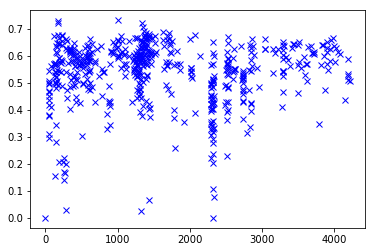

In [5]:
plt.figure(1)
plt.plot(days, planets_etamb, 'bx')
plt.show()

In [6]:
m_true = 0.0
b_true = .5

lnyerr_true = -2.3
lnV_true = -1.6

In [7]:
print(np.log(.1))
print(np.log(.2))

-2.30258509299
-1.60943791243


In [8]:
# def lnlike(theta, x, y):
#     m, b, f, sig = theta
#     model = m * x + b
#     inv_sigma2 = 1.0/((f*y)**2)
#     return -0.5*(np.sum((y+np.random.normal(0.0, sig) - model)**2*inv_sigma2))

def lnlike(theta, x, y):
    m, b, lnyerr, lnV = theta
    print(m, b, lnyerr, lnV)
#     vhat = np.matrix([-m, 1])/(np.sqrt(1 + m**2))
#     Z = np.matrix(x, y)
#     delt = np.matmul(vhat.T, Z) - b * np.cos(np.arctan(m))
#     delt = np.matmul(vhat.T, [x, y]) - b * np.cos(np.arctan(m))
#     S = np.matrix([[0, 0], [0, yerr**2]])
#     bsig2 = np.matmul(np.matmul(vhat.T, S), vhat)
#     return -0.5 * np.sum(np.log(bsig2 + V)) - 0.5 * np.sum((delt**2)/(bsig2 + V))

    term1 = 0
    term2 = 0
    for i in range(len(x)):
        vhat = np.matrix([[-m], [1]])/(np.sqrt(1 + m**2))
        Z = np.matrix([[x[i]], [y[i]]])
        delt = np.matmul(vhat.T, Z) - b * np.cos(np.arctan(m))
        S = np.matrix([[0, 0], [0, np.exp(lnyerr)**2]])
        bsig2 = np.matmul(np.matmul(vhat.T, S), vhat)
        term1 += -0.5 * np.log(bsig2 + np.exp(lnV))
        term2 += -0.5 * (delt**2)/(bsig2 + np.exp(lnV))
    return (term1 + term2)

In [9]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, lnyerr_true, lnV_true], args=(days, planets_etamb))
m_ml, b_ml, lnyerr_ml, lnV_ml = result["x"]

0.0 0.5 -2.3 -1.6
1.49011611938e-08 0.5 -2.3 -1.6
0.0 0.500000014901 -2.3 -1.6
0.0 0.5 -2.2999999851 -1.6
0.0 0.5 -2.3 -1.5999999851
0.0 0.5 -2.3 -1.6
1.00999865269 0.500615327151 -2.30015166335 -1.60152313186
1.00999865269 0.500615327151 -2.30015166335 -1.60152313186
1.00999866759 0.500615327151 -2.30015166335 -1.60152313186
1.00999865269 0.500615342052 -2.30015166335 -1.60152313186
1.00999865269 0.500615327151 -2.30015164845 -1.60152313186
1.00999865269 0.500615327151 -2.30015166335 -1.60152311696
1.65878841858e-05 0.500000010106 -2.30000000249 -1.60000002502
1.65878841858e-05 0.500000010106 -2.30000000249 -1.60000002502
1.6602785347e-05 0.500000010106 -2.30000000249 -1.60000002502
1.65878841858e-05 0.500000025007 -2.30000000249 -1.60000002502
1.65878841858e-05 0.500000010106 -2.29999998759 -1.60000002502
1.65878841858e-05 0.500000010106 -2.30000000249 -1.60000001011
1.61127918031e-05 0.50132862013 -2.30108298869 -1.61087598375
1.61127918031e-05 0.50132862013 -2.30108298869 -1.610875

1.99085793944e-06 0.534765728666 -5.44873729869 -4.29679796742
1.97595677825e-06 0.534765743567 -5.44873729869 -4.29679796742
1.97595677825e-06 0.534765728666 -5.44873728379 -4.29679796742
1.97595677825e-06 0.534765728666 -5.44873729869 -4.29679795252
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679795253
1.97595675428e-06 0.534765728699 -5.44873729907 -4.29679796746
1.97595675428e-06 0.534765728699 -5.44873729907 -4.29679796746
1.99085791547e-06 0.534765728699 -5.44873729907 -4.29679796746
1.97595675428e-06 0.5347657436 -5.44873729907 -4.29679796746
1.97595675428e-06 0.534765728699 -5.44873728417 -4.29679796746
1.97595675428e-06 0.534765728699 -5.44873729907 -4.296797

1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679795253
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679795253
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.2967

1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679795253
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679795253
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.29679796743
1.99085793465e-06 0.534765728673 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765743574 -5.44873729877 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873728387 -4.29679796743
1.97595677345e-06 0.534765728673 -5.44873729877 -4.2967

In [10]:
print(m_ml, b_ml, lnyerr_ml, lnV_ml)
print(np.exp(lnyerr_ml), np.exp(lnV_ml))

1.97595677825e-06 0.534765728666 -5.44873729869 -4.29679796742
0.00430173306678 0.0136120756138


In [11]:
print(np.log(.1))

-2.30258509299


In [12]:
def lnprior(theta):
    m, b, lnyerr, lnV = theta
    if 0.0 < b < 1.0:
#   if -1.0 < m < 1.0 and 0.0 < b < 1.0 and -5.0 < lnyerr < 0.0 and -3.0 < lnV < 0.0:
        pri_m = norm.logpdf(m, 0.0, 1.0)
        pri_lnyerr = norm.logpdf(lnyerr, -2.5, 2.5)
        pri_lnV = norm.logpdf(lnV, -1.5, 1.5)
        return pri_m + pri_lnyerr + pri_lnV
    return -np.inf

In [13]:
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

In [19]:
ndim, nwalkers = 4, 100
pos = [result["x"] + np.random.randn(ndim)*[.2, .1, .5, .3] for i in range(nwalkers)] #nwalkers x ndim entries

In [20]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(days, planets_etamb), threads=4)

-0.109982092123 0.659746358423 -5.92259555418 -3.84855603372
0.274508392391 0.583983829619 -5.26068079674 -4.72498533269
0.375333624013 0.509762555147 -5.47026873124 -4.99812471908
-0.142647998311 0.81239264015 -5.19561979586 -4.43549763609
0.21491456448 0.429634160163 -6.33625799845 -3.99584765669
0.194676008616 0.65603107294 -6.05668826602 -3.5731783827
0.0157113070459 0.511469047636 -5.34663805605 -4.45426059504
0.0547105955662 0.521725359796 -5.84570178367 -4.5137855061
-0.374849874568 0.478169124122 -5.14863914928 -4.73290056526
0.0523424845131 0.522638292489 -5.83965233477 -4.39242092713
-0.0692525821155 0.605130297377 -5.80705299491 -4.60757750443
-0.0157125004444 0.528817544659 -5.12639450915 -4.39312592311
-0.0346998820526 0.443820797325 -6.07189385188 -4.03648013443
0.156181710275 0.63605943944 -4.58577757758 -4.64038896203
-0.11849827211 0.592895947658 -5.71166055876 -4.0529241755
0.0186017921449 0.670491797059 -5.94034759199 -4.64437416358
-0.196556831025 0.416990917554 -4.

0.373286500732 0.632608719799 -4.85478468396 -4.38975315856
-0.0482810077385 0.597188460595 -5.57828410945 -4.09518552959
0.271927301197 0.672862652662 -5.44522681541 -4.4799316464
0.0218253126543 0.552912421449 -5.45912220462 -3.97537333037
0.273039817059 0.50876242904 -6.08066624284 -4.58187364502
0.0269536798643 0.505103682511 -5.76713453273 -4.33697810181
-0.143915159861 0.478302368212 -5.03560199713 -4.18194896993
-0.0347612000861 0.569006436638 -4.77203205471 -4.98013686903
-0.230573815145 0.298919298473 -4.45969478462 -4.44122940677
-0.0104284465069 0.965912625581 -5.51867841569 -4.42782640811
0.0560688572948 0.556001922357 -5.83298853979 -3.62122111165
0.0952367549808 0.57294168293 -6.24850916868 -4.56823268324
0.505049494492 0.601421563195 -6.82938181084 -4.52321929365
0.00860761075224 0.632188691695 -4.42658961836 -3.88489777992
-0.367560399787 0.502691852596 -4.97427646027 -4.66991434743
-0.185083599647 0.51890782305 -5.36699824521 -4.36910770322
-0.0960232262519 0.494266364

0.271293513903 0.486440526005 -5.06893829835 -4.12726759854
0.0243788518078 0.684104340662 -5.56260352441 -4.43717037854
0.226372351075 0.730383173343 -4.52701349878 -4.69662361436
0.00221025689297 0.569214160128 -5.60345716209 -4.06123342217
-0.0831515412772 0.575850382386 -4.65439844708 -5.30529736225
0.10633482507 0.580491780627 -5.1446197977 -3.61108696574
0.0476723973179 0.541027175329 -4.19207223327 -4.04831518885
0.183411377773 0.546198422768 -4.8474107865 -4.15596391515
0.0155191072532 0.574438674896 -5.18300606202 -4.21235791826
0.130210143133 0.470939787515 -6.86889723964 -4.74664163619
0.213975340234 0.71568337164 -5.17150403659 -4.24579678467
-0.126483371702 0.49745022598 -4.82898035053 -4.35036473219
-0.106465820175 0.325149516437 -4.89930974589 -4.63430984452
0.14232603847 0.54971379488 -4.44614408617 -3.73777492526
-0.189715730974 0.429768883899 -5.56660415089 -4.11184055897
0.0615882987806 0.299946810544 -5.45042716221 -4.79945852406
-0.170579000632 0.290638934613 -5.51

0.0246173706428 0.548768331642 -5.40595285072 -4.42404749916
0.099578050628 0.614819028236 -4.76357423112 -4.49020843905
-0.131457461532 0.688048996277 -5.93842060416 -3.74083345568
-0.00698118455513 0.642487261783 -5.82302393159 -4.57695065819
-0.024643036366 0.643092990978 -5.33034908821 -4.23727742095
-0.229754446147 0.42513292956 -5.34872406916 -4.80442668842
-0.0119631839307 0.465711466271 -6.43489649959 -4.60369632414
-0.00873852520158 0.517442936021 -5.37519822788 -4.41592664062
0.0304240300303 0.56670025799 -5.59929508965 -4.22052681604
0.0243956551995 0.582901827825 -5.48835456498 -4.12903615974
-0.142667940471 0.504849506036 -5.46044060989 -4.50741328465
-0.0377371253568 0.469333591757 -6.24445656563 -3.90177209653
0.232288335285 0.459192154988 -5.3279903247 -4.87433777077
0.00123878732901 0.533632722171 -5.26496508788 -4.28799326216
-0.0433898299836 0.620435692114 -4.79605162304 -4.4962088652
-0.0720218157689 0.518675224225 -5.23854554622 -4.3761223044
0.0866828639873 0.5449

-0.187535138376 0.349181395592 -4.71396703328 -4.68031508714
0.29400820258 0.512369931556 -6.00703474304 -4.53375317675
-0.0367819537027 0.546020705774 -5.93058180979 -3.83592789567
0.066219166878 0.522476926966 -6.79959918767 -4.61244873362
-0.0145599781245 0.701577863643 -4.62680376315 -3.6388325845
-0.162157394473 0.523054337828 -5.2623639668 -4.25113830881
-0.285551064246 0.499168949959 -5.08699583081 -4.75025383718
0.0449284708748 0.49540093165 -5.28002942186 -4.40970390703
0.0310767295111 0.430460388737 -5.90682768876 -4.16621199044
-0.00833156067186 0.495015066037 -5.28761018532 -4.34961604829
0.00116979390338 0.484146842038 -5.0985219546 -5.2057974502
0.0665968750916 0.623466502457 -5.1280222935 -4.60909362356
0.152767419158 0.598044826673 -6.26429994018 -3.99073657632
0.0881800551068 0.476185980927 -5.63802647246 -4.54007161406
0.211248559566 0.401859331051 -3.90299810604 -4.29890311189
0.0175347337307 0.340058615859 -4.90238337941 -4.25424652362
0.480836251663 0.624467543668 

0.0263954075748 0.500917969052 -5.73745611057 -4.55966703621
0.054883632204 0.570031305356 -5.12444638639 -4.26995578086
-0.0473146575683 0.447883769352 -4.82568208047 -4.41162440153
-0.123233817854 0.368071522535 -4.97415521906 -4.568325537
-0.0541733341205 0.511790157653 -4.9486184395 -4.05202766173
0.014364615907 0.424484924637 -6.01887030003 -4.35185782404
0.0301264786555 0.426645014895 -5.62741037242 -4.4753961665
-0.235364012035 0.19547827429 -4.74363340021 -4.63077503572
0.10878073399 0.59663570645 -5.29736241235 -4.52096845364
0.146215084624 0.577087595901 -5.23231681374 -4.68895009624
0.084610151986 0.742116059617 -4.85782674718 -3.97992802741
-0.117334146231 0.772233904417 -7.54501007495 -4.23875544447
-0.441925531895 0.465148322964 -6.57878526053 -3.92906261668
0.0107961779671 0.620912387637 -5.25305528788 -4.47703019971
-0.0335816826657 0.540130315797 -5.11622104476 -4.40794845648
0.0188135740249 0.52417267205 -5.44642803274 -4.43431313825
0.0551340189143 0.546654525757 -5.

-0.0053841347734 0.521098012218 -5.34226145891 -4.43331437881
-0.00645502714372 0.491794859951 -6.39204952775 -4.11451114558
-0.0108873506828 0.627519870449 -5.44551073 -3.96085643727
0.0171286928689 0.570729997396 -5.10183099117 -4.61194073584
0.0381712829796 0.44498516529 -6.3793380645 -3.81676546364
0.138793865705 0.469532465997 -5.31130728261 -4.54854482846
0.158097584423 0.533774379696 -5.29337776391 -4.34603117877
-0.0662231281488 0.766157588904 -3.9701560574 -4.74380387302
-0.0592433280039 0.564796983847 -4.46918313918 -4.45958295415
0.0982719807726 0.448658591191 -6.45981510064 -3.30129285034
0.0296256235838 0.498408407976 -5.161198464 -4.47944217673
0.00520513178607 0.589807257771 -5.4546103112 -4.09594263658
0.00790812975335 0.609228767402 -5.22127939263 -4.40761538782
-0.00437587264994 0.537279288027 -6.11497815671 -4.06801530815
0.121918494278 0.273464358482 -5.89860819784 -3.99098225519
0.0666151118127 0.595762540605 -6.35686470623 -4.69535212841
0.0362600357933 0.26069028

-0.188877680685 0.525520946642 -5.3040135165 -4.65859007636
0.00742130272718 0.428993891473 -6.11127970014 -3.96964916738
-0.0165070284007 0.436894919163 -5.17174906426 -4.53880966905
0.00189205641097 0.455714603602 -4.98338089781 -5.78717792936
-0.00845761309006 0.520792940444 -5.31855894271 -4.27343205769
0.22064916037 0.661988974447 -7.9449354077 -3.31047349609
0.0468377333097 0.609987251511 -5.19735709187 -4.60790793215
0.42227653869 0.185867008852 -2.3278380131 -4.23463715126
0.000641130827052 0.594280750933 -5.81491306401 -4.05613575946
-0.0117249363989 0.525328222484 -1.89803352313 -3.58172494923
0.101812122079 0.567876534512 -5.36503639851 -4.39601673066
-0.0107104428732 0.568319460633 -5.53347577516 -3.97013296174
0.183366576243 0.675260408615 -2.89788021597 -2.44785342437
-0.00369920315306 0.522634301215 -6.08763566436 -4.19337965604
0.201296213511 0.539857713825 -4.10368025089 -4.88905369367
-0.0361790540232 0.494431043166 -4.79483006172 -4.24335041091
-0.229667774534 0.6105

-0.00433094220516 0.556110137379 -4.57878027072 -3.97079078813
0.0160824377076 0.292842428452 -5.9904746232 -4.59522087728
-0.00779599381092 0.381197814719 -5.68532130335 -4.24204409849
-0.0806585689751 0.526872105774 -5.59014727555 -4.21242031824
0.0589913501311 0.559159399284 -4.77194228782 -4.25416590279
0.0383143676008 0.607816010652 -5.0085396212 -4.16103103768
0.0261831317472 0.58585157553 -5.3731137214 -4.21441211528
0.024172053779 0.610780084032 -5.94094358296 -4.36524783605
-0.0635507187945 0.5376531146 -5.53719973602 -4.30518279706
-0.0223259667806 0.601225729804 -5.1670881852 -4.3151638902
0.00451372806178 0.614776223744 -5.14711276385 -4.64125599951
0.0134504189467 0.574991020641 -5.51417712628 -4.37103696069
0.0607992849656 0.532179629113 -5.93540142133 -3.92982483112
-0.00319515863493 0.51206251201 -5.63325737063 -4.21741380542
-0.00597463528387 0.699086483497 -4.83774639636 -4.32559594705
0.0471338604266 0.402459279799 -6.47608801075 -3.91517391042
0.132284784773 0.61874

0.00271224899696 0.51925822539 -5.05120318869 -4.6717075828
0.0137730463551 0.393939030819 -7.00658600916 -3.61923196243
-7.15994233146e-05 0.494119892673 -5.43515616028 -4.31335284939
0.0716279020448 0.498897800304 -5.60002520435 -4.64721225389
-0.0346421771433 0.632291652662 -4.66885784139 -4.42076452124
0.0338786435645 0.469568292257 -5.2354993654 -4.49314672072
-0.109428054564 0.518140071155 -3.97644871703 -4.56071281196
-0.025664621758 0.511415726236 -5.8593033436 -3.59890021676
0.00926871705301 0.575895182089 -4.90771027652 -4.35331085772
-0.0586562706338 0.587059011997 -6.44081379255 -4.20356548287
0.0154628694855 0.386631429513 -5.62730515132 -4.27557309287
0.000902471707365 0.433707756952 -5.83378358206 -4.15339189123
0.119998965181 0.5950668167 -6.67494038 -4.69263534557
-0.00601389767165 0.666374679174 -5.53200347 -4.02443624462
0.0242750436655 0.246722637483 -4.02358965697 -5.71446985391
0.00437031883604 0.702533761824 -4.71018201953 -4.26211024456
-0.00976216764448 0.51497

-0.00310432042292 0.527143053202 -5.32834905024 -4.3066771513
0.254354538348 0.955727647899 -8.17670944128 -4.18811525053
0.0205884691947 0.487944906561 -5.02551638632 -3.93009599289
-0.010398023137 0.667122754712 -3.12821732859 -3.12694035264
-0.00420781100845 0.585948452321 -5.59860571235 -4.01029524312
0.0102693193247 0.646672775319 8.55806266368 -0.746727081378
0.0929976084556 0.390330915304 -5.48728654816 -4.36308272576
-0.00131171576044 0.529299640216 -5.10679137618 -4.78533067934
0.121060830458 0.574879404447 -5.17774914026 -3.14102201302
-0.0124043607793 0.386321785724 -6.18774344692 -4.7660799578
0.103861795514 0.443190303572 -5.86544670167 -3.88705178036
0.023743193341 0.488720267048 -5.80071923407 -4.25913459305
0.0124954171292 0.725848879597 -3.8820861169 -4.95841569589
-0.0962081738682 0.667606025074 -3.33991594485 -3.30208926212
0.000526297160643 0.435087172871 -5.36064890186 -3.77383977647
-0.000330336841412 0.572850132167 -5.84062003125 -4.06729488706
0.105433236624 0.5

-0.00487231943883 0.528530613283 -5.45474860479 -4.16992921041
0.0292535817823 0.697311453276 -6.4724108825 -4.33109296317
0.0307953387172 0.677680359498 -5.33707480172 -4.20847646053
-0.0167952694058 0.482434804015 -5.35348621914 -4.27582202995
0.00125573663098 0.557604103204 -5.75502369541 -3.98462903982
-0.00137323384758 0.880399220246 -4.58345552768 -5.75772346423
-0.0239309844249 0.597626990988 -4.81589434797 -4.38842321034
0.0230615871296 0.543398344444 -5.40467099996 -4.27670893841
0.00716084697491 0.613628139167 -4.97923182669 -4.43595576985
0.0507019457192 0.571532984266 -5.49877549502 -4.2563567978
0.0236076292265 0.567422156688 -5.05234373355 -4.2460492482
0.0385231825636 0.452735818882 -5.96129657415 -4.13259050771
-0.0265515585045 0.485439812223 -8.00275477885 -5.38841789493
-0.0300736409905 0.21977595614 -5.8762354851 -2.39274215244
0.0155817676574 0.539881091658 -5.54940451781 -4.24534350654
-0.0287824002115 0.584019159731 -4.82975450354 -4.02760796253
-0.00798413539404 

-0.0971593008734 0.628239801484 -3.14426434563 -4.55568151019
0.00683633645865 0.621211891807 -5.1082432655 -4.09666469587
-0.000677807610938 0.607397904681 -5.78888910364 -4.18249652983
0.0147027263358 0.433060490046 -5.44691985064 -4.29768700625
0.000127808116978 0.488711873989 -5.31282984652 -4.39454894554
0.0511524458218 0.547580173528 -6.05371956078 -4.63078222561
-0.0123330452653 0.883060275635 6.70779391253 0.852593473498
0.0668793587206 0.735181672894 -5.61327125352 -4.85482017131
0.00152715429151 0.405051608815 -4.92393874149 -4.92629850959
-0.00695546306691 0.51981399722 -5.66513886952 -4.31243013772
0.0463844432393 0.524387756039 -5.48628007921 -4.09848093165
-0.0549161420081 0.65648602746 -10.0072190421 -5.32790014357
0.00335569728015 0.516730790716 -4.50132959332 -4.0332034683
0.00175992827617 0.543143889033 -5.22278098461 -4.0791274212
-0.010358605109 0.514105422885 -5.46968894872 -3.85379737443
0.0278481315435 0.444418990155 -5.80592652455 -4.58190995913
0.0157071426168 

-0.00763278621425 0.661598408531 -3.2953453855 -3.18406459336
0.000303632580456 0.551381716145 -1.05998333793 -2.80191552634
0.0733481122852 0.540978092939 -5.74288723831 -4.01956970186
0.0617750050834 0.537625349222 -5.08174134028 -3.61487730899
-0.00191877256259 0.459109058192 -5.23991718331 -4.28983285428
0.00918739935485 0.478816285964 -6.0695750336 -4.35879455616
0.0328845247591 0.49983246688 -5.61654679234 -4.27228938208
-0.0694802001875 0.676668315684 -3.96535832807 -3.48130773427
0.00102028826143 0.662214649483 -4.55160992825 -4.5884172947
0.0205409118881 0.65113097921 -5.77302632323 -3.86928904816
-0.000947047833527 0.487140238546 -5.8975053366 -4.08981780345
0.0519434678238 0.697971768847 -2.28570694335 -3.02717033196
-0.0015789892646 0.631687664265 -5.78119021168 -4.47272235735
-0.14702702862 0.627957840288 -4.91144350282 -4.59462431167
0.00559021851688 0.546284328967 -5.3044352401 -4.0889152772
-0.00331530942789 0.755125806346 -4.71474087612 -4.9145406377
0.031000848293 0.5

0.000756695541833 0.527250730964 -5.64841898258 -4.35967324916
-0.00498947183034 0.596390729201 -5.09695035595 -4.35378009424
-0.00320648582021 0.591986030986 -5.17283166555 -4.36839178456
0.0148296398868 0.593572504904 -5.73254969637 -4.05268116175
0.00271589465361 0.559889779624 -5.59384685911 -4.30081261413
0.0360311905326 0.625189087129 -4.9458768551 -4.07456560132
0.0160552034185 0.560812032523 -5.24741542825 -4.25675754951
0.0370574520383 0.487183290596 -7.37650326315 -4.71002035239
0.00256845566555 0.619632868883 -4.17008551255 -4.71415324635
0.0269005760072 0.648045300639 -5.96574856086 -5.01264359687
0.00183664831359 0.396225359007 -5.40464323537 -3.3123907916
0.0157350671745 0.52865966637 -6.34867459832 -4.79967027338
0.0138193273466 0.579546768156 -6.01811720979 -4.5065519697
-0.0127606401079 0.540012944098 -5.0808513352 -4.24845028748
-0.045323990867 0.582810883219 -6.56812879855 -3.88485124
-0.030752647318 0.575727612835 -5.29727031374 -4.76233806178
0.00968510066362 0.613

-0.00987249473695 0.562915372576 -5.63096335523 -4.21150684986
0.0317399402525 0.36991708793 -5.31442235354 -4.39350292271
0.000980484433395 0.498661507901 -5.94155082564 -4.41089031353
0.0116361497988 0.542842531613 -5.54694779309 -4.40704854431
0.00131153783056 0.422989367188 -4.94977471725 -4.82143273404
-0.0105153565777 0.880673115588 3.33774518464 -1.05315633792
0.00152229692033 0.49794905671 -5.32396724184 -3.92750496988
0.00177110128761 0.538589669987 -5.46838789133 -4.22034791712
-0.0113759577307 0.5656943201 -4.0652446107 -3.44462858658
0.0400667261998 0.526002036781 -5.51229823353 -4.13542412552
0.00438577795032 0.670957348163 -5.58822400989 -4.11961436768
0.000105366300146 0.568292583397 -4.95109899063 -4.22311942349
-0.0111321208504 0.542452429417 -5.77246826769 -4.31300998937
-0.00719905556456 0.552013814948 -5.09258420207 -4.03527158652
0.0814734856341 0.377984191965 -6.21344643085 -4.38321496157
-0.00143446167362 0.540735708129 -5.49852748521 -4.63473695683
0.00645319560

0.0532567297988 0.553122646896 -5.40532557269 -4.07367054592
-0.00018850307901 0.506827201265 -6.20759611084 -4.2636333502
0.0761112882039 0.580382250977 -3.84010226488 -3.21240918047
0.00337887803629 0.480286530634 -5.63443879586 -4.28097333094
0.0257749834457 0.516131304312 -5.61467617834 -4.38339959625
-0.0556610054333 0.650088643602 -4.21828033313 -3.70288294408
0.00619838158014 0.554100310444 -5.71417941819 -3.99807527256
0.000746488231306 0.653545383632 -4.48348704117 -4.52664378744
0.00251537350548 0.509588004408 -5.63962950781 -4.16052502562
0.1362446799 0.954696138157 4.18645436896 -1.27967294407
-0.0671828742822 0.583518827878 -5.07586500549 -4.4164546136
9.95818931966e-05 0.577212469109 -5.63508791124 -3.95684704143
-0.000589633423341 0.61545519092 -5.57157482781 -3.46809894206
-0.00222813424914 0.70566603158 -4.95932082603 -4.80862870362
-0.00750273810278 0.53319372651 -5.4386476228 -4.28529069532
0.0315445742778 0.583746978365 -4.9650793464 -3.86645232084
0.00182534650835 

0.000875550687437 0.623689806784 -5.76148378669 -4.42961952339
0.000519196741297 0.63600628152 -5.48753497374 -4.77935199061
0.00318149188716 0.482512059209 -4.60480560555 -4.1285168923
-0.00562323431789 0.576013068082 -5.48283643956 -4.14428274074
-0.00449016221563 0.601896225551 -4.51521043007 -5.08814269997
0.0111481097144 0.624371014789 -5.44789140653 -4.40839156848
-0.013164241827 0.486696616665 -2.94684022165 -3.37293912275
-0.00270236005311 0.555830549829 -5.33281659304 -4.44473093127
-5.55163060869e-05 0.549850475475 -5.43391719514 -4.42439775247
-0.0123177817271 0.44312280332 -5.34211749018 -3.64846681107
0.00713926218066 0.514418982354 -5.9272673598 -4.56938806416
-0.0145066515736 0.539937758246 -6.86414020653 -5.01078835827
-0.0991576633578 0.307124855346 -11.6443296229 -6.71078608624
-0.0259008232945 0.568277956082 -6.02946905337 -4.15694327665
0.00148102113386 0.654537542797 -4.3329419911 -4.03047374076
0.00170589196075 0.630973137082 -7.90238911681 -3.35040798183
-0.00183

0.0176883654246 0.569164317719 -5.62386953364 -4.50854500629
-0.0107396531689 0.883280232953 3.48557355875 -0.990325493705
0.00113187475983 0.562221238788 -5.07642662654 -4.21910776139
0.00197351962156 0.175466484099 -5.15315654836 -4.63228768638
0.000666186679423 0.552794547877 -5.22166597008 -4.14636677345
0.00200038423709 0.600439689362 -5.31481869631 -4.21296051048
0.0549570884201 0.580587883238 -5.39102447747 -4.12442663652
1.8269583328e-05 0.550858041734 -4.32348363554 -3.91777458651
-0.0111774167167 0.583792747026 -5.06907025479 -4.18546355389
-0.000808346734536 0.570961675448 -5.09482304144 -4.101165728
0.00661442240224 0.52236680936 -5.385820382 -4.45081919242
-0.0114854170184 0.633296408148 -4.47319877909 -3.69929525863
-0.000557713480943 0.540418015141 -5.51921803949 -4.33698281315
-0.0222167769849 0.539789297707 -5.39671132572 -4.49079083186
-0.00281653874575 0.499748882465 -5.37227611475 -3.92945883802
0.00465622062915 0.52714420537 -7.56709845436 -1.36434478405
-0.0043016

0.00850051191879 0.540368171404 -5.25552859331 -4.20122672279
-0.00205214082514 0.466204129529 -5.21266361324 -3.97780678105
-0.0348190270899 0.60960299309 -4.67795716385 -3.95488386679
0.00296796188788 0.501765270533 -5.6017884457 -4.06255607751
0.0005716549474 0.56298772831 -5.15518200827 -4.06495339702
0.00047501376167 0.651614970092 -4.50940741418 -4.64810854379
0.135415963721 0.952702107346 4.11199093479 -1.29242801384
-0.039534700438 0.568721986715 -5.16954153005 -4.41230538191
5.9479535409e-05 0.538193503219 -5.42528884596 -4.04498955913
-0.00384436738928 0.612694832284 -5.88209409286 -3.63670991576
-0.00269121074315 0.714458175269 -4.61289056018 -4.98027670578
-0.00502418754034 0.528675874548 -5.39888561678 -4.29852266507
0.00637114923194 0.586037371726 -5.27712950394 -4.07769938603
0.0171750746332 0.585891245478 -5.10619577365 -4.09941235903
0.000182138848411 0.506655032123 -4.33441196344 -4.37853919557
0.000701989373835 0.601222552635 -4.64551967671 -4.1080557633
-0.013061856

0.00899746961446 0.555104197548 -5.36057833647 -4.19170738087
-0.13200396706 0.585082188549 -4.72074661067 -3.03408400004
0.000348411332651 0.557259986113 -4.37888631796 -4.56969733685
-0.0257569436878 0.466736316905 -6.78049979807 -4.86716270908
-1.97403295994e-05 0.50419347682 -5.40722901109 -4.26801541016
0.000107495405688 0.367037431232 -5.79107130094 -3.49036860677
-0.00145126319849 0.546376729325 -5.66501963257 -4.22596931819
-0.00743139130328 0.703312034538 -3.86357428321 -3.98063887774
-0.00189899114337 0.567006017731 -5.34812425895 -4.46910566467
0.0198605672349 0.724693171066 -3.70307766796 -3.96525043528
-0.0103033719732 0.535110030995 -5.79302882603 -4.41225015384
0.00180057614347 0.637178102901 -7.98709694558 -3.30476386018
-0.000319373442629 0.87133221052 -7.01932715364 -4.66628307697
-0.00240713468651 0.509313395486 -4.95717195148 -4.12760434416
-0.024221629002 0.532443303983 -6.76688138277 -4.84915340141
0.000857365199283 0.524301518792 -5.78710024688 -4.35246317689
0.0

0.000802834459341 0.535825515508 -5.21744354452 -4.23940683534
-0.229940243431 0.708321790208 -7.28433487791 -4.10163861856
0.00112618658926 0.545805802807 -5.22935349238 -4.13614334661
0.00155987664152 0.570353127618 -5.35720655676 -4.22597525039
-1.5818496736e-05 0.600294021973 -4.5471644399 -3.68899992395
0.0274508900431 0.521334967034 -5.39075778818 -4.13568048534
0.000141837235634 0.550990826316 -5.00232437935 -4.24425680394
-0.000622537436954 0.566755563569 -5.15421916943 -4.06056136688
-0.00796444064939 0.546850011542 -4.77642150451 -4.0360145714
0.00886621132094 0.523417957463 -5.41747408027 -4.50357764376
0.00293227286121 0.53104577113 -5.57068163774 -4.2617338356
-0.0164019116159 0.554264759461 -5.12458579771 -4.41103483312
-0.00144056763994 0.569726744438 -4.99152484929 -4.23024702425
0.00909805277874 0.494717711339 -8.41040268766 0.0612981364463
-0.00627259785846 0.543650990693 -4.62405031791 -4.25254981467
0.00197068402657 0.564203766253 -5.23953046795 -4.01928583085
0.000

-0.00194573899677 0.529019040879 -5.70391519935 -3.74749246277
0.000191955275537 0.521515250721 -5.56252306049 -4.13405810951
-0.00120944662522 0.713333945572 -4.55703292531 -4.68620866372
-0.00478599689518 0.577259632606 -5.36747312415 -3.97569691112
-0.063416459053 0.586110333257 -5.08921912661 -4.51092840896
0.0069779871366 0.339318150532 -11.3943394478 -5.64479481258
0.0197351470726 0.603400183535 -5.21709039288 -4.02208268676
0.000187038463459 0.532688400129 -4.40452215368 -4.4419682787
-0.00451645520022 0.55242352026 -5.11040163773 -4.27019794023
0.000390489721391 0.570860159609 -5.11227553166 -3.90666015038
0.000193288390953 0.418485398546 -5.34318022951 -4.18013229959
-0.00471453807843 0.682530188274 -0.966335771367 -2.98977566573
1.64169583444e-06 0.601654004834 -4.28425724035 -4.05143968386
-0.00962971290424 0.529390448516 -5.86221901561 -4.4226129645
-0.00442085047193 0.453096533892 -5.51402322937 -4.43446835006
-0.000192601181295 0.403290300743 -5.32096902706 -4.10792921638

-0.000922357654665 0.538944382344 -4.99753790852 -4.3456257147
5.53281776024e-05 0.128579916928 -5.82476758401 -2.64606231589
-1.53071989103e-05 0.504396070626 -5.76033302179 -4.42291066089
0.000813102251004 0.56544408509 -5.44423002662 -4.31732067331
0.000473596500648 0.581022797831 -4.8731046542 -4.14510625408
0.00260529146805 0.639180275684 -4.15155130137 -3.74793760633
0.0244058208967 0.6004021839 -5.89559881761 -1.8881516198
-0.000624016416484 0.453050160989 -5.3651310078 -4.3905329455
0.00247219512978 0.667393786906 -9.06880512558 -3.0903707661
-0.000226704933751 0.831261135485 -6.47057867922 -4.67919472188
-0.00230914737227 0.507405431377 -4.9742277558 -4.12812852889
-0.00014397303131 0.599707652694 -5.06664114548 -4.40313308975
0.00114962685763 0.586380439679 -6.11434364662 -4.22740994367
5.63914774094e-05 0.493044827347 -5.56349716568 -4.2332390956
0.000500289139471 0.51928522976 -5.6793204885 -3.96710328507
-6.74591734795e-05 0.617979366933 -5.47950167999 -4.36113129095
-0.00

-0.000631617752567 0.569740156339 -5.35137429076 -4.13061412556
-3.5126211627e-06 0.53160341665 -5.07781844265 -3.58349704043
0.0109955244292 0.558022381235 -5.40986888341 -4.17083485369
0.000159333266412 0.580587810315 -4.82433392439 -3.80197488942
-0.00738782756227 0.535822971103 -5.20945482233 -4.29551365358
-0.00521523548093 0.554914463077 -4.64810864658 -4.09184946544
0.00391660629492 0.409182334923 -6.48326809813 -4.54823300663
-0.000730330492216 0.578680078927 -4.71682360067 -5.63330207726
0.0648776738408 0.754797325346 -0.654582501002 -2.81390185847
-0.0144667215522 0.548670746218 -5.15628265796 -4.28287838537
0.0237272590567 0.428472765594 -13.9166185714 7.21400607657
0.00184798450254 0.672385751643 -4.86787481222 -4.38461089248
-3.41038505077e-05 0.578610788182 -4.52996003017 -4.09328681875
-0.00531101551087 0.526004430539 -4.84783231895 -4.02965967757
-0.0109393063101 0.530691547312 -5.38678947586 -4.15926162373
0.00143041576289 0.300168250689 -4.90517182909 -4.86653341965
0

-0.000751795207544 0.573639968883 -4.90581816823 -4.54727264435
0.115123689547 0.90544429286 3.79352587427 -1.33718957943
-0.0188419127771 0.587878530241 -2.63520623938 -3.34581324576
0.00237965841618 0.473387808828 -12.219718975 -6.13580832241
0.000680612946487 0.569981911288 -5.52345284272 -4.02413314749
-0.000516797752059 0.636207081787 -4.80721785617 -4.35030526145
-0.00427546817341 0.612472335617 -5.72527370739 -3.9368893917
0.000373362721216 0.614408833762 -6.07917518376 -3.4132588088
0.00999008443124 0.581613065018 -5.19381582306 -4.19863368895
0.000381834675544 0.493525696497 -4.02778103016 -4.48294837004
0.000213252980189 0.582525561063 -4.6558942674 -4.12587957914
-0.0052554373885 0.580061174651 -5.16404793997 -4.26287718744
-0.00461223081769 0.422362721701 -5.64559530984 -4.30110329877
-0.0122557027151 0.932273483717 5.97444603615 -1.15437227249
-0.00171117541528 0.515017841239 -5.0299609475 -4.06695575123
0.000198872145322 0.547376830531 -4.97547742948 -4.00271148097
-0.000

3.77958546393e-06 0.540369947574 -5.25396712443 -4.37405196679
0.000103636281554 0.356153772716 -5.81193539399 -3.45724107988
-0.000320883721138 0.539508337291 -4.91081083666 -3.76825234335
-4.84696925087e-07 0.564275720412 -3.36943595329 -3.46189223794
-0.000585342475961 0.523046338972 -5.45661324643 -4.34068025311
-0.000444278249316 0.406716997962 -5.3846662705 -4.33386241004
0.00104931647492 0.660518894005 -4.2814251023 -4.02372071869
0.000868922904197 0.577388975025 -6.56848268812 -3.8369590491
-0.00218779286213 0.480138845774 -5.63572085703 -4.25277208487
-0.000134563111327 0.602035488857 -5.19030936161 -4.18335405194
0.00203979799717 0.306508010796 -9.57404597086 -5.47000062144
0.0270713639067 0.607635500418 -3.85599799859 -3.75750256799
-0.00533228083695 0.537301382939 -4.8770810237 -3.67230239746
0.000733829115406 0.461763712859 -5.93755782619 -4.18250408945
-0.000486460314333 0.549643332758 -5.42285923421 -4.26919461092
0.000419817983001 0.408549993121 -5.27861881704 -4.655962

-5.27549346426e-06 0.551547538548 -5.26806004084 -4.09519698081
-0.000455862275262 0.57838510549 -4.84844365528 -4.73669679956
-0.000332916648438 0.550254836155 -5.16426728142 -4.09144827793
0.00169814665426 0.507082687633 -5.58067850229 -4.3191473753
-0.00069756855341 0.559634751297 -5.39861019607 -4.47457474144
-0.00621582333341 0.556807513211 -4.50642584159 -4.023110676
-0.00617482919775 0.617374920334 -2.81886067795 -3.58472346682
-0.000687077892058 0.776235841682 -2.27433076838 -4.12992807957
0.0436314956356 0.349600374802 -19.6077010598 13.2328429192
0.000776973754478 0.595597491147 -5.28299694863 -4.49307479039
-0.000707950826475 0.576188595418 -5.05691832704 -4.23327775901
-2.91969746165e-05 0.586967486823 -4.62768895313 -4.30471396035
-0.00539819652587 0.504895320267 -3.98361802629 -3.35856830761
-0.0179959887703 0.530127798586 -5.30321879597 -4.10258906456
0.00906507297587 0.543154910101 -5.43597329594 -4.24162532993
4.70925970492e-05 0.575603607702 -6.3848237661 -5.040273512

-0.0070703264413 0.31509570738 -11.7034101682 -5.84064408306
0.0107134823765 0.496095444682 -9.2388181061 1.12559629515
0.000176278751159 0.638613227969 -4.61132771529 -4.18639376276
0.00314480734505 0.63580563217 -4.72815038275 -4.10390644367
-0.00272938136145 0.691744216256 -5.28472820456 -4.17507610144
0.00392133097953 0.591903558315 -6.07140726949 -3.61593986293
0.000141306694067 0.47275520913 -5.49166850323 -4.25067716345
1.86845894604e-05 0.551038474004 -4.09155653981 -4.77432005105
5.32537465395e-05 0.60684634571 -4.22616491398 -4.05083763034
-0.000909796534913 0.549978533033 -5.31161807836 -4.20502825482
-0.0100492634279 0.865341314046 4.01578749185 -1.62715958776
3.29553347857e-05 0.468284125784 -5.66664109136 -4.35397283704
0.000166514488453 0.448563367313 -10.0288039681 -6.06279836485
0.000419155566998 0.539420745801 -5.20333803153 -4.14183934199
-0.00581436132499 0.619834520322 -3.68520163253 -3.41208126557
0.00124369073424 0.524186451936 -5.24205021935 -4.27197906185
0.009

-0.000872787756579 0.46443004684 -6.03631193831 -4.44532362469
-0.039310317573 0.382167098711 -6.56244500216 -4.45494997868
-0.000299568134754 0.674843497057 -4.337130274 -4.02630187789
0.00150791085538 0.625840613783 -7.61960222319 -3.3548413402
-1.40658745131e-05 0.671493857431 -6.11454973745 -4.3539957632
0.000114637122033 0.602980500128 -5.12953629726 -4.36131543067
0.000484324247896 0.358028627626 -8.7515876359 -5.2039264825
-0.000248303559029 0.537644973808 -5.5299113264 -4.12416592083
5.83722644227e-05 0.466496608092 -5.5546440273 -4.23668474609
-0.00011205708004 0.541488291596 -5.41730109085 -4.21827140413
-0.00133624445904 0.567387159641 -5.5204778715 -4.19378813955
0.0540301077012 0.651517615378 -1.55129855093 -3.16849576282
-0.000885171458959 0.569125925351 -5.87204061775 -4.47976152036
0.0031305485499 0.534207271118 -5.91713251615 -4.20650668326
0.000149638361368 0.3661598896 -7.56893311702 -4.60610197236
0.000392362315174 0.536048683002 -4.56495315154 -3.8817111327
0.01496

0.0174856131539 0.457362631603 -11.7712784711 4.35683450385
-5.79555224875e-05 0.570722809539 -5.05264588397 -4.20105185242
0.000480980251336 0.550913682847 -5.34672997396 -4.4042891945
-8.49477970992e-07 0.54881562083 -4.46008751681 -4.32834215577
-0.00880630846644 0.550312999235 -2.4881895743 -6.44922638305
-0.00636155699822 0.607938439941 -5.00202870621 -4.43708330178
-2.66085258206e-06 0.434729433711 -4.76741177594 -4.52477069477
2.87401033385e-06 0.616699851285 -5.70123822467 -4.58882433195
-0.000941726210291 0.61637330618 -3.69525037263 -4.96193747594
-1.8530698452e-05 0.54566452549 -5.07381163296 -4.34649103046
0.00846091434407 0.477133036491 -5.68579618491 -4.13767404656
0.00281005794414 0.538840199184 -4.50247598933 -3.89737798722
0.541315236492 0.176353029397 10.8026195178 -3.00953579907
-7.48273125562e-05 0.501067988295 -5.68097092686 -4.2082711192
3.35474845688e-05 0.497334777146 -2.88641823018 -2.85973423838
0.00446141072912 0.541369279813 -5.19303518 -4.18685237509
0.1431

-0.000374991758947 0.558923851637 -5.3909565205 -4.20216091037
-2.38643985302e-05 0.518845544056 -5.36643457981 -4.73621838051
-0.00629147739418 0.748761998537 0.711486902192 -2.50791631633
0.00042021556172 0.470493418974 -10.1108019344 -6.305887744
1.13268082185e-05 0.546715429303 -5.10256299037 -4.14764004317
0.000931211035432 0.542137663558 -5.28069915268 -4.2179063962
0.000125046521925 0.18014233204 -4.74749663922 -4.42950781082
0.000145188860835 0.446670642953 -5.77014936425 -4.12647097553
-0.000282352897299 0.709326456939 -2.8836492033 -3.84354332904
5.25106585295e-07 0.548197090368 -5.58392540787 -4.30399493895
-0.00119104307414 0.553190921471 -5.96241889486 -3.89951486014
-1.04662364057e-05 0.522535766971 -5.23884294216 -4.47526785046
-0.000312443491209 0.563345425097 -5.14138402043 -4.36835163263
-0.000175886668914 0.682084738446 -5.34701639616 -4.35682724666
-1.47488804616e-05 0.580163312216 -4.64868860267 -4.20383840291
-1.14115355124e-05 0.54699678833 -5.22080638652 -4.3001

1.20511855012e-05 0.527188039429 -5.53223588758 -4.12879980866
-0.00147872713736 0.502146964774 -5.81537181072 -4.00930354871
0.0504898384366 0.663842230218 -6.40415646233 1.08157211335
-0.145220870676 0.207636852065 -2.62621047205 -18.7548994624
0.000323857311234 0.459384323028 -5.22366605778 -4.44485718878
-0.000257500749094 0.683980238659 -3.3808519704 -3.79468385818
0.000311710835332 0.586374598413 -5.18355570397 -4.30128781587
1.02873111079e-05 0.537476998395 -5.36478969481 -4.11155030924
-0.00210127322598 0.575195891496 -5.16841014842 -4.00890561061
0.0198035222039 0.95912308113 2.00075873035 -9.23325516562
-0.000571242393381 0.622249633399 -0.395632535685 -2.41035228708
-0.00382131043728 0.517691383232 -5.70083258704 -3.73818911328
-0.365580267225 0.86463549249 -15.2972090998 -5.45670105982
-6.41165800908e-06 0.547339831446 -5.45675833207 -4.29127092181
-9.45384458996e-05 0.700988314016 -3.82587235707 -3.74312999146
-4.51419896081e-05 0.634552977204 -3.05867858581 -7.79736705305

-0.00350113228277 0.528239900443 -4.47121904197 -3.79023839936
4.63476218065e-05 0.345411860821 -4.55180551481 -4.7794578899
-0.00260328303254 0.573890345687 -4.68602511034 -4.31321802365
-0.00017419685858 0.581070336741 -5.33865916242 -4.60106068502
-0.00013685752001 0.527508068109 -5.10950321824 -4.50201625299
8.11874033506e-06 0.627567869095 -5.00771436502 -4.42182121144
0.00095906193255 0.590918204461 -0.0773319670111 -2.45758696386
0.00280361306528 0.345784278619 -6.27138337215 -1.30954785795
0.67040443141 0.107906916802 15.0094026572 -2.76344630833
-8.15840514052e-06 0.577825803254 -4.70736197459 -4.26968409574
-0.00010615210127 0.542078137189 -3.93866491873 -3.82247061469
0.000682199700764 0.570950064147 -2.76003532235 -3.33917321676
6.03436777008e-05 0.511726840621 -5.33734627099 -4.23764898133
0.110670779564 0.816095290653 -8.05373885488 6.96158439719
0.000171255305119 0.508229386719 -5.87450116944 -4.04599335344
-2.47050499888e-05 0.541040163113 -4.97741428002 -3.90708589202


-6.64847827137e-06 0.510514302774 -4.48195999904 -4.26138958313
-0.000123016378421 0.461511891348 -6.36982775618 -2.5464434441
-0.00339026392218 0.648118627102 -3.10098425169 -3.29106870523
-8.47512481895e-06 0.532994681749 -5.21055481761 -4.07576014752
-1.7040032688e-05 0.612927699555 -4.29603060232 -4.21699332248
-2.64301678377e-05 0.648760756643 -5.4135409942 -4.45626228033
-1.15131630193e-05 0.584666075607 -4.62843817077 -4.1103938033
-0.000560939730964 0.99797121665 0.253339707551 -13.8991532252
-0.00020840943064 0.591541229772 -4.97440484195 -4.58969762224
-0.0014649688991 0.591494911925 -4.29418609624 -4.11278095234
-2.18029969323e-06 0.534915009155 -5.11557078226 -4.32941284689
-0.000134231285058 0.588912044524 -4.71682559667 -4.26502331475
0.000230731657431 0.53194776352 -5.29186718319 -4.28937235563
-0.000321863073652 0.554078181942 -5.01078434601 -3.87790615878
-0.000622769898419 0.567754537723 -4.30719125568 -4.3142759148
-5.95305516042e-05 0.557273844562 -4.35823388595 -3.

0.000201021457602 0.548264237382 -5.32220096623 -4.31158566236
-0.000197718690101 0.650995913277 -3.84356869046 -3.91603583804
2.16753270479e-05 0.605858747593 -5.4165400095 -4.14964450809
-0.0257154815596 0.960208214784 1.13423449971 -12.3328366487
-0.000948595034845 0.670242439637 2.50677309968 -1.18470401854
-0.00498927725052 0.571760556346 -5.46172210662 -3.59406292699
0.000573900886813 0.551682481036 -5.20938369036 -4.31780675308
-5.65450741359e-06 0.544736754817 -5.50868922983 -4.26403836742
-2.92843734229e-05 0.600222281778 -4.23170053574 -3.99251473996
-0.101443340706 0.486689998792 1.74493129857 -20.7347854828
0.0627911389539 0.770221775128 -5.5583647356 1.01855887308
-0.00702583708397 0.787376905632 0.728005413316 -2.27929403478
-4.14234307592e-05 0.523527287237 -5.3072300439 -4.22175392269
0.00676019651193 0.272276505288 -11.2248648826 -5.99530980853
0.000327767380494 0.391562680069 -5.23510867936 -4.05797185566
0.0273808970455 0.682103171956 3.55669718831 -0.66518222409
-0.

0.000638706900289 0.572892236915 -2.29386292146 -3.24110424625
0.00142131577711 0.685839459951 -2.92380898482 -1.8088633689
0.318094143743 0.328725902542 4.1979664653 -3.46455190206
-7.90408293079e-06 0.564501665735 -5.3052845115 -4.0658943187
5.94992619562e-05 0.527364340777 -4.31339387966 -3.8560658101
0.000406416872464 0.525505947646 -4.77456187664 -2.38338980677
-0.000181519649049 0.891444097542 -1.15949596464 -3.24136885292
0.135559363587 0.881297564904 -8.71626826186 9.62665470359
5.79470459485e-06 0.423325452857 -7.73830371882 -1.48769135535
-5.87406080607e-05 0.551070413122 -5.19955316988 -3.92641142592
-2.05842552995e-05 0.530495365341 -5.39087158721 -4.23579549963
-0.0101863710417 0.724757851384 0.178312124295 -2.24978054464
0.0100434876548 0.536266009429 -9.191816711 0.745263438038
-2.24189125358e-06 0.532687839339 -6.02007756057 -4.12977580765
5.83285325034e-05 0.539148566909 -5.41149517588 -4.83524593955
-2.17034508471e-05 0.562223864249 -4.69420854007 -4.11222831107
-0.00

0.000127914572754 0.513513901861 -6.32277387898 -4.49135150561
-2.44828484277e-05 0.584719844879 -4.55791421822 -4.07971605794
-9.71000458371e-05 0.555628123537 -5.40980071429 -4.32825016673
-7.65608877839e-06 0.569760196281 -4.76972590809 -4.1935007598
-0.000136581458627 0.558695993266 -4.90952036636 -4.35570873126
-0.000311164887803 0.784041076824 -2.11309500841 -9.04896644731
1.0529496738e-05 0.597433428323 -5.7369341764 -4.42522179874
0.0124170363765 0.608374794036 -1.28208470172 -2.64990995286
-0.000110815960757 0.545388327609 -4.91471725453 -4.37461965398
-6.15463789782e-05 0.597323299123 -4.47902099501 -4.4078269578
1.45995657333e-06 0.564725224505 -5.10636156712 -4.41839532237
0.000392838227419 0.503113209159 -5.66724135795 -4.25313948567
-1.56237674659e-05 0.512845265876 -4.7277274067 -4.16854637763
-0.000101307883521 0.55867113504 -5.04506391915 -4.19578814065
9.6460966509e-05 0.543664453186 -4.78896885692 -4.14430377585
3.91791718369e-05 0.472818753306 -5.43360728381 -3.9629

0.0178396750335 0.91577644314 1.23928152739 -8.72087251598
-0.000336049454855 0.57886877062 -2.61907833371 -3.18968710171
0.0582616509762 0.500002419032 -3.67482573037 -3.77917659358
6.68818219631e-05 0.5496222605 -5.25272110801 -4.20890493388
-2.95218976516e-05 0.601451055768 -4.2173095838 -3.98874494553
0.180692681768 0.462818623144 0.901713388769 -4.38212714405
-0.000394534838493 0.471569488785 -7.9149399226 -4.8799495106
-0.000103817311537 0.776849017625 0.0793853179845 -11.975146999
-0.00490648508695 0.707183737711 -0.769286214617 -2.78217519568
-5.87009987454e-05 0.511300925191 -5.05824552657 -4.47541255942
-4.19563230186e-05 0.52479851481 -5.14089158216 -4.19992759047
0.000139929262082 0.517441322589 -4.87415964797 -4.13217826745
0.000394632531685 0.547749762319 -3.92760269216 -3.69381369592
0.0188684698002 0.649107840681 0.997867084052 -1.7382289371
8.186102738e-06 0.556083767359 -5.46637962229 -4.52154548603
1.37247433795e-05 0.502233606122 -5.38854176208 -4.53614149891
0.0001

0.305349307527 0.349205310156 4.00412971048 -3.4629124465
0.000426531983369 0.521832550647 -3.13928283832 -1.07584165331
1.20531981274e-05 0.525613760246 -4.66363893707 -3.74843946948
1.63471180006e-06 0.5003440267 -4.92684744709 -4.19208069335
-0.000124019603488 0.724051786492 -3.81446101842 -3.76654637403
-2.12229730201e-06 0.539353783819 -5.44976930883 -4.0559339635
0.000250288821946 0.475392614339 -8.11165002764 -5.07684866638
-2.49215417895e-05 0.550934373414 -4.85671028542 -4.6063981687
-0.0121402242993 0.765217934832 1.37005711436 -1.78337774589
-2.42323446347e-05 0.629993766865 -5.74851563975 -3.95142967669
0.00010227988678 0.519711857796 -5.82375696995 -4.04292176476
-9.18057691671e-06 0.556207115392 -5.35697525168 -4.0963843501
-0.00156644053882 0.495447124479 -6.91347209297 -4.87386906885
-4.41636208078e-05 0.574226730888 -4.49574109932 -4.07521471838
-3.1875204332e-06 0.570898944178 -4.90666894282 -4.33011101653
-0.000960552969576 0.553378832744 -5.53831182255 -4.2998391660

-3.13477815788e-06 0.58249236823 -5.34055716986 -4.2750702105
-0.00339446028062 0.645415871114 -2.24652815445 -3.32908969454
-2.62023183159e-06 0.543530550413 -5.46135833407 -4.26050993426
2.03685885085e-05 0.553372385827 -5.1582281686 -4.43028072756
0.000150202213987 0.540508231977 -5.26473449763 -4.23811813437
4.9940759443e-06 0.493773017981 -6.51346939574 -4.85838415383
1.50637057157e-06 0.533526870649 -4.15199911406 -4.43304786144
-8.4523399466e-05 0.556859020527 -5.03712510757 -4.1520794677
-0.00048711836275 0.530858236833 -4.88974145784 -4.06681266371
-6.1785177143e-05 0.561660360836 -3.97921448537 -3.64813235707
-2.583831531e-06 0.541032879449 -5.29300769635 -4.5692758795
1.716302453e-05 0.521855097202 -4.68150401911 -3.90969240326
-0.000149060202423 0.646726437735 -4.60494540405 -4.07545164679
1.59498060764e-05 0.575881460013 -5.86301304858 -4.33898524556
-0.000455714234427 0.515682612566 -5.53858013108 -4.27218451331
-0.00012626631557 0.441099930302 -5.01338416928 -4.418419343

-7.89070363485e-05 0.646053624831 -2.85555027341 -7.57789198967
-5.68242233605e-06 0.617093589755 -3.81738870783 -5.15634162294
-4.41565601752e-06 0.591217968661 -4.29569553385 -4.11575600948
-3.34725183795e-05 0.482277450251 -6.09704837 -4.61162913891
-5.46173768651e-05 0.52709727055 -5.06073032675 -4.11660096397
-3.40074483091e-05 0.514686816631 -5.03176326991 -4.21426788166
0.000107233165634 0.522860282578 -6.06826627576 -4.11073252679
-3.86381021991e-05 0.554970269827 -5.42898722019 -4.3198609779
2.55555478181e-05 0.494877797606 -5.75514765997 -4.41373972976
0.0356142593577 0.662442298508 4.63754136724 0.670056504863
-1.30633979635e-05 0.553696167219 -5.00076917162 -4.47025516081
-0.0284168163177 0.933520948051 4.59710269423 -0.694508783227
2.0695632184e-05 0.531816621136 -5.23353779797 -4.14987762478
-6.75364927352e-05 0.546895361373 -4.90054599515 -4.25835327741
-5.7790776653e-05 0.579859664978 -4.68441265689 -4.73823828108
-0.00029734004759 0.737046657528 -1.20217952483 -2.60988

0.000249512344795 0.580197716514 -2.72583138252 -3.83896429053
4.93747968458e-05 0.461116070342 -5.53379641622 -4.23692155141
-8.54608786961e-05 0.640937123661 -4.17381936039 -3.93336703347
-2.52525594258e-05 0.538874272419 -5.37371540857 -4.21005052793
-0.000123724094772 0.57545440764 -5.32892968556 -4.50550761122
-3.14935739609e-05 0.550766222349 -4.39188577485 -4.78876249876
0.125876710459 0.912586747475 3.26783489979 -1.13925415052
-2.6543952073e-05 0.585578604454 -5.486025032 -4.06090488367
6.66468315444e-06 0.522258803476 -5.36680239275 -4.23771874929
5.11111061683e-05 0.528071120537 -5.70041615439 -4.0457749086
-9.35934450434e-05 0.603206304071 -4.69966950355 -4.73434700746
-0.00107405706867 0.512746295678 -6.18323907676 -4.61094635243
-2.80571167956e-05 0.568455066578 -4.62270641781 -4.0983876249
8.68848948585e-05 0.562459663694 -5.34624375957 -4.13554833478
-0.000156745280316 0.543430646279 -4.89952766518 -4.1362857728
-5.34130823109e-05 0.624892531762 -5.84893441202 -4.009487

4.69173898182e-05 0.52591498045 -5.27710436834 -4.38279509755
-3.36954119046e-05 0.568427029732 -4.84085425256 -4.23902061804
0.000116846014761 0.45266874168 -4.77642080295 -4.47550220968
0.0078715032198 0.403603519212 -7.29714085191 -5.83508175803
-0.000134273483942 0.667539884516 -3.72191858013 -7.39392528405
-6.28800317555e-05 0.590388712109 -4.99457432738 -4.21387286731
-0.0558071352407 0.423411915195 -3.3021657715 -9.76417794158
0.00036584950537 0.56624729787 -3.45069288418 -3.62637231359
-1.41597864218e-05 0.486146681218 -4.44980619376 -3.88135236832
1.65094656714e-05 0.529277436836 -5.16981354878 -4.15913733592
-2.18832478418e-05 0.570308787729 -5.25391788548 -4.07866238143
-0.000307188893247 0.531660177455 -5.36440550995 -4.31615196208
-0.000149810769827 0.620991047004 -4.86986269025 -4.09148711185
0.000210005117163 0.481690267751 -3.86770467313 -2.28637692453
-0.00215955408096 0.597228522265 -4.31692361318 -3.74524228064
5.68467664375e-05 0.502045441553 -6.14756920524 -4.73210

-5.15789696945e-05 0.566808676461 -5.46779372033 -4.34293058217
-1.6978489811e-05 0.523651538491 -5.79463577533 -4.45382521651
-1.12713902266e-05 0.514235272607 -5.14181886472 -4.22997062261
9.62991311882e-05 0.513472448964 -5.11313844308 -4.1345974704
0.0474232614524 0.789393937848 9.84256226131 1.89142717231
-0.0595729792593 0.898342366923 6.21699591778 -3.31307103537
1.83492964057e-05 0.518092141333 -5.33354154694 -4.29599581923
-3.32159091199e-06 0.566838275531 -5.28693743483 -4.44462590478
2.49893960981e-05 0.537088604096 -5.23011758481 -4.15419631793
-4.23109134e-06 0.557239995477 -5.36778330004 -4.33909888563
-0.000142653000806 0.568847323998 -3.24458340235 -3.68648991068
-2.93117283521e-06 0.48539981036 -5.3942806227 -4.57378616127
-0.000116219554045 0.663347408132 -3.32999887501 -5.13795867948
-3.29801891787e-06 0.549935253177 -4.83583627938 -4.27658952926
0.00696869893796 0.59332748926 -7.07983634334 4.02489636928
0.0584267780451 0.656106523839 -6.90605021118 2.08220412973
-0

-2.319047829e-05 0.491347266001 -5.29000904537 -4.26666066238
-1.87656904879e-05 0.569122612575 -5.43573791943 -4.08000696731
1.96285247105e-05 0.503882096499 -5.79927713977 -4.44041471629
-4.64086690761e-05 0.585155980351 -4.45171962897 -4.07280053927
-2.83301565331e-05 0.560766807417 -3.40832686124 -5.04104615074
-0.0269172109736 0.45133509559 -13.377871676 -7.94667334311
-0.000560894508736 0.514577651232 -6.30507833763 -4.46455979034
2.04187862276e-05 0.527626609577 -3.91126969553 -4.20286467282
-9.26649570217e-06 0.554435144325 -5.1770569021 -4.21761418403
-1.92475185182e-05 0.571100303556 -5.27756909045 -4.16458062877
-0.000137253086591 0.524802558408 -5.20724981255 -4.36216450443
-1.6124543924e-05 0.551086696706 -5.49658668318 -4.06485258041
7.80442816669e-05 0.587490890078 -6.59490173123 -3.87074170245
0.0248582018211 0.18563942936 -14.1614871322 -7.20190753424
-5.75740085914e-06 0.547497961894 -5.17253628115 -4.15651459416
7.19164696528e-06 0.501677603237 -6.29671127718 -4.2824

2.25684706615e-06 0.526481027608 -3.75831377381 -4.48703588223
4.16304911661e-05 0.500431898318 -4.97677799368 -4.33852740648
-9.17064387299e-06 0.532602202806 -5.40591905978 -4.24875273948
-1.01072280411e-06 0.519820478128 -4.558384029 -3.95247769258
-0.00794481826921 0.532464643895 -6.37672934896 -4.53654681204
1.31080352449e-05 0.532445992826 -5.176271465 -4.16012824249
0.00372232155908 0.438472783532 -8.03320171632 -5.29535809247
-0.00037101228014 0.560993329172 -4.71604665572 -4.40547249506
-0.000100021129928 0.587021226821 -5.15659596165 -4.22894887626
1.06782032165e-05 0.453251916623 -4.64195309151 -3.26492490159
-0.0937940973622 0.297205482308 -11.6861583005 -6.41401361718
-9.89501078653e-06 0.536419130629 -4.84044621215 -4.20737513117
4.02262389206e-05 0.508776109076 -5.95632168925 -4.64370906047
4.12046974779e-06 0.528782664697 -6.12689355987 -4.27080958979
-1.78730114672e-05 0.562923132974 -5.10461746803 -4.27417578313
0.00762050742102 0.273332936956 -12.1654301948 -6.236693

-1.11418067235e-05 0.527784781526 -5.15033547925 -4.31636533406
-5.54120488998e-05 0.530405884505 -5.35985122497 -4.17781317227
0.0230330159274 0.663007662823 2.2479704754 -1.21156579918
1.54197942055e-05 0.514399045017 -5.61524194376 -4.12852921046
-1.52071853191e-05 0.543904033282 -4.93404732064 -4.23555058041
3.43537710854e-05 0.477759170067 -5.21418361128 -4.14149178093
-1.22958012251e-05 0.572890721703 -4.83104569056 -4.32052231766
-8.04224406378e-05 0.542649492719 -5.85037309717 -4.60581754622
0.00185060191958 0.859782403024 3.95666757839 -1.15636140492
-0.000101423132516 0.654402126894 -3.18516317546 -3.1742036822
1.36759189814e-06 0.518314869165 -5.4460536037 -4.31869565349
0.0175770721736 0.690038409411 -11.6527468718 16.7212695866
-4.38330152027e-06 0.555649885417 -5.37765745823 -4.33836137501
0.000135428717658 0.495854291526 -5.44223298134 -3.65860001006
-4.35412412509e-06 0.544893600652 -4.91123347337 -4.23167813737
-0.00010182559607 0.537690341626 -5.06333416937 -4.2040221

1.48392274031e-05 0.493530671137 -6.12162217486 -4.29922348614
-4.28738366604e-05 0.611786201967 -3.34353350508 -6.66341907186
8.74558856747e-06 0.526334225199 -3.22000717399 -4.32216490308
-0.00034406074227 0.517981974798 -6.1950758709 -4.39526722124
-8.32151715478e-07 0.556477324032 -5.24960639777 -4.34799092884
-8.94240957335e-06 0.552788221971 -5.15079858623 -4.22592825011
-8.6049623621e-06 0.544630537223 -5.37091407007 -4.10030417755
-5.05960137963e-05 0.549420687633 -5.08223815416 -4.27326853797
-0.002943053207 0.503895153223 -6.21658191648 -3.44318285996
3.78128095397e-05 0.577270258351 -5.21537396833 -4.1626748723
4.56553296659e-06 0.524608133523 -5.85113061235 -4.28140732484
-3.16540830702e-06 0.535176077261 -5.1068388198 -4.23695957672
-5.39970163328e-05 0.538209621351 -5.41157889162 -4.1785087553
2.42102085251e-05 0.472337971894 -5.14353729314 -4.19524506558
-0.000272307352245 0.681812347794 -1.33061794977 -3.85410351634
-0.0111370187415 0.469985435033 -9.84834588747 -6.1927

-6.6648672306e-06 0.556352124448 -5.92414071633 -4.27181343346
-4.02499571001e-06 0.549701624827 -5.01838651177 -4.25748591342
-9.2847845966e-05 0.575858222105 -5.44830692011 -4.12157540426
-0.000328851200656 0.570524578538 -5.79352121273 -4.39876949161
-3.39989384112e-06 0.475797239283 -4.4530454823 -3.33270921294
-2.9275744173e-06 0.549217889834 -5.37162572774 -4.26621742612
0.156059427526 0.440052792164 -0.573346835029 -3.94034473609
2.35867287823e-05 0.522943127465 -5.71997693045 -4.44508382637
-4.13945016591e-05 0.591058331763 -4.68974272417 -4.91269626875
2.69750470709e-05 0.518773792735 -6.61797786531 -4.30015987095
3.82502197834e-05 0.518199033275 -5.70732208938 -4.52715190504
5.29540091916e-06 0.531187010855 -4.67814496515 -4.16410352382
-2.18326195638e-06 0.551802032183 -5.93653433839 -4.0287900082
2.67450822627e-05 0.500113429738 -5.21830282102 -4.31843432551
-6.29210419349e-05 0.594611067944 -4.35498228869 -4.04944536274
1.64779098192e-05 0.55051788773 -5.24333279617 -4.245

0.000985679441492 0.710884940145 -0.547469570402 -2.60838262424
3.50457750997e-05 0.462333207631 -5.13196671132 -4.02975444531
-5.47372766642e-05 0.565435202194 -5.18883941551 -4.3608954907
-2.72931312498e-06 0.515443617626 -5.39354836706 -4.33374546985
-5.59796930302e-05 0.593227611025 -4.41732059993 -3.90912278737
-0.124923987491 0.644590717948 -9.10030472112 -4.66168733359
0.0120834751866 0.635869760295 -8.59795552552 10.122786773
0.000162578855573 0.486316305314 -5.46092166475 -3.55855886982
-1.07766070455e-05 0.555737083141 -4.80332967102 -4.2214732904
-0.000170675848705 0.534022696201 -5.63357833741 -3.9206681208
-6.09943314828e-05 0.536447099145 -5.15104222625 -4.22168732043
-1.19437095457e-05 0.525060140222 -4.49811147777 -4.08476013411
-3.49944531925e-06 0.586670297851 -6.078486673 -4.77911371992
-4.06613408598e-06 0.557876105955 -4.23393990934 -4.37847559838
-0.0193320600528 0.128856704055 -12.3643460931 0.571510636778
-0.0010043911797 0.588865023452 -0.528365710297 -3.706365

-6.63258369654e-05 0.565073682324 -5.003339967 -4.30757123443
4.85137363122e-05 0.58820374522 -5.39040119062 -4.12403724676
-1.32458000453e-05 0.563298540937 -5.23692077544 -4.17492677476
7.08964474074e-06 0.527448123558 -3.52819543838 -4.31472614615
9.9514105882e-06 0.526452176977 -5.18958312213 -4.13421186128
-1.47638389024e-06 0.541212608439 -5.36401473625 -4.16871978484
-2.89378977463e-05 0.546047949287 -5.28968252024 -4.25256235765
0.000614323156058 0.726524427695 -0.773697726282 -4.40406121529
-1.20419115227e-05 0.53632152985 -5.2519552549 -4.26620456991
-0.00179754379168 0.457925219165 -7.05224277921 -2.64678219758
-7.0827795588e-06 0.546436572265 -4.80159257296 -4.24202964136
1.74834655994e-05 0.489477724078 -5.45623664731 -4.22929714426
-0.000387182752738 0.745236309392 0.507608500488 -3.62874466598
-2.03821779246e-05 0.567593396917 -5.02047268683 -4.18413954368
-8.9372487312e-06 0.555854452803 -4.71279816296 -4.45482149945
1.64225524601e-05 0.532673627596 -5.27953751238 -4.44

0.00997474361258 0.39731055607 -10.1327098054 -5.98102930871
-8.61290430916e-05 0.541411847247 -5.23723270016 -4.31500578836
0.000282369478266 0.244411461214 -9.51621936726 2.15000118036
5.63086812059e-06 0.529879667844 -6.19554304283 -4.28045157977
3.46283630727e-06 0.534806599504 -5.42690005045 -4.35428855625
1.56458495675e-08 0.541297252693 -5.10081339886 -4.43284751272
4.64542655969e-05 0.507082218576 -4.44475819563 -4.22752171643
6.02894819773e-06 0.529658427856 -4.20800688486 -4.22568312263
-4.66732611623e-06 0.548274061403 -5.46861023652 -4.20621754193
1.83363585269e-05 0.509457315476 -5.44936426446 -4.30409864584
-7.3180651406e-05 0.603106471087 -4.18797963853 -3.98713584643
-1.01450620043e-05 0.544197554505 -5.30316161902 -4.19149566731
1.85103559516e-05 0.555229498104 -5.23498791037 -4.23179091145
-5.7749574203e-06 0.551606810659 -5.21999449806 -4.22904338366
-0.00716841197664 0.250455971274 -10.9355259219 2.8551904316
0.0121525740888 0.847386166428 0.331538462061 -7.40479553

0.000671799390594 0.656343562332 -2.1657992692 -3.11522434098
1.44863061087e-06 0.515782759076 -5.44976442709 -4.31564517069
-5.96977622426e-05 0.546982402534 -4.95897206772 -4.20071009659
0.00706768729451 0.593400059333 -7.11026071175 4.14051219245
0.000106104374144 0.504416878633 -5.3768549832 -3.7772433631
-0.00930540154298 0.698185474629 -1.04666738946 -2.7282071729
-2.59992069691e-05 0.592598824143 -4.16619238099 -4.11418860244
-0.000105631263456 0.538680958491 -5.60582599969 -4.09036322564
-4.64631124643e-06 0.533492895949 -4.64630038974 -4.12862287999
-3.67545702493e-05 0.544391316557 -5.87348431231 -4.2607307666
1.93413921618e-06 0.545564689477 -5.34469959563 -4.36477425009
-1.4951275712e-05 0.561982585192 -3.70184028938 -4.58766276668
3.6690969195e-06 0.537833614667 -5.30865659586 -4.29799737405
-0.00221958236526 0.643375938306 4.84102911119 -3.0401245958
-8.40636511785e-05 0.550778612196 -3.92364117636 -3.58002511406
0.266175591076 0.363005275679 2.59815162406 -3.64816015477


-1.34305882699e-05 0.558224737078 -4.7564549176 -4.15849848969
-1.7460185149e-05 0.570864341549 -5.93401058435 -4.0916925757
7.4832712704e-06 0.536623659084 -5.43856642706 -4.27178929521
1.70701508213e-05 0.565845626702 -5.25978176194 -4.18013079898
1.21658854441e-05 0.523600909838 -5.10858961756 -4.05910224763
-3.46201638612e-05 0.540996548156 -5.24373480707 -4.25812287011
6.46371571837e-06 0.518390306026 -5.35194568613 -4.24212759343
-0.0163554943524 0.463375624951 -10.631028707 -6.61262414103
-0.000189593764358 0.643091942523 -2.30798710461 -3.90679994026
-2.31637089936e-06 0.55072049857 -4.54338666397 -4.24739381834
-6.75927635582e-07 0.536095317896 -5.30059155898 -4.32131361566
1.99017955749e-06 0.530590401428 -6.17980618037 -4.24213270194
1.11675700523e-06 0.552817871305 -5.39884371358 -4.43440053497
-4.03143609046e-06 0.549456755557 -5.44870962963 -4.42541085781
-8.466648714e-06 0.538474419639 -5.56915738544 -4.44140369979
-0.000372401920147 0.929519861958 -0.123981604064 -12.38

-0.00916180413085 0.688810334831 -0.986631609159 -2.79819482343
-9.10660379874e-07 0.541827295463 -5.46538163177 -4.2207392612
7.11929601632e-06 0.52177829671 -5.1610380668 -4.23604930373
3.45773342827e-06 0.533364195122 -4.96268061388 -4.21404347171
-3.84048261783e-06 0.546042565558 -5.44031693236 -4.18434900012
-3.87043301541e-05 0.570776988716 -4.65806896938 -5.47387530664
-7.17519401526e-05 0.5930342533 -4.8098452729 -4.07992659371
0.0610574320434 0.494770497296 -3.6896122256 -4.03058316104
2.91305405815e-05 0.538993535005 -5.08596565349 -4.28503941934
-9.82702255234e-06 0.569251546255 -5.59696818804 -4.31597340381
-2.81697613944e-06 0.544600161497 -5.66843769445 -4.20929176051
-0.00822316711165 0.165616463259 -13.0423826774 3.74311013464
-0.0561448975836 0.67578951023 -1.01394044272 -2.18640804956
-7.29796655161e-06 0.523676950187 -5.32357002842 -4.06750180371
-0.00524032181161 0.707381152208 -0.802885843503 -2.81985988371
-7.78586815466e-05 0.694187967274 -1.80603126946 -9.113227

-1.34196154924e-06 0.535024540355 -4.93067927937 -4.15826833841
-9.09100702023e-05 0.525568981237 -5.2675633904 -4.17634967318
-1.38409280718e-05 0.518309961611 -6.28848102634 -3.57327838814
3.12575801911e-05 0.535879486856 -5.74143138049 -4.38457577208
5.12637674689e-06 0.533693100764 -5.36539826921 -4.27732458234
-7.38035103646e-06 0.551466512446 -4.446360687 -4.42531700499
-4.20571708794e-05 0.549157728718 -4.57976535338 -3.91992649081
-0.000832574024847 0.57892376455 -1.34696387995 -3.86042009778
0.45502301295 0.224801472208 8.464702829 -4.41207534147
-1.72210072469e-05 0.528944058224 -4.32345593833 -3.58056978755
4.53727357351e-07 0.523409893323 -5.47397656778 -4.30441663977
-4.91513743078e-06 0.546389822116 -5.18896486445 -4.19816818706
-2.23428204986e-05 0.566545103951 -4.77112900246 -4.23299509987
-5.22523349667e-06 0.53509383289 -6.04128504133 -4.08075185381
-1.16062288412e-06 0.53623240442 -5.11250815151 -4.28349866144
0.128868447921 0.924567699719 -7.2370094114 7.85922905778

0.00124118195701 0.937029542729 3.61716750279 -4.62929298617
-1.55397261629e-06 0.570635629425 -6.4052674481 -4.4748156139
-1.45048463794e-07 0.540946591699 -5.07088376515 -4.26796206755
1.06326572436e-05 0.536369382277 -9.26692205853 -4.2787898281
2.04715268541e-06 0.519812798118 -5.71446894717 -4.2567287931
-2.7552057398e-06 0.537163775636 -7.35391391328 -4.30764156406
0.00327313632519 0.563538108872 -6.06230797624 -0.41795906984
7.36532170567e-06 0.548926928598 -5.69694082697 -4.32085415423
-3.53128548743e-05 0.546336336063 -4.30441300818 -4.2562966629
-0.000375809323101 0.93031765419 0.00503546196534 -12.5342223178
-0.00647527753176 0.373514588491 -8.73237942058 -2.80020356228
6.55377738449e-06 0.5288242876 -5.54465486987 -4.33382303267
3.94913477316e-06 0.53733630799 -5.19081098978 -4.20403407384
-6.63234314623e-06 0.541069018165 -5.29327079454 -4.38832013978
-9.27588941525e-06 0.539113116085 -5.34682084679 -4.28584665625
-0.00420265488028 0.524721565676 -4.44243009244 -9.23024458

-3.23653045421e-06 0.531337018564 -3.19632422334 -4.14635429744
-3.18514473333e-06 0.534797356052 -5.64223953594 -4.27782902761
-4.75232476242e-05 0.497291985304 -5.86663372223 -4.28276597596
0.000131599845634 0.569165186688 -5.46184918678 -4.24979050219
1.78391455108e-06 0.536300743138 -5.60330569795 -4.14068381108
1.06942170544e-05 0.543449717357 -4.82641323839 -4.2627478953
-4.739431166e-06 0.556602971112 -5.36015008139 -4.30618563568
0.0149249285364 0.916901476017 1.60553337057 -8.13255794937
-0.00657389444225 0.23371969777 -11.7033214844 2.092728325
-0.000505075678063 0.611120252481 -0.997582038884 -2.65099193142
-1.53464665599e-06 0.529054930228 -5.14466132408 -4.09195658051
-5.66886585329e-06 0.552459614517 -5.90670085991 -4.28435812206
-3.94326516069e-05 0.617599638503 -2.89231033344 -6.81327803872
5.63664008641e-06 0.559910785765 -5.31746952081 -4.44896052083
-1.23845824158e-06 0.54593529549 -5.16020914449 -4.38515791782
0.0281526663144 0.874311591722 3.30268392837 -1.32008363

-1.38220844469e-06 0.553276951092 -5.20892019172 -4.23738079288
1.89723361534e-05 0.520437274134 -6.41688403513 -4.44282497884
1.59048468266e-05 0.521789989847 -5.13717430816 -4.26786733891
-1.98293434664e-06 0.541699309989 -5.03375498308 -4.35449565423
-0.00248957505574 0.641690195101 6.55186655237 -2.81428212258
-2.90922228225e-05 0.544866458442 -4.60290257779 -4.01856745478
0.401523911954 0.26938500941 6.59554117756 -3.29757694524
-1.62351026542e-05 0.56792501044 -5.64839255246 -4.2064122575
-0.0171700387526 0.0986790001962 -14.0981502749 0.0951012188929
-6.6863157369e-06 0.535754342157 -4.86007679532 -4.04124875524
-3.31569611361e-05 0.596006432072 -5.25580888514 -4.14342909126
-9.3499200357e-07 0.536308964512 -5.17462070745 -4.24282984097
0.170994996282 0.963158785048 -9.69393568476 13.2235193827
7.58595518795e-07 0.536187892274 -5.65988964506 -4.148321683
2.20148312244e-06 0.534346564059 -5.28855471799 -4.29903370528
-6.15613656887e-06 0.557355869997 -4.67828317539 -4.20807741735

-2.72600131331e-06 0.539107340813 -7.10400275273 -4.30525442428
-4.53096860561e-05 0.548724838069 -3.5871976496 -4.24300295218
-3.12092105366e-06 0.534712761258 -5.19574256877 -4.24927554158
8.47038791892e-06 0.530523971342 -6.433735272 -4.3097280495
9.14031744326e-06 0.52069237134 -5.02281711564 -4.2306531179
-0.000421054581231 0.976030202601 0.549199570179 -13.5827026311
-1.28407357306e-07 0.535419086936 -5.71174079949 -4.35274812858
-0.00827911424171 0.497237524243 -7.95444715725 -5.46341479552
3.42106691085e-05 0.462496929924 -7.07578421445 -1.64114207554
0.000144250729709 0.541248233597 -5.49808726413 -4.29948131687
8.12252608734e-07 0.536783125093 -5.32721526659 -4.25646092997
-3.53554612349e-06 0.537854862461 -5.21846063195 -4.3630642864
-5.39860113528e-06 0.562219449204 -6.70892202435 -4.4892992868
7.58395572843e-06 0.519856873241 -4.31237900779 -4.42241120853
-8.03198728215e-07 0.542256056199 -5.02964904601 -4.25752900972
2.72377520504e-06 0.526040905594 -5.39140460317 -4.3094

-2.34810939034e-05 0.533164443396 -5.52156482123 -4.21262061491
-4.50840157454e-06 0.54641039937 -5.27795411677 -4.25463115588
0.0175449158875 0.981476994917 2.7703794291 -8.81410652837
-0.000384001126824 0.59804846697 -1.91426684698 -3.03021554737
4.54777528075e-05 0.567434528673 -2.44227479195 -6.71647628692
-2.70399492156e-06 0.534635838418 -4.94651071904 -4.13085551041
-3.90401560161e-06 0.55073575473 -5.03673376981 -4.31340637365
-9.85724993592e-06 0.549692010361 -5.59160526575 -4.28304551898
-1.15233131181e-05 0.542776681685 -4.83581942283 -4.22416935668
-1.5813336125e-07 0.544111944875 -5.17043175469 -4.45381107817
-0.0344774297122 0.44031057571 -4.26713120253 -7.79367991753
-2.29682599697e-06 0.539280247225 -5.36419838499 -4.28200682487
-1.03412603526e-06 0.536831212388 -4.79741605668 -4.39109425575
-9.57277472894e-06 0.535327689367 -5.89866779565 -4.23155269766
1.76065055199e-05 0.505713171989 -4.43250587054 -4.13568000539
1.91081720589e-06 0.535859626484 -5.44172777163 -4.327

-4.76798793932e-06 0.55110929565 -5.68236090505 -4.24411977902
1.44495564699e-06 0.53902345483 -6.15338119294 -4.2742235545
-5.88355783839e-06 0.538082858709 -4.99160505206 -4.09064907265
-9.00929664718e-06 0.553974423988 -5.11986250018 -4.25949516505
0.148403140403 0.906578547016 -9.16948718958 10.9108050085
-8.73955077974e-07 0.535456126131 -5.32354400688 -4.14008668929
-1.61940783104e-06 0.536660030387 -4.90282462602 -4.25606959598
1.03050431963e-05 0.514133448856 -5.64236118743 -4.32040794109
-0.0267896237447 0.924682700462 5.62806301971 1.88183627496
-2.56100580896e-06 0.536150661882 -5.09109968599 -4.15846941549
4.43002616846e-06 0.534819644423 -5.4895362067 -4.34964357438
-0.00732115683257 0.474806787027 -2.36423277733 -13.2905938158
0.148287455912 0.977430550147 4.71629047704 -0.584568927813
-8.73073971647e-05 0.536574907031 -5.79688221224 -4.29830503515
1.46003714753e-06 0.544367901789 -5.0539708814 -4.36243186631
-2.47339563036e-06 0.542101693881 -5.03720406791 -4.17236788314

-0.000274953259692 0.824731178522 -1.39439935184 -10.2916466637
5.37539404432e-06 0.530470929787 -5.51855543554 -4.29779302529
-7.34708075476e-06 0.544261941596 -5.15099316493 -4.32443498361
2.18725302248e-06 0.533683177489 -5.65438918223 -4.23406418154
-5.03636751634e-06 0.542825772016 -5.09651459625 -4.19505240715
-2.97183011744e-06 0.535108039772 -4.5902114901 -4.2472239196
9.06640898821e-07 0.531181487578 -5.15684607477 -4.33971979801
-0.000158563169126 0.529463211935 -3.36541329598 -4.27284815177
-1.08309083847e-06 0.5439675683 -5.40009565485 -4.28287692206
2.82010410438e-06 0.536651411479 -4.94638614258 -4.26468118631
4.86707467831e-06 0.516684503624 -5.34430250987 -4.29816017371
-1.67302446411e-06 0.534512131206 -4.38809879309 -4.44400788368
-6.51375530871e-06 0.554703134176 -6.57111026284 -4.3449733402
1.56692838725e-05 0.53971055835 -6.80120767647 -4.3711344116
-4.18637011716e-06 0.550942708535 -4.58983505125 -4.26398927809
-4.38811170822e-06 0.548617923096 -5.18568894554 -4.3

0.0636562440952 0.694179717656 -6.75212484632 2.32251645049
-0.00899402847602 0.834882488414 3.73478002742 -1.57652746177
-1.53794338391e-06 0.550768225673 -4.92349687107 -4.29393960584
-6.64988016252e-05 0.673869581689 -1.27939445015 -8.59069299317
-8.65850451801e-06 0.556288459803 -4.96482888865 -4.36202496761
-4.14271303382e-06 0.542458239385 -4.97873697171 -4.15663017043
3.84906239012e-05 0.486578883965 -2.97813828487 -4.29254671702
9.37746200744e-06 0.536247473896 -5.71250353398 -4.2662872729
-2.90506684552e-06 0.536130015819 -5.59982218028 -4.27417066115
-3.04126250772e-06 0.538160920389 -3.51911204293 -4.61188186664
0.0275207807313 0.730792970491 5.30780970912 0.0497086385307
8.99598986742e-07 0.53668552332 -5.59688839167 -4.39877732394
-1.29050394201e-05 0.548101931356 -4.99457444724 -4.28533077397
0.000914911716328 0.690905439371 -0.935229592873 -2.75480556512
9.71784801749e-06 0.516488911841 -4.47838165041 -4.12484760917
-9.21918509457e-06 0.542425237586 -5.355761871 -4.29081

1.564609597e-05 0.50299513042 -4.39484282429 -4.20179508894
-1.84383638479e-05 0.571183741386 -5.42998596067 -4.2542436645
0.0010364271964 0.57425922852 -4.50794986436 -5.32772020189
1.60657360004e-07 0.539805549271 -5.03571511903 -4.29655390235
-4.86117058389e-07 0.540363350691 -5.79028346342 -4.16381422723
0.127768429464 0.914121539051 3.4770623835 -1.09107033329
-0.00235963693535 0.503048967073 -4.128230584 -7.15413116454
-6.77340963087e-06 0.540617856751 -4.40441241264 -4.17005004442
1.6059600154e-05 0.520763085496 -5.98205050103 -4.40242892818
0.000241071671773 0.552335224826 -4.74840047358 -4.32293100949
-8.59005749741e-05 0.524903839652 -7.08001901724 -4.31850257656
-1.88448582975e-06 0.540632679873 -5.27579228432 -4.26086674795
2.02637901628e-06 0.540592941532 -5.06150312719 -4.37365212172
7.94593370863e-06 0.521629483651 -5.07033470811 -4.29176837335
-1.30864238229e-06 0.551388129658 -5.3590338226 -4.28635189901
-1.60648267162e-05 0.543133063223 -4.49143596748 -4.31004928863
-

0.00270713866849 0.443070953522 -7.20735232399 -5.07767326877
2.64319742533e-06 0.536169804705 -5.84007927514 -4.26691980708
-8.89302416075e-07 0.535453539169 -4.89305412551 -4.27808445364
4.4071817404e-06 0.521081862348 -5.27081954589 -4.34282469468
1.95110001987e-06 0.531493639696 -4.86408203295 -4.25957955588
1.50860475785e-06 0.538331446566 -4.61473317965 -4.28574293742
-1.86511215216e-06 0.555598945225 -5.55244792493 -4.25312167375
3.60212995342e-06 0.529054526408 -5.29693115329 -4.29655991464
-6.35350853389e-06 0.542993732121 -6.25459929457 -4.37139773373
-1.30620648931e-06 0.546331769019 -6.33305441494 -4.33647774046
0.000618159313397 0.504516454584 -7.61315300416 -4.73244569078
-6.47007844798e-06 0.558819975789 -3.73013459715 -4.21956649066
-1.01635266742e-05 0.538872026146 -5.81798058116 -4.29020577259
-1.77006573673e-06 0.56441749231 -4.16229516134 -4.32011757674
-8.72824012218e-06 0.557482435271 -4.86464281063 -4.29626049027
-0.000572147788935 0.56426457359 -2.53349013483 -3

-0.00548908332785 0.718514097995 0.236611306886 -2.62598721644
0.0720852573577 0.760785705645 -0.584816805995 -2.58357614511
1.54099667592e-05 0.514800398313 -4.34987654578 -4.26949925241
1.33904476149e-05 0.52777539828 -5.63444114831 -4.38232271467
-8.31179028607e-06 0.556912778372 -4.08467764481 -4.17276256623
-2.88687740012e-06 0.533280326682 -6.1590651239 -4.21192958396
0.0146145099116 0.64181872609 0.494363567858 -1.99998125423
-1.56414282034e-07 0.539905374775 -5.69985076725 -4.35836890975
4.3203318244e-07 0.539796628167 -4.71202188203 -4.29384243153
-3.93333624299e-06 0.547255631244 -4.89486777679 -4.31961729482
7.50586639237e-06 0.51902987344 -4.59118381803 -4.17651252323
-5.7140360046e-06 0.540296431456 -5.23411713599 -4.31233587651
0.00170403381636 0.827751681587 2.98279115789 -1.46121627415
1.70803294889e-07 0.526625345256 -5.29588952543 -4.30933800134
-2.56445826472e-06 0.543141058608 -5.22416377347 -4.24279807853
0.00759604412578 0.598735249402 -7.19316869372 4.77062487253

-2.34622474263e-06 0.536131334005 -5.32540531196 -4.23504334039
1.00784824701e-06 0.533383471993 -5.01015162793 -4.28719183991
4.28698972797e-06 0.534710093272 -5.51200777778 -4.34975124976
-2.87181687063e-06 0.54055194212 -4.75165314811 -4.33464549013
0.00697159121998 0.30394771978 -13.5559199785 -6.42612918812
-5.66317984154e-06 0.551367665425 -5.14679347742 -4.80816578021
-1.33863935476e-06 0.540402945795 -5.40973976376 -4.29166478487
1.05285861481e-05 0.515994670272 -5.14013927282 -4.3391330219
1.39820261854e-06 0.526332522236 -3.70796420079 -4.21125736513
-2.30320303061e-05 0.552308384389 -5.54545400374 -4.30672552403
6.36364418108e-08 0.542135141027 -5.22019984513 -4.25867734425
-1.10845901018e-05 0.546249526429 -5.54747334766 -4.03134770779
0.00254201606532 0.556491376551 -4.10055754216 -3.84861770226
2.6955100689e-06 0.533831547917 -5.35584593622 -4.19193733929
0.000644093676099 0.798734235502 1.65245315005 -3.99859657897
7.72080434407e-06 0.519250492197 -10.4055059398 -4.28039

-0.000743816620719 0.550111103029 -5.82615936916 -4.22670372504
-2.03884581176e-06 0.549095597862 -6.44118693725 -4.33264507774
3.65916071251e-06 0.534429155749 -5.18657993946 -4.33361758335
-4.03265235604e-06 0.553040216896 -4.33157883993 -4.23376788446
-6.80802265864e-06 0.532807647988 -5.58685204059 -4.33923309537
2.959323765e-06 0.532673658851 -5.94461014568 -4.28016679042
-3.6940381268e-06 0.549781884231 -5.11419653584 -4.30789590714
9.29561182693e-07 0.543300568615 -5.22209919636 -4.27040951263
-1.56432896244e-06 0.542716146254 -5.78459707222 -4.26074155618
-0.00504649082564 0.615790066052 -2.53403331734 -3.43575647569
3.42671894875e-06 0.534888975138 -5.75235715579 -4.34558677301
4.26283233079e-06 0.524625565759 -8.84727897214 -4.35745861405
-0.000422445026225 0.554937150605 -2.75704521732 -3.94935926906
8.8456921953e-06 0.515837840605 -5.83331281856 -4.29585228318
-2.25081579855e-07 0.522120175309 -5.91396578333 -4.25996823169
9.63998063912e-06 0.521983732411 -5.43471458582 -4.

-9.46478340674e-06 0.555455709293 -3.57288196425 -4.29884583726
1.50238273008e-05 0.516329960425 -5.03876085667 -4.122491308
-1.0335136009e-05 0.540967299521 -4.97141714042 -4.31592487394
0.00066549396656 0.647853487571 -2.37686903579 -3.19490443713
-1.75043192695e-06 0.536102434541 -5.47404467644 -4.27111902373
-7.48793835881e-06 0.547936300918 -4.89059727745 -4.19893343465
0.00816019585301 0.60304493758 -7.34463769304 5.43564698473
0.000267737595612 0.263355249137 -9.28428939146 1.57294559442
-9.60224586308e-07 0.543877899908 -4.82312745078 -4.32423516335
-1.85167247679e-05 0.584222037195 -7.42297715447 -4.36776099352
-8.42274538315e-06 0.542863738315 -4.83171607201 -4.28245190435
-1.00251851421e-05 0.552292274569 -6.04746987738 -4.33114343648
-0.000142164202591 0.558988079223 -4.04171122637 -3.76288256588
-1.47302786681e-05 0.573365312172 -4.55737764129 -5.61109660587
6.44051639245e-06 0.53429229306 -4.90198410242 -4.16400785069
-3.54384017051e-06 0.541097277631 -3.73038702208 -4.43

1.51391250506e-05 0.518525612795 -6.16950855726 -4.2365759898
3.04201613326e-06 0.531238049407 -5.81494444593 -4.19605831633
-2.93906857674e-06 0.535030461514 -5.26055467504 -4.2798870828
1.03274620101e-06 0.52528873309 -3.44803331114 -4.19514928307
0.00184531079517 0.53930735873 -5.57022622656 -2.13280822727
-9.16270522126e-06 0.550487265697 -5.10253296928 -4.36063458684
2.48313305133e-06 0.534843695571 -5.37652057809 -4.19572284786
-1.47089173526e-05 0.551219815935 -5.24201780917 -4.18834310353
-1.29265407564e-06 0.537705181638 -4.98204147217 -4.25029378298
-2.03410694282e-06 0.544848665788 -5.02548262693 -4.34166309989
0.000465861263164 0.729731553747 -0.318591656725 -4.10932449664
1.14739249656e-05 0.522087882118 -9.16642866609 -4.38646525411
9.93794849712e-07 0.559489329995 -2.58929711047 -4.26695512561
-2.10545419014e-06 0.538078580993 -5.68285990309 -4.28778459345
0.00528758176107 0.771444508502 0.411317318483 -9.55658593274
-3.04649056895e-05 0.548150457209 -4.5941356607 -4.281

-6.5215040806e-07 0.534575969439 -5.18683762829 -4.26498237773
-4.57117487507e-06 0.550295015766 -5.27107650082 -4.38906857906
1.74024792774e-06 0.554830433475 -4.95922259148 -4.19821031851
8.54892206616e-07 0.545380096764 -7.27439490463 -4.36758259718
2.07270983735e-05 0.494565094891 -10.0092159657 -4.36091178697
4.59916063053e-06 0.531614371585 -6.25347223801 -4.33988058026
-4.97968005491e-06 0.536271215172 -4.68944108351 -4.27631904589
1.39452475778e-05 0.518738953534 -4.43643646374 -4.07999981079
6.14988929455e-06 0.519126886526 -5.47060625558 -4.30616517009
3.74393165523e-06 0.524859499859 -6.89110608634 -4.28611561268
9.39830181278e-06 0.522897486047 -5.42119890125 -4.31052462057
-8.89045750556e-06 0.543268238957 -4.89908518937 -4.21195233231
-9.25414117281e-06 0.563211649079 -1.9120131525 -4.27976268149
1.67130785296e-06 0.527449132057 -4.41672919796 -4.12331345149
-2.85063239756e-06 0.544844532811 -4.6563924495 -4.29127074007
0.0111215362954 0.817586492136 -0.414750285876 -7.17

0.00217799613207 0.910692215838 5.34819267771 -0.638673381569
-4.64155618012e-06 0.525632125796 -4.79180936779 -4.41587670761
-1.38385716431e-05 0.545685766479 -3.39956010416 -4.31657532128
2.92001661195e-06 0.543792308732 -4.90427461474 -4.22436026869
2.43774711141e-07 0.54395724568 -5.31638614222 -4.25848743187
0.0102443871592 0.617044460401 -7.49901973558 7.9217764323
-1.00206780836e-06 0.5427104867 -4.71919887612 -4.30217952684
-5.80886073597e-06 0.551037203063 -5.73559674155 -4.31918943115
-2.35962261011e-06 0.542675724789 -5.40311458317 -4.28704048001
1.11292644002e-06 0.543248137904 -5.59528270419 -4.25799619822
-5.23825853639e-06 0.539590923443 -5.17220805616 -4.26561363741
-9.14186953107e-05 0.549147866685 -4.88171766503 -4.05274475876
3.51173315537e-06 0.538626913803 -4.90411958266 -4.07050144461
-0.00150948106388 0.615472226713 2.34532518271 -3.33048192866
-3.4670824587e-06 0.539750427346 -2.19304034099 -4.56972406364
2.59753803869e-07 0.531100053989 -5.17636079328 -4.237821

1.25435417184e-06 0.531128248875 -4.24023803989 -4.2504600086
-4.59748224175e-06 0.539624119925 -5.11028242696 -4.19869257161
0.000887083226753 0.896019485475 2.77064771101 -3.95354796882
3.25505564245e-06 0.53044959527 -5.75903379374 -4.12487173856
5.21071095123e-06 0.532092464732 -5.47294276601 -4.26126319882
6.85028254162e-06 0.531947298075 -4.69648028411 -4.49939173945
5.88259674171e-06 0.523839153739 -10.7551689725 -4.18642170708
-3.31442453882e-06 0.549209203372 -5.86230631997 -4.37233471683
1.65897996217e-06 0.545422771787 -3.36020724425 -4.38716121803
3.54733704452e-06 0.534499105083 -5.48470285094 -4.23163179415
-1.91608869105e-05 0.549292790344 -4.62147565686 -4.29775391851
-8.60693913177e-07 0.536038969592 -6.39128128883 -4.28058838665
-2.86610939919e-06 0.537880758919 -4.84385075693 -4.20747686139
-5.40051664695e-06 0.543979187591 -4.80907904272 -4.31790054834
5.56521707906e-07 0.53430207221 -5.5900911876 -4.29339206243
-8.75403600461e-05 0.893262674237 0.801494655425 -10.5

-5.15735806381e-06 0.543895256718 -4.90109666351 -4.33071108668
2.74381614286e-06 0.53208588596 -6.71189952959 -4.33850497256
0.0603246008413 0.714412358141 -1.54209673236 -2.79376522768
-2.12248215446e-08 0.546340955772 -6.62380586244 -4.32107049947
6.25137374708e-06 0.530171973039 -5.19654930681 -4.11537799961
5.42971315713e-06 0.523352157651 -5.28448157328 -4.31026158633
6.69506059164e-07 0.530198916826 -5.8381849496 -4.10097101153
1.72670803947e-05 0.512488659333 -5.60691217011 -4.28805322713
-4.78709239851e-06 0.538984278627 -5.28576570619 -4.19471882794
-5.23743285639e-06 0.551319589703 -4.58394181258 -4.33930678177
-0.000344181042446 0.547269117302 -4.15012564909 -3.95890553348
9.22956752603e-06 0.552693544023 -3.96744837611 -4.28228688839
0.0153309958272 0.955641614592 2.20910477604 -8.77098016258
-0.00102508274482 0.68890085018 3.31115373313 -1.04669002909
-0.0112238647542 0.015043481093 -15.9924216832 6.64849482334
-1.62133319489e-06 0.538480328927 -4.34609474293 -4.226019073

3.00258275004e-06 0.537107011858 -5.07036431431 -4.2280240218
-1.41505034335e-06 0.552990911843 -4.44494162839 -4.34638066668
0.0119632716759 0.632086411283 -8.8564746475 10.0029627416
-4.51810373394e-06 0.554237258658 -6.8581591279 -4.40373295369
-8.72239184262e-06 0.536162766305 -4.39667126836 -4.25093371473
-5.85313590092e-05 0.533285115474 -5.66995057959 -4.38208038567
-4.32763604908e-07 0.538434594155 -5.97925331105 -4.19394824908
2.20805210324e-06 0.532723540311 -6.35855120694 -4.34985560946
7.13052129436e-06 0.534807106615 -5.08344053138 -4.10318888896
-0.000920982805254 0.586290478048 -0.597673577286 -3.68153114715
1.49995294251e-07 0.537050621203 -3.78591203964 -4.37387594326
-9.38351668115e-07 0.538344098777 -5.49797508458 -4.28718481579
0.248287643749 0.370606825616 1.68179438979 -3.72328790866
-4.44447746813e-06 0.548226184821 -3.85405072689 -4.21583622574
1.05852053336e-06 0.551622248042 -6.93855152554 -3.95953468477
3.18421171722e-07 0.537682473353 -5.50537714521 -4.34218

3.29464905121e-06 0.529966008833 -6.32171940786 -4.02106698344
6.51478388271e-06 0.524312421579 -4.66103055036 -4.30593579236
9.93881875018e-07 0.547619985578 -4.81136457502 -4.39390753156
-1.64165334043e-06 0.538551347801 -4.99855185485 -4.26511562301
0.0004040498787 0.704285191235 -1.0952106247 -4.13702226132
-0.00155772019647 0.530553378526 -5.23645222434 -6.19313159217
1.50361121476e-07 0.539833007589 -4.25237835011 -4.35631856852
8.41832322187e-06 0.522924413343 -11.2778888102 -4.18408974022
0.00166595351576 0.535664976813 -5.54430382254 -2.31236600051
-3.09125436657e-06 0.526253287683 -5.42799191523 -3.9787902471
-1.38740834555e-06 0.538337739054 -6.21429173437 -4.30760636907
7.91742913863e-05 0.530917206766 -5.6385282708 -4.56989895614
8.45689151489e-07 0.539278967098 -5.48512401527 -4.26864524471
9.90888798627e-07 0.530929528026 -3.04852484611 -4.37027012627
-7.2806177385e-05 0.834846141215 -1.4160360306 -9.41323817564
-1.79311641888e-06 0.538574123622 -5.54768920009 -4.3301039

2.29895983767e-06 0.54511735422 -7.46207147049 -4.33908284007
5.17270832052e-06 0.526792227948 -7.87097447098 -4.38374493131
3.89807024453e-06 0.532370744159 -5.86723961478 -4.30895263204
-4.77740786806e-06 0.543887819374 -4.90938831655 -4.33569171197
1.55655366836e-06 0.535283486144 -5.40625569722 -4.25067295948
4.58094706038e-06 0.525916266899 -5.1148702964 -4.31507501343
-1.77766173503e-07 0.532773600686 -5.49585703432 -4.15985996174
8.51736218229e-06 0.52270882075 -5.40213997301 -4.27854306178
-1.7415366946e-06 0.52231555391 -7.98703609755 -4.00980758699
-2.10253231724e-05 0.583775642069 -1.59972212529 -4.4244816325
1.06288533029e-05 0.508325777346 -6.23554651912 -4.06669245748
-1.14173773073e-05 0.572608650299 -4.18531604161 -4.33080256402
1.15148171465e-05 0.531924191458 -6.54951786619 -4.54081756312
-0.000335259176494 0.581788837542 -2.49607888088 -3.21224146441
-4.50228626824e-05 0.631029179424 -2.45331229 -7.22193117588
-4.9482413863e-06 0.544119446362 -4.30081797412 -4.187322

5.02137726857e-06 0.541371903594 -4.21644973693 -4.32942745074
0.00431045627861 0.572380993636 -6.68052176345 0.867129935395
-0.111025043799 0.225133532444 -12.1155132325 -7.15724131726
1.48788304604e-06 0.538035970777 -5.48665469839 -4.31875000641
-2.60900778447e-06 0.532005271761 -5.48467282346 -4.12545202679
-0.00550473369782 0.413077545114 -8.22986751346 -2.86085574227
-0.000640637588058 0.559488348557 -2.44266437076 -3.80646229687
9.41886952032e-07 0.533479432529 -5.82005644098 -4.27229458985
5.67369183404e-06 0.519839168409 -1.85919286068 -4.29293505514
-1.03259968397e-05 0.549882770513 -3.36911498956 -4.11256811074
6.20026034063e-06 0.53315072304 -4.94437869531 -4.20441271845
-0.00132335323181 0.498581376435 -7.88034365049 -4.96162708251
0.542179944989 0.18178610957 10.4982045389 -2.92909996708
-8.91342058464e-07 0.554015347625 -7.00147094786 -3.93349825264
-2.0383260608e-06 0.538275306802 -5.55905480269 -4.35829192868
0.0029190480722 0.618522093829 -3.66451361473 -4.9981854066


3.08268533653e-06 0.532281733271 -5.35417611511 -4.29132873216
8.75773957264e-07 0.553357184426 -4.53764682534 -4.46440338434
-6.51413512788e-06 0.533919619806 -5.54264197608 -4.25460474864
-1.81084730157e-06 0.540053196886 -5.45338874517 -4.32792747343
0.00085212884295 0.908422591744 2.68964092254 -3.92952141674
-2.71860807926e-07 0.533636556517 -4.21317662881 -4.31722754775
1.76022950785e-05 0.504289440676 -4.36946621246 -4.43901128571
4.51612536294e-06 0.531192280068 -5.84459787582 -4.35733580595
1.7047252433e-06 0.535113291757 -5.971427797 -4.37308685718
0.000566553230174 0.437130304706 -9.71946200453 -5.95574451991
1.00410711077e-06 0.536435580921 -5.34628638965 -4.2384872357
-8.94363303321e-06 0.535706518656 -5.6071379026 -4.26957364834
-0.000103619147214 0.957098134548 -0.841474047164 -11.3722746869
1.56583261888e-06 0.533065482399 -3.31164107662 -4.33789824565
3.33055763813e-06 0.531544916163 -7.4278778357 -4.55186533721
-2.67971588358e-06 0.541028044223 -4.88242526752 -4.28765

0.0229337047743 0.575738029482 -5.13223512355 -2.01084666474
2.46958933128e-07 0.535049984023 -5.40837464033 -4.17824764346
6.77307166079e-06 0.522631054154 -5.35683744129 -4.27467616005
-2.32400094925e-07 0.533930306832 -6.61663482029 -4.1759740565
-0.000189578401502 0.415873936208 -8.8132215213 -4.14045158168
-1.16176301865e-05 0.560569592127 -4.2557573549 -4.36569320318
-4.77024551633e-07 0.541226883689 -5.22999566204 -4.28693173502
0.0143654058737 0.969099905579 2.8156369954 -8.13724356508
-9.92634512466e-05 0.743544365829 2.39341333507 -10.4603898399
-3.62768265516e-06 0.543213819469 -3.84704092918 -4.2332072705
-0.00117133356997 0.70746589234 3.97303970499 -0.463506626964
-9.31502189205e-06 0.557054238523 -5.66495558266 -4.43639036381
-0.00533529122672 0.711155816263 0.554482803722 -2.64810745881
-7.27077967656e-06 0.544973488526 -4.16532998386 -4.4542871176
4.01059686158e-06 0.534060707554 -4.75735988434 -4.29849028287
6.13080461452e-06 0.528066720671 -4.97421793186 -4.303952395

3.76920348281e-06 0.529297095515 -7.19444412658 -4.26308958271
1.33230232952e-06 0.535276894903 -3.6705494173 -4.36873434033
1.09250199021e-05 0.541985202281 -0.809009755139 -4.13488727408
-2.33863518672e-06 0.537685154216 -6.03193524406 -4.17097857022
-0.00117273846128 0.599271663607 0.69598434832 -3.54004952216
5.47676356392e-06 0.540360704305 -5.28822879907 -4.17640913492
0.452817216482 0.235569181959 8.1108674645 -3.17864159663
-2.73295544949e-06 0.53966437746 -5.32613556731 -4.36639817171
-1.08814041837e-05 0.55060088549 -3.92432176373 -4.11245704405
-2.58270723651e-09 0.548281933446 -5.11493227936 -4.42341282194
3.91785399859e-06 0.525944029451 -6.61307687962 -4.1493054315
-1.12604954301e-05 0.557141804485 -7.42976753583 -4.29898551313
-9.32095133658e-06 0.551690560385 -3.72345227397 -4.28970808779
1.67761916721e-06 0.526642031365 -5.17852034258 -4.25127202551
-0.00351853633671 0.454605067628 -4.74371557041 -3.51710412319
2.48276628368e-06 0.52025745059 -5.20669635394 -4.13725129

7.48001269705e-06 0.522228861703 -4.36267886777 -4.35008643498
7.06784578976e-06 0.519997116281 -7.49258238847 -4.47453558815
1.03615247054e-05 0.518606620384 -6.21528337115 -4.19076836005
8.64670691854e-06 0.523532109991 -7.06491066691 -4.3925050325
-0.000104401573788 0.552060477804 -4.42909415207 -3.90554697548
-2.03210980251e-05 0.631827066158 -2.63924058086 -6.17245775094
1.23774835687e-06 0.53426385901 -3.43076414159 -4.33601483599
7.23812988168e-07 0.533082949501 -6.08939190457 -4.28613710273
8.10008331082e-08 0.539388354834 -4.84354953948 -4.23199720638
8.66331929406e-07 0.524551777242 -2.72518223748 -4.3628870906
1.68326305769e-06 0.532859853864 -4.86752168218 -4.30447762922
2.23756039466e-06 0.531702543051 -6.80294562147 -4.44589910311
-5.67614038371e-05 0.526944228563 -3.96151435656 -4.2353178905
-0.0078799672656 0.660488277634 -1.4572393803 -2.95698758003
3.08604741579e-06 0.5343561689 -5.24533232462 -4.22876416106
0.192981124483 0.393910077919 0.888464389642 -3.79800905546


-1.38934330155e-05 0.566315243819 -4.64263777853 -4.42539153397
-3.31986082264e-07 0.53780059551 -5.09382365589 -4.24388351819
2.11240519901e-05 0.465929594906 -7.50404738596 -3.36152374652
-0.000329899998471 0.401921236892 -8.16133131479 -4.4162602715
-0.00040946765454 0.592266184509 -2.01481747538 -2.91837328955
0.00879994183399 0.806066094303 -0.256833811624 -6.69842673552
-7.39103197855e-05 0.696673867968 -1.31708786911 -9.15944242759
9.83386600787e-07 0.535390778006 -5.0839867676 -4.28973001448
-1.31566673187e-06 0.567732602989 -4.37451495477 -4.97818619744
3.32889014326e-06 0.538516826212 -5.73380442253 -4.41521328703
-0.00632547325102 0.746578783156 1.06492530612 -2.36536691814
6.54580694342e-07 0.542114397278 -4.65036452922 -4.33492100916
3.48734912597e-06 0.533876416152 -4.9886451656 -4.25302506374
7.9880743049e-07 0.546613379572 -5.91978416157 -4.19027249686
6.81720610145e-06 0.526635661357 -6.79978896263 -4.26149340136
-1.38739020944e-06 0.537841846101 -3.99968141135 -4.1902

3.07186606279e-06 0.538871714728 -4.06629679799 -4.12737988897
-0.00165809456294 0.48959138237 -8.63845159987 -5.09092426192
-0.00219813423035 0.654115235253 5.30726300168 -2.92529555273
-8.24684948769e-07 0.551694364449 -5.04295775235 -4.17312463143
0.28557431497 0.342529063644 3.46740682322 -3.58024041473
1.01790029847e-06 0.537450396369 -4.659747185 -4.2970453185
-2.89057137533e-06 0.542773940981 -3.75237859349 -4.3633331699
0.0980612485068 0.784621038334 -8.07066387259 5.78924733424
-1.30421410933e-05 0.55858551839 -7.4851010812 -4.32072532055
-7.74344002433e-07 0.538509659474 -5.59083752256 -4.19619606143
-5.94567731236e-06 0.549055904198 -4.12595823481 -4.2787947072
2.95909278429e-06 0.558758402493 -6.11995792182 -4.49853260833
0.0984020566451 0.829011173662 1.43716268796 -1.8376090509
2.59095566319e-05 0.467041379 -6.48934224457 -2.47705333805
5.56182967621e-06 0.529673781657 -5.64127305543 -4.39486373042
1.22571298889e-06 0.527812010925 -5.25338004713 -4.2527224272
-3.943278106

4.90275718841e-06 0.528700260897 -6.94340044866 -4.18545047029
9.37768633507e-06 0.51458493565 -9.37352938105 -4.46771411608
6.41208778886e-06 0.525555402926 -6.53379346305 -4.44021188658
9.79895581471e-07 0.531827388637 -3.09803433271 -4.23684146741
1.15108006261e-06 0.534263447117 -4.69632843846 -4.32007533533
0.00300372293258 0.638838269022 -4.12923240528 -2.1491288356
7.8603627997e-07 0.541804920039 -6.01965971558 -4.29158208844
-8.52022574057e-07 0.541639319398 -5.14350457032 -4.18677000071
1.91548427105e-05 0.495346449569 -6.01385071979 -3.17803778434
2.55132311411e-06 0.52421553163 -3.15507174083 -4.38669887208
4.04533631827e-07 0.543915361058 -5.77554342528 -4.35831733288
5.13821404499e-06 0.540324279167 -5.25217770572 -4.18797855106
4.4159262082e-06 0.527700900502 -4.9398266611 -4.30690675687
5.00670857194e-06 0.532832669433 -4.43684569764 -4.28867077261
1.42292070609e-05 0.512763705343 -4.86563315244 -4.2470306306
5.35854755166e-06 0.532708998715 -3.66873056333 -4.55798986726

0.00109408145029 0.477199211421 -10.6204725264 -4.99225245999
0.0711381495389 0.749605507695 -0.140271982232 -2.57138819741
-0.000457298651385 0.603046719723 -1.52595171018 -2.78181029742
-2.96810706299e-05 0.597264932631 -3.29331356649 -6.2811550062
-1.79114351731e-06 0.53779327208 -4.27158418277 -4.27035969482
-0.00610252810933 0.738503140949 0.940234872976 -2.45098674572
5.2536269437e-06 0.536279636645 -4.63870308308 -4.34868861643
2.24194213507e-05 0.470461586604 -5.98155102362 -3.28186175801
-4.00326889633e-07 0.539598602367 -2.84258611467 -4.27164637715
-5.99988124182e-07 0.55329974947 -5.62005056877 -4.1844031513
-5.12787617042e-06 0.541681251277 -6.15388093666 -4.17749400683
0.00325259664854 0.628583558524 -1.44706428718 -2.48243308996
-7.14436904289e-07 0.536715829315 -4.58375248589 -4.24378156359
4.03276067798e-06 0.524387702249 -4.67074913152 -4.35717701673
-6.44278428132e-06 0.533942173008 -2.87677822338 -4.3216843577
7.26789025956e-06 0.533998007389 -10.4684254272 -4.09785

-4.54433749097e-06 0.548523141179 -2.53317773283 -4.43378956815
9.46667907885e-07 0.539038844293 -4.90440769306 -4.2688044534
-4.61055611491e-07 0.542179079453 -6.0189443032 -4.13422095475
-6.52315911103e-06 0.547380980557 -6.50911194858 -4.26840969977
-1.10224658892e-05 0.557036027697 -3.85198253566 -4.23788800997
0.11650315774 0.827737077588 -8.11900515783 7.63416345708
0.00730984120819 0.892799944694 2.14455042673 -11.6033163792
-0.0112201603817 0.725127793386 -0.685473538861 -2.36991613277
2.40321021676e-06 0.523611571518 -6.46938884671 -4.20989516144
8.1354891226e-06 0.518037617394 -7.47051002974 -4.12929439769
3.21230362836e-06 0.519214011797 -5.66685368591 -4.23227525568
0.0904476517823 0.805503132026 1.34467826226 -2.02596903819
-0.000467438948737 0.430814290336 -7.32924075009 -5.41060852818
2.17192723838e-05 0.508355393413 -6.79729570334 -4.26190690435
1.80672738117e-06 0.532782563451 -6.12173055748 -4.20710201062
-1.48262025422e-06 0.53244770086 -4.0484776919 -4.21575144494
1

-4.20136865355e-05 0.712678795818 -0.499586888703 -7.5867242779
0.00112158073105 0.541640472043 -3.60859034729 -3.05779354872
8.15833838873e-07 0.536867716492 -4.92833460653 -4.32220492428
-9.9260913317e-07 0.543837984038 -5.46863977984 -4.17252128916
1.32712663994e-05 0.492047597795 -1.51865112128 -4.36759757415
3.57451917921e-06 0.526334036497 -4.38326861228 -4.34973413821
-2.07290753101e-06 0.541927739277 -7.36356270283 -4.27510488628
1.85178338891e-06 0.535924935484 -5.23645483567 -4.34713332001
1.51173581265e-05 0.518396988272 -4.9026128733 -4.14006648829
-0.00912153192986 0.685939003456 -0.960250697714 -2.70863030208
4.20290789623e-06 0.528694341487 -4.94851983537 -4.31254627795
1.59532844142e-05 0.508077610483 -4.76216807794 -4.18799812006
3.80416249508e-06 0.521104582446 -7.24219538434 -4.26465976027
-1.45190573137e-06 0.553185031932 -11.6999547516 -4.21358244128
4.88180660835e-06 0.532273269345 -3.9005860239 -4.54716657243
1.83236684195e-06 0.533378918111 -3.06392217673 -4.330

-0.000946213001282 0.667669858306 2.15999241797 -1.19526017363
-9.41925944854e-07 0.531070942872 -5.20552237221 -4.23503643014
1.8546429239e-06 0.540499094489 -4.84753193021 -4.35141070385
-3.79966982996e-05 0.618460502703 -2.72716511293 -6.81716758123
8.04377117136e-06 0.529268286001 -4.52348580874 -4.30319468403
2.35447839709e-06 0.534973045207 -4.01885381059 -4.29181426759
-0.00836473401447 0.81270107814 3.06041950801 -1.76661411086
7.05620448952e-06 0.529018640826 -4.9720817133 -4.32204201963
4.17092355656e-07 0.528506826753 -7.52840428388 -4.16676706533
-7.48126260305e-07 0.524929001566 -3.87622654908 -4.06420142471
-0.0202179869235 0.490286916177 -7.54078912365 -4.66579723036
0.00243600044613 0.668143601867 -0.46501344601 -3.00636184704
-1.95777714572e-07 0.532005799275 -3.96578969965 -4.29251662414
3.26126803686e-06 0.536799994236 -7.0243570041 -4.16934470559
6.49566234198e-06 0.522863598433 -1.73337985435 -4.42472805391
-2.23265622258e-06 0.540463481335 -6.30725406768 -4.278355

1.60572175315e-06 0.539256499524 -4.89222406433 -4.30093154723
-7.15399222643e-06 0.557781829545 -2.6282692428 -4.58233034765
0.000196041453693 0.584242473934 -4.16488447693 -3.88060892001
-6.45696575953e-06 0.545644750282 -6.63879583754 -4.25555046962
-3.72504538951e-07 0.546050084095 -4.77307845084 -4.40855136036
8.79572113458e-07 0.536740558421 -4.75618970857 -4.28558391223
1.95531558058e-06 0.537092330172 -3.92750113769 -4.45200557001
-0.0115926495952 0.726787377222 -0.61742949859 -2.28515478662
3.18522390817e-06 0.530294187063 -5.66827293356 -4.31811893217
9.37336744454e-07 0.526475988137 -6.28968871152 -4.22794701453
1.09734889081e-05 0.516721720362 -5.9256416787 -4.23711483613
0.152577308444 0.991069160657 5.01496980112 -0.477515372871
4.95733165441e-07 0.535139573377 -7.00616509341 -4.14184529685
-1.21468639616e-05 0.54477863862 -4.62066282479 -4.45028311409
5.35902794165e-06 0.528541420069 -4.9546829526 -4.2104979543
-0.00335716342823 0.384995401407 -8.62176258593 -1.003195967

-3.9155049688e-05 0.703586697149 -0.311285139222 -7.53156138005
5.07658194777e-06 0.529101648662 -4.78662476608 -4.32972274153
5.60724863602e-07 0.538660661653 -5.12284982974 -4.35352266652
2.76619627818e-06 0.520201188232 -1.85630393911 -4.43320328639
3.4924943908e-06 0.5271111981 -4.39900719699 -4.33949094268
2.38873045378e-06 0.534822204818 -4.85334678616 -4.41962408738
3.35680875428e-06 0.537272580954 -4.84160360372 -4.22186589983
9.17734310174e-06 0.517730709072 -3.76227473533 -4.32295261726
1.5973871866e-05 0.511700489677 -5.51754539923 -4.26988083251
4.05134284887e-06 0.520064670331 -8.03907694315 -4.26357147057
2.26356072111e-06 0.539010061091 -2.30271524409 -4.74098254137
5.53694385218e-07 0.544350312779 -14.0053536125 -4.05545122185
3.40274425931e-06 0.527195791165 -3.03878036636 -4.35158701217
2.47727444113e-07 0.53742800839 -5.20213511469 -4.26383640584
-5.3343426486e-07 0.534040979787 -4.19338744231 -4.22491893097
-1.88436226939e-06 0.54789676391 -3.44086270495 -4.40899018

5.23411240535e-06 0.535725996108 -5.61936897792 -4.3176844138
1.4196515502e-05 0.524847119154 -4.40740586153 -4.32186728561
0.0536838025144 0.737762078715 -4.62297306025 -0.899702442483
5.14423207293e-06 0.530000839107 -3.2532998754 -4.30068106752
-0.00426955939347 0.678081153957 -0.282855008205 -3.02349389668
1.2746711908e-05 0.531608829659 -6.39849845097 -4.1966561588
3.2206203269e-06 0.522022730169 -8.62697203683 -4.09766371433
-9.13909693572e-06 0.562106816933 -3.06542489091 -4.60911028017
-1.76034754705e-06 0.544230641684 -5.6842393405 -4.21028851108
0.00296307967731 0.69958391228 0.63592064365 -2.72806571114
-5.18119940116e-07 0.530019983882 -3.41713119014 -4.28408645142
-1.03223953321e-06 0.55826866195 -10.5795649449 -4.06102242396
4.41471569253e-06 0.527850733926 -4.30372032408 -4.3711660709
-4.51507746758e-07 0.542249263576 -5.3177260962 -4.32909502853
-7.05952081356e-06 0.540380264411 -7.29625973146 -4.25173486178
0.0111624772794 0.371677863575 -8.1952928252 -6.24839294881
0.

0.113558103884 0.831935404348 -8.74051353504 9.6942984692
-8.82463582142e-06 0.547996830891 -6.49015849129 -4.26735912995
7.01563458497e-07 0.528389781814 -2.22281822488 -4.3201841772
3.77111873082e-06 0.526079090927 -4.52993746118 -4.26425819709
-9.49289151438e-07 0.545682455986 -3.8862219287 -4.4471961001
1.01924216135e-06 0.540562418651 -4.93837241396 -4.29009161533
-0.00012529857211 0.49498658326 -6.63689742997 -4.57444849372
-0.00313512473376 0.497325605421 -5.65571591776 -7.94662251677
6.596418666e-06 0.510854444674 -2.9442966302 -4.34677671665
4.19395089041e-06 0.52798251805 -5.93107124809 -4.27903229624
-7.69669717936e-06 0.543312256497 -4.96583514514 -4.34898919114
3.90428305424e-06 0.534882258388 -4.47960211445 -4.25041699977
9.86164762759e-07 0.528885595389 -5.66882866312 -4.24476556768
-9.82586265062e-06 0.530219487204 -5.66098269669 -4.02703983536
6.31846001544e-06 0.514758377886 -2.27719901895 -4.22088993218
-1.32627835417e-07 0.539153214161 -3.04263680416 -4.32037227735


2.54322979699e-06 0.532103803583 -3.90702316253 -4.37123502766
0.00119591924985 0.552733421173 -4.66627233246 -3.0503267106
-0.000637756196875 0.524554041028 -2.8868036492 -4.27167294477
3.11343217742e-06 0.536846266613 -4.93808361042 -4.21928529455
1.00420675798e-07 0.539347938279 -4.85922592827 -4.32134682122
1.08113953438e-05 0.514840179724 -4.32375438179 -4.28962082834
2.72990048441e-06 0.523429170031 -7.76212453775 -4.26658587258
1.73138212951e-07 0.538900069277 -7.17544016317 -4.23739536457
2.7587289467e-06 0.537522555662 -1.71045431266 -4.80777285052
3.64491623294e-06 0.526670151763 -3.80382058685 -4.33662965169
-2.2804945314e-07 0.542541209923 -5.48783128173 -4.26902696406
1.19484384447e-06 0.526074036635 -4.75705838791 -4.09572821749
-6.3495282069e-06 0.543911229906 -3.62646893338 -4.39795401607
-2.01951963924e-06 0.548942996222 -3.23097355289 -4.38148008186
-2.55612731433e-06 0.546786446736 -5.63146130455 -4.23924253806
-0.111127912561 0.60371615126 -8.46546386905 -4.65251652

4.60696205122e-06 0.536804287105 -4.27819923644 -4.3401443311
-0.0104474824452 0.885627389693 5.39945208053 -1.13656737046
1.07771032712e-05 0.540753838273 -4.70559737441 -4.27912497406
0.000116213009778 0.579342710978 -6.06910425411 -4.30672201761
-1.13858871041e-05 0.566683685825 -4.19173776187 -4.38018258018
4.26675515057e-06 0.538217926453 -5.21383746406 -4.22356356921
0.00198601918669 0.645764222799 -0.30184302942 -3.22130429203
-5.37762897046e-06 0.534782331411 -1.93217196396 -4.24390043106
0.0141476342501 0.581799737617 -6.21242781553 -3.86298595187
8.20580490572e-06 0.515168247593 -4.11093965545 -4.39468605143
8.99071897564e-08 0.541962074015 -6.22964130774 -4.26493451258
-1.43331968326e-07 0.535151828943 -5.72121473182 -4.2876107715
-5.62954167466e-07 0.54598739919 -3.61842215759 -4.3412955905
-5.09748936456e-06 0.55950208722 -6.34428367444 -4.32608421617
-3.02369188455e-06 0.549539682899 -5.09368300807 -4.30794566475
0.0149015459992 0.668652452084 -8.95905458755 13.5154055844

4.19805985603e-06 0.52624525203 -3.69120699894 -4.2445886782
-9.95634644389e-07 0.546012688095 -4.61415754497 -4.43319279185
-0.00810595644228 0.790160554494 2.57347760784 -1.70566945225
1.14959482601e-06 0.531617592918 -5.75096275932 -4.28214199296
-0.0058169204291 0.357711557473 -7.94881248427 -2.71983636993
1.25836154649e-05 0.506555286983 -5.05802412767 -4.37965437381
0.112143542002 0.873842778371 2.84241971634 -1.51250373918
-1.88386942607e-05 0.546927457873 -4.07348971603 -4.5072695117
4.94113376908e-06 0.530276351792 -4.09202279488 -4.25573296462
-1.65329459083e-05 0.567682187411 -4.42603433529 -5.39500051581
6.51462143833e-06 0.535628712676 -5.25105569556 -4.27523461059
-3.22079634941e-06 0.532150634214 -4.94893539102 -4.200038759
1.78456476265e-06 0.524265420612 -2.54965319124 -4.12346705573
0.00100008868315 0.608112396951 -1.03023393513 -5.75853256648
6.78652713448e-06 0.528117042885 -4.67111364136 -4.29352256146
1.12379034135e-05 0.518191310826 -6.84453608839 -4.30195406581


8.08047763413e-07 0.532886137254 -3.86813605923 -4.35497507472
5.38967107778e-06 0.541502480086 -2.42332641782 -4.78178962955
5.67916738537e-06 0.525130667399 -5.902434021 -4.299176377
3.12281987667e-06 0.537005017773 -4.75660190577 -4.22981747142
0.00230434705205 0.338627399051 -6.91092149335 -5.25205866492
6.23968310463e-08 0.539397986483 -4.8736205698 -4.32150892465
8.71730537583e-07 0.528243629714 -7.23904016955 -4.28476082769
2.6442154012e-06 0.536992728841 -8.59474742334 -4.14068817807
3.06334503399e-07 0.546115710197 -1.0168757078 -4.90627641879
6.38997318757e-06 0.518858434087 -3.40614403298 -4.32080310061
-2.70087951862e-06 0.545030546364 -4.86978702228 -4.29423861395
1.87285255777e-06 0.531702161413 -3.7472576463 -4.27102360186
-9.11727514986e-06 0.547700332807 -3.41129969259 -4.43910022804
-1.98120027474e-06 0.54960659251 -3.1705863522 -4.38709681455
1.35158044183e-06 0.540180537068 -4.92178753432 -4.26483347587
-2.06378392659e-06 0.540910618046 -3.00896481293 -4.49552040975

4.87081071996e-06 0.541843601025 -5.1246115323 -4.35698014908
9.51525432417e-06 0.53063501222 -5.29286415732 -4.16697541141
7.79710365749e-06 0.515044290984 -9.13909242903 -4.14250383838
-2.65597410106e-06 0.535405711286 -2.90143460638 -4.37536848485
0.0829808005808 0.641099461166 2.74010970171 -2.54834946868
1.25167961031e-05 0.516688757205 -2.61675204698 -4.31209282974
-1.00156193979e-06 0.527592698324 -2.93760463108 -4.28509757031
-3.71347433128e-06 0.546654430855 -7.60025446058 -4.23241045714
-2.11569767064e-06 0.546532218774 -6.85857656302 -4.29188177352
0.00161233581448 0.749698300731 0.716293141417 -1.98184059453
-1.15479826695e-06 0.549612531434 -2.41962323125 -4.35003161649
-2.71256905657e-06 0.538788274889 -9.70013168085 -4.21286111597
2.89203752307e-06 0.530127461607 -4.63844294587 -4.29882363642
1.35927235024e-07 0.547140850361 -4.43517056094 -4.31316942575
1.50023109711e-05 0.51121588938 -7.84937620274 -4.24359534851
0.011748138854 0.628249422501 -9.36842329861 9.842941770

4.73307143164e-07 0.53657961411 -6.14441676711 -4.29113525193
-5.70539390141e-06 0.542523993843 -3.84683112334 -4.35930003352
2.18970615352e-06 0.540999655831 -4.35586332688 -4.29672532687
-3.37558070519e-06 0.540058568373 -6.28736843475 -4.32611420899
1.25364364445e-05 0.507866884198 -6.09260064538 -4.27836752686
0.0851612201282 0.7874025645 0.634355893548 -2.12368739143
-2.18047157023e-06 0.535848327863 -3.8976168467 -4.25610633089
0.00115690037169 0.598015528123 -3.24515157931 -3.66551725269
-1.67935335058e-06 0.532414690023 -4.6074672961 -4.2538780722
-8.92126685855e-06 0.536046201781 -5.01405942792 -4.20574074153
6.9889223973e-08 0.538054440127 -5.52137318102 -4.34397766825
-5.54299738311e-06 0.54682508119 -3.50091580695 -4.23602337654
5.6115424064e-06 0.525304040659 -5.59446718001 -4.29230518166
5.26651048009e-07 0.538888999691 -4.73191322255 -4.22471431578
0.000333847103567 0.692506363321 -1.14076013303 -4.64029893939
4.6528001798e-06 0.524068202044 -3.5656244013 -4.22422816161


1.04644295979e-05 0.516171161601 -2.95604726362 -4.40291823333
-3.92121161763e-06 0.554431954544 -2.75548367086 -4.44555511179
6.85569496829e-06 0.523512829593 -6.09405928587 -4.30705208233
6.16416891482e-08 0.529356965413 -7.70199479327 -4.20380926271
6.69874525379e-06 0.530812105117 -5.2107444777 -4.34366915607
0.00440037405458 0.549146900347 -2.74956328598 -4.24368906364
-0.121775872473 0.150703720941 -10.9939526137 -7.3440614937
-3.18741940058e-07 0.543978748426 -4.99366426107 -4.2934418266
3.62688318311e-06 0.527204038754 -2.22830777056 -4.28790213595
-2.40031581846e-05 0.572663069964 -0.937590586567 -4.82012061168
-2.83580105501e-06 0.556129524552 -1.57618109317 -4.40791770348
-0.0932535360001 0.26476744107 -11.2375226669 -6.58807281384
-3.079707333e-06 0.542005098564 -1.14479404466 -4.59546258588
-3.44979136536e-06 0.546980008956 -6.91020921146 -4.21906317127
-2.37202464522e-07 0.536264663248 -4.74006882847 -4.26066991122
-5.05646001991e-06 0.542625564399 -4.61353330517 -4.26005

4.16343724564e-06 0.51756525577 -7.61557726541 -4.13620406081
-3.08934457859e-06 0.534333673252 -3.14937983142 -4.33197877448
2.71335531916e-06 0.527637448769 -3.79932352447 -4.29858643041
0.00269521466031 0.682597185357 0.231093947965 -2.85771448448
-1.98002652983e-06 0.531382447964 -3.29297037841 -4.20880503979
-2.2698260826e-07 0.542972661897 -7.06291937916 -4.24065683334
0.000508465129109 0.658669718066 -1.3797436812 -3.10480378836
-5.95419358457e-06 0.553133431649 -7.15363854715 -4.31244820155
0.0030612429977 0.299984027812 -14.7838511925 -5.25535454584
5.48830403005e-06 0.528386244622 -4.66780653415 -4.33777945056
4.09796591343e-06 0.529374790004 -4.84498762393 -4.29498630381
-3.8677250597e-06 0.567591915181 -5.20591627815 -4.39200491672
0.0027620289191 0.600321377278 -8.14267324921 7.32619543089
7.48375830836e-06 0.524730205829 -5.61718372994 -4.32303103959
-1.7045239648e-05 0.585712396516 -4.76437168807 -4.16568326583
4.30954375156e-06 0.53741972853 -6.22419274269 -4.2860601052

2.01280136929e-06 0.531819431653 -4.31923289974 -4.3207443046
1.15065927262e-05 0.510746391494 -5.99607911191 -4.28039301162
0.101459830532 0.841879928666 1.98204694419 -1.78379738988
-2.61857445144e-06 0.535506966759 -6.8126535526 -4.37381716876
2.92633821255e-06 0.53359192032 -3.83787439379 -4.30568844782
2.92409891871e-06 0.532234061987 -4.49898530227 -4.26896288138
5.75473194703e-06 0.534184926178 -5.61399137472 -4.27671927141
2.64662697254e-05 0.471109880511 -6.78067570429 -2.29205812047
-2.36450893807e-05 0.584590140261 -3.23172198811 -5.80038002705
0.000112182940302 0.578347470059 -3.09865440061 -4.05698385184
-8.14920900914e-06 0.547823329679 -3.77794017676 -4.23574486215
3.1953294234e-06 0.530190410253 -5.08063984868 -4.2810267782
0.000100188577454 0.55576837348 -4.23131351971 -4.07491075926
2.10197728914e-06 0.530409625592 -3.65756697984 -4.23562310735
0.000897476134266 0.834468061825 2.09760155931 -1.98429714526
5.88498908323e-06 0.521359926022 -9.98027675222 -4.43136369981


4.71935146968e-06 0.526331867789 -5.14448441831 -4.32401242047
1.57048998979e-05 0.521612481352 -6.04401639621 -4.43170195029
2.62740947325e-06 0.525149376609 -4.54958220494 -4.28906850212
5.85270810183e-06 0.529312873579 -3.04288054999 -4.51110546284
-5.51104878274e-07 0.548331461107 -3.15183264962 -4.27488962016
4.27929868659e-06 0.521158430444 -1.41235925871 -4.39498946228
-0.000134595312204 0.504166675717 -3.6290494445 -4.48901122188
1.27809828722e-05 0.485080168691 -5.15393673957 -3.16963966843
2.32010622228e-06 0.539490738702 -4.98154153431 -4.29164274703
-1.60028285452e-06 0.544465028646 -7.18270317345 -4.2452739242
4.71000706929e-07 0.536208078607 -5.12700729998 -4.27436912449
-1.79758626197e-06 0.527969497416 -3.20305840206 -4.20591691052
0.0392436699463 0.632703015749 -5.76254232311 -0.310951993463
-7.93711569651e-06 0.55177162649 -4.86344018223 -4.2202225624
1.64294819645e-05 0.522917475684 -1.10233273217 -4.1489540051
6.29234045348e-06 0.528046675426 -6.95553389765 -4.25907

-4.3129753203e-06 0.540457709854 -3.32097548511 -4.28949823586
-7.39925051671e-08 0.544459106367 -7.53922244817 -4.22473541846
-0.0127100444852 0.775601222188 0.760135392198 -2.05801303688
0.169427107343 0.427943584232 -0.791114352943 -3.87899295808
-0.00162849210231 0.655160726986 -2.72983035327 -3.66849018965
0.00197521066089 0.378241260953 -8.51414675635 -5.05077567111
3.87264118151e-06 0.52764829504 -5.37983052123 -4.30404728258
-3.61913253621e-06 0.557851533859 -4.00951158499 -4.31086695106
0.00195417890499 0.565024863198 -8.63884558851 3.95181937104
-0.129499427774 0.172454779443 -11.6360407838 -7.40340433685
-0.000225882575419 0.410096975185 -8.4736006982 -4.11380237422
-1.51980894856e-05 0.551028712791 -4.92082338622 -4.28077207908
4.55463032602e-06 0.537956496119 -6.1877319504 -4.29196768179
-7.01616338363e-06 0.546380651698 -6.94888659478 -4.28060575296
-2.45507687165e-06 0.538152154367 -3.83934459113 -4.30780356379
-6.46660046926e-06 0.558224383013 -8.15028815008 -4.17150707

-8.80003063189e-06 0.536686270614 -8.64811512803 -4.49408165389
-0.000847718747086 0.517603133055 -2.99616045466 -7.82460474723
1.05025553046e-05 0.519987434363 -3.49915832817 -4.35924568264
1.14855138657e-05 0.535146493856 -6.98012448696 -4.35352817046
-5.33982746436e-06 0.532923533192 -5.50379012346 -4.2027337274
-6.39915336584e-06 0.544836748788 -3.68051287405 -4.24186492293
1.26727452365e-06 0.519093108076 -3.42062199124 -4.18472572724
-9.99957273223e-06 0.555383231323 -3.48205180257 -4.3452606755
-0.00162050131168 0.430577709907 -8.81534264499 -5.55235044747
4.76526912026e-06 0.529598526765 -4.05801383167 -4.24023470554
1.0425016416e-05 0.504002848825 -1.9357191358 -4.59804166538
0.000496055588801 0.77090631762 1.23085622295 -4.83083836263
2.95901663206e-06 0.530921119159 -7.37554194635 -4.35311135269
-0.000378478981848 0.417857298949 -5.54244603625 -5.19514382243
7.18801935895e-06 0.521830874116 -2.99051920149 -4.4469921891
4.15380125444e-06 0.523828578669 -2.04222027582 -4.39875

5.13637433385e-06 0.530670339122 -4.48958935404 -4.32437990311
9.36881675526e-06 0.531473310788 -2.00204461284 -4.69143212519
-1.14503751145e-06 0.544968023041 -5.96450813486 -4.33922871398
4.66390390837e-09 0.545019938049 -4.48543975408 -4.28493936727
2.11568316837e-06 0.523751626222 -3.15305337711 -4.40115344943
-7.29008566954e-06 0.547954671651 -3.90943027646 -4.39454984533
-7.51910340524e-07 0.551271572776 -5.11888433898 -4.27944193495
-1.18966505785e-05 0.556401956554 -2.98327848927 -4.55191981804
2.10380833897e-06 0.533591607285 -4.82484302732 -4.29201019621
-2.50983448303e-06 0.548790915123 -7.71387349588 -4.23246541638
-5.13142343535e-06 0.544068228896 -5.53565139245 -4.24351929447
6.66080443727e-06 0.535731428541 -4.6720815217 -4.33078649819
5.2516993925e-06 0.532971837133 -4.23203242473 -4.1593123945
9.69039711513e-06 0.519402974416 -8.27908702412 -4.2459375457
1.8943903821e-06 0.534054600107 -5.81832876509 -4.32494485388
-1.71550249695e-05 0.570363891696 -5.59174785886 -4.40

-1.43053451844e-06 0.536707588931 -3.34121649509 -4.32846376425
3.86300743101e-06 0.53410382288 -6.36226987679 -4.30742523505
0.00114249209825 0.810893578701 1.87352938376 -1.59632393128
3.41505770299e-06 0.5375640211 -4.93994274322 -4.27633427775
2.45179163934e-06 0.530662065528 -6.38002725415 -4.23975012075
2.98535983996e-06 0.533550918596 -5.13876777647 -4.32306806956
-2.0576645485e-06 0.546914155139 -5.45986489603 -4.2969670949
1.23716729223e-05 0.511997251225 -8.42790963313 -4.15449801257
0.000917304194345 0.549580537709 -5.62236661461 -0.599309052696
1.16233154632e-05 0.513793989669 -8.15976829007 -4.28768813405
-5.74348023116e-06 0.548525216718 -4.01909240227 -4.21398509923
3.98188944279e-06 0.536233184891 -6.19547013779 -4.2782678785
0.00434588327923 0.673642389559 -2.5661511069 -5.43938695806
-4.21138986151e-06 0.546829821841 -8.02778190705 -4.26043369631
-2.09206961542e-06 0.542480053283 -3.92486101842 -4.34377039905
-5.69400237952e-06 0.552035122115 -5.31527508394 -4.3105550

7.9292786797e-06 0.525289578214 -4.07684340584 -4.27298193202
1.61117012161e-06 0.537083492926 -3.90892779951 -4.34168810321
-0.00292822833112 0.340907495985 -14.9984707977 -6.41968416606
-5.45191412778e-06 0.541946541756 -4.96232311429 -4.23056023977
-1.01053536305e-07 0.530279538663 -6.17174126436 -4.27023080656
-2.05519783117e-06 0.536372767521 -4.05926719083 -4.24070855266
0.000681143646093 0.555002516859 -5.32358248461 -1.44098695308
9.80846437902e-06 0.51629411665 -1.52372495682 -4.24562047657
3.97533313608e-06 0.528455441531 -4.35398034129 -4.26395336287
1.14455720233e-05 0.506777056003 -3.84363591306 -4.26686617776
0.000239899873241 0.64770609554 -2.07810518796 -4.55652431369
9.81495530228e-06 0.519117840171 -3.7532133688 -4.27588398323
-6.45945178615e-06 0.563954255732 -10.7804058174 -4.35291493126
3.07297410043e-06 0.533270703043 -4.99475818159 -4.35596304046
7.45566421782e-06 0.516202807815 -2.83530560251 -4.32449972984
3.3714879704e-06 0.530149627571 -9.47799121444 -4.13598

-0.0906318674609 0.246448668576 -7.53364550896 -6.91718068848
-1.30317142729e-06 0.559848430882 -3.07626130786 -4.31288273391
2.65924269543e-06 0.529254563992 -3.56997620485 -4.40670783907
-4.10021883224e-06 0.551327010326 -3.34966070662 -4.41962608916
-6.36521325271e-06 0.534416140959 -3.69176791652 -4.04899610023
5.68155197481e-06 0.530048495959 -4.83419120483 -4.2713878164
-1.31650708749e-05 0.558044872347 -2.9541623077 -4.56198168606
-6.31341230313e-06 0.557442051506 -5.8489932054 -4.31994379517
-1.62918683058e-06 0.548814910788 -8.32910071973 -4.21249831679
0.00154452050327 0.548474685094 -5.29807482853 -4.19372585775
2.37863344431e-05 0.478087274944 -6.3727225079 -3.1175692048
1.40939017553e-07 0.539486702955 -4.03303544024 -4.235506297
9.129541582e-06 0.523577522201 -6.33948596425 -4.19405701384
-6.73304431866e-06 0.550645710727 -4.79209550214 -4.29095370703
2.35792620686e-06 0.530451082292 -9.66187618227 -4.21759644802
-0.129245985857 0.623487921933 -7.01923124547 -4.5436608583

8.04036596112e-06 0.521066754807 -7.31762841698 -4.2625262346
5.76742094462e-06 0.528484225501 -3.93511800974 -4.2974455395
3.83147731711e-06 0.532147421625 -5.08371967647 -4.31262916407
0.00169190228388 0.560900183613 -7.45808379012 2.80047571772
0.000481831665188 0.650182853541 -1.33939582858 -3.1526805713
-3.39190097038e-06 0.558349647531 -6.65357298206 -4.17622354059
-1.25587337699e-06 0.560941564221 -4.51109755908 -5.02209707788
2.62526129807e-06 0.531257685077 -6.30727479077 -4.24887428293
-7.1949378568e-06 0.549941320536 -3.96227818341 -4.20576478278
3.06487016406e-07 0.539940413995 -8.26134698075 -4.27190130405
-0.00282842633008 0.390702767727 -17.9063668845 -6.43103893028
-3.53903389035e-06 0.541669786677 -4.76491159985 -4.24168521396
-1.26228445492e-05 0.565556741826 -4.71044486069 -4.27935751532
1.12105637809e-06 0.541885947828 -6.3144875257 -4.22791016345
3.14362060372e-06 0.531512044311 -3.52649795714 -4.37016027352
-0.00054781214391 0.578452152936 -0.330502872013 -0.67568

-1.66351849115e-05 0.545282364515 -5.29217504985 -4.12125132926
6.94565959972e-06 0.507714869524 -3.20706156309 -4.10772024291
-2.13199186959e-06 0.533478969351 -4.29886494801 -4.23614343717
1.171380026e-05 0.514028820671 -4.96078057389 -3.57333590323
0.000758265989882 0.908735491488 5.84947263314 -5.11389469988
4.09534146285e-06 0.529882341553 -4.2625437519 -4.30059102953
6.184109328e-06 0.523368879344 -5.44653159379 -4.25660797764
1.02660734281e-05 0.517652879943 -3.70756798867 -4.27461790034
-5.28634123251e-06 0.544673869963 -8.42309052046 -4.33427122716
7.78206196851e-06 0.516567295897 -2.13567489082 -4.42171292238
6.96800762889e-06 0.530907948927 -5.75848092674 -4.42443682392
1.13067458943e-05 0.51710895864 -5.06856213499 -4.3348891646
0.000369972096754 0.622067571511 -2.19472172644 -3.33580563693
-4.2766836709e-06 0.537252512995 -6.29553103217 -4.26276858089
-2.49485512423e-06 0.537352567729 -6.82262067327 -4.25886121622
-2.69137782051e-05 0.653480843902 0.289756514969 -6.7124483

3.15429589584e-06 0.52712983612 -3.85769216798 -4.32402781844
-0.0789059582839 0.601640602285 -5.45425766463 -4.55211553499
-1.89987413294e-06 0.546966672337 -1.68604494608 -4.42704344868
1.14856772451e-05 0.505435714909 -4.53957007357 -3.94470872825
-1.79715445715e-05 0.564483532295 -1.73049578728 -4.648729015
-0.391447999975 0.820938207887 -22.8434539589 -5.10558242005
1.55543044436e-06 0.539430024501 -5.5004668585 -4.32661812582
-6.11518577524e-06 0.545812442857 -5.7640291735 -4.19514456085
7.26529674075e-06 0.535693881776 -4.15842703846 -4.31740559661
0.00104755223669 0.461298139905 -5.6166369783 -4.56044905223
2.60671709497e-06 0.530963746992 -5.46099945265 -4.24440451908
-1.16291796162e-05 0.564821206361 -6.60443883254 -4.26751607341
9.35936189772e-06 0.515537681396 -10.6803196418 -4.13942575056
-2.60671221541e-06 0.533497053372 -1.30514862375 -4.19243927444
-0.131158220693 0.624547966814 -6.84348785749 -4.64286990639
0.0113059358042 0.872648231295 0.895388436944 -7.32136374035
-

0.000791303033534 0.724775456413 0.0953682581592 -2.43704868652
5.13962535709e-06 0.530322766095 -3.17816932376 -4.33779495531
8.84105339917e-06 0.518463639063 -7.1409421952 -4.31754143873
4.7691157338e-06 0.53122451171 -5.62546510602 -4.34166897585
0.0256053817784 0.59822911456 -7.21659556326 -1.63540884192
-6.66189837647e-06 0.560103222878 -6.85973773991 -4.16885363025
2.14201565833e-05 0.501910200149 -9.42087351656 -4.24677428965
0.00226397954365 0.552849295628 -8.61312680193 5.20131553959
0.00378195372455 0.283037349666 -10.8495853576 -5.4539950654
-9.07689948886e-07 0.543998184575 -6.07246486604 -4.2574391148
-4.27596717604e-06 0.539015294827 -3.41961095856 -4.25254096818
-4.60365699851e-06 0.548986601619 -9.95408788755 -4.2529504054
-1.4662846954e-06 0.539031329652 -2.75588734081 -4.34361793243
-8.78587342098e-06 0.558487441186 -4.51885191199 -4.44243842322
-0.000279205255108 0.558656685355 -2.08543078638 -2.41167082855
5.60202291056e-06 0.528580863799 -3.54530512145 -4.363834476

-3.29189591067e-06 0.53102702474 -5.80483706773 -4.18503554007
2.99038595471e-07 0.533931818405 -4.10172236719 -4.2451412672
-0.000141971906675 0.553827834471 -3.0939928296 -3.80150934227
4.68534213749e-06 0.530840322966 -4.2667370844 -4.24758967477
1.44764999377e-05 0.514775973997 -4.93108963681 -4.17353542129
7.2120555678e-06 0.523895507936 -6.32267189603 -4.30223412573
0.00291527994348 0.380630014503 -9.6063108922 -4.98619724342
0.000494565221556 0.770091907135 0.686112831155 -4.81494425162
7.68325151504e-06 0.521496045266 -3.38208922216 -4.29826499077
-8.1295332225e-06 0.551428914726 -9.79954266862 -4.36680492484
4.08700434841e-05 0.531190876338 -5.05149650703 -4.36674837942
9.28399604944e-08 0.528000602849 -0.925771915069 -4.30496530687
-0.000783339205188 0.52431237654 -7.2601617836 -7.46699632486
6.81340928e-06 0.522414705319 -5.2316653317 -4.34911282872
2.65523098242e-06 0.530768595342 -4.67410636816 -4.29661909997
3.7141497409e-06 0.533047195546 -5.02213867532 -4.21968287858
-0

-5.08802927813e-06 0.560521473299 -3.85969327448 -4.27510700915
1.64230389742e-06 0.531853737839 -3.74197388841 -4.3950859739
-2.28333308911e-06 0.545921948785 -3.80164416535 -4.3865350162
-8.43757769003e-06 0.546711150108 -2.23722314994 -4.36389041485
-1.30653641797e-05 0.558710966676 -2.71177289651 -4.59212954913
5.22322942398e-06 0.520248266317 -5.54012723694 -4.19772372947
1.00925503348e-06 0.540583006121 -5.62290437018 -4.31367943423
-2.84462560906e-06 0.555208442762 -9.80597455256 -4.20330537744
-3.31673717493e-06 0.540201127044 -4.10389158467 -4.19764329079
6.48359189305e-06 0.530748897608 -4.18448046963 -4.28042112254
4.85103783626e-06 0.5295699898 -3.44854989357 -4.36870876682
-6.96894351093e-07 0.530419441797 -7.17526353481 -4.09676670278
-0.0774577553677 0.320798808089 -7.04272211476 -12.2035906056
4.02267420879e-06 0.538317595289 -7.38857838547 -4.3410989034
-4.06812503568e-06 0.538540006042 -4.05186868982 -4.23074121382
4.90239513905e-06 0.533052713875 -4.63927693934 -4.29

8.35197116441e-06 0.525586676091 -2.12704749582 -4.33100370522
0.0147421897038 0.562335779072 -6.57723229425 -3.93887196574
0.000875173903231 0.744480202771 0.647433168623 -2.24720123243
4.49200420073e-06 0.529790535218 -5.56496271103 -4.33737153809
2.00045558427e-06 0.53834701941 -4.80201941073 -4.24696414215
0.00297751357026 0.553076055823 -11.9922831494 5.52919420108
6.64294148765e-06 0.520519470582 -4.29514441817 -4.25220024765
8.94002772321e-06 0.528933417409 -7.88100166021 -4.36841585242
-3.61017303363e-06 0.541950074172 -5.00067702104 -4.22868078611
-9.44904006034e-06 0.544712647336 -3.05781114805 -4.25972742741
-0.000121023440207 0.541940354804 -6.21543255578 -4.22662293981
-7.12996048216e-06 0.556540203661 -12.5401442831 -4.26388377171
2.36024687356e-07 0.539448107877 -3.83328287111 -4.31936912267
-2.77044480197e-06 0.542580580527 -7.86946559932 -4.42549152986
-0.000161523610061 0.55283841267 -3.88986073194 -3.19146096134
2.33293558559e-05 0.519212801795 -3.78675034833 -4.3862

4.71435353017e-06 0.53367462466 -4.19007036885 -4.27642617257
1.44400899671e-05 0.51236189436 -1.16758664433 -4.24323922421
9.69965207317e-06 0.525608144275 -6.99944979025 -4.18976997201
-3.70802979793e-06 0.537095409378 -3.93111679411 -4.28718996211
-9.1002165226e-06 0.549135874568 -3.65411085683 -4.21687767874
1.95341934715e-07 0.535384626223 -5.09755329541 -4.21490550593
5.04340087227e-06 0.532984198476 -4.35748606267 -4.25032509408
2.17518362704e-06 0.526530324796 -6.8499881988 -4.25312073617
8.34476768721e-06 0.522115385532 -4.57243857245 -4.23482195435
0.000269738611886 0.661080077371 -1.68671210967 -4.5825104358
-2.22992960204e-06 0.539319910723 -8.72782933917 -4.37206967691
1.9044862976e-06 0.533447067606 -5.93444941015 -4.39335105642
2.56934595064e-06 0.533321664835 -3.83253426194 -4.26463520397
5.18060183984e-05 0.431685794474 -8.34860987273 -2.30399824363
5.58849372775e-06 0.524405166439 -4.0780612806 -4.31395843381
5.18516418386e-06 0.526323634985 -4.0643902917 -4.323742477

4.94815858499e-06 0.528347865158 -2.6412284324 -4.48115000778
1.1867704495e-05 0.521899326647 -1.94902081156 -4.63409348126
-0.0260202246631 0.476847741734 -2.57426395568 -7.03810673901
-6.95496491575e-06 0.555483315346 -3.44777688928 -4.33348783349
0.0565740531863 0.674431652457 -5.83298347714 1.45081460609
-1.8027243127e-06 0.54064737529 -3.81807121102 -4.3127049117
7.29036093818e-06 0.516430683678 -3.8144712822 -4.23258735411
-9.12601552114e-06 0.552156663051 -3.6530261904 -4.50656111643
1.27281414064e-09 0.543058594715 -5.35936190576 -4.31425568803
-3.20302196586e-06 0.549853753418 -6.39802883086 -4.23079705617
-1.7397442159e-06 0.538055569069 -3.77051510753 -4.30698050816
9.65335563284e-06 0.531747539247 -3.73938091328 -4.29552216093
1.83105640281e-06 0.536122164048 -5.14010851452 -4.28478093138
0.0223692173975 0.592907301029 -5.47707631563 -3.71387498576
4.79100534878e-06 0.524432470514 -7.40666561531 -4.23345085121
1.90876051503e-06 0.537787486216 -6.386645601 -4.3255571244
-6.7

8.24618949163e-06 0.527482799482 -3.05982600759 -4.30576901308
1.27703961117e-05 0.494537814891 -5.36968370333 -3.81241113032
-0.0658997192696 0.345678890116 -6.90298120929 -11.0738538744
8.0653346418e-06 0.520208281817 -4.95684723943 -4.41993099564
2.8844417768e-06 0.538941514666 -4.50797403023 -4.26039571225
0.0208930128237 0.593941846279 -5.61816905774 -2.08271494205
0.000758729405273 0.545474462925 -6.92695759558 -1.09525408197
-1.07452318921e-06 0.540746710318 -5.09028601999 -4.33438698746
-4.89955322591e-06 0.548494644243 -8.68494133453 -4.26529503029
-1.74345067334e-06 0.536257883663 -3.91908425124 -4.27807337044
-3.53933630585e-06 0.552751308413 -5.70347304545 -4.21906462486
-5.55237293205e-06 0.544650547269 -3.88024758109 -4.33576226642
3.9285395608e-06 0.532323068004 -3.78550290221 -4.31290505076
-7.42938604934e-07 0.537907198254 -4.49566196362 -4.31514020698
0.000781889269589 0.60298504439 -2.39794447853 -5.53876503077
-3.25359930356e-06 0.54440393392 -9.32596212676 -4.49965

1.97832106374e-05 0.505680562507 -3.94348676936 -4.31112393883
7.71161967433e-06 0.529524578027 -6.05628836437 -4.27929191596
-0.00308248974669 0.444402177263 -5.43831885527 -3.45933101085
-3.97012921486e-06 0.543224988774 -6.19878308849 -4.25359562638
2.67056840081e-06 0.533023632503 -5.64837393568 -4.32808724031
-4.83827725293e-06 0.547616253914 -3.58963357215 -4.19054146629
2.34859927061e-08 0.52424994567 -6.40058527362 -4.2803987119
1.10203041612e-05 0.514581622511 -3.92225993536 -4.21497497413
-0.000282921941627 0.845496458888 0.709097262806 -5.85118970556
0.000187746649354 0.512890349188 -9.60380685189 -4.96885445705
1.47595864315e-05 0.503874274237 -6.32101537371 -4.34935303549
1.16380270144e-05 0.515630105557 -5.13753232846 -4.02603834672
6.78426350862e-06 0.523248112546 -4.54324269931 -4.29267770706
1.93649971153e-05 0.502547827326 -4.50682293827 -4.45805111406
7.31614563084e-06 0.52019767157 -3.87923340846 -4.28148478785
-7.52713074873e-06 0.532283303135 -8.30700237974 -4.162

2.44458160224e-06 0.530959120064 -4.7709292282 -4.35983301428
-3.05249619945e-06 0.537366957193 -2.50652633154 -4.40381205568
-6.44460462922e-06 0.554118512112 -3.60384905161 -4.33070605812
7.20469183475e-06 0.518465171976 -1.93713201632 -4.19490457052
-1.70945809954e-05 0.565382195515 -2.37576905698 -4.59371039426
-4.1287112267e-06 0.550343161541 -6.85386841711 -4.18218183244
-2.9421918095e-06 0.547960672626 -5.55394785976 -4.27549115403
-3.2879838999e-06 0.541428029277 -3.83458378151 -4.30960947149
1.43395084955e-05 0.530098586684 0.303040411416 -4.35240720469
8.96111185965e-06 0.522323638016 -4.18515186537 -4.31976782609
6.79453167368e-05 0.511610147459 -7.9916724854 -4.54277517732
4.79286305284e-07 0.533611196739 -8.47262723142 -4.30559521615
-1.99360970964e-07 0.540182296393 -6.23780637165 -4.30265068783
3.74499738243e-06 0.533975167569 -3.89886391484 -4.28605412691
-9.81631235554e-06 0.54586045403 -2.4963985007 -4.16417365393
-0.000622301569392 0.628146328818 0.0223199959616 -2.2

-3.69702448861e-06 0.553379060946 -5.54133676447 -4.34232627157
1.29753213054e-05 0.505432088886 -8.34010039911 -4.3319145434
0.000904602084748 0.752309247466 0.803051056794 -2.18018999401
-2.48289446511e-05 0.538246325314 -4.41130800774 -4.20033182314
1.34258945443e-05 0.528564229041 -6.14030845857 -4.23427232303
0.00264873739549 0.577494627421 -9.91609673523 7.01183082501
5.56231137553e-06 0.524779340656 -5.38919492114 -4.28429313285
4.15935930065e-06 0.532244694783 -5.82680239265 -4.36060368627
-2.97448141209e-06 0.540390845133 -5.00979479802 -4.21983393428
-5.35484288832e-06 0.545684756922 -7.07528432194 -4.21549467706
-1.51793950922e-06 0.543934682053 -6.95030613272 -4.15981099831
1.84429411396e-06 0.535307793468 -4.09437582114 -4.31960178253
1.5157115156e-06 0.525251149108 -1.62764470493 -4.39869111269
2.48115030181e-06 0.531096005692 -5.11249289821 -4.29895507675
7.45353298112e-06 0.519938166032 -3.0137719443 -4.36795275715
-4.45600468625e-05 0.543342754394 -3.90640808371 -4.105

2.48566826336e-06 0.536005567886 -4.88751072552 -4.49324511905
5.00833849322e-06 0.532904706146 -4.11494594628 -4.28200863182
2.75580175691e-06 0.537502035747 -3.80961747537 -4.26877314602
1.51414358225e-05 0.511977319374 -3.62162962975 -4.39310530386
0.000541299800809 0.455316508363 -7.51257775904 -6.06203289023
-2.24514469298e-05 0.563808473272 -1.29869318294 -4.2162031576
1.27109793705e-05 0.508869280008 -6.71361201839 -4.47915360868
-0.000200588073186 0.527011525875 -3.64079571077 -4.16142481197
3.14239524346e-06 0.515947756383 -7.24241800196 -4.21533693919
-0.000159664676974 0.713722890821 -0.736225352759 -5.22324243877
6.62663503897e-06 0.527729931179 -3.48630377569 -4.37376107537
1.25500376829e-06 0.535374272288 -4.31104060764 -4.24560140776
7.13554858177e-06 0.527101184696 -5.48548711979 -4.33554508889
5.23343513686e-06 0.527627220114 -4.95783069997 -4.29952531675
4.81724720935e-06 0.531224948742 -5.84601471873 -4.30000086738
1.28414936851e-06 0.53203077138 -6.11501577168 -4.27

4.58068160796e-06 0.531556646586 -2.0323228623 -4.61873757602
2.00714820605e-05 0.524014838954 -5.53026672824 -4.49842600939
-8.98264649992e-08 0.546620938219 -5.35631352158 -4.20902478776
1.04476002561e-05 0.512405234757 -2.09509610413 -4.51304656881
2.06753138754e-06 0.533505820452 -4.08230083063 -4.24736354479
-1.36066647975e-05 0.569064920458 -0.351885829058 -4.44253315052
4.55995875217e-07 0.532561948843 -5.75532225951 -4.19914446323
-3.62181002807e-06 0.554022320038 -5.49003073788 -4.24018356679
-2.31339869256e-06 0.551448256193 -8.12406815141 -4.12569360188
-0.0250380380517 0.499193021578 -1.94140659563 -7.15033362648
-7.83264742677e-07 0.536335518295 -3.60056853725 -4.32451793448
7.39041976295e-06 0.529174164417 -4.30246529219 -4.36436399791
1.24433690148e-05 0.517693875517 -3.11077085784 -4.39537251382
1.3201828348e-05 0.51223014098 -6.69534599533 -4.35703234015
-0.22884797557 0.676426414283 -12.1695889192 -4.94228787231
-3.05400078412e-06 0.538279644634 -7.23205483437 -4.3663

-7.84402656097e-06 0.552208308574 -4.64754097825 -4.27644038669
0.000540447504041 0.660177287149 -1.73153220658 -3.01851363143
4.05265947672e-06 0.528673431961 -4.3739677601 -4.3344619033
9.24121193273e-06 0.512894583994 -8.18667645719 -4.389210416
2.66044015174e-06 0.532698848066 -4.63284825302 -4.39649429055
1.69113194011e-06 0.532946867923 -6.91985569608 -4.24602515319
-5.7549424875e-07 0.543883789645 -6.15130070216 -4.31889659196
0.00177660711524 0.539583776339 -8.32290445615 3.20133240286
-4.15971731008e-07 0.537447261469 -4.13598965693 -4.26642615519
3.55977130737e-06 0.534687609089 -6.17374127871 -4.35885567883
3.81149792623e-06 0.534954134903 -5.95064516 -4.01576989599
-6.92611853516e-06 0.54092691022 -2.17277126237 -4.31381917516
-1.34382259172e-05 0.552844134399 -8.61993878179 -4.09613449432
-7.76816877126e-06 0.55090085514 -3.35906924445 -4.47305648224
5.44011672151e-05 0.523226793545 -6.30891533729 -4.48419586004
7.07998225006e-06 0.521035956377 -3.2275393695 -4.36497750995

8.15842804747e-06 0.515453824111 -7.73926457869 -4.40763140463
4.23036770847e-06 0.535456309099 -4.64093725655 -4.36766264115
6.48044561886e-06 0.531833769057 -7.10914875238 -4.25118286203
-4.18489485926e-06 0.543218596731 -5.3379941485 -4.29792045382
-8.25392765444e-07 0.53314682416 -4.51345722066 -4.3546678077
8.62726089769e-06 0.522545883269 -3.70405982687 -4.28878271178
3.02096424366e-06 0.533231693999 -4.82558662389 -4.30456385853
1.37959111991e-05 0.502866768354 -2.90831967373 -4.25747236332
5.8840239017e-07 0.520627099195 -5.42825916647 -4.22032832892
9.88463083565e-06 0.514117415316 -7.3213715209 -4.38511770648
-5.1219412366e-05 0.592383146386 -3.97384522493 -4.64136790925
4.19368417275e-06 0.530855723706 -3.9703800427 -4.24405893529
2.32625570453e-05 0.504857679797 -3.79214695367 -4.32839784659
2.65313269331e-06 0.537149263623 -5.40483778123 -4.29450238668
7.07482517997e-06 0.52431599479 -5.01029888863 -4.30271333221
-1.19354761548e-06 0.5350824711 -5.41929649825 -4.2503212302

4.57614387585e-06 0.53126995818 -4.46005989073 -4.36049614655
0.000800830195734 0.463316868471 -5.77959474491 -4.79055084591
8.53308803954e-06 0.535742671239 -5.56728967527 -4.40852516944
-2.80785860988e-06 0.545513283758 -4.06212921222 -4.24543385097
8.89447231207e-07 0.543876886214 -4.50571360643 -4.2874894328
9.1165161856e-06 0.519901607248 -3.46245854421 -4.39847316638
-5.27327632092e-06 0.559127552694 -2.84472397833 -4.40105857379
9.62939425697e-07 0.546814151572 -5.7115817977 -4.26064257969
-2.13598057048e-05 0.573805269716 -0.195569524666 -4.84205452129
4.81101310852e-07 0.534616843646 -4.19640450925 -4.24866275927
-9.83011387189e-07 0.539137836054 -4.45853500625 -4.31753742614
-1.21031860349e-06 0.53739354741 -3.48791899054 -4.36215404874
-8.20874668033e-06 0.542381636502 -3.45322249849 -4.46589748605
6.89933362304e-06 0.527417341168 -4.9407068185 -4.31568844694
6.87870173377e-06 0.523909198276 -8.67708407121 -4.27497365551
0.0950730343449 0.469451911316 -1.61317228952 -4.05537

0.00541711338719 0.857858787339 7.83379209372 0.0212842915195
-0.0959058480356 0.289450456004 -0.814742080185 -14.0462856235
-4.50938311034e-06 0.542636534363 -4.55369296413 -4.27580772508
2.52061442607e-06 0.528903244069 -4.466302827 -4.25821966671
2.47349666728e-06 0.529819353982 -3.70650076981 -4.29442407482
5.95926443088e-06 0.524126709023 -7.15664908165 -4.33412609046
-1.09830630214e-05 0.548624501864 -4.1938539449 -4.4047479974
0.00118294649523 0.816800542785 2.31541323149 -1.5106697965
-1.95023626289e-06 0.54361655963 -6.85818899007 -4.29284499954
0.00150380959915 0.556658613472 -7.23618900037 2.01671079177
5.34007125595e-06 0.527566039388 -8.77406692984 -4.13935941573
4.17322122676e-06 0.53571906348 -6.13836483512 -4.38895713366
-9.30394718278e-07 0.540049314279 -5.02265429289 -4.26531138121
-4.83197966983e-06 0.537082377023 -2.65723926309 -4.25546380688
-5.25748932775e-07 0.540068546427 -6.05756890183 -4.22591903458
-1.21752617845e-05 0.558668286717 -5.97335130585 -4.194257517

0.106719014445 0.772408139409 0.950454924975 1.0264712094
6.82088474918e-06 0.519795664991 -7.06809228971 -4.36260005145
5.74526830933e-07 0.545054730771 -1.74041795724 -4.40336126805
1.72308599391e-05 0.526162811447 -3.07754655419 -4.29141528768
1.36034730894e-05 0.520202918546 -9.47795132515 -4.17668894361
4.66739016136e-06 0.527383840122 -3.92370828984 -4.2587897471
-0.00113657725295 0.46647607767 -5.70169682409 -2.27595396122
2.94329315992e-07 0.537657840195 -4.45276423013 -4.24888238286
0.000438261000355 0.473074102801 -5.0321382155 -5.83904407158
-0.000180279271145 0.554578028389 -3.5802737545 -3.73752474722
-1.57667768664e-06 0.533452597434 -5.02587045502 -4.28834813994
6.46741022742e-06 0.52079862161 -5.08536466244 -4.28618441829
-2.21974268167e-05 0.562266720925 -4.69647917457 -4.43689476454
0.0026195708946 0.387224220966 -6.69256183393 -5.14271852525
2.25963890552e-07 0.54130054991 -6.27125344135 -4.2714249297
0.000245868909109 0.534975726134 -4.5361719888 -3.23571707013
7.21

7.4754854609e-06 0.526721830492 -3.42765813189 -4.40235790757
9.63459036377e-07 0.537074072635 -1.85142009177 -4.4241548265
4.40281897547e-06 0.537598423533 -4.42280158603 -4.38468990253
1.44944112765e-06 0.539768893437 -5.36361384921 -4.24730236828
-2.14665067899e-06 0.544098266165 -4.55390984225 -4.280038532
5.31237657794e-06 0.526997443905 -5.0986152617 -4.37597722904
-6.96595471846e-06 0.554417358576 -4.69779245474 -4.18979354232
-7.26609526834e-08 0.535514814231 -5.58955479635 -4.27525837016
-7.86118180105e-06 0.550552892573 -3.10888703662 -4.5095748856
2.03467552692e-06 0.549663065701 -8.49632849521 -4.01869583677
1.42240625218e-07 0.549765434572 -3.52326796013 -4.26453538493
2.76521061989e-06 0.535009071108 -4.13647577266 -4.272890227
-0.056517653544 0.354556364492 -7.71500707555 -5.72918013324
1.28909774077e-05 0.516959682167 -3.08592547722 -4.39952671659
1.12634801344e-05 0.524502941297 -8.53572472527 -4.35063751061
8.47800630555e-06 0.530839626192 -4.17889396152 -4.2923349324

6.02551238224e-06 0.52918047343 -2.65545780017 -4.21763517996
1.26077984332e-06 0.53342432742 -3.39385851298 -4.37855743999
-7.2198225423e-06 0.545843044562 -4.59566900477 -4.3062016143
0.000530110746806 0.659878257193 -1.52890653441 -3.09819673381
1.5988007743e-07 0.530999048362 -6.60538704266 -4.38087861624
6.90272150363e-07 0.537381478096 -8.46188668752 -4.1232601237
2.44060538545e-06 0.542011002924 -2.49099198054 -4.57372330722
4.89653856014e-07 0.537530142228 -5.72158568414 -4.32855199018
-0.0159229100033 0.566954451694 -7.83079053102 1.77979382255
6.67477522432e-06 0.526198781862 -7.00419663556 -4.44426734928
-2.10207553955e-06 0.539305500809 -4.20576208438 -4.25562912128
9.21542957287e-07 0.539645230933 -5.75417606831 -4.19300521203
-7.29722695029e-06 0.545566269935 -3.93202753714 -4.32310777043
-1.93893076127e-05 0.564297330838 -8.51488190471 -4.19535389123
2.10383119662e-06 0.535902984604 -4.03616746849 -4.353491886
2.81618130961e-06 0.532158536789 -4.53052817935 -4.3433354846

-3.85562662732e-06 0.540365287726 -7.93185225579 -4.18007972487
0.125807190639 0.907457765174 3.60801664152 -1.16560927953
-2.26797781627e-06 0.538476142086 -4.80294839806 -4.25458072426
-0.00614106248634 0.216910560294 -11.6017045623 -3.04992337678
1.73133580375e-06 0.538963969626 -4.93168213009 -4.2869681105
1.11334811911e-07 0.539659355852 -6.69786920907 -4.26058213706
8.1574764061e-06 0.521087491169 -4.30257539579 -4.155524427
-7.62844601374e-07 0.534579955365 -4.50834002945 -4.38642081511
1.85382668481e-06 0.534549261203 -3.91518793064 -4.25774498571
1.8567745904e-06 0.535755833574 -3.20229682191 -4.33347573009
1.12414886587e-05 0.519328840152 -4.90909108906 -4.43372047294
-4.03824391936e-07 0.533699844365 -6.94017222859 -4.26562160629
1.26511336143e-05 0.507915958169 -5.63490789203 -4.3091122675
-3.06668725487e-05 0.572104513713 -4.99679132729 -4.48221367838
2.43277723607e-07 0.537358926508 -3.4817713502 -4.44012802999
-9.39481569561e-06 0.561883943864 -6.7007618783 -4.6904015152

-2.10732895612e-06 0.525897907758 -10.6105377454 -4.27873174458
7.17970433836e-06 0.527683735355 -2.87468044859 -4.42720205535
-2.72266271849e-06 0.535912621555 -2.49223330776 -4.50038904564
6.85872530438e-06 0.528414776138 -4.16529338331 -4.40558318363
5.83598283351e-06 0.544800095764 -5.24784028551 -4.19737309433
1.79045951668e-08 0.539850318693 -4.24911386272 -4.36627295872
1.24118059679e-05 0.513267229708 -3.12382861053 -4.47046355576
-1.37100030895e-06 0.543429791945 -5.78155074861 -4.22228159442
5.93224602108e-07 0.535667132193 -3.78658325665 -4.30094579306
-8.70780879589e-06 0.550791121558 -2.92530155736 -4.52811744418
4.58827935305e-07 0.540226980978 -5.96407997193 -4.29004352897
-3.36490941652e-06 0.551422050191 -3.9195129049 -4.28877919244
2.55269650541e-06 0.533642154784 -2.33106155241 -4.23250140014
7.6010424334e-06 0.528484078603 -4.68975880764 -4.40165766669
2.71945955788e-05 0.495824200042 -2.8438068796 -4.43131813549
9.6902857561e-06 0.526811390095 -8.02207270763 -4.327

-2.19402928567e-06 0.533706487471 -5.86558818101 -4.25225592802
-8.16948526302e-06 0.551129088273 -4.50395221163 -4.28404869974
1.46382787258e-06 0.536864763012 -4.7161703137 -4.39337474261
0.00131912655089 0.841813997538 4.3444539881 -1.35006454407
8.41677407464e-07 0.533025481079 -6.33708100877 -4.35327449363
6.9591911518e-06 0.525717024166 -4.40654962502 -4.35205447346
-7.92968425205e-07 0.535491224943 -6.37766056178 -4.34578193004
-3.83772740235e-06 0.560231420333 -0.239690355931 -4.74874444327
0.00203889276275 0.550549153344 -9.3993995698 4.47390651099
4.70173355071e-06 0.527679060696 -6.38956091567 -4.51924909055
-1.26483888712e-06 0.538799503318 -2.42673250064 -4.29170033938
0.00155117223085 0.624303016648 -4.0534928347 -4.67036393029
-7.74585945246e-06 0.545897452658 -3.86473584921 -4.32575223336
-2.97390750132e-06 0.543460362813 -5.05797158217 -4.21929942067
1.08723116291e-05 0.522996183183 -5.29367183104 -4.27589657759
2.3171413595e-06 0.520498998896 -2.18022174622 -4.4782577

6.46136041216e-06 0.532545791723 -5.04525809449 -4.33688369253
-2.42880594752e-06 0.539843181122 -5.73566232197 -4.28427001866
0.0015656287019 0.45887010579 -6.87512930024 -4.85181577185
3.8379260082e-06 0.535500110541 -4.38629188837 -4.31916643637
7.08858974188e-07 0.532154396123 -3.52077134359 -4.25640940511
4.28301777212e-06 0.52436172593 -4.10223297156 -4.23548236774
-3.98958886397e-06 0.541641645759 -3.64936244437 -4.44613759387
7.18552444813e-06 0.52524733952 -6.15729832165 -4.31789145627
-3.01707604664e-05 0.569473507537 -4.93730387074 -4.48667723465
1.55482120604e-05 0.514328381997 -8.39628116161 -4.33798048873
0.00318367499406 0.705563008275 -2.92796968523 -5.04776024444
-0.000289471187062 0.536369363962 -3.33935091894 -5.40435714334
4.81401462124e-06 0.521023934368 -4.48946683305 -4.33795776714
-8.90332237564e-07 0.546905345487 -1.93488336839 -4.81740852574
-4.51415195211e-06 0.556449382766 -7.32528796728 -4.38612680756
-2.91078650464e-06 0.540734935056 -4.38221686838 -4.3918

6.05936417922e-06 0.529912606455 -4.2226112577 -4.40697204128
5.54178373363e-06 0.545549816814 -5.52264797359 -4.16460287126
1.38039481092e-05 0.501267014344 -1.6337588049 -4.68043153276
-1.42159449034e-06 0.544086568806 -6.10351905865 -4.20852841457
-2.33437655786e-07 0.538571167372 -4.44955273967 -4.37222739891
3.07404747105e-06 0.531288099526 -4.95420216215 -4.32092537385
-9.82126207722e-06 0.552655933705 -3.09691016257 -4.50796253136
-4.23266222771e-06 0.550470182402 -3.57797613032 -4.34359190051
-7.47460079701e-07 0.542645432515 -5.25683411663 -4.34948725889
4.85916829517e-06 0.535958100658 -1.16335894715 -4.29577776599
6.25511488735e-06 0.525345192223 -4.60844414323 -4.33851204003
8.11112611797e-06 0.533959061342 -3.11428533825 -4.43148027605
0.0437211249555 0.499474995051 -6.03598623015 -4.21474833392
2.0745376956e-06 0.535769720657 -4.87019114876 -4.26545279564
3.16895647396e-07 0.536335088529 -6.15325423083 -4.3058349045
-1.44200532556e-06 0.535780457326 -3.47559059 -4.2938066

-2.22052487443e-07 0.543778379509 -3.67351286256 -4.40922377722
-1.29679211618e-05 0.562786512833 -4.05970510027 -4.33879925664
0.000781860847486 0.721192658044 0.551278467378 -2.52384244119
-6.18400851541e-07 0.538721173142 -4.78754651515 -4.42152203012
5.87688261541e-07 0.529669004162 -8.03779649768 -4.37933819178
6.67736197703e-06 0.529008504773 -3.70352500233 -4.29409765731
-5.11186306075e-07 0.554921216813 -2.96966059574 -4.51339059641
1.41470790435e-06 0.532578601085 -6.72140093049 -4.25092412988
0.00110202333754 0.549627167037 -6.68049637813 0.33948614104
1.66900250874e-05 0.517614240464 -5.9920399235 -4.50879464591
-4.94125307726e-06 0.540013979892 -3.72588976824 -4.20692884224
-0.00166667068252 0.44937569183 -8.89552648263 -5.47066947012
-2.12852970957e-06 0.539756988229 -6.66824819029 -4.27014068678
-6.09379485306e-06 0.542950809791 -3.87817237528 -4.2988600906
1.01773329021e-05 0.52403011893 -4.67560300937 -4.27575203257
-1.43290961745e-06 0.544917417486 -3.87010996823 -4.21

2.26376354115e-07 0.542253820262 -4.17957926213 -4.38062892456
5.74682801966e-06 0.533191756667 -5.09630510437 -4.34113343609
9.37323902703e-06 0.538977900649 -3.4720531022 -4.47001513481
0.000999652923311 0.587927679571 -1.94844451259 -3.49052603632
-1.71190983331e-06 0.532642715986 -0.728057489001 -4.58941910584
-0.000192659696235 0.562955597095 -2.28705646411 -3.6628716135
4.73736956384e-06 0.52743890659 -5.19845724613 -4.28249138631
8.06667394613e-06 0.528338771271 -8.57077676911 -4.29857226496
-0.000382420227842 0.442459982093 -10.7392814619 -5.08425049525
-2.20912347867e-05 0.554795842622 -4.26529853109 -4.42210630378
-4.81892628305e-06 0.547782826774 -3.89852859082 -3.96363879576
-1.84246177612e-06 0.54415448504 -2.96855320639 -4.56430083966
9.15831488489e-06 0.526270049232 -7.66598655566 -4.2452544113
3.81296533288e-06 0.525073380722 -6.20064260706 -4.2410016261
7.78174319738e-07 0.531170797361 -6.7652470092 -4.16760355541
-6.61217459912e-06 0.537831468938 -3.37589841641 -4.455

2.96120221504e-06 0.540035550878 -7.37394385695 -4.13314329321
8.25419970702e-06 0.522282538034 -3.33899929567 -4.46450336257
0.000627168045699 0.490357386092 -4.77484912097 -4.8536311913
-1.35951773966e-06 0.539537366432 -6.75625275776 -4.16024511868
-1.48939787811e-06 0.534769029939 -4.50705020355 -4.28158308984
-1.09386900227e-05 0.550241470886 -4.00413873676 -4.31797104237
-7.27518593653e-07 0.542698212318 -5.27012803479 -4.35044504222
-3.89413779569e-06 0.548644485133 -3.54162903411 -4.33776898925
2.63736540551e-06 0.535512866467 -3.48402299129 -4.28221508545
1.93922654675e-06 0.524667615027 -4.73830278442 -4.31242614114
-1.78396979395e-06 0.54076750161 -3.91079374863 -4.4220438223
9.42423066942e-06 0.526637993424 -7.93371835014 -4.34363183074
7.60733225092e-07 0.535589837077 -4.42865939497 -4.25790100153
-7.09068593402e-07 0.530736430753 -5.31971990922 -4.31381989362
-7.80002380727e-07 0.535487203835 -3.59489167207 -4.29690087041
1.42226057902e-05 0.515480587771 -3.55207841206 -4

-9.95195244569e-07 0.539357760098 -5.67626107224 -4.3752789619
-1.74150200654e-05 0.552493227468 -4.27391308227 -4.18742734726
-8.64097180988e-07 0.534157484787 -5.36817290109 -4.33889381007
-5.54913970633e-06 0.547680922043 -2.83599177278 -4.24887578159
0.000983964803978 0.767032016987 2.28360177438 -2.06869574302
3.96200518745e-07 0.536532327167 -5.41305237307 -4.25741133669
0.00096178623148 0.550132641328 -6.53441208592 -0.259972399229
5.64122884776e-06 0.536329495391 -5.77818580123 -4.46318310926
-0.133500895165 0.238230108564 2.54550770516 -18.3838839583
-2.91535949659e-06 0.539348912283 -3.9540682484 -4.25142579154
1.556599136e-06 0.536907067187 -4.64911069925 -4.26868743432
-2.38813704215e-06 0.538437998947 -4.85593360013 -4.2969804457
2.16500100449e-05 0.509768038336 -3.45562628183 -4.40254901934
-1.80390137725e-06 0.538877936311 -4.7683099482 -4.31265696527
-6.21860780156e-06 0.536633363399 -2.74744188685 -4.37217706513
9.90663155891e-06 0.531787404777 -8.29651099658 -4.204237

8.27838461649e-09 0.541613984048 -4.19213346924 -4.35048946746
0.00455228523413 0.79445213698 0.99118664963 -12.7627986187
5.52337370421e-06 0.528012952032 -3.64246585622 -4.32063979107
1.57557322636e-06 0.532329369044 -4.06617865956 -4.26656022382
1.94695855695e-06 0.529720113513 -3.26218197079 -4.43521688233
5.61033034534e-06 0.53036076792 -4.6867091399 -4.33128731292
1.22354488817e-05 0.521384759689 -8.06388805437 -4.35491637498
-3.57631438685e-06 0.538972606522 -5.16560372298 -4.33924812583
3.34646303021e-08 0.53208574235 -6.09571552192 -4.29378824789
0.000276831996409 0.498353240502 -6.04124455097 -5.02509891881
7.24114831092e-06 0.537637434443 -2.47144882599 -4.7869412004
4.15250869279e-06 0.526497622453 -5.72402345225 -4.21531018954
6.48285426856e-06 0.531139378525 -6.27793285518 -4.31423006277
2.07096106491e-06 0.533687166145 -4.67697934421 -4.32448190745
1.63347206319e-06 0.538789487962 -5.04763897982 -4.36020281612
1.20196904184e-06 0.541797635235 -3.96750366964 -4.3557604598

6.6129219302e-06 0.536504879989 -10.1917998371 -4.04257079781
7.71099318844e-06 0.524324877366 -4.29837523346 -4.4219771938
-4.87428962052e-06 0.546837518115 -2.06062037806 -4.56400153912
-1.69250004562e-06 0.542730001631 -6.58007621376 -4.18892464262
5.38277782415e-07 0.530559636518 -4.35320461924 -4.31534206035
-4.96113400101e-06 0.541856072716 -4.92979631477 -4.31337484287
-2.72965601429e-06 0.547330095549 -5.23607090959 -4.31903156079
-4.17503228651e-06 0.548942448487 -3.42422534762 -4.34054418617
2.4061116922e-06 0.535801612283 -3.72515043201 -4.27948275972
3.55682952287e-06 0.523716936305 -4.47389132843 -4.30680194372
1.2186477764e-05 0.545630427049 -3.06676265945 -4.48562145991
4.0390625786e-06 0.532488493121 -6.59494722663 -4.29792154313
-0.0763968469293 0.58761922922 -8.13895555002 -4.49577211458
1.43845668355e-06 0.535608918867 -4.22753618198 -4.30460288623
1.39067347334e-06 0.533699732725 -3.65259970516 -4.3032433958
5.74807300444e-06 0.530380007701 -4.43507080761 -4.3173552

8.12488123602e-07 0.537239979699 -6.23898588797 -4.41165127474
-9.86492545725e-07 0.532564573008 -4.93468522313 -4.40852451059
-2.85910586441e-06 0.544453888018 -3.72249997541 -4.27242851576
-4.46446780439e-06 0.56272573033 -3.56192740473 -4.5906777032
0.0854434754305 0.488708743981 -3.26562232357 -4.03780905575
0.00158756293726 0.55793852041 -7.62297818938 2.35710690943
6.8881854147e-06 0.530029615279 -5.04870461437 -4.29330996186
-2.26266902193e-06 0.536901628888 -5.76981276534 -4.22047278875
-7.21359999874e-07 0.541673238441 -4.72615196082 -4.23394456434
-9.6540342489e-07 0.537457409578 -5.19124115538 -4.28166138661
-2.30238221635e-06 0.544937710684 -5.91291950547 -4.17895785876
2.89554907621e-05 0.500196045466 -3.78890152208 -4.23243805399
-2.51353897414e-06 0.534050142657 -3.88063894978 -4.35156356925
4.49533326756e-06 0.532768671329 -7.52364881178 -4.28726337399
-1.36234943124e-05 0.545375329697 -6.00337943898 -4.23255267209
1.2483936371e-06 0.536703610617 -3.87361925195 -4.28853

-0.00077358841853 0.570989723592 -2.83960131077 -4.11073497861
5.21523728173e-06 0.529669960613 -4.16634885591 -4.25808589022
8.53095842073e-06 0.518708417106 -1.46546683515 -4.44255513315
2.724969456e-06 0.528971734088 -3.02368030918 -4.48349740004
0.000463419914894 0.553055701538 -4.92823002111 -4.39756927653
-0.000313022261578 0.450278762899 -11.0342171753 -4.99965125651
3.52883653375e-06 0.52499111537 -5.86578105244 -4.33346043314
-1.69879317464e-06 0.529805831166 -7.8331568305 -4.30148735116
1.27697553083e-06 0.538473449561 -3.97861939808 -4.2789258603
7.81875798331e-06 0.526017244794 -4.64970059019 -4.18025702593
1.04204822077e-05 0.526571273609 -2.57525302714 -4.65472123108
-4.08808756122e-06 0.553105528724 -3.89871193419 -4.33490175602
2.46733340383e-07 0.531166019614 -5.88603138701 -4.28738094967
3.1257979888e-06 0.535125118266 -5.25603905197 -4.2924286397
4.48335983157e-06 0.526953624959 -6.31050574621 -4.51081699125
4.80894376312e-07 0.539838907904 -3.30865209344 -4.32144463

2.09108664002e-06 0.535370553287 -4.43034480684 -4.40985228543
2.20955216897e-06 0.533781871755 -3.92375928548 -4.3409786973
6.21824470678e-06 0.527284355487 -5.63871963901 -4.37842937195
1.89879322513e-06 0.539188520198 -5.44421858 -4.2885625662
-8.95796507775e-07 0.531263913145 -4.55632847109 -4.31391468995
-4.82399292354e-06 0.549895004857 -4.12565634979 -4.28796265146
-9.07751988665e-06 0.552329102128 -4.17486281422 -4.33473035773
3.40633588388e-06 0.534046243233 -5.23431326345 -4.28603515141
6.49852112651e-06 0.516109095415 -3.96402285662 -4.32778059365
5.42034153365e-06 0.532820737141 -4.30136983621 -4.25884979028
7.22861325833e-06 0.531290769859 -6.22241970975 -4.30411309059
2.78424227298e-06 0.536875552026 -3.71784664197 -4.22843204693
-4.7597413533e-06 0.539881737605 -6.67978649315 -4.30639641334
1.37800543947e-06 0.530212892715 -2.31160074874 -4.37041151264
4.15106722065e-06 0.530465699983 -4.32992841262 -4.33280641787
0.00752579721405 0.938896603826 3.50205141582 -6.13600010

-1.27307609811e-06 0.535567737792 -6.99593610132 -4.32806998366
-1.0232166935e-06 0.538372536691 -3.99500775063 -4.48283259382
-1.44100408567e-06 0.542110130091 -3.52124030888 -4.27892104425
0.0010550714264 0.789430119798 1.69202005642 -1.82188313575
1.28288379792e-06 0.540794370953 -5.14510700854 -4.19044591389
0.00223341329032 0.567606932634 -9.22951316503 5.04501062736
3.31424831354e-06 0.534846726621 -5.34688477405 -4.16364150028
-4.78528266702e-06 0.562961406528 -3.9306081585 -4.57434698462
-1.86517843172e-06 0.536648978702 -5.27263760743 -4.27618645793
-2.64320104174e-06 0.542690179307 -4.78165722581 -4.28519989781
-1.1604553329e-05 0.559984065342 -6.17894433118 -3.92990171223
-3.42381192726e-06 0.539575277661 -5.58612915192 -4.28285263128
2.1052491558e-05 0.509668162208 -1.8587066758 -4.30604944984
0.000347510271061 0.617582500236 -3.3409994569 -3.53040654287
2.90925025775e-06 0.527341462524 -3.75065948192 -4.3362281335
0.003729664188 0.33140798987 -10.0654186508 -5.27844393841


-2.39681088302e-06 0.542183317031 -4.27981956065 -4.39457558112
6.91621676097e-06 0.52546729429 -4.7431837983 -4.34738984713
1.13394995622e-05 0.522689043109 -4.1854808656 -4.29168965016
5.13143819549e-06 0.528951590231 -3.65768675955 -4.32060793665
2.44272277593e-06 0.528108174357 -2.80479889848 -4.54269707684
1.46541946235e-06 0.535263375205 -5.28813086507 -4.27041785564
-0.00148584992557 0.608532981443 -3.29068637873 -3.82842787053
3.79288721571e-05 0.479721533956 -11.9342219238 -2.72844154863
8.49163908668e-07 0.534053366036 -5.11896778574 -4.37645889807
-0.000739868955177 0.520526010421 -1.81049866574 -7.37749963935
-1.5222838147e-07 0.530600299749 -6.92923511595 -4.27928414833
4.21272731427e-06 0.531719108383 -4.13663189823 -4.42199438449
4.57220282419e-06 0.534724079509 -5.0319339741 -4.28882406578
-0.000495012878151 0.400542461521 -7.87606045172 -5.30151192348
2.77235228183e-06 0.537758338227 -6.69491107367 -4.31322367703
1.43411915197e-06 0.52684939202 -5.66184200851 -4.293545

7.08792091907e-06 0.527897510898 -3.46938909673 -4.32054609084
9.90374329676e-06 0.531923376175 -2.55805755655 -4.74357777136
4.73933314668e-06 0.529924455634 -4.74856504373 -4.51642609346
4.67746230166e-06 0.532385677433 -3.33651842177 -4.37186945486
5.49147392754e-06 0.517565515811 -2.70277342297 -4.6259644077
-6.41621208833e-06 0.547985406411 -5.77542088959 -4.56571875999
2.32713845587e-06 0.540496501549 -6.79318309075 -4.1869220532
-4.00572087144e-06 0.53024164216 -4.51217753138 -4.34202312443
-4.31682000598e-06 0.550985514843 -5.29182862375 -4.30443019305
-9.05694673105e-06 0.552297856387 -4.18002447538 -4.33455784005
-1.5570759262e-05 0.564849581246 -1.37903749474 -4.28303382683
0.0511263001534 0.688135972272 -0.450714913302 -2.99671475437
3.39145834016e-06 0.522462534458 -4.11259060433 -4.36098500333
9.44817912364e-06 0.530811390132 -3.75826283938 -4.39318630047
5.60160644175e-06 0.532799134286 -7.60666368882 -4.32858990155
2.39942117491e-06 0.536415818214 -3.66284477239 -4.2185

-4.25903472908e-06 0.553828192619 -2.52648607956 -4.4121906086
-0.399349132028 0.804437878625 -20.7443511572 -5.27236108717
1.73572680696e-06 0.524895890269 -5.05495766216 -4.41923456138
0.00098661570851 0.766601527999 1.28878887147 -1.94826171614
0.00246809993844 0.322753735349 -7.7720921136 -5.43154679488
3.82320446662e-06 0.53551309761 -4.80087370399 -4.23873747195
-1.42229896085e-07 0.543663115143 -6.14101285736 -4.37657204978
0.00141235527865 0.554839979836 -7.27075433703 1.63133749746
5.61405452269e-06 0.531705989625 -2.98628073032 -4.2983287364
-2.07887119503e-06 0.539915338871 -4.29633857612 -4.41372793606
-1.5808585174e-06 0.539511307779 -4.380274969 -4.28415503621
1.8194730975e-06 0.539961456523 -3.96444356925 -4.41549605394
-8.70044322921e-07 0.539409250065 -4.53029467694 -4.31781523359
0.00298854030418 0.689755067508 -0.919770791637 -5.03962189847
-7.66395314694e-07 0.542669311933 -6.46294936937 -4.25423444234
-6.5408283251e-06 0.551144972276 -4.90569491593 -4.13948688734
1

-1.58626224416e-06 0.543160153588 -8.16372607851 -4.15124199654
-4.49038562518e-06 0.54689875657 -3.26221167232 -4.47450154553
7.86083606504e-06 0.532354278975 -4.44859877765 -4.2753147143
0.00320920717935 0.350769265122 -7.96568673825 -5.20427139487
9.48769074003e-06 0.521760845432 -4.25274857909 -4.38004717443
2.34785457861e-05 0.524596148227 -2.90790757209 -4.61928544232
6.15591554801e-06 0.535591220841 -7.50587209088 -4.31501536692
8.07881117636e-06 0.524539218184 -4.87347534853 -4.340993062
1.41853425036e-05 0.520328486167 -3.3769069119 -4.29433576454
1.45521334442e-06 0.535259294591 -4.51265796259 -4.39342017972
-1.06248568799e-06 0.528504783216 -7.6384206643 -4.28770649264
9.63983916805e-07 0.536205596216 -5.69781529902 -4.22255669178
4.31521800102e-06 0.532744051711 -4.12258906735 -4.5128317553
6.92189653076e-06 0.533453819674 -4.77443326131 -4.28435558857
5.3723687794e-06 0.530406564882 -4.161242278 -4.22004511843
3.12084988833e-06 0.532609727074 -4.09594247686 -4.30196263266


-1.07019386214e-05 0.551133116197 -6.21357937239 -4.3374219142
8.15822603894e-06 0.525126771292 -3.34515195242 -4.3116063086
8.69359750882e-06 0.532292825836 -2.87526780123 -4.6822582548
1.30706373351e-05 0.518696713504 -1.57082964882 -5.0131692118
5.69509390486e-06 0.531272880979 -3.35244641546 -4.38032972347
3.00859932946e-06 0.525462749576 -3.16973659375 -4.51360358083
1.80470380953e-06 0.524514282178 -8.95002511163 -4.26131407236
5.57042717049e-06 0.536381998705 -7.37153186104 -4.20967965501
8.68025782529e-06 0.521063233974 -5.40215109062 -4.17258475811
-1.69915769902e-05 0.560356243413 -1.01778769834 -4.40521191603
-2.62771088113e-06 0.544947256115 -4.96927265152 -4.27330538607
-1.89945004929e-06 0.543898185074 -4.67923180934 -4.26766994706
2.54115507807e-06 0.541262857611 -4.10209154625 -4.22627537956
4.43327850156e-06 0.516564305962 -3.43224603247 -4.42039547723
1.28368208195e-05 0.528656909806 -2.9835932124 -4.46133685482
8.99123609963e-06 0.533886222659 -9.61715950817 -4.31890

0.00280020475662 0.701683450965 1.31931424047 -2.11453722782
-4.38601631311e-06 0.540535098565 -4.47678137768 -4.44496931294
-3.45609178965e-06 0.546958083131 -5.00481351554 -4.45649895203
-4.65738962756e-06 0.548622570801 -3.56378793988 -4.39495946854
-6.67481396882e-06 0.540152854343 -8.71593689829 -4.31500302058
-9.87586092397e-06 0.539570349251 -3.9421828335 -4.10452658975
-4.31844381524e-06 0.548536312684 -3.58941287465 -4.31593607235
-7.16786661649e-06 0.540285892694 -5.09087148823 -4.41249621768
5.01348401351e-06 0.534924576245 -4.96529305533 -4.22199458999
0.000417610991357 0.633208181693 -1.55280864937 -3.3222222017
0.00238902400017 0.575463431333 -8.8583500676 5.66801665677
2.84069126814e-06 0.532183058378 -3.81925361808 -4.34873579577
1.75528027181e-07 0.543207091981 -6.37823307475 -4.37220774822
-3.09989207063e-06 0.537453145576 -5.60953100513 -4.25591585493
-5.18102318967e-06 0.546268142141 -3.5378754209 -4.34845308152
5.20808031607e-06 0.527238578148 -6.71148475256 -4.211

-8.39339378926e-07 0.537537081748 -3.95562418844 -4.28086796796
-0.00117006001569 0.462121789004 -5.42155766144 -2.12801694004
1.01970769401e-05 0.520407523192 -4.13195776664 -4.37718374808
3.8996876069e-06 0.53323874276 -5.54666574163 -4.39310511483
-7.51364547495e-06 0.551881347756 -2.7307878541 -4.50521034345
1.01687276947e-05 0.524311528312 -3.79825676334 -4.33606144827
5.17840823888e-06 0.529987960705 -3.90563457649 -4.38184337282
7.22373057475e-08 0.538579772735 -4.59332572853 -4.27686292564
-2.30879192239e-06 0.539568938503 -3.06839500267 -4.7516603881
3.62262863329e-07 0.535993941463 -4.93002978837 -4.24703056564
-3.10558115575e-06 0.528056867422 -8.26379302734 -4.23770886142
1.20517614788e-05 0.528601295087 -9.18917221644 -4.32469383567
3.61027841068e-06 0.527113978817 -5.23935293349 -4.42900573833
2.94531247104e-06 0.53025097728 -3.73907267041 -4.30731517696
1.10915045004e-05 0.522981026524 -4.59908272956 -4.18809031913
7.71863754038e-06 0.526549312449 -2.58131234159 -4.46686

3.20019516992e-06 0.531132928912 -8.03535483959 -4.26471714578
6.26519628748e-06 0.527106242384 -3.40780132887 -4.29801571238
0.0660008350019 0.739678394716 -1.49338964607 -2.65371416389
7.90143256029e-06 0.522009314891 -0.683964001959 -5.33013887149
7.22565660933e-06 0.53439754336 -2.92432304469 -4.65695044204
6.38434291279e-06 0.533699287352 -3.20450313608 -4.35164147318
6.06239287854e-06 0.534999581403 -5.08160418921 -4.2545239635
1.3332968379e-06 0.530360096576 -8.09057585488 -4.23068882665
8.7933394441e-07 0.531527752247 -3.30851032087 -4.44646664434
6.70282872552e-06 0.527194345296 -4.43709024877 -4.35924231858
-1.82124382243e-05 0.565680952491 -3.5489575461 -4.28989707313
3.56890959939e-07 0.540207365065 -3.73392843697 -4.29029756341
0.00261758973843 0.301623443223 -11.7619587661 -5.57383829824
2.75004562716e-06 0.537594416001 -4.15730207458 -4.27576129992
5.5908059845e-06 0.508574073723 -3.03686982814 -4.41269022435
6.9279447887e-06 0.529558488926 -7.17304246191 -4.33478477214


0.00553683110578 0.862222059006 6.72590831376 0.00478094361208
-2.17346944387e-06 0.54285138409 -3.98733729131 -4.3485515795
-1.11637860377e-05 0.562440697879 -4.17260292359 -4.41659378602
-0.134226725623 0.152532969065 -13.8980275499 -7.80127365445
-4.07826179373e-06 0.538620309943 -7.63110025529 -4.28995152194
-1.68181688935e-06 0.529101883048 -4.35176502091 -4.37837334258
-1.51442196334e-06 0.538517048684 -6.22940018076 -4.29114963823
5.09996434039e-07 0.535990374801 -3.45676347083 -4.29054122894
3.86359660285e-06 0.532800367024 -4.63893172771 -4.27163092867
0.000762103038048 0.716715827511 0.421308514385 -2.56586805964
0.00237257875604 0.568151965637 -7.81552777988 5.66927685357
5.86264230689e-06 0.531891294813 -4.2288304907 -4.30867494267
1.75438371221e-06 0.539562543729 -5.85508746577 -4.36992632033
-2.73613813608e-06 0.53726450395 -6.29335932265 -4.25149999547
3.54375853435e-06 0.538212075246 -3.16297410584 -4.42968552269
4.38162136308e-06 0.527251046577 -5.44783830223 -4.319535

-0.00248058588276 0.761563167623 0.542354795049 -3.1428861318
3.10875581643e-06 0.529629713717 -11.5258204253 -4.22929264135
-6.15603144357e-06 0.544213129091 -3.10762943749 -4.24491445628
7.7381725782e-06 0.523325029756 -11.0905168604 -4.23533008767
0.00339382618842 0.715828055006 -1.52338237533 -5.17424655093
7.62809543551e-06 0.533867747842 -3.6673934187 -4.43943846434
-5.96801436084e-06 0.549420156493 -2.82612777508 -4.49804738557
8.54932496817e-06 0.523271357786 -3.6950449554 -4.36392903247
1.42892674837e-06 0.536200116974 -3.54013755855 -4.26974744645
-0.00174226930567 0.624227116959 -1.53676274412 -3.84927826383
1.91644204994e-06 0.532429085546 -4.19210091312 -4.39466800754
-0.00266935090951 0.357168368627 -8.75706313508 -6.56879089033
1.29313187913e-05 0.526534892301 -9.0824325774 -4.19664462525
6.10041360622e-06 0.522151403002 -2.91217445843 -4.10561946941
1.11090360177e-06 0.532675386019 -5.7222102654 -4.36177174635
-4.80043025664e-06 0.541416501656 -9.34309094244 -4.28926564

-8.31614338876e-06 0.546569511485 -4.70130265984 -4.10314298254
4.47786952681e-06 0.534842377867 -6.03417499693 -4.39070576476
8.25527702136e-06 0.535212793341 -2.29829600644 -4.74308542933
-8.87429172015e-06 0.552287333432 -6.99168108214 -4.32267134464
1.00452320639e-05 0.516567401051 -0.980552038377 -5.17829391121
5.03121307729e-06 0.529280954466 -1.8180573361 -4.30090434932
1.04520609511e-05 0.532080587419 -5.83197125278 -4.26572358941
5.26041212805e-06 0.518694611538 -1.9366646955 -4.86309338391
2.90536701533e-06 0.539012789324 -3.84914780837 -4.38309960225
5.02709800428e-07 0.530855973554 -11.8169300513 -4.15888900424
-0.00101601794062 0.626556515232 -2.07385494824 -3.80489727267
-4.76087107544e-06 0.548239175933 -3.94428401381 -4.28687108736
1.73095703093e-06 0.534830183907 -5.33268002375 -4.37746456748
0.149660617095 0.429817898537 0.445283282724 -3.93306621571
-5.90447847406e-07 0.54221430148 -4.78499560177 -4.27337058022
4.60932209616e-06 0.517107807197 -3.50118320385 -4.42760

1.32989968751e-05 0.518331104052 -2.99520939623 -4.37525769419
7.93442327871e-07 0.538584556293 -3.01017783408 -4.4021797647
0.00155722605879 0.628021659874 -2.90234335077 -3.06179065662
-6.62615057975e-06 0.549808292739 -4.30848377891 -4.38301347735
-2.76576651621e-07 0.538875483082 -4.89960802172 -4.33585669545
-8.2692062916e-06 0.542877972158 -8.81261532755 -4.25269907905
1.05719227398e-06 0.528791736485 -4.21654890548 -4.3047398156
-9.95000235358e-06 0.553618595482 -8.27269710362 -4.26587238125
3.36483311882e-06 0.527288160483 -2.69488241039 -4.28698610001
6.68414304168e-06 0.528729732332 -4.83137507633 -4.29991604813
0.000502530147824 0.653241582049 -1.63823501185 -3.1638719073
-0.0741438640958 0.336820148858 -13.3823554473 2.62841731665
4.06752749108e-06 0.533010161568 -4.67804025205 -4.3371224805
-1.53447242257e-06 0.556213990893 -7.59087426348 -4.47106335024
0.0298161444783 0.610763838944 -6.91759272594 -1.19680187042
-1.25454095496e-05 0.562274196187 -3.94908134853 -4.27247582

2.92450819449e-05 0.47076906279 -17.9908963926 -1.96447878985
-1.02404542005e-06 0.538124794023 -4.35106072549 -4.26172989517
-0.000637607078274 0.550738337442 -2.5445665809 -4.25326775394
-0.000224674206438 0.500904704983 -4.0493298542 -4.24793432017
1.43380254471e-06 0.53284928842 -5.6720833597 -4.36297501016
-1.39937653817e-06 0.540948132017 -3.33789860633 -4.4016501208
1.40138875717e-05 0.510722215518 -3.82948253994 -4.05591565803
4.40861444556e-06 0.526355052998 -3.92906400875 -4.3780310684
-5.96760446833e-07 0.53855918495 -2.94624319942 -4.2470891264
-1.48172705005e-06 0.537162280572 -4.0293130628 -4.26396297844
-8.85502423194e-06 0.542273013135 -3.6093821366 -4.23326869281
6.80343155571e-07 0.532855235965 -6.79773420977 -4.31350837584
5.83092692768e-06 0.534052500035 -7.71517088867 -4.25541368499
3.03964060794e-06 0.531022829899 -7.42289679144 -4.30705738727
7.85866992969e-07 0.536659436923 -4.55163733005 -4.31541089783
4.19958695179e-06 0.532378715679 -5.09268260837 -4.27126016

-1.24398245609e-06 0.539511261485 -6.22686132135 -4.27796598195
9.81221667855e-06 0.536010397275 -1.77408548265 -4.95606621827
1.24397057805e-05 0.515369587432 -0.897213996725 -4.96231539991
-6.52203427588e-06 0.54382324818 -5.48969461261 -4.28544151911
5.26722792309e-06 0.526094823836 -3.46959755755 -4.31633847269
5.09471685867e-06 0.539373669961 -3.57141956367 -4.44680365308
9.24375433526e-07 0.532037375713 -8.71688819754 -4.24885408703
9.3913419428e-08 0.52630900323 -0.793406766518 -4.77459800003
4.30438499787e-06 0.538164185862 -5.39123570793 -4.25204226469
9.48783601956e-07 0.538335757865 -4.43461945652 -4.41551066457
-1.06284221058e-07 0.540304063344 -5.74210799169 -4.32660982238
1.29288905766e-05 0.516831122891 -4.99152767282 -4.25996173918
2.40572891562e-06 0.535311384289 -3.88268095443 -4.30690561242
1.47068825249e-06 0.545424825546 -5.31524107973 -4.09297491235
1.0947687604e-05 0.499943037118 -3.5086771858 -4.50885180476
-1.97215027823e-06 0.543313576809 -5.61549446087 -4.331

1.43869824331e-05 0.516388535621 -2.70286603824 -4.38807810458
8.28948603793e-07 0.532849939474 -4.8263078776 -4.27480593539
0.00216532864634 0.665873644463 0.152781646884 -2.64292610982
-8.91330638663e-06 0.553174844787 -3.69566751505 -4.42500201557
6.38155903031e-06 0.527526146706 -4.60563418623 -4.31447097573
2.35923285813e-06 0.531625319999 -5.5383337509 -4.28232692763
0.00113063806612 0.804084222822 2.79072615552 -1.71556794745
-7.27381593461e-06 0.548792433907 -9.75168145038 -4.11145800102
-5.55037310002e-07 0.535791918378 -3.57118188121 -4.28445517946
1.58813722367e-06 0.539792544011 -4.7055156106 -4.234059211
1.90295579594e-06 0.547179907567 -6.84479564147 -4.40863630718
0.00118935647022 0.550473705582 -6.9678616739 0.699195486134
9.14933075401e-06 0.527646233555 -3.79013165549 -4.34525422656
1.07779058696e-06 0.531703153032 -6.11722996071 -4.29650968019
1.03292234746e-05 0.511230774986 -1.42614662306 -4.48473649902
-1.30639592241e-05 0.56611486384 -4.42630204192 -3.86815819642

-3.99542613683e-06 0.54425789678 -11.7746062295 -4.23201334318
-0.000165427213869 0.562404223524 -3.01969228162 -3.75347488678
0.132587059226 0.928878045183 4.00870807766 -1.00862962002
1.32757062607e-05 0.515789954791 -3.73088996484 -4.45114123162
5.33155988475e-06 0.523560889425 -6.37107561911 -4.42764829675
-1.16849065688e-05 0.560882019686 -1.30687096597 -4.59171993102
1.37163529182e-05 0.520132024553 -1.84751991316 -4.20031921148
0.000638537720242 0.566129824522 -3.07039456935 -3.84874163208
9.53070896495e-08 0.54219243791 -4.41461910114 -4.13440464838
-2.14426144677e-07 0.52969388412 -2.76052397713 -4.27285976969
1.04455560541e-05 0.524978014616 -4.76187398416 -4.33720513282
8.0015742049e-06 0.515046987376 -4.11055234529 -4.19739380502
5.29888868518e-06 0.535126350149 -6.14587948048 -4.2894892253
5.24480562313e-06 0.520244756423 -6.2786765463 -4.37986715104
-1.19011009404e-06 0.532861541678 -6.82338048101 -4.34102030653
-1.15944425844e-05 0.545707982538 -2.77427098294 -4.19449713

-4.71074397942e-07 0.54640812973 -6.90186158379 -4.32806108577
3.6685451577e-06 0.532323376044 -7.57607020844 -4.27901670751
3.32033487823e-06 0.537875025946 -3.79233544114 -4.28202321791
-8.30853691134e-09 0.539038645247 -5.68789439716 -4.26976578022
4.84033753057e-06 0.536419084177 -3.07461679277 -4.58365316306
2.1021136995e-07 0.539193144621 -4.36980386305 -4.37792478824
2.79843428521e-06 0.531659888122 -4.42744493767 -4.31174011574
3.33391387734e-06 0.534314680252 -3.04303042227 -4.53200293233
3.4748371667e-06 0.530230470556 -6.73726030431 -4.2749730742
2.40397509284e-06 0.531171463257 -3.5066002968 -4.46700976144
5.50197593963e-06 0.531254723463 -4.5061540977 -4.42083187072
3.46837916308e-07 0.544417807663 -7.00819261374 -4.15599907528
3.33101682868e-07 0.539843339178 -3.78141790419 -4.42590590133
1.32988242207e-05 0.516302764254 -3.34135971995 -4.31905776333
5.85581689581e-09 0.538957731214 -5.68618596576 -4.33021517925
2.80452644517e-06 0.535661786528 -4.61269664969 -4.271501635

1.07417305299e-06 0.53399462328 -4.53310130337 -4.24571527131
1.37207454119e-05 0.521424545978 -1.80098779951 -4.36446661642
4.16592770252e-07 0.538347456357 -3.41697401051 -4.41509881566
0.00501091924851 0.852295042879 5.99387593404 -0.455428163064
-9.49674867309e-06 0.551345463221 -3.94747201787 -4.34436686435
0.0289419385334 0.52326163618 -4.59238490325 -4.22540258889
-7.19995730029e-06 0.535225456898 -4.51804889274 -4.22186567206
-9.77442058173e-07 0.533287570633 -5.01520300997 -4.38270866927
-4.45522679837e-06 0.542708938027 -5.47457463118 -4.31497618844
2.45183065495e-08 0.525570883353 -2.83889471548 -4.28396321156
0.00108230701561 0.78749807325 2.0291691642 -1.84702995916
7.07328282925e-07 0.539133534431 -5.10686140473 -4.20090979625
0.0016958504328 0.556546612084 -8.02364658064 2.8184698268
7.60841737146e-06 0.529191240073 -4.13273542328 -4.35663564286
2.37531251208e-06 0.543503894046 -6.34448111718 -4.37516745994
-0.0339764346339 0.429495058313 -8.58866452765 -5.14721599867
6.

4.02336665041e-06 0.53615189211 -4.07516763711 -4.17092825701
-5.84456791089e-06 0.550663563454 -11.8201183542 -4.26180576013
-0.000238706528343 0.57322627742 -2.42626231431 -3.52693072134
4.45098965292e-06 0.524943821768 -5.42541829886 -4.22057556123
1.65883246248e-05 0.51776610453 -5.3796044476 -4.254084043
6.4020518107e-06 0.53048628201 -4.84116158969 -4.30344751667
-1.57522524665e-05 0.566180391879 -3.28349282112 -4.49800585056
1.43549824161e-05 0.509777337839 -2.23444090322 -4.40444397368
-1.7184854194e-06 0.544232447277 -4.25623447913 -4.02565927527
4.16991491582e-06 0.525783739385 -4.96965600979 -4.24036134733
2.33750056302e-06 0.533648096434 -3.27718069236 -4.25994749397
1.51303843881e-05 0.527039481819 -6.98002524544 -4.39575342874
3.7663363112e-06 0.527076276376 -4.08406087658 -4.34908610922
-1.80911568102e-05 0.55215532953 -4.3779507438 -4.08114269982
6.699942162e-06 0.52289700622 -5.06148410855 -4.34805965598
2.25410194099e-06 0.529182828749 -5.88739260931 -4.3432523792
1.5

1.05554059259e-05 0.534631903591 -8.28886550764 -4.21779603286
2.32261992804e-06 0.552361283006 -2.25914119582 -4.30328646993
3.69317848542e-06 0.537068479842 -6.6601653764 -4.31242387382
6.42273628912e-08 0.535579784642 -6.71015217991 -4.22480053511
1.57076129961e-06 0.534475492958 -3.21613587019 -4.56058888826
3.70618529656e-06 0.522575553056 -3.01129829093 -4.28985706809
6.50634850491e-06 0.529695414666 0.762166354721 -4.8115008722
4.74097302963e-06 0.543072024176 -2.3669325897 -4.74568372712
0.000558596373589 0.386907796084 -6.09378328352 -5.02213021775
3.76235968155e-06 0.513959594797 -0.937964917908 -4.74065137191
-0.10311641985 0.240066970691 -15.118545118 -6.69142432196
3.54046046426e-06 0.530932050848 -7.48311582171 -4.1857526591
2.03695771481e-05 0.501587066623 -2.9078852658 -4.36634019096
4.17115628442e-07 0.538399802486 -5.69397391968 -4.35064448707
-0.00757964018216 0.513045701546 -5.09087900601 -4.46012872067
-2.27395104068e-06 0.543034839309 -2.80401885294 -4.45947284611

-0.00582883676486 0.848390940801 3.92721358242 -2.72087369735
1.81957541836e-06 0.531088275064 -2.94763158491 -4.3754163717
-1.44636273697e-06 0.535916025607 -4.45457182804 -4.20516846827
9.86491937148e-06 0.522556414788 -3.6403712392 -4.36007542582
-0.000209064086602 0.595412113023 -2.18701817664 -4.31099238134
-1.14692762494e-05 0.552006470555 -2.38945078113 -4.45466894421
-3.22145701379e-06 0.542192402138 -5.75492974195 -4.28957463625
0.00479770743757 0.821526589326 5.68565357669 -0.506471033413
5.21730134293e-08 0.52897436493 -4.76856389979 -4.25380468354
-5.2821132532e-06 0.546991528458 -8.19999503536 -4.28450848792
-2.91787857479e-06 0.53738283758 -2.80619168243 -4.31610085068
-0.0477065694488 0.404437123999 -5.30175565192 -9.34990006806
0.00104659746702 0.783089682483 1.4253546459 -1.67882308631
1.1023799295e-05 0.526896116633 -3.37783223933 -4.45334415539
2.08781113428e-05 0.509016069995 -5.37954896257 -4.15113750548
0.00210777964878 0.565983117554 -9.27382768738 4.59452222622


-1.09862968174e-05 0.560510533434 -3.67063194681 -4.30793545669
-0.000575140480781 0.698523826077 -0.664119663801 -3.86814480141
-2.7823602328e-06 0.544250448369 -9.41966918794 -4.33226769652
-9.19361746383e-06 0.542678113379 -5.09609521938 -4.05226188396
5.52500542415e-06 0.520966371637 -5.33434397681 -4.23056896058
0.0835934798807 0.780768758838 -0.0953252958293 -2.26135309009
4.97938848332e-06 0.528580734405 -5.82423180383 -4.282303425
-6.64141211056e-06 0.552192386926 -3.29884506554 -4.45648779248
4.99511047154e-06 0.525342977692 -3.85683688114 -4.40488075324
2.11277674077e-06 0.534859374261 -3.75017346129 -4.37257860112
1.47874927982e-06 0.540572227494 -4.2488429704 -4.30298419761
1.59015287282e-06 0.537774920882 -4.56095810322 -4.12102567355
6.8594346108e-06 0.51523348515 -0.865786355618 -4.52100608831
8.32035539353e-06 0.531860898373 -4.67196757026 -4.39118668068
6.7842881606e-06 0.531658835916 -6.51150132049 -4.349027425
6.3533105989e-06 0.524755905143 -5.14861046515 -4.3394804

0.00110128272941 0.650830348294 -2.31998367211 -4.43115650428
7.79426231054e-06 0.528726661798 -6.68311776841 -4.16022716205
1.83408348312e-06 0.536653773196 -6.24604882617 -4.30349482462
1.29136540738e-06 0.546823906721 -3.89720759628 -4.32702459966
-9.79491005587e-07 0.541070542245 -5.93243857882 -4.19796063019
5.1691478648e-06 0.537495334739 -0.790344375605 -4.79271915107
5.41979443145e-07 0.53105907278 -3.78430554835 -4.26893097736
1.48308442615e-06 0.537384326087 -2.63603128172 -4.72207925339
2.20892502112e-06 0.536434687826 -3.90136509376 -4.43633406327
5.60391412495e-06 0.525642672605 -10.6399505199 -4.05690602931
2.27047126825e-06 0.526427849018 -2.7446565041 -4.58329220326
2.45183131856e-06 0.543582840382 -3.03074465726 -4.51265991374
-4.05819541132e-07 0.541433673608 -5.72831835666 -4.1813433874
-4.97348861099e-06 0.54974964817 -1.98644553699 -4.56714614938
1.60424634782e-05 0.508682689466 -4.12935904626 -4.3330394477
-1.57564685773e-06 0.544082752526 -6.53468732977 -4.344014

6.60208318326e-06 0.528817106895 -2.75735098914 -4.51272682121
-2.75191426442e-05 0.597602990829 -3.22283680882 -6.17097791445
2.20508701894e-06 0.534075038776 -3.36825180807 -4.45173978054
-4.11892498257e-06 0.543466100925 -2.6928292992 -4.29178792031
1.16570308318e-06 0.527758549495 -4.80998162143 -4.21356038578
0.000290005245518 0.440798055334 -5.06559727157 -4.61124255836
3.24197825044e-06 0.531808687521 -4.80238404117 -4.30086687623
-4.61671175478e-06 0.549310106587 -8.88822008071 -3.69954929823
0.00269296190558 0.696125101763 1.06941573047 -2.19532142916
-5.3431374877e-06 0.544894196012 -3.46567166506 -4.38419788452
9.57210495024e-06 0.525408858818 -6.66944275206 -4.51644642123
-4.87186618316e-06 0.543332968321 -2.06935221555 -4.346558768
0.00111900406954 0.799805009896 3.37163396286 -1.77885764204
-4.89840846392e-06 0.546255975893 -8.72366920611 -4.30224433899
6.10444227619e-06 0.530243709486 -4.39532457899 -4.34505461206
1.0348338183e-05 0.526307208106 -5.16160560716 -4.1503938

0.000297177110546 0.61712272086 -2.85310212434 -3.59731290901
0.00403340102321 0.319950714973 -12.1164483187 -5.33949712654
-0.00103959059377 0.830874961924 1.54258198312 -3.43175334628
-7.18671527329e-07 0.546376242797 -11.0498769563 -4.21298610111
5.64418310947e-06 0.521285623616 -5.29299690276 -4.23466214524
-6.6343602266e-06 0.543019336174 -4.52918267024 -4.21841275864
0.151391562351 0.986941004754 4.97143071862 -0.509280869849
1.66965862204e-05 0.506985472366 -4.72442047619 -4.2501190225
8.5019641945e-06 0.519380786398 -4.74815093915 -4.34230740408
3.5351287566e-06 0.538821787759 -3.75162492012 -4.39612110139
-0.000907620284767 0.479518392503 -5.93457433251 -4.95185664737
2.3638533693e-06 0.538404823161 -3.19610374158 -4.29373861988
9.52126199355e-06 0.510557784388 -4.5099720245 -4.36336282943
-8.38360894306e-08 0.541961192296 -4.00868644041 -4.32251772114
3.49223325977e-07 0.538543598717 -10.119545728 -4.12199725374
3.78322335609e-06 0.527666291493 -4.61399359366 -4.21771022709
1

5.7805652864e-06 0.528496044171 -4.20709364483 -4.27985954554
-3.83530089832e-06 0.543963294122 -4.99321216286 -4.33668332058
1.1298231677e-06 0.533142438412 -3.25159427046 -4.42682049812
3.48034063498e-06 0.539347569467 -4.86111974553 -4.19577500655
4.13577213175e-06 0.530617739192 -5.68928340711 -4.20438746164
1.36852517193e-06 0.536690636896 -5.10893301256 -4.31619644907
5.97907487166e-06 0.532580180398 -4.1332295337 -4.31102577197
-2.30873819978e-06 0.541645363109 -5.24156253474 -4.28332631804
1.54057533154e-06 0.537183997004 -2.67360546657 -4.71960876373
4.12648872853e-06 0.52754637332 -5.46365684866 -4.26929694024
1.02382523933e-05 0.531725135331 -1.8808816517 -4.7373158813
5.05808563498e-06 0.534111601643 -2.97615510874 -4.53820925676
2.10906672744e-06 0.541726290338 -4.21099140183 -4.4422677075
2.03196980922e-06 0.531239373259 -6.10265500399 -4.2582404435
4.54645490613e-06 0.532979095264 -4.34163073569 -4.24115664662
2.58122382686e-06 0.532126322426 -3.01493413084 -4.4462330387

1.68076166551e-05 0.518005109776 -4.67665781106 -4.28935424104
-6.10739110578e-05 0.665625797939 0.0686439218944 -8.89383093359
0.03015930221 0.621569476408 -1.36874549275 -3.68697894771
-0.00438862192746 0.775146419888 1.86375847529 -3.11816058784
-3.08387861167e-06 0.535730371994 -2.39884276171 -4.45347784978
2.16655831044e-06 0.524839512552 -5.48240687252 -4.20886960435
1.10556911223e-05 0.518505431269 -3.21282866863 -4.4390212223
5.69855925564e-06 0.529932058504 -2.2303508369 -4.63744901332
0.00550531122416 0.856824309358 8.31955462806 -0.0755895811311
-3.47086906636e-06 0.543075950323 -3.91245457696 -4.35416842371
0.0439846815455 0.674906570724 -2.58839491889 -3.17836347472
3.1964635402e-06 0.530569695742 -4.40576378658 -4.29519565844
7.01591568318e-06 0.528292322175 -7.61360548236 -4.54651960454
-1.00607394739e-05 0.550755750422 -13.6338805846 -4.37321239749
-5.3693178864e-06 0.539215818022 -2.55412727343 -4.36264326612
0.000386695753143 0.746134102465 0.953303091987 -2.729129529

-6.97073181774e-06 0.551662727327 -5.94629142588 -4.30476131239
7.90675306455e-07 0.540218802024 -5.76661992672 -4.22396670893
-5.69976415424e-07 0.5388989263 -5.95928954328 -4.27378624629
-4.46518900382e-06 0.547920705905 -4.73954796368 -4.28621354944
-0.000772947327912 0.754054493557 0.275737015765 -3.70297481217
-1.0182321474e-07 0.542908868795 -10.2696246259 -4.21242891702
-7.24543007088e-06 0.546162078123 -4.06275673855 -4.34531900065
5.29055919604e-06 0.523797623927 -4.17309036863 -4.31120682659
1.17362885502e-06 0.535075337901 -4.31609488881 -4.20635842916
-0.00177934820753 0.318364603031 -7.97471611954 -3.99349591228
-4.39630356106e-05 0.54220089929 -3.66113924557 -4.2997473805
6.83221872177e-06 0.522427122019 -5.27614627498 -4.37214646284
1.34754629497e-05 0.536910816369 -1.5405772743 -4.22864819031
-0.000212786313724 0.538702779142 -3.27115814323 -5.24075051674
1.26619956998e-06 0.536236272395 -4.43082716861 -4.28754203647
9.40444020171e-06 0.509331747318 -2.76056549262 -4.41

3.86028945913e-06 0.518679707931 -8.87041844229 -4.10119057306
8.29938607076e-06 0.52624436513 -4.46170846931 -4.28888455197
-4.63406727313e-07 0.538520915684 -4.59354308512 -4.34068898899
7.90219132275e-06 0.521158055028 -1.02600486843 -4.5792740898
-0.0014598496404 0.617435883963 -2.19001203512 -3.88576970885
5.21456931584e-06 0.530826539547 -7.20511623482 -4.0722838743
7.82229463903e-06 0.524080647305 -10.0881101856 -4.13899780804
5.01459755408e-06 0.528053350711 -3.86204068343 -4.3609740237
-0.327502011266 0.762452835012 -15.5776324031 -4.97925596813
4.23795794666e-06 0.524054797824 -3.93983976273 -4.32713737026
7.06081720932e-06 0.528631283457 -4.09272476154 -4.51290905766
8.57525653555e-06 0.525217180358 0.0313024871381 -5.06248436642
4.2183922402e-06 0.53010057729 -4.04602372701 -4.43583422405
8.48247040869e-06 0.538411542366 -1.16473324852 -4.64571940233
0.000143096319384 0.486239705018 -3.43046003068 -4.71076871353
0.000685946737859 0.321200408661 -11.301398807 -4.86030490621


-0.206794198305 0.645468890794 -10.3807201072 -4.8752559321
1.07460626762e-05 0.524400104616 -4.59785023904 -4.32087959631
-3.24985096127e-05 0.607075154612 -2.59987915727 -6.5111273263
6.75958448941e-06 0.52839809142 -3.08168568345 -4.51126597424
-0.00692104782339 0.911644548412 5.23151558799 -2.360812924
-1.15216814568e-06 0.536132018096 -2.93002484321 -4.44700538306
8.71924419611e-06 0.51450700671 -6.03618110677 -4.23014064249
2.21601047877e-05 0.493347784007 -3.38096794408 -4.314998403
3.74889990637e-06 0.532821322026 -2.9005141459 -4.57089110331
-4.49625998321e-06 0.54302268366 -4.35511573832 -4.34263590884
0.00340270404596 0.736700792529 2.95488130797 -1.64977534463
1.23059291396e-07 0.539046368491 -7.15957053796 -4.26383808846
4.29920681209e-06 0.52820583849 -4.65248672923 -4.19473677478
4.72120460834e-06 0.534994771029 -6.31043927686 -4.31610237691
-5.0303630162e-06 0.546965704092 -9.71812539461 -4.35725997415
-8.62285454827e-06 0.540843102326 -3.55075041012 -4.31543324743
0.00

-2.11553083783e-06 0.538288952317 -4.81122205073 -4.28360058951
6.70512527118e-06 0.545878509884 -10.1881452884 -3.88890658714
-9.98722276958e-06 0.558477800607 -5.06711788456 -4.900809759
-1.6908900827e-05 0.566790054712 -6.53334458894 -4.38995703731
0.118637399666 0.868767749487 -6.81947331487 8.29646823499
-7.59731140917e-06 0.556576823084 -5.9194406749 -4.24984414894
-0.000512149088356 0.681926744392 -0.862933710839 -3.93531464024
-9.20337460348e-07 0.544519700426 -10.7130696286 -4.20476374266
-0.000886114785784 0.528562574725 -1.79085515484 -8.22143130128
9.70668232877e-06 0.523009882676 -3.34191467517 -4.41643411342
1.54887897488e-06 0.532805872673 -4.17158148255 -4.20873908733
8.58147263335e-06 0.522395780801 -4.59501055736 -4.29050683455
1.19033301343e-06 0.540247156805 -3.56722466896 -4.37782673548
7.73159972382e-06 0.519841028012 -6.19807525534 -4.31996538551
3.40479891894e-06 0.542746299111 -2.12374065501 -4.28953312002
1.66340998024e-06 0.537086239019 -4.32677953872 -4.2919

9.89969337641e-06 0.52131901185 -2.65384962891 -4.18158421913
2.84547155078e-06 0.54091127698 -5.59850915076 -4.2867666205
4.87338043414e-07 0.536756723951 -1.73046808104 -4.69336823552
5.70901777946e-06 0.528287686444 -4.12780646471 -4.29345064778
3.42240530067e-07 0.540298906487 -6.25387119428 -4.28934385963
1.04678972075e-05 0.525648620372 -5.37176193317 -4.0053438753
2.6157694153e-06 0.533067246473 -7.87568013547 -4.43812629942
9.12873571572e-06 0.523327392028 -4.90317772784 -4.16186204188
1.36469790369e-05 0.515331793719 -5.8401572001 -4.1135386603
-6.3611251932e-06 0.553935642395 -6.46637772247 -4.14206740219
1.74764919277e-06 0.538081559015 -2.9521302421 -4.6212514305
5.12437972956e-06 0.524064902343 -4.92479564509 -4.2941770908
1.05356705652e-05 0.521757937875 -2.4783195755 -4.70467685436
9.02084766789e-06 0.522817692592 -4.50270561438 -4.23817565021
2.02692032763e-06 0.538704038043 -4.00217440962 -4.42591964822
3.24345124083e-06 0.529618463683 -3.57582164403 -4.41424997936
4.7

-6.32413880106e-06 0.51926444152 -6.60664775638 -4.23792321361
-0.00591815727381 0.801394762894 2.91147992676 -2.82558141223
3.56272589335e-06 0.538448225415 -3.99493930427 -4.37061409791
-2.2112149871e-05 0.586572559784 -2.69147086297 -5.90122168639
7.64539302383e-06 0.531804361013 -2.91034139145 -4.5687489808
7.42410541875e-06 0.527749811823 0.254505534123 -4.76686245778
-2.54731543857e-06 0.53372191084 -0.916982574375 -4.56973017154
8.67462855222e-06 0.514197109551 -5.95665053361 -4.23142486385
9.77529022095e-06 0.520926290727 -3.9193306996 -4.3551366882
5.11389066848e-06 0.525885018226 -4.49023998652 -4.23428075889
0.00387426039801 0.766465322298 3.55398900112 -1.28799148018
-1.32069249425e-05 0.546518499049 -4.20812378133 -4.25831017569
-3.69429456786e-06 0.546528783307 -6.27967244562 -4.30762325237
6.96698802515e-05 0.572438842943 -3.84043494328 -4.01983006931
2.64007842086e-06 0.543776912204 -8.37468042589 -4.33415724596
-9.52997635203e-06 0.555913823715 -12.6135077278 -4.316835

7.43451435978e-07 0.538298112928 -3.64806044662 -4.37916216232
-8.49100417433e-06 0.564656521636 -3.04651888063 -4.42716069363
0.340092206651 0.31048516347 4.7479519134 -3.44842541566
0.137773837325 0.878198883324 -8.6702236154 9.80789979003
-2.12355696684e-06 0.544522887489 -4.58164622846 -4.3270376066
3.32362122455e-07 0.539733694561 -4.75599924504 -4.47192366426
-7.63024255833e-07 0.548978370888 -7.29814707012 -4.02719602233
-7.23360887075e-06 0.554133246413 -4.82054995672 -4.28760228099
-0.000563218139719 0.694938679082 -0.676208650414 -3.88601109809
-8.09879175273e-06 0.555855828824 -15.90461773 -3.99864377777
1.85090707881e-06 0.535297323406 -3.96662884247 -4.487894608
8.32014012118e-06 0.52099638236 -5.05167937641 -4.22304801842
1.39797462228e-06 0.533291350876 -4.03723291679 -4.26606468526
0.00263521261528 0.37334701826 -7.51256485625 -5.06933695907
-1.01818260915e-06 0.544086770857 -3.74177078981 -4.30871990851
-9.87586313249e-07 0.544358928612 -1.78762241771 -4.38098797496
-7

-3.18176769054e-06 0.536858233468 -2.24942825676 -4.98057006846
2.98558214996e-06 0.537083546113 -5.32894435541 -4.30669647923
5.86709101896e-06 0.528710876896 -3.90545367428 -4.36619354084
1.38698125671e-06 0.534499259823 -2.84682918209 -4.4857788757
8.1473903768e-06 0.525159475371 -4.11046615257 -4.32582791723
-6.3367114798e-06 0.540514391182 -5.72716486944 -4.30701603071
-2.17103609212e-06 0.532748524019 -4.18375838908 -4.24614379204
2.981813777e-06 0.534427170239 -5.56120438266 -4.29346896888
6.63085291377e-06 0.523386481392 -6.15322133078 -4.24775260841
0.0308752460143 0.506707000573 -3.27175767581 -4.19578068102
-6.276674964e-06 0.552775051623 -6.15438355243 -4.21673896414
9.5082280123e-06 0.516089554285 -3.83975727677 -4.32746319971
-1.79682238912e-06 0.534182479137 -4.256479965 -4.26602982582
7.8606514731e-07 0.541297181565 -2.86494794789 -4.67609167642
5.60456972896e-06 0.528864339269 -2.58698516485 -4.69865229139
4.78132416151e-06 0.536981928573 -1.3493253238 -4.60757715464
-

2.99549240659e-06 0.523137985576 -4.90276969453 -4.27535205723
-0.0051156169189 0.225190306325 -8.42398533678 5.13638875842
-0.00793586303953 0.977186098822 5.88170379779 -2.09416427721
-2.61510803845e-06 0.567306418763 -2.99339383942 -4.52548824517
-3.46544971354e-05 0.610779533393 -2.51071463911 -6.69869243728
7.21977868337e-06 0.531710802244 -2.95923904794 -4.55644683268
3.92588874813e-06 0.532211429844 -2.70324156514 -4.6267051051
-1.46292555653e-06 0.528214548989 -2.28119423139 -4.60075020419
9.24705367235e-06 0.511575908573 -6.22011196176 -4.23898466326
2.0828472641e-05 0.504394751202 -3.5462077154 -4.4125045922
5.14818170602e-06 0.52348147739 -5.17593436209 -4.27029778044
0.001832496795 0.634195564629 -0.153226402683 -2.91210129241
0.000660913405314 0.378006411585 -11.807344844 -4.78301547785
-1.71152093622e-05 0.558243520764 -3.56888179573 -4.50237772397
7.01951797767e-05 0.574075907559 -3.77688200126 -4.07030441113
0.0363243994343 0.627423798521 -7.3774312755 -0.586159582872
1

-3.2421055275e-06 0.544705717767 -3.674671399 -4.32547132567
2.67877361902e-05 0.555203573321 -3.68267890386 -4.20424918261
-3.4483045729e-06 0.540425869482 -4.58042436286 -4.26825664465
3.66649279005e-06 0.542413205183 -6.44642598694 -4.16109767276
0.00119035201489 0.618667159314 -3.15427403797 -6.5164230369
-1.48621794822e-06 0.540304828379 -6.98293607799 -4.2503739041
0.0904812957844 0.765344072153 -8.30996847616 4.97442427873
-1.96094454242e-05 0.577339081225 -4.02881810712 -4.28108119434
-0.00120048125897 0.872473132003 2.33060761477 -3.37042514446
-9.06037560898e-07 0.546556806039 -13.4193291082 -4.14488405133
2.33473657291e-06 0.535604025319 -4.56483726085 -4.54397466844
2.08904295058e-06 0.532126989267 -4.03335720516 -4.28475314054
6.24517013904e-06 0.524570259849 -3.89737438311 -4.3500835667
1.07011668753e-05 0.517538175806 -4.63676773184 -4.22310483565
-9.41672685997e-06 0.561986859866 -4.2119077894 -4.22174060004
-0.000518796051154 0.506565031385 -6.14308987384 -6.5360452833

1.78852197109e-06 0.534109516897 -6.05512324918 -4.30830923586
7.53045326715e-06 0.526642426887 -4.88708235226 -4.39594619548
1.13010041812e-05 0.519861495491 -2.80027731291 -4.37894253305
9.05490252619e-06 0.523408183791 -3.8665965117 -4.34398727013
3.94765102197e-06 0.531130238224 -5.86938902152 -4.25328409465
3.14239736378e-06 0.538872823545 -4.5383864438 -4.39749347511
1.11191611676e-06 0.534819447531 -1.38390714284 -4.58449770791
1.33452550725e-06 0.527101029892 -4.10651536579 -4.261400844
4.13065212951e-06 0.529883278561 -5.45205114999 -4.25719935314
7.11603563187e-06 0.531543537649 -6.81882211165 -4.27813455644
0.184977207792 0.40504449924 0.763442130238 -3.85865577316
-1.6685247914e-05 0.54492802924 -5.47433629264 -4.23056023324
-1.607794332e-06 0.535712565657 -4.5570371458 -4.26310522785
-0.0677481210185 0.323572648092 -6.37840033788 -6.34021585971
6.72577250096e-06 0.527914461195 0.10249776628 -4.86487692699
-9.13836745039e-07 0.541611613531 -4.35766804377 -4.2964726806
5.387

-0.00320873170771 0.34448146804 -7.57188506167 1.60155684933
-0.000262049009927 0.584036100112 -1.5773943592 -3.49151707985
0.00317572757034 0.863063891805 2.18828919524 -4.83700488169
9.91856423759e-07 0.528797687241 -4.60687116218 -4.33590056487
-2.23701075929e-05 0.587590695576 -2.78150502516 -5.91055915225
5.72605080146e-06 0.540453763475 -3.02187220303 -4.49393411419
1.24865747517e-05 0.515931843939 -2.93434273705 -4.36564566556
8.38420670512e-06 0.530481843497 -2.87258202827 -4.59217208411
-0.00573808892503 0.850656559955 3.59938799528 -2.77028385829
-1.95713323381e-06 0.535308043259 -1.99411953362 -4.51084519578
4.51880120992e-06 0.525227133548 -5.56198378536 -4.26024207547
1.67616587689e-05 0.510277518894 -2.99959365496 -4.35700841743
1.93723137135e-06 0.535071203823 -3.70331033277 -4.46238759978
0.00256730919712 0.688198385627 1.00049822534 -2.29662807596
-1.38462161836e-05 0.556878980082 -3.94512404836 -4.35892916666
-5.41253384546e-06 0.55174979958 -6.04865672259 -4.29901125

3.51572097091e-06 0.527831979487 -2.39453849384 -4.19514058403
-4.71884881086e-06 0.542349503041 -4.34162794461 -4.23206308918
-1.52241011843e-06 0.546547926271 -3.69743902951 -4.26729056869
0.24644557802 0.367044650057 1.93508893541 -3.669430708
-9.3326301123e-06 0.552912197542 -4.83701318982 -4.2426579236
-5.88016664833e-06 0.550831278064 -4.53585212678 -4.29241867562
6.98623813039e-08 0.536158199379 -6.14058253965 -4.32876351281
4.19126805608e-06 0.534499047732 -4.71547850557 -4.27322586599
3.25237255975e-06 0.537615879812 -3.61263938944 -4.44679223384
1.03545383775e-05 0.518038845823 -4.37083610693 -4.30554072869
-0.000655611256315 0.720778066827 -0.30904474741 -3.79777286862
1.88961677514e-06 0.536615870408 -8.37723596589 -4.23175671959
8.76441144186e-07 0.537651213902 -3.37634247626 -4.59665189827
6.65251963929e-06 0.521223566806 -6.00101884347 -4.34755866587
0.106390274053 0.849578879943 2.2276324094 -1.64738117699
3.56796844244e-06 0.528665219234 -4.29306358134 -4.24630610712
-

-4.17878334412e-06 0.537516827966 -6.22832391213 -4.25755456353
8.10734026285e-06 0.531309213734 -4.88110286079 -4.40831109863
-2.08337734478e-05 0.524744324909 -7.4318106538 -4.39524982202
-1.12102196933e-05 0.551222202673 -1.05931832938 -5.32761009546
-0.00122575027459 0.398192144285 -4.94564378244 -4.21979478336
3.80791586999e-06 0.529509980921 -5.97045421183 -4.27649606503
3.42337401097e-06 0.530354975939 -2.40196479951 -4.67494320485
1.53056247659e-05 0.530757518308 -3.86182566475 -4.31988593696
5.87467473339e-06 0.528752870794 -3.90456900146 -4.29263170833
5.99673513071e-07 0.526809182527 -3.94060585978 -4.26721454246
6.27601693037e-06 0.522138571644 -5.29338841551 -4.25821877922
-0.0305106102457 0.453571107467 -6.26613034881 -7.40076131781
-5.12215189601e-07 0.53683999635 -6.81745394101 -4.17941430278
1.21803255806e-05 0.512175605628 -5.02460417639 -4.24960116641
-4.12130821612e-06 0.550432645132 -2.02239364415 -4.83890001975
1.24644255227e-05 0.524313247826 -1.38128418522 -4.42

-1.78707486222e-06 0.545734769653 -5.41874085156 -4.22881019305
-0.00428064041776 0.276880175236 -8.46644530032 3.61045071087
0.00302223111937 0.846911746105 1.98065311306 -4.81911589287
6.75617541151e-08 0.531761229467 -4.59731902373 -4.33005220289
0.0263067718697 0.67168027631 0.600863773425 -2.58731766471
1.17093680352e-05 0.519516094132 -2.56771015555 -4.43605924626
-4.54182254389e-05 0.632840959442 -1.76734680713 -7.50671203144
5.67210075821e-06 0.532000560231 -3.59702163093 -4.51993464987
8.15305501992e-06 0.549187867996 -2.32187953399 -4.7164007605
-0.00341222762505 0.723515238718 0.579863230906 -3.38536784279
4.52202617029e-07 0.538133039262 -4.16719165727 -4.33192494846
1.10983184009e-05 0.507839956037 -6.5710660923 -4.25164775714
-0.256416537251 0.682213886562 -11.0341810239 -5.12931942634
0.0024272553519 0.680556493527 0.38087646126 -2.39876990061
2.00371732693e-06 0.536656795989 -3.04261012807 -4.52377265508
1.42705173685e-06 0.529676360699 -2.51507412021 -4.3857182936
-2.8

0.00215930836443 0.41300176129 -12.9093985965 -4.70012781113
7.70983330661e-06 0.521399691619 -4.14029688576 -4.33637396179
3.68731007018e-06 0.529136431105 -3.62340080992 -4.24440468268
-1.99576037618e-06 0.547414825182 -3.66481953574 -4.27588817136
0.52184642226 0.191016544005 10.6340459361 -3.02645537007
-1.97566206201e-06 0.538688917075 -4.09906096755 -4.25189567008
-8.00978643005e-06 0.546767952339 -4.9726022746 -4.17086530091
-8.43543835383e-06 0.53353418656 -8.53513672087 -4.3325075927
0.16764926393 0.956285995789 -9.82499545258 12.8780816623
4.22089306316e-06 0.534295250077 -4.60832850066 -4.27468531405
-7.60900733115e-06 0.562152340684 -5.38839126866 -4.06000106156
-1.93079195625e-05 0.579616168998 -6.53667172814 -4.08988263019
-0.00113133071907 0.856041411714 2.06343968273 -3.40096363688
3.99939418828e-06 0.530846199411 -6.37845914812 -4.27155188978
3.47104388288e-06 0.53551070338 -5.44905920757 -4.51852932351
1.82277784539e-05 0.504934970057 -4.51722623198 -4.09227180101
1.7

1.62308335959e-06 0.544321661388 -5.16763456392 -3.91468787944
0.000140757684634 0.554153159603 -3.66134085291 -4.33431051948
4.17992920679e-06 0.529551721857 -5.19498702079 -4.32063087699
-3.65214428941e-06 0.541290415018 -5.95386901501 -4.2624583454
0.0023408211755 0.404677076353 -10.1187000702 -4.94745003662
7.2307025633e-06 0.539371832411 -3.15451900393 -4.64370042403
6.09240179121e-06 0.529037878852 -2.78803456016 -4.41480487344
1.22016301181e-05 0.521215473275 -7.15163246936 -4.33902372037
1.84523280801e-06 0.533937599029 -6.66182205577 -4.26330625892
8.0082289874e-06 0.525368848292 -5.8689449962 -4.11182763833
8.69029308543e-06 0.540949929077 -7.45005219851 -4.14022722131
-3.11983553491e-06 0.540604729807 -1.11232377738 -4.52093209702
1.38770712688e-06 0.531537587245 -4.94903704422 -4.26131462198
9.47486706497e-06 0.528525233253 -5.72081413306 -4.29555091485
6.70931969957e-06 0.524382926542 -4.60865321945 -4.25726551599
1.12346211353e-05 0.514395600552 -5.37106147889 -4.13301960

-3.43834106364e-06 0.540393001732 -7.97042581852 -4.22691175463
5.86469645055e-07 0.538826870983 -11.4720023235 -4.23357528732
-0.149815948126 0.164804891501 2.74277411611 -19.7989344149
6.84266510825e-06 0.536120018557 -4.50099188533 -4.19088819024
0.00299798349495 0.844055156257 1.96596533803 -4.81609200812
-0.000496610827092 0.617448850469 0.141832781007 -2.70799419307
-0.00357662401338 0.316135118348 -8.34016867004 2.30260980597
4.54726460145e-06 0.525502594506 -4.23248532498 -4.35489060861
9.09713552867e-06 0.517663592494 -0.720024812291 -4.47720970061
-3.55930192108e-05 0.609942773307 -1.92887241284 -6.80425863271
6.95885928485e-06 0.538509907741 -2.94754808525 -4.48855978596
8.67130712923e-06 0.530717646834 -2.7264920479 -4.60772242489
-0.00392920396728 0.750300122687 1.28303292724 -3.22461951617
4.84803605477e-06 0.533315606373 -3.88531313188 -4.40502123083
4.85326957239e-06 0.524859255176 -5.42586503627 -4.23540249654
2.99845312389e-06 0.53477904301 -3.91118785456 -4.309911190

1.39608233003e-06 0.545562374828 -11.3546535353 -4.04933223207
7.52567197559e-06 0.520693453609 -3.62609790241 -4.35713656296
6.46293634464e-07 0.538198112849 -3.71475243285 -4.24484550562
2.20058341408e-06 0.535163852291 -3.82068953488 -4.30867682313
0.402502757935 0.268747411444 6.62165228897 -3.29521159225
-1.81692883404e-06 0.538425092982 -4.03000433303 -4.26621694571
-5.65930967675e-06 0.542649666873 -4.91053303451 -4.19197905273
-9.39379730994e-06 0.562144880152 -3.28131056377 -4.742745515
0.000669524335099 0.580849964703 -4.43533134915 -3.70623950891
0.215747969881 0.948576470613 -13.9706394331 18.1573263045
-1.31334519975e-06 0.552106554837 -4.81697083309 -4.26087354824
-1.70446386928e-06 0.529168587472 -7.62726690444 -4.32824717253
-1.99850415191e-05 0.573257499852 -4.10411948444 -4.25058718418
-0.00098545125173 0.812663697291 1.0953187778 -3.50162820233
6.58819070042e-06 0.525831344446 -7.94783892376 -4.23689617158
-1.1580979149e-06 0.539359950266 -4.41520995431 -4.3775423311

4.80352457995e-06 0.533393131174 -4.32426364874 -4.19102758966
-7.10285818943e-07 0.541327489539 -3.96756966672 -4.30450508775
-8.13344606375e-06 0.551671147786 -7.07562813348 -4.26447644295
5.06359630943e-06 0.527046118304 -4.49178259907 -4.34821493962
-1.05943021836e-06 0.532329286401 -5.19175282287 -4.27220359522
2.36226225807e-05 0.498289592892 -6.50426309913 -4.42735978445
0.00292576697532 0.370026595702 -7.50452861907 -5.23864301371
-5.74967780289e-06 0.538136625984 -2.17336167637 -4.84817517588
4.13465841555e-06 0.524824870831 -5.86083942614 -4.29556293802
-3.35138555956e-06 0.541685529376 -2.9337568465 -4.45195698932
9.68828477946e-07 0.536723807086 -4.24270169712 -4.35857749162
-0.000128756895117 0.564451074995 -4.04906406477 -3.88775041932
3.68294366075e-06 0.525065198243 -3.58717560985 -4.41416064124
9.18981069271e-06 0.531078633609 -5.57622752838 -4.30064925873
1.36714069254e-05 0.509275649372 -6.21869501063 -4.04714923124
1.28015142676e-05 0.514040152713 -4.18023911891 -4.

-6.15282387318e-06 0.547155591835 -4.2085848585 -4.45815103409
7.56295407711e-06 0.52659773629 -5.43013478952 -4.34603119441
-6.02728064082e-07 0.533142900703 -7.94414981985 -4.20392199836
4.47942993644e-06 0.53817501871 -3.63935151423 -4.36066785355
0.026375360761 0.601117608202 -8.808942043 -1.57579832679
3.85091562944e-06 0.531295698222 -3.32639142528 -4.16123903534
0.0769732055276 0.915342903715 3.42411608634 -2.66675606228
-0.00298537823607 0.354139349394 -7.17555580896 1.20727955798
-0.122975488513 0.261839745187 -5.80461224802 -5.68826202736
3.41079103275e-06 0.526083898322 -3.7978334985 -4.31103478392
1.59277980454e-05 0.506513598445 -3.66711209724 -4.45055049681
-4.61077495838e-05 0.638316071188 1.40854947035 -7.84600786808
0.000544374255011 0.377393870656 -4.72639334768 -5.24790903507
5.65993124223e-06 0.533286026696 -4.30743331765 -4.35662604703
-0.00294417288563 0.698841682279 -0.754582115622 -3.47401407657
4.38177798695e-06 0.535079705833 -3.75691848543 -4.41822537318
3.95

2.04890170851e-06 0.533268136556 -5.2604160234 -4.2779907685
-1.94552081356e-06 0.535874882154 -7.70565631453 -4.21004623404
5.74474825218e-06 0.539976521711 -4.5597452774 -4.30126697941
2.53271544682e-06 0.533550247632 -4.09520009388 -4.42105621078
-0.000619893051888 0.501922196111 -5.26069867158 -4.70215199615
1.40045960842e-05 0.502544919245 -1.80122902065 -4.432270528
3.2839291657e-06 0.533012977791 -2.1967453109 -4.25647433225
4.30016993678e-06 0.53417943627 -5.3243391966 -4.21634028832
-5.16491279574e-06 0.555512374482 -3.60525641462 -4.25300493822
-5.93412735736e-06 0.545380652812 -4.02514436969 -4.26972209173
-1.28652350436e-05 0.560020487331 -4.56175197784 -4.32530962225
0.422053117588 0.256467385849 7.09843018989 -3.24210366404
-1.63455604768e-05 0.574445074864 -3.67759229689 -4.24863079563
3.09196862048e-06 0.542191235216 -6.44502352631 -4.21953248227
6.52576986034e-07 0.53460853838 -9.01511458802 -4.29580053994
4.79482344179e-07 0.55423925031 -4.77584506001 -4.19175627628
-

6.97425134202e-06 0.522250320697 -2.95745273733 -4.42748558591
-0.00179795742691 0.617924019344 -1.4035594819 -3.84130029948
-1.12825124673e-05 0.558544490154 -4.95089143462 -4.14841158195
5.41108240475e-06 0.530040583258 -3.78896323453 -4.2866435235
-2.965931598e-07 0.5389515921 -3.65288072286 -4.36597393604
3.86834356785e-06 0.529571152922 -4.70669316488 -4.32959892073
-0.00130848908742 0.528626512058 -4.86216873004 -9.69229685715
-2.17201132304e-06 0.539741461444 -2.52962628441 -4.84689330912
-2.72597848349e-06 0.529268593917 -5.93491602337 -4.20941641764
2.02771302615e-05 0.512470709087 -8.96032101841 -4.36041932741
3.08396659337e-06 0.52404003034 -3.08191824474 -4.4958847409
2.894543465e-06 0.534377863447 -3.95145743561 -4.37961447803
-2.27664646145e-06 0.530121858292 -8.52337182188 -4.16753989407
-1.12832669872e-06 0.538168564391 -2.8015057804 -4.46815947906
-2.79859173661e-06 0.554384643398 -6.19912917252 -4.29899921716
2.77207989324e-06 0.523935725416 -3.46348491802 -4.41479322

1.27065697169e-05 0.50976142019 -2.83754949567 -4.43354470919
-2.8891349619e-06 0.534391340943 -1.6665104826 -4.63326985959
-6.73876028156e-06 0.547799690005 -4.31523120202 -4.46500089723
-0.141929389867 0.0887482144431 -17.0775480846 -7.91667222024
6.61185358811e-06 0.536548544629 -12.9372087561 -4.22532836023
-1.10703333737e-05 0.55572840323 -6.35941014346 -4.15753685852
3.75344191043e-06 0.534797745772 -4.19100334813 -4.33061690707
-1.00864776122e-06 0.536994140074 -1.27483269793 -4.05995430454
-0.000588042520485 0.62389463904 1.71903513478 -2.55738962988
4.31342878572e-07 0.538846350181 -3.0307054573 -4.36011233235
-0.0048980921096 0.239743366583 -8.93150965846 4.75588137137
3.02984075085e-06 0.527743134307 -3.78976202338 -4.30708900277
2.48397097171e-06 0.52890395108 -5.06042328568 -4.40928950332
-0.00537352172987 0.828183775395 3.15106736068 -2.83581211721
-0.103856511365 0.328205546512 -7.21782838501 -10.4228462969
8.17004617297e-06 0.527159006738 -2.53466291781 -4.53298401278
2

5.37845522419e-06 0.528926545922 -5.88432503706 -4.34193537156
-2.32368326871e-06 0.537741456777 -6.87306055031 -4.30559587986
2.04515418877e-06 0.532927353502 -5.03173432316 -4.28160926665
1.62999152647e-06 0.548747036915 -3.09071097247 -4.3402217545
5.07356702854e-06 0.531978106853 -3.75177274361 -4.43384964638
-0.000132917484299 0.550677114947 -2.54364392164 -3.92846407826
1.48302996415e-07 0.53919902123 -3.93528458028 -4.29286242814
4.19925118005e-06 0.534644227082 -5.50972464361 -4.19872414436
3.88603073438e-06 0.532812148555 -3.4301142273 -4.29468089937
-2.8485163724e-06 0.540124408103 -4.20729609641 -4.27359597757
-3.41043032073e-06 0.550570495075 -4.0966059439 -4.26393474592
0.723534953313 0.0626403771892 16.4001643143 -2.56019176326
-7.95692442234e-06 0.550115316169 -4.79893428895 -4.29196078875
-1.26296315618e-06 0.543104561275 -5.82176980731 -4.27706204401
3.71676837889e-06 0.53331867402 -4.69034904529 -4.32675939791
-0.00116240281371 0.599614247822 -5.05139683047 -3.9876999

5.89213201243e-06 0.526601703449 -7.44367320247 -4.20728755108
1.66443179931e-05 0.517576379957 -3.20933469368 -4.37777549296
6.56492653224e-06 0.523053620574 -3.0362362754 -4.41934317597
-0.00194401527964 0.405962265958 -6.03330221911 -0.725116702434
-1.15468665522e-06 0.539771672619 -4.17078061619 -4.31692854059
8.1553146503e-06 0.522537198083 -3.26268276722 -4.28486884539
-2.46919444255e-07 0.540283912696 -3.7011959003 -4.35197441209
0.00137984214712 0.611066582339 -3.43819077501 -6.84622515942
-9.47647001975e-06 0.548011927202 -8.22230624524 -4.09341110262
-1.7653194308e-06 0.534667113536 -5.86528772766 -4.25448525919
-2.4224551602e-06 0.540455250413 -2.85887961708 -4.73683305461
7.94201512529e-06 0.508300760011 -3.2652623501 -4.31159890889
6.54628383118e-06 0.532647476611 -5.8314512098 -4.39781393257
-5.69962100616e-07 0.530528367002 -6.59210311934 -4.22447071201
1.03023288644e-06 0.532863184256 -3.37518271027 -4.32646372536
6.28099896217e-07 0.545668861881 -4.57590665731 -4.28092

7.40889237191e-07 0.53816772561 -6.04935886614 -4.25163220537
-2.16435592213e-06 0.541280664079 -2.6948628467 -4.40786135257
2.08677805645e-06 0.5380717708 -4.43651269434 -4.33277707477
1.4610455574e-05 0.509982865172 -2.85855901371 -4.47833610506
-2.53092288523e-07 0.534810791113 -2.74478821947 -4.5155987366
-7.10002909332e-06 0.54363885501 -4.65061966297 -4.3899163379
0.0731016061258 0.711585340182 -7.8138114919 3.18096259329
-1.72817204542e-06 0.542253727688 -6.82999932441 -4.22898444301
3.48184746123e-06 0.537966156105 -8.02549436043 -4.28823529137
1.20681518619e-06 0.535048136137 -3.91769612886 -4.22997132215
4.48590582426e-06 0.537013927028 -4.27223323257 -4.36275600131
-0.112672318625 0.20509059337 -8.99016985463 -7.22720253147
-0.000265758765429 0.578191020528 -1.32593626077 -3.51325425688
2.68147603907e-06 0.526016899637 -3.60747491147 -4.29497327973
-0.00355372414534 0.318336198886 -8.088893748 2.28539106019
-0.0063126845201 0.877473354172 4.4508732982 -2.59679570169
-2.01576

-1.01329483163e-05 0.564172648571 -3.82247187464 -4.53629636867
0.00200688483502 0.556890662267 -8.16590189726 4.09761733322
4.73125786916e-06 0.528644965006 -7.70706925206 -4.240326258
6.44129586376e-06 0.52727352243 -6.76135167696 -4.35431593773
-2.40294659115e-06 0.538165662569 -6.0473716439 -4.30757455686
4.86928548238e-06 0.533016097555 -5.38589621079 -4.2393591684
2.95768889683e-06 0.534952162971 -4.73402774443 -4.37477110411
5.4019111959e-06 0.537641836161 -4.04623101565 -4.32383805273
4.40352334047e-06 0.522616696614 -3.86224113384 -4.33654782401
1.56124157983e-06 0.535258996645 -5.08881580096 -4.26063589577
-1.51609233915e-06 0.548311600168 -4.13673520852 -4.31498889336
2.29971213015e-06 0.536135919962 -3.73479396532 -4.24109591989
2.98767449347e-06 0.53255061721 -3.48088974647 -4.50696040005
-3.47112400476e-06 0.550682187499 -4.09762002355 -4.26346148603
0.358854629657 0.298511019204 5.53460683743 -3.41607040961
-2.24513568057e-05 0.575384561717 -6.14173998316 -4.16315376213


1.59456734948e-06 0.524381863488 -5.90531855753 -4.27189878895
4.58284119897e-06 0.529393435059 -5.15395098062 -4.25646359269
7.36486436436e-06 0.525725092806 -3.69607938792 -4.35891440325
1.58804678973e-05 0.502331616968 -2.19541683146 -4.39758134039
2.92333700346e-05 0.463471405216 -5.46867307172 -3.72572983336
4.86916201154e-06 0.53686585597 -0.968873311869 -4.38904249523
-4.29193613317e-06 0.547231154032 -5.37804654066 -4.27894543811
3.89542304831e-06 0.531539080311 -4.50667193947 -4.30167735557
4.58157202112e-06 0.525641877918 -4.26708065627 -4.33964485858
-5.32154200075e-06 0.553705938329 -4.63825657179 -4.2946815548
-8.97798940337e-06 0.541174734322 -6.87535338773 -4.20451287095
-1.14850259293e-05 0.55641928648 -2.4765675343 -5.00962009121
1.02194288963e-06 0.533566469663 -4.37993882732 -4.34663977262
1.45604927107e-06 0.53366197997 -7.29709817975 -4.27415582795
-0.00185052588404 0.635168644249 -3.90992695178 -3.83493375415
-9.42064075998e-07 0.53017753158 -3.81768530364 -4.1603

4.95155213377e-07 0.541341388636 -4.60464975379 -4.31061889435
-6.19552577678e-07 0.552548513758 -6.44385135843 -4.22383783169
1.52227704341e-05 0.508784151434 -3.31389816086 -4.54784476559
-6.9144144908e-07 0.535831069373 -3.00703228585 -4.48400481699
-8.11854748805e-06 0.546254107109 -4.89659822311 -4.36914135589
7.34112330763e-06 0.514718737107 -7.36109762421 -4.3798494688
-3.87957915099e-06 0.55085438037 -9.10645972841 -4.14947724316
9.27335139017e-06 0.531555515332 -10.4640368517 -4.26871062218
8.53246523782e-06 0.537577634595 -4.477950005 -4.41253839906
7.88009534e-06 0.53356911164 -3.78909536084 -4.24376127528
-0.000273326665559 0.578627439059 -1.33595458174 -3.49217030735
-1.60018394853e-06 0.544761834002 0.0547816558658 -4.4568103793
-0.00763153009208 0.0780431010853 -12.1786558652 9.82017641861
2.00051134787e-06 0.527601621535 -3.402465497 -4.33285096521
-0.00672817198009 0.895441299583 4.96348787107 -2.45465491743
-0.0596605559068 0.36258568925 -10.5150068958 -5.86095798227


-8.09034854936e-06 0.557784141912 -3.04690371722 -4.4886900766
-1.29800803513e-06 0.540318966427 -4.03203387129 -4.43672695307
1.23441169823e-06 0.539213160627 -9.8280793207 -4.24621263226
9.43709606198e-07 0.535206650759 -6.22279485793 -4.32375825737
0.00267484103549 0.692523834814 -3.39831426498 -9.30514137366
1.34713848287e-06 0.536869742523 -4.69617566971 -4.30654269144
1.64589797958e-05 0.537772131343 -4.55781896013 -4.15038817541
3.17821818423e-06 0.531816097968 -4.0844734439 -4.42783584267
4.09323224601e-06 0.529322424753 -3.69429632199 -4.28356153927
1.21025895997e-05 0.503696222496 -4.09615614593 -4.30628441733
-1.56113062152e-06 0.549084286985 -4.0469908184 -4.31843723474
4.51829943441e-06 0.532399076701 -3.69735095332 -4.26486012209
0.235442206504 0.381079039179 1.89179004746 -3.72248986941
-8.74003651631e-07 0.535241840074 -3.61336610924 -4.25502453437
-6.15510989384e-06 0.55700389614 -2.96399416759 -4.21720404255
1.6802479145e-07 0.534315871167 -4.76726223927 -4.1679463412

4.87088017375e-06 0.530213912148 -4.37879114561 -4.29155709004
1.69801323935e-05 0.504195274548 -6.28459489866 -4.27655567511
1.35342301802e-06 0.525589606477 -5.59958687977 -4.29427322879
1.64153435385e-05 0.50075211743 -9.58530394815 -4.07581196938
2.68502920259e-06 0.53292829248 -3.16205577411 -4.30801763338
-3.79947743271e-06 0.546716755219 -5.88721221099 -4.27368030893
4.21865990159e-06 0.530191211102 -4.35800764978 -4.38830797316
1.08456561041e-05 0.514257700043 -3.93609479463 -4.35256858146
-5.26907120025e-06 0.553264738092 -4.76105381844 -4.29325777879
-1.43370518354e-06 0.537087858315 -5.36366823663 -4.26948983872
6.99658154532e-08 0.538596245569 -3.75046017856 -4.35215686753
9.65919148992e-07 0.532550415202 -4.6806423677 -4.30829654451
9.37527833257e-06 0.535031210798 -8.32026016851 -4.34351173358
1.17404820126e-06 0.530874106455 -6.54382164472 -4.28118615638
-2.08080687023e-05 0.570386395023 -0.84047026825 -5.38592562513
4.16339583404e-06 0.528127826986 -4.73778041441 -4.306

9.45051810173e-06 0.526726767146 -3.59774090025 -4.4093268148
-7.57510137167e-07 0.537678625963 -3.74183586101 -4.33825178235
-5.0834496061e-06 0.57250369038 -7.91041768081 -4.09654128571
-9.57699857799e-07 0.544754026164 -5.08764264086 -4.32844594053
8.59330438547e-06 0.521585346767 -3.40253752468 -4.42199885523
-7.70564796401e-08 0.535207634603 -3.03481812173 -4.50112808916
-1.90384198779e-06 0.537753744996 -3.90466271276 -4.39844554655
9.37710607385e-06 0.51229674966 -9.81913183152 -4.32632384515
-3.73495671834e-06 0.549729491336 -7.94425809609 -4.1997187824
-3.78646177195e-08 0.549711497112 -9.57934463947 -4.2729216706
5.76863082685e-06 0.533869260532 -4.03867181627 -4.41246316822
7.94583552831e-07 0.539275257391 -4.3902448777 -4.29617868534
0.00359909048511 0.902524346429 3.09622547331 -4.91232776062
-0.000354531934108 0.592542005331 -0.568628787705 -3.25167008512
-0.0393662706381 0.514529730653 -0.43725094381 -10.9906142126
8.68475382522e-06 0.516887519615 -5.06536604445 -3.82376

0.0576497359606 0.689552082744 -7.91179559242 5.17175326958
4.03024033667e-06 0.532649320421 -6.05126270547 -4.27590321255
-1.2135305074e-06 0.540573044984 -4.03409898467 -4.42298674708
-2.68061682176e-06 0.53831160734 -15.1833854526 -4.4980319115
4.8827368721e-06 0.531420416552 -4.36800038622 -4.31327099467
3.09236023696e-06 0.543046260979 -3.68983810516 -4.30102629149
-3.54225270211e-06 0.538734988751 -2.87769142336 -4.40512592384
3.09194240105e-06 0.532562494209 -4.52651644544 -4.41356719193
1.00208647914e-05 0.505313821218 -2.46653856521 -4.41993470022
5.22112881905e-06 0.514296136714 -1.21869424661 -4.38158406396
-2.72477773518e-06 0.55385738677 -4.20255718808 -4.30958821778
0.000570122999504 0.501159210846 -4.4214705997 -4.41319748055
2.33803623765e-08 0.534528117867 -4.60604245898 -4.2568519946
0.780486291404 0.00925107156857 20.1238690987 -2.41823378016
-3.10743683697e-07 0.538093344717 -4.46822344404 -4.27898272683
0.000133623826249 0.536993250233 -5.0735620406 -4.66091679804


8.35776219275e-06 0.521117802011 -5.67316392667 -4.25801933007
2.75648230311e-05 0.463439520542 -8.53722516794 -2.45578268696
-0.000355297304319 0.521210001689 -3.8813909406 -5.7868456156
9.43316872794e-06 0.519237274517 -5.25179181705 -4.18644342749
4.39487498665e-06 0.53816878332 -4.6692897217 -4.30642111412
4.92663975676e-06 0.527430090599 -4.35718812294 -4.40396742353
0.000692629563036 0.546127130182 -5.19852718389 -1.41309747937
8.20370826542e-06 0.52238285723 -4.73381448555 -4.31413273965
0.0019069690353 0.675647622476 -2.95216351436 -7.79765697962
-4.06075715377e-06 0.548004573457 -4.2984852025 -4.34454335399
1.56890492023e-06 0.532246294938 -4.15665885118 -4.35024015034
-2.34783922971e-06 0.539857510409 -5.72098557895 -4.11663373976
7.6803990369e-06 0.532139570225 -11.3567364615 -4.19110056531
-3.16094495602e-06 0.545389560037 -3.42330893619 -4.64067011021
-0.00173477830052 0.42850086364 -7.95270620133 -1.07276534726
-2.54608966426e-06 0.538617420395 -4.98246751253 -4.283814810

1.11498554154e-05 0.525178840456 -4.61458603832 -4.36032843258
-1.73135653819e-06 0.542778451287 -2.83425413281 -4.38355410235
1.16797060725e-05 0.515979711343 -0.595682637806 -4.56248390651
-1.24766744814e-06 0.539409879765 -4.13209607904 -4.4237558727
1.39459978557e-06 0.531089730354 -4.29762507594 -4.38911189688
3.82282919744e-06 0.524089011152 -8.78239513603 -4.39906113363
-1.47656175227e-06 0.543631081418 -7.07260844799 -4.23688894405
-1.40229695571e-06 0.54531713618 -7.32666630621 -4.30434234993
-0.0402681770498 0.437716297733 -3.19465734974 -8.43225714139
1.10498072764e-05 0.538973120697 -2.17981799315 -4.56294624309
-0.00057269097353 0.620467286606 1.82971706441 -2.5568321232
0.00254206753121 0.795981405512 0.626652683091 -4.73780207329
-7.7915333795e-05 0.55572691801 -3.60476419475 -4.26139236716
-0.00442666702472 0.267659056898 -8.57310471109 3.8779748557
5.33521226715e-06 0.52938224937 -7.33749985927 -4.42649151596
-2.15238563611e-05 0.582562714952 -2.43661547896 -5.89709069

0.00243106873357 0.562077166616 -9.77208157841 5.92669814723
-9.21546066294e-07 0.538113753065 -2.89045545248 -4.51275373916
-9.63319035932e-06 0.552838267875 -14.5170986286 -4.3800710745
1.03443268858e-05 0.523472216502 -4.38347754646 -4.36225970478
-5.89086392236e-06 0.538773511273 -2.91880255454 -4.3392740252
7.90302126996e-06 0.551403861348 -0.945387392386 -4.39773158973
-1.2021087904e-06 0.539145780194 -2.27551220102 -4.55237284402
1.14552799361e-05 0.50122390032 -2.21647181758 -4.44094760926
-1.47594122739e-06 0.539926369241 -2.72485275621 -4.33858207582
1.80215287715e-06 0.55692434253 -5.36489272899 -4.19440486613
4.94845443457e-06 0.531064447918 -3.6859076289 -4.26090268696
2.12279827893e-06 0.530734527368 -3.46016653982 -4.25657522818
0.274080346778 0.352450564308 3.13773880436 -3.6442323099
-9.84193954187e-06 0.563005185819 -3.81107445945 -4.16975071331
-2.18482164006e-06 0.543232597216 -4.49845737353 -4.24849538183
0.142191626127 0.891183269718 -8.83896598357 10.2602055015
1

8.42449125117e-07 0.517453606522 -5.08774477765 -4.3095073095
4.6547213937e-06 0.532584415378 -5.47051713923 -4.22408983317
1.2481894501e-05 0.508281739506 -6.74239207651 -4.1217196021
-2.70398371049e-06 0.542571644324 -5.11991537948 -4.26594007846
5.70913507312e-06 0.525273885563 -3.81921476761 -4.40468966689
3.14818793538e-06 0.532887957199 -2.90843854685 -4.392782005
8.59660468296e-06 0.51192195278 -4.5629712015 -4.27960438693
1.28360879708e-06 0.537869101198 -4.5133411369 -4.32832492563
-0.00188337163266 0.648448130255 -1.82125007642 -3.79829147026
0.000819456170464 0.58589933255 -3.70076318533 -5.79569336701
-0.000158252469243 0.530566698709 -3.70312936674 -4.99756244585
-2.888183045e-06 0.549785483165 -9.96433407827 -4.25331224067
-2.56273603818e-06 0.546362935377 -2.85044461784 -4.75212222472
-6.66176822873e-08 0.528334213853 -6.93256843307 -4.23009734544
6.62936953623e-06 0.519900014571 -4.39451015592 -4.28922631263
-3.79803504081e-06 0.546463260078 -3.18347216975 -4.3573989486

2.16738967212e-06 0.541797169509 -6.62869888578 -4.26707249553
5.44682168406e-06 0.530760833701 -4.08349047003 -4.31172679457
-6.61530423022e-06 0.54816406503 -2.96998114333 -4.43146901136
1.24503984884e-05 0.526411189888 -4.6695347341 -4.24056559025
0.112466629351 0.451850304456 -0.331452271372 -4.14085205551
2.97996356089e-06 0.528943166271 -3.04122773321 -4.61913925998
4.30530552112e-06 0.521860278991 -5.26124486815 -4.13276085736
5.93490766537e-06 0.523469204761 -8.44900968522 -4.32710157311
-2.65899149415e-06 0.546717555017 -6.28245448551 -4.29321639137
-2.7924754556e-06 0.547771007858 -6.27353259922 -4.32063777178
6.07666057726e-06 0.526407424208 -4.07640248351 -4.34390457802
6.44192424032e-06 0.535390909902 -3.35828670058 -4.44729646363
0.00241732259964 0.786975108306 0.756586678113 -4.69481370281
-0.000340023500548 0.590936986112 -0.69627584323 -3.28754840335
-6.50197406939e-06 0.545739299101 -3.68863303867 -4.36039305289
-0.00235699452813 0.39198857147 -6.04852350132 0.0165333

5.81293148057e-06 0.536358583094 -3.9227267591 -4.31524134002
6.34494898784e-06 0.538466961514 -3.26498642034 -4.38575981931
3.62644727387e-07 0.534946055914 -4.31890370326 -4.37684075111
0.00216201480154 0.563977688354 -8.57913089235 4.79765599109
-2.21365022741e-06 0.540554361093 -2.71190152971 -4.53092855654
-8.48321032876e-06 0.561540157309 -12.6147409206 -4.15685152862
-1.32329661061e-06 0.542399876535 -6.02582659755 -4.32739816762
-1.54333285264e-05 0.558900955455 -1.29687142293 -4.5279573663
1.32643305086e-05 0.5194460107 -4.87846483327 -4.28983479543
4.5809083771e-06 0.540718408421 -4.36412564838 -4.22957284441
-0.00100497805005 0.506156135899 -0.0182375531021 -8.86632006789
-1.17127847381e-05 0.562553303816 -2.87032239798 -5.41179437604
-1.17178678192e-05 0.570122510639 -3.9258176579 -4.35049230337
2.70911107927e-06 0.531283569554 -3.45536885411 -4.28369585376
-0.000767779964215 0.483780405316 -5.97632353343 -4.81789832636
2.58548314092e-06 0.531211368299 -4.17083187305 -4.314

-8.54998267123e-07 0.541749832649 -4.75309713741 -4.30683907286
9.16757705343e-06 0.524999979244 -4.71929830589 -4.28955847473
-5.68548721659e-06 0.549585231226 -4.74053742391 -4.30065482768
2.00464443447e-06 0.518598549119 -5.915329343 -4.25162118352
5.16107836516e-06 0.519189095076 -7.20093725364 -4.06909643745
-2.09378212601e-06 0.541323338281 -4.88685521481 -4.28300869756
0.00137922879477 0.616111561398 -1.43502424864 -3.18473628683
5.01784005433e-06 0.527274603123 -5.37793561699 -4.37051805776
2.65902803971e-06 0.535089870117 -4.72578747227 -4.27718937974
3.57949557388e-06 0.532974415941 -3.07007011894 -4.41726255233
2.4796543458e-06 0.539288094144 -4.6244094739 -4.30762706661
-1.45226275698e-05 0.56801790483 -2.08225565585 -4.45304634989
6.18449308583e-06 0.531236733736 -4.84905291976 -4.37992476919
5.33182501775e-06 0.512770898838 -2.94404618562 -4.26752135166
-0.00132453455302 0.542099139639 -15.9446250218 -9.71463557262
-1.11391353895e-06 0.547968826826 -2.4098466577 -4.958497

-4.81081656611e-06 0.547627746067 -4.09001132732 -4.29755885398
-8.95607026345e-07 0.538383805211 -4.97727122304 -4.29106529469
0.036803723659 0.643086482571 -1.84888831114 -3.4051781328
-4.03327118054e-06 0.54554146246 -2.97114320642 -4.43549434934
-1.54009362145e-07 0.544946419306 -6.42666009031 -4.33562904176
6.88089814725e-06 0.527851896483 -4.97091539033 -4.27743019234
1.30713440964e-05 0.516732011763 -3.09961312217 -4.49800075139
2.93116131011e-06 0.528585542175 -2.94571832611 -4.65126098658
-8.47708634943e-05 0.554154085375 -3.14761421858 -4.52853278405
3.47928702913e-06 0.530003066292 -6.16345223088 -4.31236032507
-3.36409049951e-06 0.552682808138 -10.3382593329 -4.28370195149
-2.43761751335e-06 0.548825030403 -7.10740370191 -4.32263206037
5.93524866175e-06 0.531462164809 -3.44084766768 -4.41441974412
2.87694961193e-06 0.529823495157 -3.20383289667 -4.46197725997
0.00417243377272 0.967126885183 4.30440384896 -5.01077313908
-0.000621427156425 0.636018444324 2.62623248792 -2.4874

-6.35423335678e-06 0.535878610236 -7.72443727624 -4.14518254254
4.64934098764e-06 0.537362066858 -3.73702398028 -4.33864812846
6.02609957053e-06 0.535417639886 -3.72595860578 -4.36021576194
-4.67571729745e-06 0.542459699746 -4.69946045268 -4.40024875134
0.000995645770368 0.554579209013 -6.07657119492 -0.136973634065
-1.99963217681e-06 0.53862313713 -1.56181144852 -4.62589445133
-5.69678316647e-06 0.550717128398 -9.68843754577 -4.05855231171
-9.1377403948e-06 0.565198482627 -6.33498288566 -4.29337498028
-3.40250861919e-06 0.539248861295 -4.92216456731 -4.31517149561
4.58779375355e-06 0.533509112002 -5.56436042566 -4.30574949054
7.89511662751e-06 0.540278625048 -3.34138810522 -4.15044610872
8.28996211605e-06 0.52730727067 0.629859551727 -4.54149386085
-3.14933420898e-06 0.539302274595 -4.3132568033 -4.10982690756
-2.92469160166e-06 0.55466797797 -4.2734499951 -4.29619269
3.92819651735e-06 0.531795020514 -3.48999480512 -4.31600275502
-4.05975517019e-05 0.527893255978 -4.56328336022 -4.231

-2.09266109481e-07 0.533436653337 -7.6053485345 -4.32105952681
-2.19234737979e-06 0.538356662898 -2.61351608688 -4.81413211515
-6.64787482545e-07 0.530249499235 -4.69959465182 -4.36019621219
2.08535365875e-06 0.53789347064 -4.44377094966 -4.30699666434
-3.27517486247e-06 0.544725253381 -4.58290808353 -4.33556348637
1.15538268787e-06 0.534962351864 -6.8237136663 -4.25816042669
4.14935910981e-06 0.526166333086 -4.35403544899 -4.42735151487
8.90529799359e-06 0.525101197543 -4.75862216294 -4.32142776197
2.89897295538e-06 0.534185196079 -4.30337714375 -4.27242379871
9.10189214406e-06 0.519507635068 -3.13965996762 -4.58252436439
1.39424163396e-06 0.536492738935 -4.75793403832 -4.28617777266
-1.26354837108e-06 0.539755245391 -4.75560550244 -4.31417633831
-1.16962551022e-05 0.561676686179 -3.52135973838 -4.37832460089
3.9865756438e-06 0.531826815493 -2.74586396572 -4.39563177456
-0.000302488325968 0.524105126327 -4.40438645617 -5.73316122663
9.70856094261e-06 0.533197257663 -4.6732699513 -4.24

-5.63310050208e-06 0.551868395129 -3.12179634759 -4.68213981647
2.74707879628e-06 0.531329271077 -2.9989389695 -4.42294088479
-6.81085036414e-06 0.554207349601 -4.27915921211 -4.31041063783
3.0141701205e-06 0.530558353667 -5.18462721143 -4.11271036507
-5.67726678045e-06 0.538709357555 -4.33022587211 -4.27015288166
6.17308536813e-06 0.534418366107 -3.91982413928 -4.3274927046
3.99570110544e-06 0.529396717658 -7.22949845708 -4.35139995255
-1.05450892442e-06 0.543729496355 -3.89846404735 -4.32787006351
1.03789108947e-05 0.521814922771 -3.36513697155 -4.28137686447
1.84563355836e-06 0.533019873805 -2.55961331061 -4.52113882104
1.05170812034e-06 0.528711538864 -1.46055474359 -4.82812558202
5.62528344768e-06 0.526180637829 -4.72682007166 -4.38393470879
4.15051547403e-06 0.53047426061 -8.92238543748 -4.34165201523
4.03120171374e-06 0.531996769799 -7.36784728411 -4.33685596543
-5.55480008421e-06 0.559947100078 -8.27318216693 -4.27509890312
6.0993298732e-06 0.531284325663 -3.38784320311 -4.4192

4.56338316206e-06 0.534466681498 -8.20707363107 -4.38018265354
1.46840174378e-05 0.519952778781 -5.7733221779 -4.47074466796
-4.45751770554e-06 0.537506739878 -6.29489716769 -4.22949008229
2.66402277426e-06 0.539959814812 -3.61640133348 -4.33496514096
9.90178287166e-06 0.525836893436 -3.41541255434 -4.41227126219
-4.08455238769e-06 0.546986692551 -4.1602537356 -4.38883821052
-2.3640434143e-06 0.540284181413 -2.79868651138 -4.51096934972
0.00134594752366 0.553852371048 -7.01192763164 1.3499526831
-4.28282390499e-06 0.547995876647 -6.59824095929 -4.27225803134
-8.83060330255e-07 0.535113662064 -4.85080549691 -4.3469621574
0.00129826951805 0.455768803985 -8.5491691193 -4.59795952692
7.93811381524e-06 0.529301994412 -2.06294105045 -4.6548560023
4.15810193762e-06 0.53576297255 -4.15643577561 -4.28833732108
-4.36041032637e-06 0.532357687263 -3.99397200592 -4.32864663928
-2.61315943187e-06 0.546818741445 -3.85047146291 -4.32142643835
2.23297905218e-06 0.535296628063 -4.5477480138 -4.244028086

-1.39125507389e-06 0.541642050079 -5.23275181932 -4.30455521088
-5.79339915736e-06 0.543929559803 -5.33136814251 -4.3655233134
-3.16516097406e-07 0.54098039651 -3.42691997635 -4.40527468728
-4.32502535611e-07 0.533668671729 -7.74576672509 -4.32125281212
7.18650913584e-07 0.529218881994 -4.21306261858 -4.32124917188
-3.49198623654e-07 0.541530847197 -4.03508510567 -4.429610143
-3.56733503596e-06 0.540841027001 -2.86439109414 -4.81824026966
-4.96695069936e-06 0.547182169042 -3.93062394598 -4.33072024211
-1.84603341126e-06 0.532761026628 -7.16691652003 -4.16692771826
1.56725268364e-06 0.531349754405 -4.89062456432 -4.36586043729
6.01344800157e-06 0.530032612589 -4.07120287392 -4.41674280774
-3.4119939182e-06 0.546500457977 -5.18865401089 -3.72497294109
8.44159317221e-07 0.535408100423 -3.22324346896 -4.53367481328
1.11180488932e-05 0.512234372002 -3.35869665324 -4.3865370674
1.84273664001e-06 0.535164829665 -4.81763479059 -4.28479789681
5.18913416504e-06 0.530090563971 -3.18090308759 -4.3

-3.01251898636e-06 0.545140074227 -3.04222216296 -4.47879092707
9.36271422161e-06 0.522017035916 -2.85443592302 -4.79124298295
4.59026312105e-08 0.536245258983 -3.08848594978 -4.44453239942
-5.26276889455e-07 0.544062113816 -3.72917454341 -4.31631824804
-2.64506779563e-05 0.593295918794 -1.77930935546 -5.5145719227
8.8118737746e-06 0.518224683006 -2.51837473735 -4.48715129629
-8.57139203176e-06 0.555634070309 -4.27004867956 -4.38457424571
4.38911714414e-06 0.529372410498 -4.55044305442 -4.3149691499
-5.15220575766e-06 0.53828791301 -2.6651017428 -4.27653467353
-5.6600209702e-06 0.558513271489 -6.72182332801 -4.30223589965
6.30678796809e-06 0.5311356217 -12.025384246 -4.33098675063
-0.0317212864817 0.460412877609 -2.61585617949 -7.57871034813
2.30446547411e-05 0.492649971274 -2.89873702287 -4.24128824704
2.54528898791e-07 0.537045597501 -3.37856378073 -4.41265374709
5.09487722545e-06 0.529544861593 -3.45715568644 -4.55679895842
1.41680560423e-05 0.509960340045 -7.12412336954 -4.18805316

-5.53520522396e-06 0.538602053713 -4.20000828467 -4.23369052322
0.0024611810011 0.682756645745 0.124024590441 -2.37247233175
6.9312568948e-07 0.539049072458 -4.37862601593 -4.47107148284
2.20178750673e-06 0.530314200608 -3.69998902207 -4.26590941801
-1.87228676503e-06 0.546287359552 -5.54005072949 -4.22149181322
1.28457439655e-05 0.519409871923 -5.46312405935 -4.32168137786
4.5517651312e-06 0.538487389847 -9.02256800912 -4.40806037352
-3.11899993889e-06 0.538000368545 -5.42502992825 -4.24382692724
2.55650577905e-06 0.553215054597 -3.04735797485 -4.33096921528
-5.30512499381e-06 0.549401947259 -3.97777623304 -4.43323676001
1.02248307739e-05 0.52549320396 -3.39985727731 -4.41672622696
0.00268115128623 0.563520225973 -9.79424940369 7.0109942185
-6.51971375588e-06 0.549447495811 -2.79108438637 -4.59124070444
-7.31134196447e-06 0.550564108576 -10.0325795711 -4.18557261524
1.07630199899e-06 0.523246265464 -4.5774371161 -4.06621798984
6.50542881499e-06 0.529677642798 -6.08519907019 -4.2960954

3.00459311538e-06 0.530233781187 -3.39429786396 -4.32643824782
6.78745388643e-06 0.513804406056 -7.8373169717 -4.35935911013
2.65145142617e-06 0.531980899243 -3.16746119231 -4.1313043121
-1.97735544678e-06 0.549895124902 -2.93817801882 -4.46635971745
1.27688207698e-06 0.525834531366 -9.03349712824 -4.17017435232
3.48716187578e-06 0.532938145508 -4.47956606855 -4.34727568757
-1.47572183846e-06 0.540442335024 -2.06466907212 -4.34298022267
-4.6234075349e-07 0.536533631689 -5.6822202024 -4.66003416856
-2.88674663056e-06 0.54344015342 -3.75451370649 -4.41337167924
2.16231976357e-06 0.527238819612 -4.28551456753 -4.27815421942
-5.70646850676e-06 0.550116492142 -3.28579941484 -4.48958444515
2.35156698189e-06 0.535684871676 -3.88399711235 -4.28388494248
1.17872362864e-05 0.5182772889 -3.30858958351 -4.30725779622
1.91095478442e-06 0.527032006377 -6.06047837847 -4.37668058104
1.9507829757e-06 0.530756230113 -6.77968186911 -4.09106513227
9.24992623592e-06 0.524857234573 -3.17711426642 -4.3705527

1.5296461855e-05 0.517333584931 -12.2810674027 -4.28847803326
3.79676215265e-06 0.533089358622 -4.35577509158 -4.28414173357
7.53060438206e-06 0.521165790924 -6.31861553548 -4.29701186518
9.32624915726e-07 0.535486858834 -3.23019923624 -4.52580930822
2.33840363465e-05 0.49357937616 -2.34457897716 -5.20256418448
6.03438473502e-06 0.530394023511 -3.3794020831 -4.29452484869
-1.5956697625e-05 0.568471829189 -3.4697396578 -4.22681121014
-1.48727196097e-05 0.573142670068 0.310269102227 -5.66041616722
7.3324420949e-06 0.522940731833 -3.32855432516 -4.24375225738
-1.28706030209e-05 0.564343216267 -4.21522760673 -4.39867988065
5.22551385295e-06 0.527105623081 -4.55186645264 -4.272232071
2.48271015745e-06 0.52893395969 -4.60718935755 -4.28961263093
-6.08130496575e-06 0.575999449969 -7.03929337614 -4.34269091375
3.44875096784e-06 0.534796797987 -7.96262974575 -4.30643700005
1.66971714905e-05 0.513273118407 -2.44583831905 -4.21596764454
1.15739473444e-06 0.536627220559 -3.47129271935 -4.302725233

-2.41671724238e-06 0.542384918559 -4.91801059237 -4.29800478822
3.7249209828e-06 0.541665774153 -3.78944231948 -4.27816985854
-3.40803391884e-06 0.538423320453 -4.43229456359 -4.25953392654
2.15108305981e-06 0.535387179587 -3.69001398003 -4.52827851552
0.00499762988743 0.840204078847 5.13698589534 -0.342014632874
3.56558977811e-06 0.525680006084 -3.90461483746 -4.25250580794
-2.3894769108e-06 0.546417422445 -5.62177321816 -4.27422464423
4.52825738005e-06 0.538396192294 -9.70148643323 -4.38458788535
9.1026222731e-06 0.523430744305 -5.68972951735 -4.26242954177
-1.21356751567e-05 0.548635398 -7.12319524321 -4.1398652274
1.56117963343e-06 0.547206591056 -3.80896745063 -4.39434034677
-9.75253566485e-06 0.55165086086 -4.91716184838 -4.43313523771
1.48319649553e-05 0.513921478609 -3.47033806573 -4.44961757279
0.000892189493277 0.549797421981 -6.45139186253 -0.582657855291
5.00468026074e-07 0.535060426624 -3.15773565713 -4.50644908344
3.9029509339e-06 0.532255180311 -5.50582226744 -4.29473150

-4.46261466857e-06 0.544570385819 -4.0090898783 -4.33749062671
-0.000396800746095 0.666167405659 -0.972515887457 -4.7722580219
7.81971711506e-06 0.511343418697 -7.68943741754 -4.40846101975
-2.22508581508e-06 0.541087146509 -2.09897962203 -4.14800320545
3.72345039342e-06 0.537309761158 -5.44111338147 -4.31558143583
-5.18198377728e-07 0.542963928239 -2.85363013068 -4.55462098973
2.92189303689e-06 0.536156366759 -2.99496543275 -4.40102483022
6.19183545566e-08 0.537594930509 -4.76484812093 -4.30999240861
-0.000200343382933 0.51372634126 -7.38117205646 -4.4689582907
-7.5624929804e-06 0.537787382604 -2.1404934511 -5.42159012552
1.79275731903e-06 0.52534160545 -5.38404881618 -4.14503212992
0.00182815314545 0.667078966218 -1.1041732347 -7.95811322831
1.27178077075e-05 0.527313994087 -3.23200768624 -4.41831132303
1.72207885923e-07 0.550534577218 -2.55677541396 -4.70782888983
-6.15820481422e-07 0.535492442042 -4.56332614206 -4.43092901513
-4.60917603589e-06 0.545105098797 -6.05547985475 -4.4383

1.24389145774e-05 0.523127786176 -11.9538021095 -4.26357416112
4.42176999682e-06 0.526402215543 -2.96038457253 -4.30437920444
3.98922361916e-06 0.5289035485 -4.78277764437 -4.26352491793
-8.14053037055e-07 0.538408184054 -3.36163948626 -4.47022257416
-5.15657931428e-06 0.55029544718 -3.30564888629 -4.42336573697
2.5512303046e-06 0.535247357734 -2.73661850952 -4.70050046745
2.65787541661e-06 0.5359713774 -3.97754596602 -4.2900339583
-5.13873272345e-06 0.552485640153 -2.68745674188 -4.88813250608
-2.21042633031e-05 0.577582461855 -4.47607889508 -4.43152592291
1.03262215476e-05 0.515288585291 -3.53568241605 -4.10369716719
-1.27931275131e-06 0.534909970063 -4.69328933301 -4.28267539847
8.19678254122e-06 0.527461191298 -3.51747999748 -4.29416454871
9.90505950876e-06 0.527970404049 -8.52142799547 -4.20927179914
-2.1734165268e-06 0.540339426231 -5.91466696257 -4.2823466332
6.37874485613e-06 0.526688917773 -4.15114483912 -4.27634853962
-7.31761268135e-07 0.541502611816 -3.46969920587 -4.316485

-0.00494786007888 0.804026773438 2.56734615691 -2.94071338538
-2.08493999409e-06 0.544055297655 -3.58687026584 -4.25976879421
6.44683139199e-06 0.532439214323 -6.50786660601 -4.18341073387
-3.38096648688e-06 0.540151997805 -4.71230504873 -4.26347594594
7.52337094676e-06 0.52573656483 -2.57173770139 -4.60065486758
0.00199735215644 0.651797886612 -0.519372333018 -2.73572395119
0.0258274534494 0.591921010167 -4.8122617461 -1.6137971971
-1.83752223205e-06 0.545679736518 -7.1885923865 -4.17277104404
2.24580074378e-06 0.53547237703 -11.1943314604 -4.12985660887
4.30158751912e-06 0.529175792638 -5.87905686476 -4.28083235674
-2.1735912118e-06 0.538689864215 -4.8861603514 -4.25884131112
6.47786262315e-06 0.550894536889 -4.80611735542 -4.09815375152
1.45054477142e-05 0.512531785965 -3.16757832246 -4.47546105416
-7.57500970416e-07 0.540727806781 -4.39275523893 -4.40453634625
0.0717903697095 0.723416741861 -8.11077564093 6.08501590639
2.22225860097e-06 0.533655482702 -3.54918904584 -4.45657740438


-3.16401249573e-07 0.534727099573 -4.59343196064 -4.29065831271
-1.17230252556e-05 0.551942153865 -1.05715599375 -4.23609601201
-0.000574166850785 0.724043066373 0.295501349671 -4.9694905879
8.89706741924e-06 0.515278032487 -8.06448195329 -4.36473210039
5.43994858866e-06 0.530162604816 -3.51854233032 -4.40549642994
0.151473165447 0.987382448977 4.96897704805 -0.505064211262
1.19074243503e-05 0.530230879426 -7.4099510908 -4.24098065355
1.80601753252e-09 0.538297644113 -0.902242538596 -4.46231246141
-9.50278413644e-06 0.550174337221 -6.3647295838 -4.03960748218
2.92302455093e-07 0.539836352901 -3.24265638079 -4.51153586694
1.50873799846e-06 0.523455235599 -4.42677485113 -4.23142361144
2.90685019121e-06 0.527621866634 -6.65531110311 -4.32119207885
-1.55708645516e-06 0.541677789601 -3.60466204307 -4.44746889105
-4.45845612482e-07 0.531614426759 -2.41896300346 -5.09275245062
-6.08274206935e-06 0.546408323958 -7.94954887547 -3.99381900676
-1.15900776819e-06 0.549167131762 -2.88498879442 -4.6

-2.84093291472e-06 0.544808242554 -6.83762127363 -4.19692355036
8.41533858117e-06 0.523167720688 -4.53360582528 -4.26903011696
4.42544009962e-06 0.528229429369 -4.52206347999 -4.28003778316
4.7826792133e-10 0.544397474054 -6.29346943026 -4.58184759084
1.49165062772e-06 0.533003283541 -7.29924071425 -4.26376664891
-5.81481204174e-07 0.537347976656 -3.70773230645 -4.50502418075
3.7969827814e-06 0.533121868883 -3.35069733444 -4.61102919649
-4.41945801888e-06 0.551885870277 -2.72315765346 -4.83772878798
-7.8775538728e-06 0.556578626359 -3.30691214606 -4.39284820597
4.41985360225e-06 0.537161055248 -4.46225295975 -4.21128572403
-0.0481607859885 0.38816512309 -6.11552529424 -5.55438259781
-1.17859177226e-05 0.560553199964 -5.2007664971 -4.37448092683
2.91864835682e-06 0.534210073707 -3.6486135357 -4.25861964758
7.13820790697e-06 0.533792074478 -2.5424274149 -4.32257268669
-4.44368578474e-07 0.536815534857 -5.61288502121 -4.30192357163
3.39937946435e-06 0.541429823153 -5.18164361214 -4.497193

1.44051917354e-06 0.535025733835 -4.70319724947 -4.23690382683
-0.0978772219173 0.593175745453 -8.64447455332 -4.41308640947
1.52822165254e-05 0.516912788197 -0.994740014138 -4.82651415394
-0.239366903044 0.694632673013 -10.8040836153 -4.88937247825
0.00239127136533 0.675941835407 0.268254135996 -2.43377317041
-5.42873275353e-06 0.551303935014 -5.53248968127 -4.34577477024
1.61508854426e-05 0.502351417016 -1.09873341665 -4.32259076296
1.01001678975e-06 0.537991796979 -5.37218331098 -4.25343703036
4.17388204233e-07 0.539440697281 -4.36813516978 -4.4171572014
-2.0916500274e-06 0.543430011195 -5.39779243811 -4.2967029597
2.05741695235e-05 0.498896577211 -3.3757680889 -4.32329817544
6.36239936867e-06 0.535660352106 -4.44591426854 -4.34478159201
1.71855254497e-06 0.524306881397 -1.03751307168 -4.47723321146
1.52261320831e-06 0.532031714062 -4.47145831541 -4.4424127046
7.59112330527e-06 0.525188378647 -5.60260543698 -4.43713497515
0.00127737891053 0.553252826006 -7.00903473498 1.06852013149


-0.000521368721695 0.707218071589 -0.135536485208 -4.89834997099
1.90440054387e-05 0.513469838136 -5.23501588088 -4.18617313143
6.69853054654e-06 0.51576891037 -7.30774408836 -4.24783459723
4.33028923772e-07 0.536835272253 -4.36994952677 -4.21744280889
0.144325912311 0.966979480935 4.3622422724 -0.680300710553
0.00308177293133 0.353800300193 -12.6102780796 -5.15970908255
4.16809431267e-06 0.534564804802 -1.26360624041 -4.54059677416
3.83921325177e-07 0.533485761526 -4.37768609469 -4.06177695252
-4.28699194778e-07 0.540975070082 -3.28147261518 -4.46782827488
6.41186860253e-07 0.549265463287 -2.88218017158 -4.6076537769
1.48426679097e-06 0.526776258434 -4.55370428418 -4.22884677197
1.82485434671e-05 0.499792600959 -3.80067356187 -2.85915638833
-2.34521863976e-05 0.533544385996 -3.19314328497 -4.7690901316
-1.02650267898e-06 0.53597164903 -7.19608248207 -3.91599140039
1.61775863162e-05 0.518056593477 1.19117121617 -4.38142259876
-6.89919923595e-06 0.547165684761 -7.7675334474 -4.427010733

2.80872232018e-06 0.532270358717 -6.11622998978 -4.39605221094
3.38438103884e-06 0.528617364172 -4.8433714323 -4.3823421342
-7.26578671454e-06 0.546193394071 -2.27753324403 -4.71487189054
3.2681276081e-06 0.53405607724 -3.01980944118 -4.60242591938
-5.65520222023e-06 0.552767078672 -3.52876315988 -4.40381847022
0.138889165838 0.454575451849 0.524858434347 -4.33845970613
2.8268007073e-06 0.540151029083 -4.02101179076 -4.32817583646
1.14931271677e-06 0.53546076428 -1.86579617574 -4.67142946519
2.27001261877e-06 0.533021518482 -3.6411489049 -4.36888330947
-1.78040635408e-05 0.572567173188 -5.87882464513 -4.38690687542
5.52564541683e-06 0.536606958109 -1.93154187745 -4.17113840493
1.17594003257e-06 0.531115969971 -3.69063293055 -4.29876160247
1.07737729554e-05 0.53287080192 -8.74096850908 -4.2993691977
-3.49824694729e-06 0.547231531873 -2.66925956737 -4.46672280108
-3.05799595006e-06 0.537227297276 -5.30855651915 -4.29506862436
3.77539492054e-06 0.53179380079 -3.24037773826 -4.49442093813


5.22023365612e-06 0.530902107326 -4.14917356911 -4.30442991996
-2.96269140193e-07 0.538544992532 -6.55885278186 -4.19639070664
-9.91319421144e-08 0.53568015994 -4.27574246219 -4.29303620454
9.93837284026e-06 0.524461774443 -2.93930640115 -4.53030584578
3.25973431199e-06 0.532390017181 -4.33838262178 -4.23016696688
-0.0519149475675 0.631656290357 5.65875155266 -6.92514142443
2.62323713162e-06 0.537222873717 -5.74644835534 -4.23216213968
0.000263534411527 0.455323137869 -6.92797515721 -4.01273781951
-5.23369838165e-06 0.542346014763 -3.02523092555 -4.18732638024
6.90878473892e-06 0.538069861409 -3.44473402045 -4.35618991755
4.62517834243e-06 0.525450013098 -5.50575313334 -4.38963232622
2.4561184304e-06 0.53593687406 -3.98101905785 -4.36827209943
1.47155000682e-05 0.510844106409 -3.10872088461 -4.50365058881
0.000787891580277 0.543563310914 -5.92209180077 -1.01826460678
3.2430934854e-06 0.526091635205 -3.30432624863 -4.36268119971
-2.32782555379e-06 0.540082950266 -5.90331372628 -4.513990

2.85204974772e-06 0.532615659613 -4.97997152428 -4.26163179008
-0.00046021893629 0.686702459445 -0.652710098092 -4.84022190156
6.44295529255e-06 0.516484415965 -7.61481948089 -4.22774821953
4.2060696422e-06 0.528482078824 -3.71761201562 -4.46030725304
7.97357004864e-06 0.525612498175 -3.57194518054 -4.52346164487
0.0929552927613 0.812520032025 0.504355654921 -1.96759142578
1.00169295028e-06 0.531475721693 -4.83531349562 -4.17818174667
0.000237212694731 0.562342212257 -2.80566276123 -4.4398142762
9.69522166956e-06 0.538011128836 -7.77464663284 -4.58116557137
8.60316126582e-07 0.528878313708 -4.5579628351 -4.23759405221
-3.32890502645e-06 0.553297938882 -3.82532504008 -4.21112481631
-7.4288917005e-06 0.553231873775 -2.03244085477 -4.68893956527
7.98922596874e-07 0.539628148714 -3.92005084585 -4.32308126971
-2.23914710785e-06 0.539135096039 -6.94492802877 -4.11939969103
2.69202242168e-06 0.523952163257 -5.80166780452 -4.40097425202
2.70504572407e-07 0.5305874566 -0.394140312984 -5.3360875

-0.000797350464788 0.495357035899 -1.96606359803 -7.64280586839
5.53857075595e-06 0.524748854368 -4.09127525832 -4.31058408589
1.32995418487e-05 0.508689091979 -5.34351091776 -4.35689650951
1.10248237983e-06 0.534780733022 -6.71290248427 -4.42269624536
-1.05032316701e-06 0.538981486675 -2.95208277753 -4.54101107967
4.36770731094e-06 0.541883486084 -5.04185209975 -4.30570666995
4.96422960474e-06 0.534301725362 -2.73522195578 -4.67975764641
0.000404555432923 0.431370807937 -4.39142424136 -4.98701781927
-4.23888503941e-06 0.546065757387 -4.59364550505 -4.30890137293
9.86684687788e-07 0.535476595547 -2.1233236778 -4.67076600345
-2.28168901684e-06 0.540512234038 -3.6069536971 -4.41539533656
6.55281378414e-06 0.531775232624 -3.0181685413 -4.21705027922
-3.99749367223e-06 0.546889211385 -6.07545186092 -4.26016968502
1.27954290306e-06 0.525254852273 -4.17187629784 -4.23928156109
-9.08121162219e-07 0.534175937221 -4.99376884474 -4.23276928503
-1.62296075263e-05 0.571327528045 -3.06896652653 -4.

-0.00237750515992 0.671859032419 -0.147144733308 -3.93451560202
-2.94505095051e-06 0.539969842634 -4.65584564246 -4.21196426561
-7.033324113e-06 0.551528638845 -6.30951877382 -4.22856785985
-0.0001012730136 0.567705428105 -3.49908384059 -4.40281539848
9.69979044255e-06 0.522958317967 -1.92114366599 -4.46607775184
0.0041135897356 0.785351240139 4.45679798914 -1.08412012353
2.58633967685e-06 0.534571913695 -3.39224753105 -4.41901510664
2.92826771615e-06 0.550939352596 -8.11137455348 -4.34649460194
1.86268640114e-06 0.540877766211 -4.59976734318 -4.35559895226
-4.5404870886e-06 0.552896275207 -3.81980898384 -4.32888101622
1.50547977557e-05 0.508878222785 -4.81432608771 -4.61690693598
1.25641702556e-05 0.537017340406 -3.6979507034 -4.29650936669
1.42271276244e-05 0.513199398136 -2.29616806172 -4.53507831694
0.00269198479481 0.583497861532 -8.67139534165 7.14603520747
2.28657460749e-06 0.528151089014 -3.2777553186 -4.37879078639
1.08838152524e-06 0.53451696141 -2.9670936318 -4.59815914654
4

6.86629952757e-07 0.538544782071 -7.04892482504 -4.35760837692
-0.000501388943666 0.700404638306 -0.28222543414 -4.8763008566
-1.4098424134e-06 0.53015428711 -5.25676890003 -4.42191538961
8.46977092018e-06 0.522593753293 -4.33270945315 -4.3190627503
1.84399059649e-06 0.534196599886 -5.46648811112 -4.27224601058
9.57407094479e-07 0.53788031205 -3.2354839181 -4.49563384005
6.6109608802e-06 0.539486021552 0.540311658608 -4.52434980581
3.8154217683e-06 0.523523076912 -8.9189090452 -4.14873285015
1.80061982927e-07 0.530118689074 -6.45824968679 -3.79538691639
2.43688001428e-07 0.530291963752 0.841340266435 -5.54430063283
1.80703214515e-06 0.533133615684 -4.78873271732 -4.29417976237
0.000350489091691 0.556901066994 -3.27449240486 -5.06229026978
-5.40196195189e-06 0.546270881702 -2.54688664622 -4.53174144288
-7.41814165422e-06 0.557665287579 -2.9066495045 -5.29206106396
-7.27007882647e-06 0.541252288966 -8.0703502969 -4.03122815602
-0.00101286083485 0.425931713942 -6.8153528421 -4.10381457162

1.12302374717e-05 0.522729084831 -3.87426347251 -4.26909204724
3.56031081785e-06 0.530859030854 -6.23228309733 -4.35121624253
4.44260509254e-06 0.523421486258 -4.8022967362 -4.28092458974
1.68299497482e-05 0.49636621656 -6.39709646983 -4.17222490815
0.072139065339 0.752606240552 0.825799192055 -2.62125874764
5.0222741731e-06 0.536912765702 -4.29728594188 -4.36245640519
-8.18884556798e-06 0.55720455678 -4.15532222242 -4.27592533044
4.89640710287e-06 0.534577498844 -2.83412714278 -4.65872312216
-4.50797445116e-06 0.551889090682 -2.73367695343 -4.84050207259
6.67927185668e-08 0.539066137847 -3.11056408528 -4.28062755561
-3.36928292893e-06 0.544783798675 -4.95345637191 -4.34912409315
5.66569382635e-07 0.533789503664 -4.00448766817 -4.28898918813
-1.36978492492e-06 0.536179416418 -5.10709042292 -4.44826360419
-9.85840068074e-07 0.53777947576 -4.89872672757 -4.30437934664
2.42784063077e-06 0.53932644083 -8.37404045185 -4.36595734468
-1.92936185984e-06 0.534890759772 -4.9051977027 -4.33241699

-3.21563940164e-06 0.541649204249 -4.09986924792 -4.30479384992
-1.24293878102e-06 0.540345103586 -5.06338501832 -4.25187778909
-5.17328970153e-06 0.534691344919 -5.76244228806 -4.17500637716
7.35880904955e-06 0.526637535057 -3.42861377062 -4.42681194895
-0.000128585819608 0.577688174008 -2.52736329559 -4.57719436591
0.00238593193519 0.67976723671 0.814831641971 -2.48018202743
6.78470386063e-06 0.53953382913 -6.83761416693 -4.2885350361
4.12408002482e-06 0.542912892626 -5.51695443413 -4.31693880547
1.80505940778e-06 0.539260665527 -3.65854191794 -4.33953951612
6.92634754176e-06 0.523262266258 -6.93471352394 -4.06231383597
9.12882211922e-06 0.538990656746 -2.98329047896 -4.4148295373
7.01094427085e-06 0.521828471441 -4.27624559651 -4.5194555583
0.000761146057842 0.540434694083 -5.81978536969 -1.14678043507
2.28896481734e-06 0.532214863401 -2.99659464511 -4.55296308623
0.000187700959663 0.474902707174 -3.46407049358 -4.76775412965
5.67800494585e-06 0.533704853957 -4.4391622379 -4.3682457

0.000242188623159 0.541373122807 -7.06130134872 -3.33296855095
-0.00017325980213 0.612805948041 -1.96807087589 -5.29863965583
2.45347649464e-06 0.530936887833 -4.48750639155 -4.42789380105
1.48017247341e-05 0.515515816109 -4.38675392748 -4.33562330094
2.5826165298e-06 0.535542093683 -5.38630110388 -4.27883578822
-1.35701986753e-06 0.54176669662 -3.29678384743 -4.51250583796
-1.63240988837e-06 0.539590422158 -3.2351675162 -4.35659872945
2.76225623851e-06 0.52804303388 -4.90173410845 -4.1667737458
1.4604264879e-06 0.529657425999 -5.78675619553 -4.28734572545
-1.78031765666e-06 0.521967446599 -1.3310529129 -5.53301435216
-3.21802166164e-06 0.544561069177 -3.43390721232 -4.48409123431
-0.000161683149095 0.520034418842 -3.72699868786 -4.02894026386
-2.91401667942e-06 0.543132148629 -4.710164103 -4.32691658512
1.11578692492e-05 0.517296721672 -4.4360767413 -4.34079714979
-9.00345021604e-07 0.532958253575 -5.83056932388 -4.37163414695
7.47387606703e-06 0.517564170734 -6.18766614167 -4.1739691

-0.0787196780391 0.274546384168 -9.1513414426 -6.19891674922
1.09277492669e-05 0.514175157567 -4.84247065539 -4.35982938626
-3.37659491218e-09 0.537224034388 -1.76638187161 -4.63284100907
5.31335480571e-06 0.531825315143 -3.37661684931 -4.58030624395
-1.54957782592e-07 0.5414387377 -5.54059908568 -4.24996629064
-3.851689152e-06 0.550378958956 -3.20378911315 -4.70443362303
3.90970774802e-06 0.549317255247 -4.24642374358 -4.3747639989
-4.02253344456e-06 0.537605787765 -4.15430485321 -4.30027644678
-1.39695019093e-07 0.536277391322 -5.85938271218 -4.32335835708
0.00936633279676 0.522765252163 -3.38818798733 -4.29422527081
0.000179294287439 0.462499676822 -6.13588310898 -3.11035041806
-1.22305196984e-05 0.544212289893 -5.62704426898 -4.41309678363
1.68923657837e-06 0.545210699331 -9.71010230964 -4.3909120224
2.43333435343e-06 0.530767421098 -3.69011362282 -4.36466042617
-2.84731771864e-06 0.538086279376 -4.7739558633 -4.31564725923
8.86191970138e-06 0.521408031504 -3.28190647957 -4.4437898

-5.04749281949e-06 0.538282398182 -5.70558580918 -4.22668928726
8.10271730875e-06 0.523719048373 -4.70559671177 -4.33034654505
0.00298799458217 0.712784622396 1.84238390998 -1.96813499285
5.4467618155e-06 0.531161151834 -3.28065646728 -4.42320489996
2.8782166959e-06 0.540013368363 -7.3996485236 -4.27717968385
2.95972861998e-06 0.541310788494 -5.19981242847 -4.31841955486
3.88532847159e-06 0.529125888205 -5.42275089506 -4.3550121063
3.09829368803e-06 0.537307808777 -4.01100955766 -4.29782716539
7.06443404681e-06 0.531905025715 -4.09277170696 -4.29886327432
8.82278854964e-06 0.523472503525 -3.43527621464 -4.37808688353
4.92179916967e-06 0.52801372641 -2.07533665061 -4.61779072694
0.00183549052393 0.558528887885 -7.51539573424 3.41942606895
-9.60858607877e-06 0.538991102179 0.278672589851 -5.34500210995
2.6313463829e-06 0.540588374977 -3.46307286028 -4.4642123806
-1.37066243043e-05 0.552183966248 -2.47435426502 -4.15971311391
0.000207792043798 0.542560736077 -5.1552893482 -4.72259841704
-

6.93830584392e-06 0.525781590504 -3.82741619617 -4.24663360059
-0.000395137198291 0.715229529106 0.827736897186 -6.64709158856
5.80353783185e-06 0.527142779412 -6.11433572123 -4.36055483158
4.48255204275e-06 0.539592404793 -3.98064047664 -4.18753760136
0.000535680901739 0.530399275848 -5.42183243266 -2.11129476119
-9.14499840698e-07 0.540244911844 -2.99102073408 -4.56265630059
3.16670511258e-06 0.537829458216 -3.59799458591 -4.42143220022
3.12602754377e-06 0.526021113258 -4.72312801561 -4.15805557478
6.94057212278e-08 0.532059973683 -2.97453768801 -4.987681566
2.00745713222e-06 0.534488452937 -4.72786525809 -4.37540332752
0.00265917229183 0.402248247033 -8.64991094924 -5.07781481837
-1.2175933596e-05 0.55408475098 -2.90160916748 -4.3098608491
7.30860177168e-06 0.533696071138 -4.22569748564 -4.31266326223
1.15310769402e-05 0.519059441189 -4.97264207615 -4.37217117664
-4.24034045401e-06 0.538135781641 -5.3049231235 -4.18012994227
0.00105803574733 0.596713535806 -3.1046249429 -3.519047535

-2.39200368445e-06 0.548894214033 -2.75740435238 -4.67212830221
1.08430034414e-05 0.523763275938 -4.09156013864 -4.24256794607
1.27086150301e-05 0.514916044598 -4.59537181157 -4.254108754
7.05828764684e-06 0.512086014165 -3.23232803368 -4.50822280458
8.05110792985e-07 0.536544678051 -5.99193440965 -4.34801445787
1.98975477084e-06 0.538562103788 -1.97499055056 -4.72378295324
1.10262194934e-05 0.518535721377 -0.425160957915 -4.94802080596
9.64450421027e-07 0.541775577192 -5.23516101679 -4.31478121795
-1.12995864382e-05 0.566206517806 -1.66858840417 -5.15843280015
2.39521013365e-06 0.54645521146 -4.2390401724 -4.34040354015
-3.07885182684e-06 0.538764476452 -4.03857263333 -4.31184201215
3.88937496077e-06 0.523025554991 -10.052634701 -4.06196410969
-1.72891274465e-06 0.541025505143 -4.13882699718 -4.25733985043
0.0299546399523 0.613403901882 -4.69439385897 -1.20563374517
2.39138286203e-06 0.538749006073 -7.14335856766 -4.33022389358
-2.05725818656e-06 0.535156916361 -4.92788591139 -4.32526

3.37966556826e-06 0.525969915716 -6.08361877858 -4.27471444432
-4.25922091618e-05 0.622454092493 -1.54558664844 -7.25671288037
2.82871757233e-06 0.532187963133 -3.34381777128 -4.64176439678
-1.78111269441e-06 0.545404492106 -3.56940821964 -4.20154862044
-0.00311140487246 0.701831976281 -0.209795457879 -3.4697171839
-2.23961509741e-05 0.588009163946 -2.86372914581 -4.22070028189
-8.53571418889e-06 0.533077522242 -6.65411006781 -4.04864433905
1.34932683533e-05 0.516549326772 -4.38508714066 -4.20207291518
0.00188672909731 0.643232968994 -0.785076427154 -2.84155357843
0.0415069873337 0.504103643147 -2.25962835804 -4.30689739
1.93435413245e-06 0.538427032746 -6.24314652446 -4.27784009211
2.64891981711e-06 0.540479911292 -5.47860045784 -4.30425838609
1.23991629008e-05 0.515182480074 -4.70070148972 -4.34687001096
3.49795830279e-06 0.536725666209 -3.75986618687 -4.29743985643
8.56904972632e-06 0.537501680587 -3.22874264516 -4.27347929269
0.0305533742926 0.619556218308 -1.46554000794 -3.6508259

0.246116129876 0.373745058862 1.24655319029 -3.67883811177
-3.60515906004e-06 0.545603394805 -10.0085457514 -4.25738711858
1.00232957671e-05 0.521034187398 -4.33066613834 -4.24967398863
1.21458871917e-06 0.537663882376 -4.6720478354 -4.31619678152
6.76124618218e-06 0.525115974107 -4.53455554649 -4.33141014702
-0.000128777021233 0.59011423503 -2.81743302845 -5.09335233683
2.12452088763e-05 0.498148958462 -11.7067463364 -3.98800615282
1.11596034483e-05 0.522031775515 -4.57826852969 -4.29605602048
2.94937978988e-06 0.532128772759 -5.05504720555 -4.25816439785
-6.86205327624e-07 0.536606851565 -4.06025082013 -4.4340917731
4.55752028821e-06 0.537745333841 -3.48003574758 -4.47100139362
2.5305153503e-06 0.52753522396 -4.74125054223 -4.28411423543
3.15691916184e-06 0.525948488865 -4.76750180813 -4.14771979946
1.12539515958e-06 0.531653651184 -2.69748706897 -4.85782083331
-2.80908259858e-06 0.543929555952 -4.37657934151 -4.28587935778
-7.61008227477e-06 0.548692326148 -2.97137844919 -4.26238587

1.60777122582e-05 0.51520595006 -3.13511968198 -3.44078671681
2.0212681452e-06 0.536307819777 -3.19821239273 -4.56429170876
-1.49741503094e-06 0.534786256478 -4.7047225304 -4.24645427887
7.88864173326e-06 0.527097559086 -3.55342179628 -4.34725101468
1.2099021076e-05 0.516503418994 -4.56839021874 -4.26101561236
2.57443662066e-06 0.531801981392 -5.28371012046 -4.35668138784
7.73617455742e-06 0.517354098122 -5.24733577092 -4.36750357921
2.60316675657e-06 0.534530284649 -3.60917676894 -4.42195039333
7.55419964779e-06 0.53244315007 -3.71809514253 -4.45714266313
2.72532926409e-06 0.537527453639 -4.36870364872 -4.31358766149
2.04661652954e-06 0.539290425086 -4.7140119528 -4.29771605731
-7.01138551659e-06 0.559658254976 -1.96340549363 -5.04812605781
-3.49078469314e-06 0.538478360787 -3.80071561718 -4.30774969031
-6.5481041399e-06 0.545316491037 -3.7880153813 -4.10395482921
5.23166872079e-06 0.519405969128 -9.36029201114 -4.23390449439
-6.43731251856e-07 0.538799860778 -3.99370940913 -4.2823015

-2.59027734536e-05 0.591697329706 -2.46583962932 -6.22642038957
0.0563058897453 0.696940062939 0.200947391227 -3.26247697064
-0.00338463573865 0.723554361657 0.855529392908 -3.47676400503
-5.97517328313e-06 0.55837950826 -3.52698291665 -4.1441183049
-3.9409326856e-06 0.547123032471 -4.35803444836 -4.26015504904
-6.18796851238e-06 0.530642130633 -6.12949674385 -3.90927695307
7.99906100522e-06 0.524633021886 -4.28402180797 -4.32895436898
0.00217173194277 0.665624695291 0.570054157266 -2.74004095067
4.54122019503e-06 0.534088570288 -2.30526476265 -4.51364713598
3.46332023709e-06 0.535228914374 -6.2753152151 -4.31109049703
-1.93522626001e-07 0.549310397103 -6.48344227076 -4.28073196931
6.9751295403e-06 0.52882268471 -4.96330762496 -4.35451214306
1.7352979374e-06 0.541912525419 -3.08596596908 -4.31063888811
6.43164818483e-06 0.540552039977 -3.35526056889 -4.29273483504
4.6461552551e-06 0.531239514691 -2.75641791315 -4.5005546531
3.84750908506e-06 0.527803951015 -3.31174607615 -4.44690983079

8.1027201405e-06 0.522944919192 -3.87040499801 -4.34798224894
1.48619451539e-06 0.539821712615 -11.5423158094 -4.50656821021
-4.0104206679e-07 0.541944345935 -5.08612799609 -4.23920906423
-0.000137297039811 0.600318601083 -3.33900152858 -5.10289479613
8.67204094924e-06 0.521381420243 -6.11758747831 -4.36573615294
1.15776564669e-05 0.52248767061 -5.56614877772 -4.00897403415
1.1722867671e-06 0.532100065955 -6.53596042755 -4.29349259157
-7.68662160537e-07 0.537575467722 -4.33516756539 -4.44863760257
6.917099714e-06 0.521554793382 -4.50701034344 -4.33667202829
6.05540786278e-06 0.537912492717 -3.08093987881 -4.50797342847
3.24026685709e-06 0.528363933797 -4.89833837435 -4.19336589324
-3.98846924742e-06 0.539625052408 -1.59227510906 -5.34758628794
1.11984361391e-05 0.531573791493 -3.9223723704 -4.33619745254
-7.14479646306e-06 0.560145995206 -7.97997853477 -4.32265545762
-4.96894603197e-06 0.542136679976 -4.85702858096 -4.31765958114
1.07638797663e-05 0.518178317961 -4.62364347555 -4.22744

-0.00107470014588 0.418395246232 -6.73378008612 -4.06444118013
4.81956132906e-06 0.53142482114 -4.37601536647 -4.32906701711
9.58621947123e-06 0.519740366049 -4.58224943985 -4.29277308362
8.75652865268e-07 0.536740933859 -5.57507834158 -4.35109870273
4.54890197964e-06 0.527440296565 -5.49076625028 -4.35826704437
6.05512175804e-07 0.533165423446 -1.05899298437 -4.56869015438
5.04823251915e-06 0.533275142127 -4.33711352469 -4.30493132726
2.16423603821e-05 0.517353032689 -2.73581447477 -4.67478067872
8.59657031674e-05 0.504207537953 -6.01672751538 -3.7988259705
-7.30363144273e-06 0.560817555709 -2.57167951245 -4.88434037734
7.64481371931e-06 0.5370963167 -4.33070012658 -4.07506487563
1.96829060867e-06 0.531428478392 -6.68829768276 -4.34729491591
3.01419068078e-06 0.533374463967 -4.23331861208 -4.28144603218
-2.85831989311e-06 0.533113851257 -3.66267449937 -4.23337869639
-3.05249831868e-06 0.533609775982 -3.15564895713 -4.16777283764
6.93897543236e-06 0.537220732268 -6.66327883493 -4.35472

-2.01323203236e-06 0.532686570947 -8.62595006457 -4.1456121894
-0.00253905969664 0.667916093908 -1.16475362812 -3.62569911293
2.29372800181e-06 0.535914079665 -3.71595783134 -4.30695607092
-7.26936213076e-06 0.537996150069 -5.24406999453 -4.18879216415
-1.92488862935e-05 0.575196903744 -3.77493448353 -4.23480961011
0.00315427873231 0.722121635252 2.03805502229 -1.82279450521
1.22683791012e-05 0.513452081518 -3.16230058181 -4.32405199483
3.05259912192e-06 0.536667944188 -6.54526300487 -4.36372911838
6.12977009332e-06 0.531099043904 -2.31058874808 -4.5648703583
4.28158898927e-06 0.535994137026 -3.44105161238 -4.3711013778
8.52346635368e-06 0.524197284784 -5.35594019468 -4.42854583222
2.16565633802e-06 0.540743905261 -6.15226509078 -4.2681528187
-7.26946490351e-06 0.567690593915 -1.6630875766 -4.3336933678
4.13129428602e-06 0.524509798959 -1.314438241 -4.73215853142
-3.60844425876e-06 0.537490873214 -2.45371497095 -4.83713692837
4.00734625891e-06 0.534455948255 -2.49256614171 -4.525379393

3.73423586478e-07 0.533211748567 -11.5570581774 -3.94823004399
-9.43694325661e-07 0.544249302243 -5.32312335407 -4.21825367563
8.29222920117e-06 0.522845651229 -4.27370346907 -4.323341962
-0.000348400810912 0.685311067207 0.202590729558 -6.41768053794
9.27176362659e-06 0.518483771865 -7.75156026264 -4.3985140539
1.83765791101e-06 0.530995934066 -5.85411066889 -4.31200943953
-1.77071455923e-06 0.536411972989 -0.828305265404 -4.73958422352
4.8866148151e-06 0.538416398589 -4.19579339309 -4.44224479397
1.39853541287e-05 0.516170679306 -4.93665918314 -4.320929818
7.01583366065e-06 0.526927448905 -5.04153172882 -4.16019979133
1.14224283446e-06 0.531463507342 -2.52766263463 -4.91627274625
-0.00139165449436 0.40738680279 -10.6703378255 -3.94370268522
0.00325856609669 0.704917550189 -1.75861392737 -10.344370047
-9.64796271102e-06 0.542237867497 -6.18984542741 -4.20397750466
4.158370853e-06 0.526229139225 -2.61374021998 -4.56540715985
-1.6181683486e-06 0.536687392188 -5.82976794102 -4.2830869286

1.22303528276e-05 0.516092576129 -5.26254273399 -4.19258533435
0.00338740873451 0.736639454756 -1.12748398769 -10.5552005449
5.77049623988e-07 0.542766397047 -3.49359395862 -4.33108540997
6.38411631329e-07 0.536427655109 -6.47179903645 -4.25610508979
-6.15062275241e-05 0.55666952546 -3.90384896294 -4.66846855028
3.18929762556e-06 0.526152904622 -6.37010847364 -4.56087479477
-6.20474284032e-06 0.558065827696 -2.86689406183 -4.56122627331
8.7765965487e-06 0.529600937987 -2.70063685688 -4.59554424678
4.64633579398e-06 0.535105485358 -5.28100140449 -4.27648524539
6.15522895444e-06 0.534406940075 -3.79465787093 -4.30968394501
-1.18222003957e-06 0.541626917789 -2.62918654322 -4.73993017187
3.88914154036e-06 0.530330861953 -4.05728386487 -4.39041222786
7.27451666594e-07 0.53211949133 -2.70577087907 -4.37193910214
2.99717299994e-06 0.531992129538 -5.7084992181 -4.36094382644
2.7544897971e-06 0.526831385342 -4.45187866202 -4.42974509075
6.21984180793e-07 0.540008827934 -4.22214607477 -4.4547801

3.57846996972e-06 0.519653454936 -10.4140489369 -4.05237604069
-6.24778185215e-05 0.673503944208 0.130980093671 -8.62898789784
7.70650911136e-06 0.517136726842 -1.43703225458 -5.18287170892
-0.00247592084054 0.671164291942 -1.49449297148 -3.62309651367
-2.8372369886e-06 0.541261211747 -3.53801050757 -4.3116761682
-0.333678619661 0.783382721763 -13.1515873795 -5.06002732626
-2.46616452086e-07 0.535141167014 -4.7317405025 -4.28618080976
7.48154281591e-06 0.526214813253 -4.23219674209 -4.3263591153
0.0036919789917 0.753303516597 2.84216255683 -1.33762454282
1.72565298284e-06 0.539512371031 -1.12544105426 -4.53471681951
4.46487228048e-06 0.530445660568 -5.51081537079 -4.33789713814
9.32832436489e-06 0.523235850216 -5.45184298564 -4.44220109261
6.94155546352e-06 0.53777884741 -8.45287623688 -4.25445588551
-7.07421981227e-06 0.559147263726 -3.57246262162 -4.32044883112
1.2921685395e-06 0.535918173308 -3.54166449586 -4.21469193606
6.81052254684e-06 0.520045932909 -2.7697347299 -4.56765140476


-0.00197393470388 0.399898038418 -9.60506299425 -5.76836169346
-3.32186655692e-06 0.540592383498 -5.62513085417 -4.55296039956
-5.31142606978e-07 0.546719775235 -5.49949727903 -4.25508880851
-5.65609201121e-05 0.556697597772 -2.76645705229 -4.71019150756
1.78454287343e-05 0.513139396524 -4.64780181807 -4.2952855148
8.07320729754e-06 0.523363912964 -6.2019015678 -4.36263965013
-4.44377926982e-05 0.528245116965 -5.49977511129 -4.35236770631
1.7180805874e-06 0.531904525062 -2.85371917975 -4.56449446834
1.38518890176e-06 0.524669910468 -3.14992648657 -4.29034025787
6.1060677783e-06 0.553868482836 -0.787708185933 -4.56588843397
9.89047431917e-06 0.524531722686 -5.79577308554 -4.10014214025
-4.75143097436e-06 0.537465029157 -0.404253403922 -5.26683272912
4.33752854211e-06 0.542625839446 -4.02069415626 -4.2197258839
-7.64851768605e-06 0.551798069288 -5.5044385854 -4.24751183131
-1.37590763675e-05 0.553051678616 -5.92768422077 -4.31891582771
-2.17149500296e-06 0.536910772005 -4.89117440968 -4.

1.05276737343e-05 0.517113700281 -4.21590741971 -4.2559442155
7.58871979152e-08 0.553474998838 -3.62360846211 -4.19328491871
7.99322414266e-06 0.521746828352 -4.82194675697 -4.28369398374
2.10399855083e-06 0.530322992525 -10.7471028412 -4.00878488926
1.01790645489e-06 0.535787087108 -6.64706736289 -4.3164517728
-6.57595023534e-06 0.55713478582 -2.99911978924 -4.51486160646
7.48085974559e-06 0.528236498347 -3.54031998841 -4.50602254622
-6.67567239831e-07 0.541100230102 -2.56470317094 -4.73596971373
4.42254141999e-06 0.541457557542 -4.35146456437 -4.25894794082
-6.85174962435e-07 0.550671143146 -5.959687085 -4.18906693121
6.08457104391e-06 0.526504503473 -3.09279284117 -4.5070025747
-9.2822753354e-06 0.53584589476 -3.74980876676 -4.23755953644
6.19654155483e-06 0.522370486359 -4.1461440205 -4.31561371188
6.24564400497e-06 0.526624000903 -5.77182204079 -4.37728478448
-4.54181345561e-06 0.54713502457 -3.307089668 -4.40584065794
1.94719212613e-06 0.531298465075 -6.50183760501 -4.19823051238

4.35391660399e-06 0.518063011808 -8.90979863856 -4.07545348784
1.01918677356e-05 0.512811490233 -2.36599381865 -5.11294884166
-3.49661481051e-05 0.609750916657 -1.46136598671 -6.91259395206
-1.39052261155e-05 0.556252170987 -2.56493102677 -4.30313550829
-0.00855050986791 0.988262632788 6.99565402233 -1.9968387258
0.0230025344332 0.607852303033 -5.5053369657 -1.93133116101
4.47299774206e-06 0.52774607886 -5.40522708197 -4.17255934443
0.00316877062272 0.723579715091 2.31357570539 -1.81968847101
3.49354268613e-05 0.51887594352 -4.5939175054 -4.17690239964
3.22856834172e-06 0.532127759534 -2.87778975686 -4.62942159475
-4.94169389123e-06 0.539167197835 -5.04693636219 -4.47566934404
1.08020068724e-05 0.529651159991 -6.76438278785 -4.39755938917
5.9831932456e-06 0.553675065494 -6.98863337798 -4.19206930306
-1.33912435851e-05 0.57655685227 -2.65567085957 -4.31001941681
4.95622363588e-06 0.529469972751 -4.30509887247 -4.25526103263
1.95806840275e-06 0.531603073422 -4.49323470175 -4.37001452076


-5.53170465233e-06 0.54871112394 -6.08300734486 -4.31939168479
1.30987936948e-05 0.508499316192 -6.05896946741 -4.12037447788
3.53567871924e-08 0.544747521579 -4.58554562717 -4.2562232977
-1.92099972338e-05 0.551037636047 -3.98411359432 -4.50567945553
-0.000296940326757 0.510779289713 -6.5329911647 -3.77144335015
6.50155590726e-06 0.525723448944 -5.19113780379 -4.31652339453
2.79223756537e-06 0.520166791363 -8.31746700612 -4.04054002444
-9.34263727966e-07 0.53761885696 -4.10989460988 -4.47710094675
9.0619180577e-06 0.534879015592 -4.81680236973 -4.39967304607
-1.11171855834e-05 0.55525274324 -4.2614573522 -5.11464090052
7.50558322244e-06 0.526849880837 -5.55790106449 -4.13846235929
2.10734665697e-06 0.527240326629 -2.41116739342 -5.00526073225
-6.15947803209e-06 0.54984476238 -6.0187768439 -4.24510494381
-0.00125146935378 0.606002348105 -2.26882730052 -3.95063197849
-7.14196524963e-06 0.544023753493 -5.22231051705 -4.30750445636
-0.00109461689236 0.41348213995 -5.04170196741 -4.3877185

1.75370964088e-06 0.539499781905 -1.72712170931 -4.7620374179
2.75438366962e-05 0.485274164957 -3.66942451782 -4.24304100219
1.55599722402e-06 0.544199901663 -4.45809565083 -4.31266522986
3.30276244367e-06 0.534203211855 -4.63007793679 -4.30234966811
2.75586225162e-06 0.530328033424 -8.20236261764 -4.27711782262
3.38850826013e-06 0.525008401766 -5.98613257995 -4.30797942851
-1.21848627778e-05 0.57047288214 -0.374240297055 -4.7432086043
7.03136158268e-06 0.529288646158 -2.90523067021 -4.61824333044
5.56722639008e-06 0.534525933414 -5.42614739066 -4.24049519514
3.09987365884e-06 0.536516144371 -3.89985910066 -4.35496387996
0.0710955564504 0.716727376114 -5.82678149663 2.77764635583
1.30193296518e-05 0.519346871144 -2.72721328657 -4.52966319769
8.24924003231e-06 0.524370205522 -4.97921466194 -4.34445694826
6.47635500411e-06 0.511944249645 -3.21107426165 -4.31870635787
-1.43901809081e-06 0.534394037029 -3.6204993246 -4.35531513081
4.5369165481e-06 0.528467012114 -5.71723969539 -4.378651600

-3.11052413628e-05 0.603763215628 -1.98214474441 -6.6731346185
4.22618742107e-06 0.527402411333 -2.83911718795 -4.81923311608
-0.00257191387376 0.672479807713 -0.0417458775593 -3.75126394682
-1.65489530788e-05 0.559426577387 -2.27917343624 -4.29445014673
-5.74046761073e-06 0.545617685275 -4.57509306906 -4.30485957175
1.18723009654e-06 0.532933459729 -4.68296840572 -4.28639983269
0.00209210089252 0.662940337225 0.509486690074 -2.87070289487
5.6680735937e-06 0.537439234505 -2.88486949315 -4.29583489495
5.49612708136e-07 0.543655235684 -2.53962356753 -4.60978285781
3.90996836067e-07 0.534667709908 -5.49514808918 -4.34868599726
9.9788632962e-06 0.519946308954 -5.92843371545 -4.36338570047
8.084095731e-06 0.540912845875 -4.7863061688 -4.29208432632
-9.61229716048e-06 0.562634006989 -3.15800015207 -4.37130171206
5.49137348935e-06 0.525803688568 -4.22361390058 -4.19964528231
1.90148075338e-06 0.529979293495 -3.89780160597 -4.41776756097
1.46842530634e-05 0.508908236928 -3.20000027905 -4.46691

1.3107431638e-05 0.515753629091 -2.88770963823 -4.31621732905
1.0992111918e-05 0.513242329889 -2.75716384079 -4.30982580333
-1.71261645695e-05 0.568518941809 -10.2299818931 -4.46357362704
1.63845296812e-06 0.541964797812 -5.01400871566 -4.17885840258
9.06019704684e-06 0.519467597522 -5.66180238367 -4.24323254024
-4.91630920708e-06 0.538545333601 -5.28711651287 -4.34994010283
4.63562503439e-06 0.525136877086 -7.7489636571 -4.32039126867
-3.06244007023e-06 0.535568848118 -4.80329079253 -4.38706726988
-1.87345026942e-06 0.531418655824 -5.8383037596 -4.08834188398
-2.35803599364e-06 0.541019637376 -1.56213341194 -4.7736656669
4.53595628986e-06 0.5456172168 -3.99913801933 -4.61801932731
5.90581416277e-06 0.527548801606 -4.59182208724 -4.37120388124
5.98414033881e-06 0.533484722947 -3.97638095053 -4.29430605372
4.87423182357e-07 0.534328921053 -2.60670425848 -4.85589470125
-1.0261167287e-05 0.561544730773 -5.15238826215 -4.26749304909
-1.2652354642e-05 0.549130391112 -4.97713280228 -4.328093

-0.000832248399668 0.493375429526 -4.92567836101 -2.75266835782
2.15099185114e-06 0.530665647392 -4.14653505725 -4.3221402764
1.85317909364e-05 0.499303025802 -5.8304024184 -2.97794535663
-8.4543442147e-06 0.55452816759 -4.98064072625 -4.40126391658
3.53083559836e-06 0.533469133486 -8.0737802955 -4.24178056991
4.32308731313e-06 0.517057765402 -7.13117299938 -4.28635754945
-8.62384025708e-06 0.560736055951 -2.54912763538 -4.60976230478
3.66116405832e-06 0.540492374889 -3.71613906376 -4.40511509745
-0.0245497228345 0.466880927931 -1.88025753003 -7.18676100436
2.67803700976e-06 0.535585025362 -5.55290572991 -4.24478766828
-2.86591688726e-06 0.545709157529 -2.66538212858 -4.76085559999
8.37484373282e-06 0.522461368503 -2.4259472093 -4.63136746694
-3.85676058797e-06 0.529613129792 -1.81769238276 -4.37187571317
3.79412734603e-06 0.529876889767 -3.42453786325 -4.42200186773
8.55483174578e-06 0.524425349878 -5.14846724035 -4.29867691443
-5.85755469172e-07 0.53715355724 -3.92326585316 -4.289086

-4.68798005088e-05 0.632929359367 -0.694391300731 -7.70874690016
6.19772011362e-06 0.519670339003 -2.48406865856 -5.02671773356
-0.0026868084132 0.678526179984 -0.858924896728 -3.54241235244
-1.19150281396e-05 0.547952266529 -3.11491349194 -4.32118968707
-2.14891649546e-07 0.546803144784 -4.55506723095 -4.16048130986
1.17389465639e-07 0.535281689943 -4.44734242258 -4.27393522714
2.28220201935e-06 0.53745384694 -2.80553283536 -4.5553486189
0.00168960978134 0.634922822083 -0.463624192138 -2.99821746304
2.47947100348e-06 0.537713456178 -3.68119378692 -4.38260919863
1.45681862762e-06 0.53194291915 -8.25965949288 -4.43259791868
7.4145790572e-06 0.541000537395 -4.77033216102 -4.2912931195
1.09925666943e-05 0.514993295096 -6.13750229955 -4.37274956931
-1.31276459699e-05 0.569039610359 -2.77424095295 -4.44744332663
1.06529417093e-05 0.516094103601 -3.45479764376 -4.14790579204
4.03443942779e-05 0.482060376657 -2.53854936237 -4.7141007333
3.71285472238e-06 0.529135897212 -4.83563767419 -4.34801

-1.08460466002e-05 0.555313031956 -7.15946001844 -4.25230248515
1.07299561268e-05 0.502299183496 -1.91593122734 -4.36335079924
5.68811342003e-06 0.540370813812 -5.37710951748 -4.2298781855
8.19575578665e-06 0.529061418472 -4.16125561117 -4.29968356945
-7.69147852992e-06 0.544682196512 -5.4651411979 -4.34917479375
1.07198224025e-05 0.511800626065 -5.65225245299 -4.33553694513
5.25803195958e-06 0.520513494111 -8.38385108286 -4.28443839638
-6.11843394407e-07 0.531638018376 -6.57468633911 -4.36909189529
1.77223530684e-06 0.535996142763 -2.36035992535 -4.66901567543
0.00127503162957 0.463594283498 -5.13346004465 -4.57931443601
0.000514607929473 0.57653579167 -3.76637547563 -4.39592242105
6.32387345329e-06 0.531626007486 -4.70251012888 -4.22252719435
2.48230325038e-06 0.527521298135 -2.75830824875 -4.87045382022
6.8306762804e-06 0.532734761054 -3.96646588755 -4.25415807072
1.47246913032e-06 0.533009883256 -3.72036682971 -4.44369677431
-5.87730878881e-06 0.550292861145 -4.72911335211 -4.27390

7.35335006454e-06 0.522788028279 -4.24745398486 -4.26362923572
9.50487407582e-05 0.533136014979 -4.10786034941 -3.92695925259
-1.18271625656e-06 0.539338787569 -3.90651581627 -4.24470408998
4.0550598557e-06 0.532788991965 -7.76365355238 -4.25001573793
4.13337711316e-06 0.521360946744 -5.75237649126 -3.85234990537
-3.15415527243e-06 0.541196500332 -4.42695831802 -4.39453793099
-1.13133590662e-05 0.567369407743 -2.10496397514 -4.68100897712
1.24035714328e-06 0.539040613258 -3.51395009085 -4.36965700223
-0.242347188317 0.687576055582 -8.98102424144 -5.14628440776
1.87059221189e-06 0.537029962858 -5.99934436721 -4.21032098705
-1.48612715097e-06 0.542159923318 -3.05812527733 -4.68845828986
6.54790223983e-06 0.525288643581 -2.90963298396 -4.53387258061
-4.97592748775e-06 0.535464593006 -3.59781695548 -4.32556494305
1.11802915806e-05 0.509477864809 -5.2168254687 -4.21813366625
5.18615389539e-06 0.526637927026 -4.10644353908 -4.25075529099
-0.000917817870768 0.539005402495 -3.63313336528 -4.31

-2.62257902364e-06 0.546090849377 -3.97608378514 -4.32778760251
-6.61844070308e-05 0.676806670731 1.2658552234 -8.76779006567
6.43235676439e-06 0.519857810863 -2.52174280035 -4.98116354575
-0.0033924445907 0.719346039064 0.546062066625 -3.35898667979
0.0433746130282 0.65078715898 -4.96448634762 0.0859692463242
-1.67567157608e-06 0.547225965591 -4.59675073061 -4.30543082398
3.78951356561e-06 0.529753994004 -4.78333451697 -4.27175647293
3.43919611065e-06 0.532292569262 -2.03801323408 -4.73940073382
1.94300852704e-06 0.534369808923 -3.3934754939 -4.38963416877
0.00255777444694 0.687195386186 0.829378922515 -2.3008543725
4.80725230475e-06 0.526348412064 -8.80982103805 -4.25195204931
8.14177743881e-06 0.559113210614 -2.56495996259 -4.26472195967
1.14622588987e-05 0.516561192766 -6.01329675356 -4.36462414959
-5.25943240597e-06 0.552685631202 -3.7658132962 -4.29316821749
7.77207354632e-06 0.521581689735 -4.37052303323 -4.17702691716
2.72282458836e-05 0.485147753473 0.881327135323 -4.559686580

0.1226489632 0.841969803684 -8.14255032822 8.24588062437
6.2345953771e-06 0.523364525574 -3.87366834344 -4.30998188115
-6.36006674438e-06 0.546207234322 -6.33740751567 -4.3372476894
4.14158616212e-06 0.537177073521 -4.95355960486 -4.25649678479
2.67187867988e-05 0.494773492629 -3.28508896714 -4.32997983169
-0.00179789805793 0.634958560502 -2.40233254949 -3.8390566914
1.56885243811e-06 0.530366742374 -6.28722219558 -4.38640303728
-1.15439281301e-05 0.53678327779 -4.6684658892 -4.44976341359
0.0856666979582 0.789278379322 -0.231337050315 -2.13654330498
1.77207701575e-05 0.49544563387 -3.65450380291 -4.2892885717
9.23339528452e-06 0.524311524429 -3.54365607839 -4.3840212302
7.74980828987e-06 0.532356130676 -4.57554447263 -4.18127059132
-3.37310384633e-06 0.549190017802 -3.34155799565 -4.50671339631
-1.71459783867e-05 0.572901448937 -2.08594822877 -4.31972161296
7.17480422074e-07 0.527990443484 -3.22613774391 -4.47647777485
-3.22541339511e-06 0.540263544261 -4.4226901323 -4.37192556258
2.5

2.08725177406e-06 0.540756345748 -4.59419323906 -4.175047629
1.13382888206e-05 0.537653983548 -11.9869758724 -4.35373816192
-3.37945418739e-06 0.528367347528 -2.93960021797 -4.31379165147
-1.97112098727e-06 0.544100234514 -4.14066252866 -4.35352230142
9.32789599979e-06 0.520393887482 -4.53645387992 -4.25464993243
1.0223402045e-05 0.517832628515 -2.73879057756 -4.58423474687
-8.41228021683e-06 0.554825073543 -3.51234990173 -4.28849049492
-2.51147722065e-06 0.54147164294 -4.79632891604 -4.37100950604
8.58017793281e-06 0.526745211686 -8.0473938598 -4.15239679888
4.45911126516e-06 0.524375458089 -4.90781787388 -4.27871096091
-1.91540152535e-05 0.585580442438 -0.948358487962 -4.79855623562
5.6118754009e-06 0.529895542635 -3.07255077329 -4.36504882431
-3.49077933806e-06 0.549306257774 -8.03243745396 -3.97901393074
-7.92805383388e-06 0.552423185438 -1.26238521834 -5.21285583635
8.41438573416e-06 0.533109609521 -2.59844269968 -4.49057095123
2.56767632413e-06 0.52916099703 -5.41184110622 -4.293

2.55589693729e-06 0.53445235779 -4.28291007187 -4.30391060919
-0.00289277645674 0.357486655162 -6.51708882378 0.908159973537
1.21788007795e-06 0.536884683823 -4.99979317913 -4.38116284169
-1.57582487714e-06 0.541716893948 -4.36910461009 -4.31484043029
-1.33336558883e-05 0.567708421266 -3.87671666905 -5.45214406228
1.11363065677e-06 0.530980837177 -5.69387291259 -4.25343112595
6.50888707807e-06 0.523408369033 -3.46634118514 -4.87329685607
-0.00242935129526 0.670288397748 -0.736461026925 -3.6179642418
-8.25323937174e-06 0.570566849371 -5.78832019508 -4.43095448706
-5.76651985181e-06 0.542243425285 -3.35030731146 -4.28661914027
-5.2359542705e-07 0.53987539634 -5.7036432719 -4.22875190866
1.10375998819e-06 0.54092034622 -3.40590212582 -4.50637457863
1.42506955362e-08 0.531838025887 -2.7798960398 -4.41238312915
0.00564332631951 0.871549387415 6.99752989395 0.138331570193
3.12897994714e-06 0.531903005899 -7.03265912694 -4.29026785496
3.13106521517e-06 0.541602074367 -4.47766176606 -4.3084547

0.000824011406025 0.595311721269 -5.13136466627 -5.86603915107
-2.66997656923e-06 0.542222490461 -4.34685018205 -4.26752379232
-0.0012770061209 0.480327925841 -5.50698310164 -5.37543624413
0.66753070144 0.0864050935729 14.2805126113 -2.6255339324
-3.36241156073e-06 0.541972147535 -5.91490603077 -4.33882243765
-1.9614691496e-05 0.570894436051 0.423750141644 -4.86265271868
2.54468461207e-06 0.531414669435 -3.43489983784 -4.37897532596
0.287559827998 0.978013563835 -19.4549408398 25.926379179
-2.74036086617e-06 0.541389484158 -5.71567909233 -4.34730306718
5.92202478126e-07 0.547444934769 -6.43968844186 -4.3184808081
-5.94247582757e-06 0.546344047199 -4.3143951894 -4.43506132943
1.79780373677e-06 0.533237180827 -4.85246558326 -4.31251578051
4.32089255944e-07 0.528278708681 -7.98898224898 -4.37694045646
-3.07853245226e-06 0.536217127251 -5.41561011687 -4.31803118645
1.12241593225e-05 0.513545390114 -3.43840107252 -4.33815415851
9.42269106576e-06 0.525279013815 -3.38573147716 -4.30768402481


1.38102464575e-06 0.537261620212 -3.22411834751 -4.41841989319
-3.23124965528e-06 0.545546543078 -7.29769844698 -4.30231396448
5.05698891945e-06 0.533498637985 -2.01238797701 -4.48275248122
8.35989170804e-06 0.538164063661 -6.99674949863 -4.42987249748
2.14920786244e-06 0.535429947626 -4.31376740538 -4.31206269829
1.31917820254e-06 0.537686867768 -2.74840661048 -4.728171422
3.44507846219e-05 0.479551647588 -6.30530598347 -1.96764028025
-0.00220151566862 0.410372881385 -6.78161972615 -0.190011477262
7.68744881971e-06 0.52643699311 -3.02286843884 -4.52358199739
9.70763427427e-06 0.516961193371 -5.03407876046 -4.17315924283
2.55804510509e-06 0.525237302336 -3.44523321621 -4.56284832259
2.1291803561e-07 0.539979491251 -3.365055378 -4.4589436184
1.17554938377e-06 0.535383786305 -5.31048332646 -4.26053565805
-5.41748348636e-06 0.547333961367 -4.67012966939 -4.34936729952
-0.0595150326742 0.342526084656 -8.77436172789 -5.76214118525
-1.55970901073e-05 0.577234722668 -1.54588853729 -4.74354316

1.44633299376e-06 0.536259839362 -5.21992621923 -4.35932057597
2.70634399777e-06 0.526490863303 -2.97397081721 -4.4397066704
8.27349756144e-06 0.51304703466 -4.80651182882 -4.14507944062
-0.117785498254 0.196878727509 -12.0444601193 -7.33305326773
0.00311871196105 0.856764756286 2.15127343104 -4.83280020517
-0.0228936135852 0.476955639873 -4.72591104461 -6.65962512631
-0.00735760904598 0.0802101365203 -11.5049710901 9.37620980443
8.20005537195e-07 0.535373751279 -5.63075358258 -4.21598417291
-7.72349685387e-07 0.537238996311 -4.85981240712 -4.29637486039
-1.87983238595e-05 0.578495882197 -3.63956336012 -5.43350669782
8.46794650652e-06 0.506102175083 -0.289818954356 -5.41446433102
4.17557452379e-06 0.517775198234 -6.18114047541 -4.17072028932
-0.00484598284662 0.801736064442 2.4688194574 -2.98686076667
-1.50740200406e-05 0.55567940925 -2.1223001147 -4.33371370144
-1.01028848336e-05 0.562217968398 -8.12568559005 -3.96536473462
7.07638801655e-08 0.544868126276 -5.40084855482 -4.3212055320

3.27201013687e-07 0.548746600401 -3.45305026937 -4.43720473155
2.54105581436e-06 0.533748109807 -3.38480551452 -4.41546696605
1.19775624606e-05 0.514809227816 -4.7433877825 -4.10724325115
7.77751352725e-06 0.527258182901 -3.81132993157 -4.31748776035
-8.81063790278e-06 0.555090500095 -6.91514952446 -4.27433719689
-6.27724902258e-06 0.54658851574 -4.81360505474 -4.38267011803
-5.9219928094e-06 0.553043909269 -5.0378919632 -4.29442108401
-0.00206708718169 0.413901364198 -5.68264303653 -0.514028405076
0.306298873465 0.330278997047 4.41444643764 -3.68642996734
-3.52541812227e-06 0.542024128068 -5.78057031583 -4.33471245392
-2.58508755639e-06 0.542620074709 -3.63017093996 -4.45485136308
0.0867358839852 0.756293529935 -8.77559480352 4.60888806856
2.78662028649e-06 0.535079024244 -3.27818703111 -4.4968822347
4.5320089091e-05 0.542244830202 -6.01280119053 -4.14879819275
-0.00107325185748 0.477649461462 -7.05501348418 -2.32030780381
2.11826322538e-06 0.53532352127 -5.2118086288 -4.29127361563
-

-0.000563870730135 0.545867376507 -0.911667166082 -7.34113355202
-2.10179070073e-07 0.536322371437 -5.80441906928 -4.25816249227
5.97928193332e-06 0.535112059884 -2.46225970537 -4.45486703175
5.30366421817e-06 0.524210946219 -4.26158310281 -4.33781581484
8.70295892194e-06 0.52806294349 -3.86560438074 -4.32617896245
-0.00053793648447 0.489673704701 -7.85266073183 -4.2671259655
8.13231225046e-06 0.528545932294 -4.41919409462 -4.31647956196
2.08529314135e-06 0.538662724317 -2.47380276375 -4.48990307744
1.0617427272e-05 0.531878586267 -6.71825330466 -4.44985230946
-4.5592812712e-07 0.53862476565 -2.31309903034 -5.11709042333
-1.83019642913e-06 0.551548886673 -3.6464507156 -4.28022012423
1.65754375622e-06 0.536926768523 -5.5291187139 -4.23180402548
1.04283199918e-05 0.518430322525 -2.95146750886 -4.47250869969
6.6567924176e-06 0.523018926623 -4.66654337744 -4.22180543874
5.77900691844e-06 0.526026440348 -5.5578938923 -3.77794176821
3.06152602903e-06 0.537388114211 -3.24814593863 -4.45521903

3.1564635551e-06 0.539312347446 -2.89035731624 -4.16936263641
3.80827386314e-06 0.539530901534 -2.55357863791 -4.45328542244
8.89498936658e-06 0.522709274488 -6.37348787645 -4.2009468222
4.15755217039e-06 0.532700658869 -7.9677389065 -3.95724891331
-4.05582311672e-06 0.543540432174 -4.81801399647 -4.30429927903
5.17936602357e-06 0.527486599598 -5.10554967476 -4.37366663176
2.12328572045e-06 0.530284324815 -5.43486432282 -4.2095546989
-3.05694047715e-07 0.518795923237 -2.51280685277 -4.51740710571
-1.4157479811e-05 0.556083418278 -6.78155852498 -4.21061801097
-2.07241991096e-06 0.533509710877 -5.09902576988 -4.2911459476
-0.00808577207662 0.0393569325837 -10.3051977226 10.6369050161
1.80305331999e-06 0.538102741783 -4.26287322542 -4.37462414236
-0.00526555750369 0.819719819806 2.8328650586 -2.7995171975
1.31089082987e-06 0.534410591557 -5.09287191846 -4.28095951141
-5.26033595788e-05 0.645378030174 -0.68837540841 -7.89924664176
6.52735789371e-06 0.526198088473 -2.79760276029 -4.70115146

-2.78219117624e-06 0.556204271685 -2.59979726177 -4.6542814912
3.34257673981e-06 0.528765590657 0.177075159936 -4.50656556215
9.20248212227e-06 0.53159268659 -7.06439982047 -4.21592671637
4.51244826061e-07 0.547850195049 -3.37049648499 -4.46378485643
1.43096974656e-06 0.537421023097 -3.21051553992 -4.42424977698
1.32302828813e-05 0.516648640987 -4.1291321846 -4.21366860632
3.91021806154e-07 0.538116719385 -2.59392486656 -4.23380503728
-1.05443268539e-05 0.557322538546 -7.32149311339 -4.27950936411
-1.54816226087e-06 0.545476155179 -4.16865763164 -4.3635614166
-7.65391096073e-07 0.536416172357 -5.09879078089 -4.27710341438
5.00645589629e-06 0.541082450487 -4.16590138713 -4.25209991533
0.594802788169 0.146069676071 11.5116302086 -2.78796322288
-4.5888894257e-06 0.547629969992 -3.07744063146 -4.47831700991
-2.86962669855e-06 0.541629400756 -6.05573295518 -4.32595797139
-1.48822363787e-05 0.569894989072 -4.05563831344 -5.36034197032
-0.00072727943727 0.491079478106 -4.49798333594 -3.073017

2.56957548982e-06 0.532817539051 -3.26168796177 -4.6505837562
4.30816277258e-06 0.527238657537 -3.21238336529 -4.46405721517
-5.17455242378e-06 0.561454759927 -4.33360727323 -4.25410974242
-3.53735575479e-06 0.540021477766 -4.72696783474 -4.27064140976
6.66481484294e-06 0.52383883339 -5.09584775898 -4.29297072201
-5.55642488259e-06 0.548678674828 -2.38996958094 -4.85255174137
0.00145520736196 0.684220046501 -1.10841017918 -4.58041575668
-7.54392137799e-07 0.540446891757 -5.92988834812 -4.30764081252
6.83668912983e-06 0.529381306674 -3.85110143867 -4.27691007018
1.11444997696e-05 0.519552026793 -3.52311777394 -4.325339134
5.92810137475e-06 0.528955539047 -4.76714712341 -4.26137367066
-2.15415566247e-06 0.539465266727 -2.29534771886 -5.32254835108
3.78927640167e-06 0.524903099934 -4.36511356658 -4.17529025541
7.36378615109e-06 0.536174392929 -6.88672759475 -4.4056859151
-4.11633728867e-06 0.560464243045 -4.43792376423 -3.96070226339
0.00263343924951 0.376491276033 -8.61421826886 -4.99398

3.26588890454e-06 0.537471047648 -8.22184474852 -4.24697314209
2.11201940446e-06 0.533044123277 -5.53012709526 -4.3301041719
2.2048703601e-06 0.539078265783 -1.43422980568 -4.43664907258
5.20038346042e-06 0.535440048933 -3.10880305984 -4.26294524613
-1.21635214485e-05 0.566191076107 -7.70491437525 -4.16768051699
-0.387097113676 0.779916662326 -18.1294514727 -5.19284277758
-7.7271598822e-07 0.538598760203 -3.72122114924 -4.35669520796
0.0351617819267 0.62495567837 -2.77929363756 -3.46262788418
3.24853433594e-06 0.517323390159 -2.13247235912 -4.46291473976
2.74130374934e-06 0.527109285588 -6.10095403957 -4.14026914468
0.0261986321992 0.618532545748 -3.79180282452 -3.5701912509
0.00180427386244 0.721375796426 -0.301949896508 -4.63663265927
-0.00353442851161 0.321066479377 -7.34505224698 2.12169015162
0.0393192479638 0.635985260493 -5.50407023659 -0.333216673444
-1.62492449783e-06 0.538256927113 -5.48587954787 -4.33066186939
-5.65231407185e-06 0.530790333777 -6.95515059482 -3.80753648697
-

0.00244844993505 0.555647466998 -10.5292845967 6.28634914549
5.34637774647e-07 0.52967809092 -2.34821116641 -4.91605997639
4.32076945073e-06 0.539313561721 -3.86911349182 -4.34226757082
1.83916212438e-06 0.538610715778 -2.98641782605 -4.52122166988
-1.24514642167e-08 0.542559119139 -2.94383841164 -4.63775507561
4.5745819886e-06 0.53403354237 -5.45830417278 -4.31607256374
3.82128676773e-07 0.539475679787 -2.97127944176 -4.44631629738
8.2248690371e-06 0.52493895432 -3.83599784128 -4.27028838919
0.000338865444476 0.54833178274 -6.79694485134 -2.8864821157
8.09437381388e-06 0.533617362939 -5.194877289 -4.1873348918
1.06907861075e-06 0.534538202629 -4.85078829181 -4.29251506737
-4.04538332324e-06 0.550641154553 -4.13786189527 -4.5044574689
0.203570968704 0.401696013951 0.959761836875 -3.77226459796
-8.49341055981e-06 0.550957252776 -6.32338627947 -4.34284477264
6.85824202349e-06 0.553369223899 -4.53548848674 -4.26125481292
-6.93460749826e-08 0.538146958685 -3.16462620803 -4.54175400771
4.82

4.52130436119e-06 0.53571848476 -3.35569594974 -4.3767356551
3.93144405221e-06 0.529439185852 -4.82231421481 -4.32716122837
0.00135213631133 0.670061676908 -0.914701828994 -4.6200699732
6.33779951742e-06 0.534707661353 -4.55555820315 -4.18808841789
-2.61306388138e-06 0.554642906928 -1.79732325969 -4.38392321764
-0.000639066800462 0.581429908683 -2.01219939076 -4.56199668137
-2.91148346142e-06 0.541123009893 -6.97180485224 -4.17473948201
1.09073227106e-05 0.519620025436 -5.24203366229 -4.27969023047
1.98266937308e-05 0.50348658406 -3.65122253346 -4.32232955927
9.05678306245e-06 0.523253647826 -4.08878465497 -4.38272231361
0.000288027251217 0.537585846847 -6.92255030617 -3.08934969309
5.69840130092e-06 0.53166726948 -3.74424580608 -4.28369991361
1.9747990007e-06 0.538486375254 -6.46782871709 -4.36152932575
1.35872793582e-05 0.516795576242 -5.8811317749 -3.38886864004
5.40966270177e-07 0.535863656328 -3.93259607793 -4.71970122282
-0.00212140544696 0.646089362952 -1.28345608829 -3.67403458

8.40224571115e-06 0.523197274217 -5.64612502583 -4.2771585598
-3.34218848354e-06 0.548230006451 -1.85239863065 -4.32830812126
1.90974848096e-06 0.537509642754 -4.81157332307 -4.26049070003
-4.68417121516e-07 0.535941843739 -6.10534031035 -4.36751523319
2.6794228131e-06 0.548723350141 -13.7983996656 -4.06805811858
3.37659377388e-06 0.537485235295 -2.88627225218 -4.39538994204
2.92246562476e-06 0.541057298084 -3.42538690519 -4.22891287021
4.755450015e-06 0.530567961105 -5.56746589518 -4.29663347292
-5.19636382316e-06 0.550159431687 -4.68768574215 -4.43772632048
-3.0620797083e-06 0.538198779436 -4.56396357915 -4.20520132867
1.48817676996e-05 0.504936062105 -6.0083450209 -4.40416461031
4.12922638337e-06 0.518050127043 -6.8852751338 -3.9974545008
3.73428649555e-06 0.527354587712 -3.32176997084 -4.41644186841
-2.26309851334e-06 0.520332266194 -7.46211419395 -3.94417123026
0.0034961530303 0.890897497054 2.59128267885 -4.8046009552
-0.0083797654997 0.0213601754377 -12.9697153777 11.2915394878


-6.36763500724e-06 0.557039547549 -3.77888873679 -4.29840625469
5.41241014792e-06 0.525225916562 -2.33680461146 -5.04659029491
6.75144049187e-07 0.533027980847 -3.50414602696 -4.39022535653
-2.37670876719e-06 0.535300018633 -2.31573423249 -5.0022540237
0.000983155138203 0.548103263241 -5.89877368161 -0.211075475547
3.2408691658e-06 0.540482171812 -3.98749759018 -4.38543207103
2.4212935986e-08 0.539905666466 -3.01799182052 -4.5442151447
2.65520802987e-06 0.534601785901 -4.42060818091 -4.30652288847
4.94110910228e-06 0.536946824655 -6.39023552409 -4.27229264126
1.07219536096e-06 0.535883186241 -4.2382604182 -4.40178719851
1.06488016431e-05 0.521114982588 -4.74553162557 -4.32440095798
6.48764163389e-06 0.535755047198 -4.80358285231 -4.16214431185
-2.77380445844e-06 0.541004374915 -6.46539973521 -4.3387262242
-2.72636638985e-06 0.543152924511 -5.44415102194 -3.96739484492
4.94760646221e-06 0.538195970161 -8.57302982455 -3.6510236793
0.292185249517 0.339930093584 3.73910813648 -3.5818091212

-7.43423976596e-06 0.554768950743 -2.05486907222 -4.52701884271
-8.98468125814e-06 0.558517491422 -6.73707228736 -4.28094257955
6.33358955143e-06 0.53284738875 -3.43029662183 -4.34087943875
7.58561900485e-06 0.524038595097 -3.75673472564 -4.29364639965
1.25474305974e-05 0.523955217577 -3.4402029561 -4.14828187588
2.48185684763e-06 0.53452604457 -2.58849163528 -4.90765067703
1.01341064631e-05 0.518839279685 -2.27732186312 -4.57938714165
-2.34545691216e-06 0.546393708219 -4.1700698 -4.34180906528
5.54498965733e-05 0.547943873354 -4.47072609493 -4.24845243694
9.75896812327e-06 0.52201999738 -5.14039905476 -4.26436951897
-3.22542166466e-06 0.544126844731 -2.56131035351 -4.58081271416
9.00147950166e-06 0.524203506211 -3.62350394855 -4.36912800172
3.39080866625e-06 0.533954477977 -5.8911920588 -4.30755640773
2.0535545979e-06 0.536993174396 -2.04622563308 -4.33844644312
2.64050890111e-05 0.489699415647 -2.12868837062 -4.35603523322
4.03278076211e-06 0.535247078388 -4.1818471426 -4.29394876697

2.50087263678e-06 0.532205375488 -2.64986700429 -4.67854745018
7.35408407199e-06 0.528287677346 -6.11825895498 -4.26670364901
2.97805923906e-06 0.527913443844 -5.48380944508 -4.3592997436
-8.22257184224e-06 0.547288545624 -4.07301704653 -4.21833155457
-1.56583284431e-05 0.557235244717 -6.79078418653 -4.2393488643
-6.01201740806e-07 0.536262103594 -6.18634369849 -4.36739391229
1.26102504822e-05 0.520572266536 -13.7998078415 -4.09997327633
-3.00045185182e-06 0.543773956207 -3.57447553581 -4.35829111225
6.71853857296e-07 0.545226791884 -2.95866028895 -4.44119714731
3.00697637967e-06 0.536964601557 -4.37375720473 -4.25673168466
4.85649275603e-06 0.531631139731 -5.635704472 -4.31480191678
-1.21556695438e-06 0.541487460075 -5.68748647872 -4.27092705461
6.64912293855e-06 0.525133327773 -4.81782259096 -4.35065541215
-2.42263458463e-06 0.545655873332 -4.80914170734 -4.2968727889
-0.0951196927978 0.228342469001 -7.72200870347 -6.92275032916
-3.07206587301e-06 0.543986546676 -6.09938266313 -4.259

2.79898388785e-06 0.530258308977 -8.28881986194 -4.35493031934
0.192173096545 0.404006643085 1.69469878734 -4.02969705211
6.29838368849e-06 0.52442655484 -2.56896655776 -4.99923297102
0.00203493199675 0.560883954049 -8.0610537426 4.16446351832
4.34469320772e-06 0.527151392265 -6.14292550746 -4.29662473949
9.97823750108e-07 0.532545721571 -2.71418109894 -4.763568591
4.34666520003e-06 0.54355859655 -4.02458436118 -4.45105897184
-3.02767298602e-08 0.541609425995 -2.0150182193 -4.60398370372
4.69467722932e-06 0.536250616821 -6.34120050836 -4.28072230096
-1.83497485762e-06 0.546959055998 -4.09342597681 -4.32466600042
5.47364087401e-07 0.535329340349 -3.62713843998 -4.56188418947
1.15600285437e-05 0.519194873622 -4.68597032585 -4.32708647503
-3.93672371705e-06 0.542517893463 -5.72944954634 -4.34565507895
7.59163980379e-06 0.531394891837 -5.22935348702 -4.16969220078
-3.87286622525e-07 0.537107136127 -4.14164135552 -4.33648472404
5.61517044215e-06 0.53301796145 -5.97857609042 -4.24817224387
0

-0.00102245246284 0.549280263909 -7.68248058431 -8.50704971597
-2.28464317471e-06 0.543699646884 -3.03159517643 -4.54818000835
7.90677991401e-06 0.532238241518 -1.63122274455 -4.43046061903
1.38201331753e-05 0.524179031255 -2.70009068013 -4.65534663854
5.81730819923e-06 0.524349525574 -4.25598269024 -4.29714819028
9.85933258189e-06 0.53207583947 -4.83186171028 -4.18408330378
1.54601128281e-06 0.531394072475 -4.41004266715 -4.37760552424
-8.75579628228e-06 0.556858092229 2.69651515832 -4.78817163978
-4.61851219702e-06 0.542801753346 -4.2011466528 -4.34309066778
1.10901890071e-05 0.517409099017 -5.3061873223 -4.33587157848
1.73479500192e-05 0.518701334774 -3.1929019033 -4.21605172749
1.21017604247e-05 0.515601558471 -3.90985491927 -3.90083488407
3.96972674658e-06 0.538535470814 -6.45175985611 -4.26745604192
4.55863388009e-06 0.531554906008 -4.0582844618 -4.27392872588
0.000556733651007 0.562964551417 -4.76772287453 -5.28009679362
3.02892362402e-06 0.537008153299 -13.0851533596 -4.0581274

-2.33378090946e-06 0.53181202333 -7.36400060591 -4.3038166148
1.66713430439e-06 0.533874079506 -2.58608658523 -4.79253719416
-2.02419065688e-06 0.539538640389 -3.73542129202 -4.38892231766
-1.26117653873e-06 0.539074090013 -4.97438307064 -4.33171733542
1.40582479742e-06 0.555101540837 -13.9823282727 -4.15772800233
1.18456265179e-06 0.5349137226 -5.79583112557 -4.40146365826
4.08182463386e-07 0.543154534914 -2.47743327695 -4.45724140064
-3.1380217689e-06 0.54803272545 -3.27274405056 -4.23648792533
7.1631520593e-06 0.528344929372 -4.62852597551 -4.34782600061
-2.9257761508e-06 0.54599701321 -5.45415633731 -4.3549449428
0.0408603233292 0.658600273596 -3.57003877974 -3.18394219765
5.62759940182e-06 0.529171631644 -4.37231464896 -4.29054642551
4.04823674102e-06 0.514231252919 -0.922418176536 -4.49313150123
-8.74964786895e-07 0.542017366488 -5.58837428483 -4.28683599709
0.00374113867759 0.921333545898 3.21412654112 -4.91027337406
1.13018761601e-05 0.517942863211 -4.89360960104 -4.45175234566

4.04324563975e-06 0.527780202496 -7.00915150749 -4.34690532801
4.94918318256e-06 0.525544676551 -2.56682577012 -4.8787883123
0.00114545308631 0.553280560269 -6.66625167577 0.514104984059
6.45827084071e-06 0.529111434623 -1.98499642992 -5.29226523075
1.54659242012e-06 0.529500071024 -4.71220169581 -4.20679812866
1.05431564614e-06 0.529457657787 -1.92705186956 -4.98943169591
-0.129875964376 0.20138249626 0.766541363364 -17.773923893
-1.17959012656e-07 0.543008066576 -2.43961044939 -4.70407041629
-1.09029180525e-06 0.548628756618 -3.5719553165 -4.34468387401
5.88782405841e-06 0.534669799645 -5.82032283557 -4.28044738446
3.47086847307e-06 0.527478736815 -4.13994533201 -4.46996078712
1.02365373966e-05 0.520527638922 -4.663890272 -4.32407816861
-7.81576300199e-06 0.551126737095 -7.86756939747 -4.24425735365
7.47296049913e-06 0.533321093963 -4.88787544584 -4.16669548587
1.81159904849e-06 0.524988621178 -2.91249309087 -4.41788320664
-3.23839081511e-07 0.538412890964 -5.51655297463 -4.235197376

7.65122351741e-06 0.528016198336 -2.08649008088 -5.30438613395
5.17333508605e-06 0.530658198934 -3.43452853822 -4.34035199662
-3.14939449606e-06 0.547849583034 -6.17841536251 -4.27295562437
-1.71583894542e-06 0.54351296584 -2.91128957059 -4.55068417576
1.82776888733e-05 0.518851722255 -2.35853244861 -4.72918160205
7.10568656077e-06 0.528126022995 -3.00235650095 -4.37957566666
6.26750558662e-06 0.53147570742 -4.42088637386 -4.28686201734
1.90569928234e-06 0.528411478552 -3.56181194162 -4.29213045912
-8.83037996567e-06 0.550732971164 -1.84666737286 -4.69913518521
-8.62677471381e-06 0.547720137065 -4.05574711651 -4.34147965115
1.40980218003e-05 0.511078159365 -5.48853136224 -4.23927383184
9.21488107226e-06 0.522527952917 -3.65739520153 -4.29575924596
1.26237170214e-05 0.539103584615 -10.6142615354 -4.12791989139
-0.0018141031324 0.335026173439 -6.71802060801 -4.06574890049
-0.00210984784499 0.284702354201 -9.54194519866 -3.89419406367
9.60314607774e-06 0.522167944862 -5.58101785908 -4.210

-4.92198732796e-06 0.541394568844 -4.06817985865 -4.13803711934
4.70516834104e-06 0.528043874361 -5.72621881489 -4.22094524556
2.24933942199e-06 0.52163617906 -8.346997888 -4.15876569442
2.00037034707e-06 0.541641912319 -6.8668423197 -4.27221101679
-6.35400952275e-06 0.551017247194 -4.9086145423 -4.33915693911
5.84265472181e-06 0.531180299954 -6.49453015245 -4.26508003537
-6.02197187883e-07 0.530696663508 -4.598673353 -4.54467862665
0.0547695700736 0.704074006478 -0.572769329021 -2.97789808291
-2.83846292138e-07 0.539646197358 -3.53274313706 -4.29583197504
-1.37272074136e-05 0.562463450229 -9.45794912811 -4.18490452047
7.4316560875e-06 0.52916408635 -4.13813286744 -4.33434214759
-1.52556650646e-06 0.55059388749 -7.11341596544 -4.21101297147
-6.88802731318e-07 0.541832702142 -5.53851050339 -4.28587327371
2.18392471988e-06 0.536516281937 -6.94021731738 -4.22274687823
6.78118562453e-06 0.525546020737 -4.58286978206 -4.32536218045
1.21322585285e-07 0.521638686674 -5.27943329959 -4.29510338

-8.27286311555e-06 0.560644643706 -5.19022591315 -4.19748916343
5.75487340293e-06 0.523032121132 -2.38584955628 -4.94849552292
1.55429290983e-05 0.511355506932 -1.35707267188 -5.37293598517
2.72183773254e-06 0.529404715537 -4.21392121735 -4.2977313482
0.00229369659836 0.562855959043 -9.6517044943 5.41588216873
3.60749935357e-06 0.524743563 -0.0832745241741 -5.12241472974
4.73149013864e-06 0.529945334429 -3.86631447311 -4.37313374547
5.44358614127e-07 0.540555139454 -2.70809391854 -4.64237520652
-0.000927899351589 0.522327648556 -4.15475217162 -8.23296457514
1.22278792179e-06 0.535901552827 -3.29494383945 -4.3757008277
4.07218803445e-06 0.526685691432 -4.20018630401 -4.44047056225
7.40192643587e-06 0.527522880935 -4.18585537651 -4.30281355609
-5.08229063131e-06 0.548502847135 -7.6321984588 -4.23525814826
4.46303710153e-06 0.535550293893 -5.95262683813 -4.18824119441
1.19432455404e-06 0.5227905151 -2.82544593475 -4.43567547859
2.80250370698e-07 0.538218939823 -5.48965550485 -4.2619392167

-8.48617709697e-05 0.617707448081 -3.04401684809 -6.51100382113
4.96883693739e-06 0.531078165261 -3.2975749137 -4.34757849454
2.88812519917e-06 0.533047178346 -2.584924148 -4.9028982188
0.00015954787418 0.560189123803 -2.90090302397 -4.46356879194
-2.12009519181e-06 0.545231168165 -7.62557117647 -3.66422971583
1.16029603824e-05 0.526142448837 -2.96328505273 -4.60680528296
1.873484834e-07 0.536322440285 -3.81790615953 -4.28153934874
4.69508727483e-06 0.531100742224 -3.64241744363 -4.54127296391
8.08898568246e-06 0.522382293128 -4.34614820481 -4.28116759973
-3.04106638553e-06 0.543922105661 -2.5573380321 -4.59901559813
5.41892639543e-06 0.530082571864 -3.4969550108 -4.32341017507
-1.20883075907e-05 0.55500693258 -3.66029782248 -4.35424779462
2.37297782721e-05 0.503673468963 -5.2756931875 -4.23300182001
0.00240474779546 0.394743180477 -6.36097933642 -5.03184766557
7.01862829912e-06 0.531092878686 -8.22830497343 -4.24555376063
1.22260323164e-05 0.512495118297 -6.99464967096 -4.01982305366


1.25097181635e-06 0.536421490483 -3.25511402964 -4.63070564987
5.46084861424e-06 0.527184389577 -3.8871197372 -4.3724325753
3.48160890981e-06 0.525455161619 -7.83153049941 -4.27406759214
-1.90636662222e-06 0.542280691596 -4.30677471972 -4.28589208107
-0.0135275784323 0.503676627521 -7.26560598759 -5.66295639975
7.05609431124e-06 0.536759646727 -6.13468340129 -4.27876576859
-8.25072629728e-06 0.554821430893 -4.44305047402 -4.36582400142
-3.30284930522e-06 0.537938693797 -5.55080202206 -4.47319792945
1.30509317216e-07 0.543784172285 -3.42507246985 -4.3801819592
-2.03921077726e-06 0.545095047333 -3.50074206301 -4.33881436016
-8.20891868248e-06 0.552191432034 -8.51055459168 -4.1672343212
9.47506183364e-06 0.52526589812 -5.22680021942 -4.33519919605
-5.23924699023e-06 0.550125197126 -2.98876009077 -4.24733973766
6.43018157995e-06 0.537113322608 -5.68359221002 -4.19447245196
1.55939567443e-06 0.535302615947 -3.72159704092 -4.37988007503
2.9980315467e-06 0.533752886702 -6.11899054829 -4.23657

-5.47088903787e-07 0.536021780626 -6.59164641209 -4.45930892919
-4.16926394949e-06 0.549222801416 -4.10420431378 -4.31676864272
5.9810080137e-06 0.522817715059 -1.76326755767 -5.00273970606
4.61061394151e-06 0.528225411879 -3.07064641152 -4.78278987365
1.23016664854e-06 0.529243526977 -4.48361079077 -4.30533049001
0.00131129971856 0.554394222936 -6.87658257022 1.19544235055
-9.04967578693e-07 0.53367890684 -2.26664006853 -4.91740097143
8.17080109488e-06 0.525184052085 -3.73721261556 -4.35136276856
-2.42760006e-06 0.548650860013 -3.11725544427 -4.56751071472
7.91995646199e-06 0.529742928429 -7.98313476878 -3.46217592709
-0.00181150374797 0.633878549709 -1.23466437914 -3.86798465671
4.16253563102e-06 0.526992762458 -4.14311614721 -4.36738857585
1.08849736053e-05 0.521987571582 -4.49706596884 -4.29014630453
1.89512960383e-06 0.535107834863 -5.8533977255 -4.30332044333
6.65503751896e-06 0.527806586209 -6.06383478319 -4.07992820154
1.95078968169e-06 0.519664097445 -2.67498206995 -4.44186613

1.71210012945e-07 0.525038543321 -3.37720260051 -4.26811060101
4.26976279246e-06 0.535578769741 -2.8477834555 -4.33981523981
1.95077062325e-06 0.541258784083 -2.60963473842 -4.4876781554
-8.28801828996e-06 0.55417985806 -3.91530799483 -4.33478771399
1.94600916022e-05 0.515902239109 -3.14459823043 -4.58153286944
3.52692864552e-06 0.531760682316 -2.41817085419 -5.01926893448
3.25937919169e-06 0.529660264634 -3.70419428224 -4.29734059651
3.77262275075e-06 0.539249358513 -6.77286761113 -3.52085595059
-3.67337990581e-06 0.545608979368 -2.07441189849 -4.72072916914
1.02233642911e-05 0.51858528082 -4.01427157064 -4.07746525221
-2.59880741228e-06 0.530797614166 -5.65234942131 -4.0827069191
1.76290432353e-05 0.504127355141 -5.84624706789 -4.1656037549
1.48975588947e-06 0.53566227286 -5.25752339736 -4.28892767608
3.27199907702e-06 0.534621050195 -3.39168790094 -4.40604472698
1.14475725374e-05 0.518076460492 -4.71299053098 -4.17031366749
7.92244330031e-06 0.532152351703 -8.33637806135 -4.27520686

2.44519497195e-06 0.533621960247 -6.05966396463 -4.25096412457
2.67033685948e-06 0.535931452013 -3.96826757071 -4.25324082146
2.68189042444e-06 0.529708161603 -1.87002867671 -5.06391512326
6.31688299657e-07 0.519156647786 -10.2423049365 -4.38635437653
-3.70818105011e-06 0.546747860955 -4.53328117922 -4.26475368657
5.32359451281e-06 0.529615413402 -4.36521163716 -4.34600331323
7.0974974435e-06 0.535960060729 -5.99612961485 -4.28457203139
-3.29274834644e-06 0.537355658718 -3.22793137378 -4.61966216819
-7.11355088277e-06 0.552465806576 -4.29951905327 -4.34198560694
2.69855984862e-06 0.536350546109 -5.45113740962 -4.27684675893
1.58411887536e-06 0.542126131131 -3.81007430875 -3.92648580518
-2.28243123034e-06 0.544865280561 -3.29697157197 -4.2786267465
1.01332752416e-05 0.524236727886 -5.36800831716 -4.30681078379
1.10824511588e-06 0.537538410764 -5.17614731462 -4.29357819667
9.0550499543e-06 0.534200709749 -6.33870928428 -4.05582875727
-2.18729463754e-06 0.544243088285 -5.15868528559 -4.30

5.9089013763e-06 0.524527898107 -5.21345547994 -4.36118235521
-4.36635923088e-06 0.533972091996 -4.78658034327 -4.18548876294
2.28994037767e-06 0.54088063778 -6.2210149266 -4.31415834268
-1.17741374476e-06 0.536320094243 -8.24457554608 -4.32690471798
-7.60462044027e-06 0.563263069315 -3.98058801584 -4.41290913319
6.60052960918e-06 0.520728350598 -1.45847248936 -5.1987280577
1.66947790944e-06 0.534110733701 -4.47805386582 -4.2383641093
6.98835712368e-06 0.523671743071 -1.17616420915 -5.06982976698
0.00108984008851 0.550144175898 -6.41395346537 0.288421993136
-5.02463349889e-07 0.533107661116 -2.41085911303 -4.90169795789
1.58754883521e-06 0.53690194241 -3.84884864601 -4.32682141016
8.49486620879e-07 0.53798176595 -3.46710442757 -4.561662804
1.87445670419e-06 0.537058423991 -4.34398323148 -4.32232825995
6.14390880485e-06 0.521605866412 -4.14361026952 -4.36936187697
2.74191815817e-08 0.53248848996 -3.93317950271 -4.09253286972
5.49821183429e-06 0.530349775959 -4.67786613859 -4.28853824074

1.61080711508e-06 0.524144880612 -2.95195510219 -4.25939330836
7.84458466625e-06 0.523985617735 -4.07491831675 -4.22700421995
5.82778641733e-06 0.530517561796 -5.38436906677 -4.19568022388
-5.27565739531e-06 0.563912800673 -4.34903853815 -4.25371554191
3.77681509192e-06 0.531737933901 -2.76522126374 -4.94474094413
1.29982475919e-05 0.517450894919 -2.3826508135 -4.43726557206
-1.00828257239e-05 0.557507105071 -4.00048528724 -4.28106495013
2.30329983758e-06 0.539832586732 -4.44913664994 -4.27645396521
8.04272338153e-06 0.525841155956 -5.09742585763 -4.46093977739
-0.00140273508938 0.389685727547 -5.88995958775 -4.15011570048
1.5084975844e-06 0.533721184427 -4.15683021734 -4.27091062345
-5.59464886352e-06 0.550695566766 -4.40113601694 -4.6259407685
-2.36242885576e-06 0.541850822989 -3.16801088459 -4.4653446037
1.213243777e-05 0.51909223355 -0.585202585646 -4.51551555904
-1.1813150462e-05 0.542329089828 -4.57082254215 -3.97809139329
2.5679853555e-05 0.4882942995 -5.17468926233 -4.385500365

-5.75652164051e-06 0.54959271416 -7.69979309775 -4.15584127421
4.3650667288e-06 0.533946149983 -5.00509099415 -4.29472168142
1.49151541443e-06 0.541818568456 -4.26782751084 -3.96367805705
2.12827659613e-06 0.534545895641 -5.89642889334 -4.27804719179
-1.39853507146e-06 0.535942688108 -1.02292411224 -5.09594387392
-4.13135921639e-06 0.547869254896 -4.37091105461 -4.26634900217
8.07894154743e-06 0.526933662386 -5.09299942544 -4.34451919162
-3.16856513738e-06 0.535899992408 -3.6434501254 -4.44522601538
4.01039179203e-06 0.540444571323 -5.26275342701 -4.32801907044
-3.09625185458e-06 0.546436582068 -4.83628895645 -4.30972069237
5.11918963703e-06 0.534098849278 -7.26649438516 -4.26784339541
-5.54562896946e-06 0.549020998115 -2.45346215403 -4.23589359828
3.75791514758e-07 0.540261513389 -3.33107160697 -4.34811687167
4.31356494043e-06 0.535929076241 -4.99150576961 -4.36573514115
-2.73743878427e-06 0.542235963606 -6.97435769569 -4.18822019235
-2.4319402438e-06 0.541075282474 -4.85607750335 -4.

6.89193553926e-06 0.525014978653 -4.35291648974 -4.50928539355
0.00239951812248 0.676677221309 0.789043535697 -2.42917057145
-3.46933672125e-06 0.5320544934 -3.52011725961 -4.26322756177
4.10898519959e-06 0.53741098331 -6.67666236935 -4.2373260141
-1.41472265854e-05 0.566213563271 -3.81087239326 -4.43723535794
1.42559279481e-07 0.535231277474 -6.43465976133 -4.30596195416
7.08617920887e-06 0.519747125881 -2.75856959734 -4.99206769483
4.51534352614e-06 0.526516478769 -1.38766522876 -5.17962991403
1.90573901714e-06 0.529970138297 -4.24976240586 -4.21914591439
0.00110815683193 0.552989417644 -6.20171805431 0.293245908056
-4.37828467097e-07 0.534784183796 -2.52280015556 -4.81456358671
6.61875622357e-07 0.542442402616 -2.21922696881 -4.55592509568
4.99154815442e-06 0.531064392114 -3.47497218257 -4.48655784548
-2.00259754794e-06 0.539658290246 -3.67792980254 -4.30500777443
5.8605747387e-06 0.530769463096 -4.69686998045 -4.34639928982
7.32741926652e-06 0.513828220793 -4.88567152002 -4.2853507

1.55215374913e-05 0.508175599731 -3.49458912921 -4.17423297743
1.95440062315e-06 0.526302556862 -3.29219329278 -4.30911273095
-0.00122297533532 0.422077746846 -7.03823142705 -4.15277294109
1.18547280606e-05 0.519130760716 -2.57587987721 -4.36241078644
-4.80923803296e-06 0.550418678128 -5.52049261851 -4.26580330197
3.74202354456e-06 0.530298707044 0.944388394325 -5.70148133301
0.000452788212579 0.583934037683 -3.96107101177 -4.33495594157
3.73894765424e-06 0.537199043854 -5.06538654107 -4.39618730014
3.22187234201e-06 0.528918332026 -4.03988266721 -4.26329390213
3.18183736988e-06 0.530921800384 -3.52611990713 -4.38551988075
-5.43636311476e-06 0.553024803345 -5.89768447638 -4.28986578828
-1.1943323614e-05 0.550846551879 -4.23505591158 -3.95584557962
5.71559434458e-07 0.535056427391 -2.97750781317 -4.52604184212
1.00089572266e-05 0.521083818293 1.29316036532 -4.59963832107
1.41945183438e-05 0.512454640361 -4.51987699372 -4.32872465521
5.56424383474e-06 0.536570426458 -8.45258732854 -4.256

8.25209772972e-06 0.510025641831 -3.67936281247 -4.24460762282
0.0591275124322 0.685547749937 -6.03551507981 1.795064247
2.04504110506e-06 0.535414231395 -6.11689645012 -4.24756538733
1.02376652967e-06 0.536712808224 -5.83747756361 -4.2605262963
-2.87827451064e-07 0.534865997579 -2.59294866151 -5.01287729351
1.95631493849e-05 0.493758663484 -0.491312691601 -4.46459294081
-3.05584929292e-06 0.551758909961 -4.60549659848 -4.27696299762
4.03212282354e-06 0.536977704427 -4.94149173692 -4.3209472168
-2.63495265736e-06 0.533916282191 -3.94964789962 -4.40226370411
-5.62136813692e-07 0.540151571298 -5.47449681347 -4.31986136892
-2.5083546845e-06 0.543909972071 -4.45014506104 -4.30652956053
2.25212669944e-06 0.538359412936 -3.23930597632 -4.39734843658
4.28325721643e-06 0.538442359237 -7.10609849566 -4.26238542734
-0.0680959963306 0.581132486433 -6.95615552019 -4.54688987144
1.60753879916e-06 0.540269605353 -5.98633384154 -4.28147514846
-5.76654301437e-06 0.54701721486 -7.87975139012 -3.9825234

8.16600242842e-06 0.538768341285 -9.62541674304 -4.27706129842
-1.88193587766e-06 0.53410169744 -4.06954974235 -4.32590551515
2.00418623495e-06 0.534326000978 -5.97083030785 -4.30646073807
7.19307940481e-06 0.519539272769 -2.76695581404 -4.99377973819
-2.98410698665e-06 0.544371339794 -4.81877568854 -4.29453571296
1.15846855883e-05 0.516448434359 0.570015033124 -5.42409411146
-1.62146361963e-06 0.53503432633 -3.96785097559 -4.26711471324
0.00172186117175 0.560308224563 -7.68253473941 2.92010107043
-5.35377272847e-06 0.53372272466 2.06922416035 -5.27482338668
6.41088628085e-07 0.542317460955 -3.03713880598 -4.47479006173
-1.19346549384e-06 0.532746648273 -3.20309012935 -4.47432084228
4.85131734022e-06 0.531740736783 -4.98260427501 -4.32233233784
-2.12828029862e-06 0.539471136119 -3.30898677596 -4.2481146137
7.66130644213e-06 0.517866551346 -5.26209707862 -3.95634486161
1.36160206076e-05 0.519862048155 -4.5725027074 -4.30782535369
3.17766800833e-06 0.529563852623 -7.7536597433 -4.1455647

-1.154240901e-06 0.544137828076 -5.30609247515 -4.31043693975
4.0800240365e-06 0.531065104248 -4.0983364491 -4.25757025374
5.5434987514e-06 0.529673866877 0.765548613807 -5.45312180825
1.12521505733e-06 0.538145651834 -6.27927998077 -4.26904108347
3.05736954636e-06 0.535921100199 -4.59956757836 -4.19429699258
-0.000957750939104 0.458633621753 -4.84762895311 -5.12525370177
8.02528129868e-06 0.538773617682 -6.34197571071 -4.14596113194
3.0909352057e-06 0.529373890474 -3.68061920345 -4.22994173134
-5.05416227602e-06 0.550966503272 -7.23742165736 -4.1725793182
2.41043551136e-06 0.529558711433 -2.09323782304 -4.44488450257
-1.12158256191e-06 0.538154181997 -1.97119586089 -4.62090679553
-9.60130283854e-06 0.542245279009 -1.84137581291 -4.34192144202
2.14754970819e-05 0.497263393907 -4.56026281427 -4.3365154997
5.39558921065e-06 0.525329869022 -3.28552580956 -4.34971223869
4.70709741381e-06 0.532036197475 -4.07532682756 -4.31510627502
-0.000919353211896 0.442088569636 -10.716236752 -4.0880564

8.13795218309e-06 0.512703653523 -3.47241502413 -4.26396318993
-1.56314466895e-06 0.544564553827 -3.13744430585 -4.27382923113
-2.66435489794e-06 0.55241962255 -8.73639160312 -4.2059907961
4.3119005594e-06 0.530491780208 -4.11117618952 -4.58749805134
-2.99130020389e-06 0.551528695546 -4.59676343082 -4.27649823352
5.73046224561e-06 0.528015337452 -6.14876127537 -4.33708862875
-2.11412803987e-06 0.534317104255 -4.27261824469 -4.25339629925
2.12206310024e-06 0.539773096764 -5.25868051642 -4.33100181513
-7.33121441136e-07 0.54341639293 -5.08718505463 -4.28827048566
3.19980478338e-06 0.53351482605 -5.45384368241 -4.29641762324
2.85024650515e-06 0.532761532099 -4.29318771994 -4.30641262307
5.60032972561e-06 0.537803417873 -5.9825629024 -4.30995672071
-4.0856945891e-06 0.548023277448 -6.84283791866 -4.37427170221
4.53048906583e-06 0.533896699156 -7.46731162673 -4.35949537992
-7.49413555762e-07 0.546312316319 -5.84586271104 -4.20919742307
-7.62869632792e-06 0.54916647722 -6.87859001885 -4.2322

2.18515998329e-05 0.504586959669 -4.9818365077 -3.6630290646
-6.14115529993e-07 0.534351298951 -6.51461066917 -4.28197876872
-0.150200014127 0.645093442121 -11.4162817232 -4.66445556064
1.00974749288e-06 0.532380651725 -7.34397458876 -4.35217513311
-1.15647565759e-06 0.5417263499 -4.37346067056 -4.31346970892
8.24896217628e-06 0.516874546012 -2.32065636514 -5.09237511085
6.37727206675e-06 0.521591075712 -1.64942896406 -5.07745162587
1.36220255662e-06 0.529411945768 -4.0960642897 -4.23590786023
0.00130157390783 0.554631417042 -6.88508815359 1.15782599472
2.32411799285e-07 0.533928448972 -2.75426084057 -4.77623429671
4.60709191241e-07 0.546332246864 -4.07139936372 -4.40650995579
-2.30180297449e-06 0.533529374811 -3.26848719356 -4.49391787674
4.60883219727e-06 0.531967921856 -4.97238822585 -4.31968332687
-1.02666622688e-06 0.538312417546 -3.73051060226 -4.24600754741
8.4954898616e-06 0.521088520996 -4.09945384104 -4.35047991324
3.30391881404e-06 0.53704935619 -3.37502548137 -4.30714881294

-0.000910808327521 0.435820919291 -4.70546201484 -4.24805634763
1.11912855402e-05 0.510704133441 -4.23683366929 -4.20573315945
4.85146481037e-06 0.531808031163 -5.407250596 -4.2111340376
5.51294406613e-06 0.5501028143 -6.51439674528 -3.87278769004
3.79898045385e-06 0.530599868582 -2.51366699362 -5.01195533593
7.7309344783e-06 0.523938290678 -3.08550968883 -4.39719768499
1.69370743806e-06 0.539481730323 -7.90814634896 -4.21389985691
3.29714881672e-06 0.534597519858 -4.20748145261 -4.22889006098
9.94110350909e-07 0.5398488105 -4.40908584141 -4.2813639045
-0.00180260000016 0.636758898699 -1.35054919524 -3.84271811188
1.3218473624e-06 0.530988830142 -3.69316480047 -4.26947525219
2.08892223986e-06 0.532194840084 -4.68783680432 -4.27808949248
-2.15767893363e-06 0.538672550237 -2.43705399781 -4.69830093641
3.95762163777e-06 0.527392622026 -2.77140744201 -4.38070937635
-7.8750227269e-06 0.541227900098 -1.57035039532 -4.32792286162
2.59711449905e-05 0.498169503525 -4.06595917892 -4.35107831434


-3.25486125511e-06 0.552969718879 -8.03289298066 -4.18360190885
-3.22196051268e-06 0.550092067792 -4.96593287432 -4.19673921992
7.98135728124e-06 0.518144953333 -4.38424342289 -4.24600328837
-4.24903915595e-06 0.556550636969 -3.99081399176 -4.26211030614
2.26794866335e-06 0.531621163812 -3.1091970629 -4.75600394972
2.75745898277e-06 0.534573319886 -4.29179435398 -4.39601566708
-2.6233438367e-06 0.547248383961 -6.91474762163 -4.28034261975
-2.84468344554e-07 0.543392503697 -4.5041868245 -4.26558497607
-0.254230015037 0.712280234047 -12.1744247442 -5.00223499285
3.3421479517e-06 0.534225943884 -6.09504113577 -4.27199706659
-8.00352242142e-06 0.541682197412 -5.40948495919 -4.16544200398
7.73829375162e-08 0.542586243785 -4.39896328596 -4.28192085125
5.61009181591e-06 0.535300146772 -5.63177457568 -4.31927825829
-0.11363088566 0.267912143411 -4.14045443959 -16.0089317437
-0.0120110379575 0.497984948515 -8.44193226393 -4.66803298387
7.30538849573e-06 0.526881510841 -6.6712437989 -4.133291083

9.85869199281e-05 0.819579567994 5.82987782654 -0.980673676721
2.28502096964e-05 0.501004718481 -4.56032662322 -4.09055250032
-2.80823696604e-06 0.538635907938 -6.14651043136 -4.30243423331
2.53718941226e-06 0.52823217186 -1.0562165939 -5.5391784184
3.71054052013e-06 0.530172193393 -7.89375462616 -4.24882330322
4.30659386289e-06 0.528534908996 -2.86133728281 -4.73305249662
-1.11711505525e-06 0.54240144201 -3.87515609016 -4.33169481066
1.46433768569e-05 0.526983787818 -3.21579372138 -4.45445087901
9.88704812685e-07 0.534720221756 -3.42760922264 -4.63388484519
-3.72584284154e-06 0.54345227729 -3.49060303258 -4.31846391999
0.00209689502325 0.568021072417 -9.41916922407 4.86736655327
-1.08201030074e-06 0.535248292826 -2.95714398428 -4.47442087323
-2.68621355274e-06 0.538468797832 -3.57788848179 -4.2390711794
1.04548928205e-05 0.519612608461 -3.38626605973 -4.35372384802
2.49823523894e-06 0.532618364285 -4.25298454909 -4.32626686647
7.22662645547e-06 0.531442904337 -3.12612124544 -4.3396475

-2.39211253562e-06 0.538888060622 -4.49988779944 -4.403963307
7.78468984002e-07 0.534522113404 -4.10401151872 -4.33809664995
8.71405107252e-06 0.526657195688 -8.25911045305 -3.59894684073
2.61217152763e-06 0.541013938127 -4.03662007226 -4.47975475901
3.45955695336e-06 0.529475742393 -4.25284018025 -4.28523214093
0.000136213851401 0.526931958082 -2.98140773221 -4.28569276737
-2.38335151614e-06 0.546667822584 -8.35175458332 -4.34799164379
2.82899455078e-06 0.536898604727 -4.05871330686 -4.21854287696
7.71364349418e-06 0.522348339713 -2.90603058804 -4.58049012301
-0.00127757600772 0.510357941743 -0.737424902104 -9.61978266741
1.22431429567e-06 0.537004450335 -3.64603003567 -4.29056274655
1.15222232027e-06 0.530201966598 -3.98332165714 -4.27619648142
3.76780132291e-07 0.539300513818 -3.63105494511 -4.37997910841
4.18386640771e-06 0.530491443342 -4.57744613677 -4.13800621921
4.04139537344e-06 0.531786683152 -3.4749837394 -4.58048051747
-2.2392180492e-06 0.542191933899 -0.936196549992 -4.632

5.60042832455e-06 0.540899937791 -5.09342330344 -4.31840764899
2.70417757096e-06 0.532067475289 -4.99635245053 -4.27829006452
-7.75591840828e-06 0.559841059142 -4.14744223501 -4.34349084397
-1.52358966566e-06 0.537370991797 -6.49050947135 -4.26162520554
6.16287310861e-06 0.528027157153 -1.40837927661 -5.38026636538
-9.97295858288e-06 0.565694532087 -8.4077488596 -4.27917883328
-9.326539201e-07 0.543277833149 -4.76298615281 -4.28344267285
3.73838320606e-06 0.534252220865 -3.82203574128 -4.43947233891
-4.44378497975e-07 0.542893670779 -5.10293219861 -4.25529312409
2.47430937575e-06 0.539990268254 -4.75589849449 -4.34504930871
-1.55686441919e-06 0.538022487857 -4.64238986371 -4.25152336897
6.02656962834e-06 0.52846111786 -7.98487903491 -4.20257992437
-3.31251761848e-06 0.552896193739 -2.95515505287 -4.33654285403
4.50794354513e-06 0.541688819279 -7.09847111978 -4.27421802865
1.42847625364e-06 0.539074621196 -7.0472192852 -4.45986909385
1.66657771257e-06 0.535726374801 -5.50678930673 -4.31

3.65685719368e-05 0.631743852572 -0.840991840171 -3.1596672201
2.27515700531e-05 0.497334962344 -4.36631992277 -4.28459209533
4.28611005628e-06 0.53536293868 -5.01400018298 -4.39657932362
-6.17386401309e-06 0.540041414855 -9.82599731872 -4.2068573653
1.04496633295e-06 0.537827688184 -5.01805149048 -4.3115781021
5.24357865009e-06 0.528603672731 -3.04907272089 -4.70244611074
3.47833106004e-06 0.530522025684 -7.41888247117 -4.256229468
7.35528189718e-06 0.523392749864 -2.99905529411 -4.78257031888
0.00176647849916 0.560086894589 -6.86656029582 3.11358183801
1.24789056249e-05 0.526794712866 -4.0991974996 -4.44302705147
3.69030487909e-06 0.531289595465 -4.38514484521 -4.20799751727
-1.32633510596e-06 0.53384327785 -1.57346457306 -5.14635666669
-4.50341321283e-07 0.533493369929 -2.21330630097 -4.50839216018
1.29712959879e-05 0.515844704581 -3.4072219074 -4.24693330357
1.26933330708e-06 0.534685852255 -4.24606742938 -4.3741661053
5.45656899551e-06 0.533949005289 -4.03196149076 -4.29662663559


-0.000381235362734 0.555990855273 -3.01435796593 -4.25302995394
4.17430044762e-06 0.5294171453 -4.44726204191 -4.28178130794
5.01362548639e-06 0.531679334501 -5.25175835784 -4.23597883852
4.74113656605e-06 0.53619129968 -5.10809909335 -4.22214238869
3.43589450268e-06 0.53375759618 -4.98145965511 -4.57154313446
1.55760573187e-05 0.506710657896 -3.2025666305 -4.39354640475
-1.47571257446e-06 0.541967045856 -6.99875619047 -4.28290224043
2.44670208165e-06 0.535261192792 -4.11624111386 -4.30841759209
-3.54148103292e-07 0.54305903538 -3.53736812736 -4.28851070912
-2.40157374988e-06 0.542820963708 -3.88958706754 -4.40971889236
4.20238367233e-06 0.539420916091 -4.27567254243 -4.22169710546
2.20245392067e-06 0.529170350809 -4.21990557762 -4.40784336524
7.92370806341e-07 0.53659240353 -2.91262166946 -4.47971100905
-5.36538171535e-06 0.535524559719 -3.56795333815 -4.25658476691
1.25125349999e-06 0.527710798759 -3.51665323035 -4.31410636001
4.88361248888e-06 0.530188549695 -4.64660298841 -4.308087

6.62160765082e-06 0.545161003259 -4.35306754564 -4.30018207557
-5.65947814422e-06 0.550854560966 -3.44645854232 -4.28549805837
2.53887226946e-06 0.531798890828 -4.62682128976 -4.30824449296
-4.73257049637e-06 0.540453681366 -10.4780647408 -4.11577689487
1.03856054125e-07 0.534007362785 -2.35255727555 -5.00097478629
-3.01276471971e-06 0.548271607487 -6.40784500507 -4.2122199254
5.56420014986e-06 0.535073475463 -4.79216092743 -4.24665907799
4.47104712224e-06 0.534274252548 -3.50800337358 -4.47489979909
2.74195090293e-06 0.537820911922 -4.58310444914 -4.33292697315
-2.1229603352e-06 0.542660763637 -5.42399779473 -4.1946736101
5.95307227843e-07 0.541486329033 -4.54513004559 -4.33085586503
7.03451092806e-06 0.522147531924 -12.1203734999 -4.1862729727
2.11279679555e-06 0.536038571633 -3.32022016139 -4.31643718327
5.57768420019e-07 0.541718134719 -6.19897533882 -4.30322323553
-2.91991115852e-06 0.544540207278 -5.88892053809 -4.39891846156
-9.01933524499e-08 0.537739385033 -4.62683813785 -4.35

3.90025497163e-05 0.629258432489 -1.08571776207 -3.135409428
9.60141815755e-06 0.525653102865 -3.37923948176 -4.27791250794
1.17189358274e-05 0.516620518053 -4.24394875308 -4.27817230874
0.0640986977042 0.700307645424 -8.13648461842 2.26752851498
5.96062801015e-06 0.535774559389 -6.66006711273 -4.39564640062
2.7218448693e-07 0.536894633088 -11.2123971566 -4.17406831948
2.86384896849e-06 0.524678030194 -2.85249932394 -4.75809900611
-3.57241218603e-06 0.549963674259 -3.80780298862 -4.37411832952
4.74803213465e-06 0.524944247939 -2.63262242915 -4.81144557146
-2.48938940301e-06 0.542259512978 -3.82867106795 -4.52552967187
5.43390016472e-06 0.529494932486 -4.07582005248 -4.24973537385
0.00161966684713 0.557615484197 -7.31549690676 2.47097474135
7.87301860903e-06 0.523539929005 -3.26403149751 -4.36050471565
-4.22873737849e-06 0.535440622309 -0.318620993225 -4.64402655348
2.75781095481e-05 0.487188454675 -3.58868040864 -4.13050845517
-3.4972546199e-06 0.536764166245 -4.55111634244 -3.84487702

-7.15243402669e-06 0.55029372248 -5.73036523253 -4.24212355579
1.99689788245e-06 0.532667989638 -5.34622785125 -4.29415242739
-4.03288697668e-07 0.534105649962 -3.5837201116 -4.3067188735
1.03859220319e-05 0.527751219858 -7.47335259183 -4.00606898251
2.05434180917e-06 0.54162157938 -4.21408355084 -4.24762958671
8.18998986772e-06 0.520644135984 -2.02570837296 -4.97906590087
5.51171859982e-06 0.527888165684 -4.39648606738 -4.29734858666
5.50239147898e-06 0.534877652223 -6.75045084922 -4.18021970769
4.79047318573e-06 0.532091822366 -3.61468298018 -4.34635260749
1.18746805765e-05 0.514102450138 -3.1782289562 -4.37953170925
5.98046352652e-07 0.544174638923 -3.60977895007 -4.28368753566
-5.65108949268e-07 0.528708588513 -4.80683273459 -4.20023371352
4.44315468264e-06 0.522854211625 -3.29170858192 -4.42675784361
-0.00102952955104 0.431556068635 -4.50892274631 -4.45032563767
-4.19197824691e-07 0.529701762858 -3.929713634 -4.45247147113
-9.86599584111e-06 0.530648152935 -1.93843478702 -4.225028

-0.00760620133809 0.50605263117 -4.02024610902 -4.49025379903
-1.98762820906e-06 0.538807652536 -4.70102225287 -4.45939986869
1.99704390752e-06 0.536370960688 -2.15320637456 -4.65309327105
7.04376750448e-06 0.548027677265 -4.47455945876 -4.32405997259
9.82280168826e-07 0.53143776634 -7.24303841128 -4.14154787127
5.38984098529e-07 0.532339649712 -4.56823795167 -4.31129794827
-5.05952423119e-06 0.550155267749 -3.94562771962 -4.29815075606
0.0537828283084 0.669594327012 -4.90728070054 0.808819823565
2.29681361533e-06 0.539521069688 -4.76894096016 -4.2652565414
-3.63642606819e-06 0.555569603435 -8.25909443993 -4.18007855533
3.78420107595e-06 0.529385687106 -2.93857812691 -4.49795958061
4.32349020232e-06 0.547831523471 -0.478247733295 -4.48025354247
-1.80094376852e-06 0.546689421598 -4.94939745782 -4.34019527671
-1.0003740729e-05 0.555497312343 -7.06775575675 -4.08701277293
7.55807196987e-06 0.526465999295 -9.38848604297 -4.22869591373
6.6504145364e-06 0.532932638544 -5.66904054752 -4.07668

7.6719862762e-06 0.529574964368 -3.29668366267 -4.3285751018
2.00513590499e-06 0.537047879469 -3.12268820473 -4.39029578473
-5.5089999293e-06 0.55251115604 -4.21631275619 -4.26369951976
0.0378254925998 0.676762613112 -1.15021502554 -3.06139453411
-0.384787121455 0.792179222318 -16.10519296 -5.57368880073
-1.00524672932e-05 0.549478085092 -8.51442915072 -4.30912792932
1.39555411667e-05 0.51329581842 -3.41677524626 -4.28260809118
1.44867667446e-06 0.532805082879 -7.96676744808 -4.30110975377
5.71187788383e-06 0.522426119217 -1.99285316711 -4.93276856807
6.68830070827e-06 0.524243054458 -3.29446403384 -4.81138680592
-5.23333110957e-06 0.55885786735 -3.49488174665 -4.42168540453
7.31935292662e-06 0.524599694355 -2.79142530108 -4.22357685222
7.69685129295e-06 0.522856732317 -3.66606383627 -4.3551123135
-7.04332822521e-07 0.534882444984 -0.280234151519 -4.93532396118
0.00175479902925 0.560652357416 -6.93143658576 3.05449867629
-1.09751474845e-06 0.535044732383 -2.99757528042 -4.47921199431
-

7.34105432565e-06 0.531087402002 -3.78590248614 -4.3239129907
-8.9674047762e-08 0.537605922596 -4.75990862207 -4.29002652935
1.86108135014e-06 0.533258395671 -5.47827479215 -4.28524470502
-1.77659959446e-05 0.560756140858 -4.50206847862 -3.94356480059
3.16354475103e-06 0.536473993613 -5.24095362564 -4.26344063251
-2.78482571257e-07 0.544697128224 -4.85745183473 -4.26706797838
6.17404480893e-06 0.525188441211 -3.6111211799 -4.29913516166
8.17870792249e-06 0.520643749358 -2.03791798375 -4.97602771088
1.38826241647e-06 0.536090872291 -6.0234508145 -4.27443561671
7.85768029067e-06 0.527577193443 -3.74060117278 -4.12735069285
-0.00248083374121 0.252222506932 -8.08639139028 -3.99630933193
8.66356093058e-07 0.546031401468 -3.47496720574 -4.28191886462
2.02243745204e-06 0.527888915566 -4.42205482081 -4.23286402461
3.11264464443e-06 0.511780821874 -3.31437996074 -4.53949296465
-2.67674975524e-06 0.538986769363 -3.99879619085 -4.38228909347
2.7337763271e-06 0.532941104811 -2.98730125537 -4.48928

-4.94147291651e-06 0.55219406017 -2.42575739376 -4.44793416437
2.58412035029e-07 0.535774461533 -2.97011668292 -4.49117395923
-2.45117496989e-06 0.534070938616 -3.82560597148 -4.46486309647
4.97385423619e-06 0.562658354763 -4.95070408003 -4.25060411209
1.31364978853e-06 0.533745262489 -4.69735368457 -4.30521013082
-3.05199804668e-06 0.538490208451 -8.41070687599 -4.10657744824
-5.92097439304e-06 0.558674037356 -4.08335159715 -4.29176360379
-2.9785248824e-06 0.547094156014 -5.316761077 -4.23424735347
3.43754805589e-07 0.534181968661 -3.16720614342 -4.72940172812
4.12590644388e-06 0.539135347107 -3.52575634167 -4.28783601012
2.98797370621e-06 0.5378142635 -3.4683220419 -4.45179036912
8.33852875185e-07 0.540138823851 -4.53554363966 -4.33840493107
0.0450237121849 0.675708554971 -0.652840529758 -3.24808771082
-1.73587586617e-06 0.548555027588 -4.47125300217 -4.36568904795
5.34052240094e-06 0.530191970691 -7.8350778694 -4.28067855174
8.45625083798e-07 0.542972843511 -4.38860591396 -4.1406369

-2.2282007827e-06 0.542144308404 -3.20557199923 -4.38130795857
-1.54189571164e-06 0.540194308561 -2.35832524449 -4.6082717521
-1.25697197523e-06 0.543408030944 -3.74508591587 -4.30166264723
1.07666840663e-05 0.533631850017 -3.20897727364 -4.25053257094
-0.118460994463 0.624792658237 -12.0273826324 -4.58743236867
1.69849522206e-05 0.562213225109 -3.15141156336 -3.91559671803
1.44827053302e-05 0.513000422113 -2.87210071881 -4.35749468065
2.25054698568e-06 0.537195811593 -5.66230765795 -4.39410793572
7.47984420763e-06 0.518996676109 -2.57977509722 -4.96658460798
1.2958490897e-06 0.534052362602 -13.8303261573 -4.09085115965
-4.2091165286e-06 0.543329598977 -4.45469426241 -4.33217893936
4.33167573143e-06 0.525894443247 -2.73846563928 -4.79285485708
4.38581212871e-06 0.530609574722 -5.04945412179 -4.24875333381
-1.36724079102e-05 0.557199728991 -0.219612294782 -5.31598542169
0.000846272590002 0.547048202444 -5.47560104579 -0.791073916072
5.85927579767e-06 0.523883166564 -3.76650496773 -4.368

-3.31053387986e-06 0.535838505779 -4.39493285135 -4.21925788322
5.11858517648e-06 0.528338282078 -6.71667755674 -4.25333329088
-8.67915774108e-07 0.540514259065 -4.24886221519 -4.31800172857
8.43947539791e-06 0.527916028698 -3.72693816219 -4.32456177738
1.11135740188e-06 0.532914397124 -5.06589840548 -4.19373512519
1.19308255329e-06 0.534181425511 -5.2773635993 -4.36296968275
0.152416976948 0.989997933535 5.03169859975 -0.483246286233
4.95298732564e-06 0.533689231261 -7.1144925822 -4.06876073475
-3.1946626339e-08 0.541557740465 -4.96901329068 -4.28105787561
7.42566792041e-06 0.52076077079 -2.92872652933 -4.26841461098
-5.87241963389e-06 0.54327633219 -3.67497698966 -4.34719794148
4.10674834397e-06 0.529517690518 -6.58213550975 -4.23511589841
2.49176093586e-06 0.534604382163 -3.38849504531 -4.26059786816
9.08698570406e-06 0.522739823507 -3.89746902424 -4.15429734646
7.7044600018e-06 0.522048977931 -2.20614151117 -4.95844665622
1.52936819242e-06 0.529431605347 -5.48526153563 -4.239902565

1.22152598492e-05 0.528758041572 -5.87551952579 -4.25403607988
2.9685268966e-06 0.536684098355 -3.42877441309 -4.37717493293
-1.83954200707e-06 0.540945349859 -2.79606170487 -4.5142895126
1.45054624263e-06 0.53818222578 -5.00285749272 -4.33438995849
1.01621132579e-05 0.529181660672 -4.82571798121 -4.24708774209
1.62268683283e-06 0.536260932099 -4.59706745233 -4.32228196211
-2.60080731515e-07 0.554790149164 -4.66081319572 -4.34839248943
-2.65707462863e-06 0.544019595623 -3.83206368256 -4.30866575262
-2.05390890906e-06 0.530245347129 -4.87536134048 -4.34911011174
3.78934385864e-07 0.533657206107 -6.31790728592 -4.48263052704
9.04136813784e-07 0.535523936375 -3.25765599037 -4.60821310157
2.84217447343e-06 0.545778531633 -3.10078009382 -4.3060918664
2.35202859888e-06 0.530865137906 -3.67521036508 -4.54296967844
1.66062423562e-06 0.545196974984 -4.34752085139 -4.14759001825
1.30517800801e-06 0.565027738217 -2.78335818838 -4.37729252166
4.46104482153e-06 0.530014860293 -7.00562662139 -4.3025

-6.15929215047e-07 0.53767155336 -2.35541775586 -4.91117632654
1.68675693536e-05 0.518274467794 -3.78251124752 -3.5705868732
-2.90134943843e-06 0.543465221818 -2.88102447066 -4.39685861879
1.10695646583e-06 0.535721663928 -0.679321167996 -4.5489759888
1.93222681387e-06 0.535540840063 -2.51572449145 -4.29776787894
2.03908796261e-06 0.54029442447 -7.55465900799 -4.19842168879
1.00261617284e-05 0.559041122542 -3.38996644917 -3.99200096139
8.94206761023e-06 0.517655945208 -2.07435278911 -4.4206699949
-4.86454178197e-06 0.542506504255 -7.12600761007 -4.45008550741
3.55183666801e-06 0.529461367728 -2.56131062712 -4.82066555625
1.94235585626e-06 0.531749869796 -8.13653812113 -4.28169095453
-4.26230644833e-06 0.544262285283 -4.66691160998 -4.34782312942
6.23534262763e-06 0.523265857117 -3.00984487884 -4.76440270949
5.21489088197e-06 0.52790534465 -4.06427210563 -4.33505863535
3.47798033882e-06 0.528467076612 -5.05840406397 -4.18118709393
0.00123274484987 0.55277333192 -6.80259033437 0.87536882

-2.85289116059e-06 0.542937517811 -0.645000568279 -4.46828531646
-2.22658190263e-06 0.538669349883 -4.20851191055 -4.31514922432
6.82546340823e-06 0.529788004264 -6.76379991864 -4.3020026884
8.22550923777e-07 0.538388004266 -4.37098322431 -4.33964338905
1.97418394775e-06 0.531657642907 -4.56120115631 -4.27423154622
1.55406199701e-05 0.52531822042 -5.13017164348 -4.22422668915
4.75489755205e-07 0.535851901747 -4.60548238627 -4.30218888247
-9.55692099326e-06 0.544264557463 -3.56990106617 -4.3819172269
4.8483334245e-07 0.540699075573 -5.59528716711 -4.25359907531
2.94545585185e-06 0.53429971885 -4.52181148293 -4.3104813352
5.89434869848e-06 0.520472697352 -2.60935745013 -4.29066101284
5.6482608276e-06 0.517592346278 -1.77864285917 -5.27758584388
9.13551223094e-07 0.538195911013 -3.33561054166 -4.52057871818
5.3457824002e-06 0.528780087432 -6.22526711839 -4.2241536668
2.25473756464e-05 0.487611184893 -3.75704927053 -4.37164383067
2.35210145003e-06 0.547527479102 -3.78795209706 -4.220534246

5.31611507643e-06 0.537080614 -5.73817054362 -4.27841388963
6.6027572835e-06 0.530977963184 -3.42971586994 -4.32048561044
-7.65631516285e-06 0.546826105817 -1.6171405275 -4.63276493596
-4.66408046061e-06 0.546543423612 -4.71359756175 -4.33329014073
8.13345218584e-06 0.530427561609 -5.25555739353 -4.25820216209
-1.65344835542e-07 0.541217170544 -6.23689454552 -4.16677340699
4.26149149194e-06 0.531794367916 -2.91205315387 -4.32286133922
1.11009365379e-06 0.528941239776 -3.71574423184 -4.6652114713
9.68825389773e-07 0.537092834262 -6.45792850033 -4.43295032489
-0.0621040926319 0.360933046202 -7.65285721052 -5.8737243533
-3.10134433134e-06 0.545252663049 -3.36188186684 -4.56851208293
6.16335824986e-06 0.531887194369 -0.517695939971 -4.80475609538
6.50782185426e-07 0.542210787812 -3.56524969286 -4.33961919504
-6.21893845336e-06 0.552096799194 -5.04813113748 -4.22986263909
7.73151006022e-06 0.529897122701 -3.37368454857 -4.41981571745
3.22476962736e-07 0.540425149854 -4.84282641262 -4.328629

-5.80454530959e-06 0.537962765832 -7.60435069761 -4.3102022573
-7.02573338762e-08 0.53957801869 -1.34928586716 -5.03139403202
-1.59719704735e-06 0.541672177179 -3.39871360107 -4.86820515218
-0.00575306559835 0.851705597177 3.26289126296 -2.4890630935
-8.6529887137e-07 0.539635757568 -4.76722369191 -4.33913979512
4.37362938672e-06 0.530853718457 -3.77833897837 -4.36808216125
1.60136559953e-06 0.547697814851 -3.88072939778 -4.25088377658
8.36373697959e-06 0.524053870985 -3.95006500128 -4.29057205267
3.55062540705e-06 0.563885915873 -5.73538706058 -3.59631268874
1.22804831051e-06 0.535011062433 -4.21833902497 -4.42260415359
-4.60218831885e-06 0.545742139703 -6.92866029358 -4.27541109325
-7.02030396093e-07 0.538264895986 -8.12164805139 -4.18053397965
-3.26512903214e-06 0.550666753991 -10.3021777455 -4.35600780361
-9.39121652389e-06 0.557749081906 -5.31180761322 -4.36606627254
0.0479253311112 0.644595177339 -4.58849364371 0.118257205308
2.03752542281e-06 0.531985056771 -2.56296850378 -4.790

-5.98255351747e-07 0.536728779537 -4.91913859644 -4.31486554617
-0.000918712681471 0.431264644526 -4.78698056434 -4.37530197083
0.118974860795 0.835083542891 -8.36496052992 7.87775103923
6.70270555975e-06 0.53113313351 -7.46930808762 -4.28660807324
-3.07814457126e-07 0.53776875984 -4.99436042375 -4.26197438335
1.0320538111e-05 0.532418606846 -5.14340494721 -4.3034477205
4.49971406646e-06 0.533032212206 -4.28031878859 -4.29619780815
5.08804057279e-06 0.525344163944 -3.53184252969 -4.34797946841
0.0876847746222 0.797217431893 -1.40681624127 -2.12891531144
-5.85076351356e-07 0.538363739681 -6.49203156823 -4.17172290976
0.00114620809445 0.656474500926 -2.88842668677 -4.44991971341
-1.03126505024e-05 0.543032304574 -2.98576188636 -4.62574292396
4.62312401205e-06 0.525912848664 -4.47078376328 -4.30048825629
2.84197793271e-06 0.534247165425 -10.9278051698 -3.97234952134
3.76710998695e-06 0.535920198133 -5.79717505942 -4.33045616799
1.50636596249e-05 0.507548373438 -2.27711114386 -5.2013493246

4.47304086857e-06 0.532774334945 -4.03570943332 -4.34375362987
2.99467257726e-06 0.533766589011 -4.93460614775 -4.29642917266
6.38382949685e-06 0.536614267764 -6.23321110012 -4.26602569262
1.60237887096e-05 0.515374986249 2.17049328526 -4.29697627589
4.47280716488e-06 0.53521914558 -5.18603601039 -4.27659377694
-1.42811831115e-05 0.555459088906 -1.21892917697 -4.6643241201
7.86862724147e-07 0.54219381983 -3.93983294784 -4.37556970972
-1.37612220837e-05 0.563346270205 -6.30345211561 -4.31826920163
5.47014508567e-06 0.534197594685 -3.82999621812 -4.25639045169
4.84564602027e-07 0.530223771236 -4.52799216093 -4.26103596298
-5.09548162763e-06 0.547129919577 -3.31069151107 -4.29702774825
3.37022196341e-06 0.534673475979 -5.22458701973 -4.25522899077
5.87078570308e-08 0.53644503206 -4.15659784099 -4.37189648514
-2.80210532342e-06 0.545623390028 -4.75472551899 -4.2834314363
3.6530061529e-06 0.534592441771 -2.86862339212 -4.54544720685
-3.47367383004e-06 0.546802443736 -2.42361783103 -4.356180

-5.69398994857e-06 0.538901260109 -5.76201409081 -4.2962690441
1.2921165202e-06 0.535595727716 -2.44680530424 -4.88403195598
6.43344135758e-08 0.538711651587 -2.70665478551 -5.03829602759
-0.00712134693128 0.927772592786 5.44668139658 -2.39414420727
-0.0295471366095 0.466283225962 -4.42167690392 -7.3709576861
4.88763571905e-06 0.529374350162 -3.97901209468 -4.32445700098
4.57844875838e-06 0.533921519563 -5.07550547099 -4.2336435941
7.44381388005e-06 0.523473742613 -3.01980778753 -4.39041181346
6.26871874365e-06 0.54085417572 -3.95221740005 -4.22689281192
1.40486319924e-06 0.535727981115 -4.04695468758 -4.40309789236
2.27092137913e-06 0.535980221239 -6.28954482668 -4.2163733707
-1.52538024341e-06 0.539507268951 -6.92702439358 -4.20847762747
8.26140405281e-06 0.533923632904 -14.4224975505 -4.36920994886
-1.14626366226e-07 0.543115231494 -5.41592569877 -4.30673480597
6.9165703428e-06 0.516790731644 -2.20751223904 -5.25105953893
6.49077829061e-06 0.52450411076 -0.400076195106 -5.1901587947

7.15675845558e-07 0.532679373036 -3.41105427688 -4.42777836039
-4.35901149773e-06 0.538169814258 -3.97250600422 -4.33566697945
5.81170435146e-06 0.530203049574 -5.15130365907 -4.19933890624
1.49894491753e-05 0.513598706983 0.330310667917 -4.47875657416
-3.65811972458e-06 0.538585993544 -3.83161973687 -4.27354292853
-0.00107998009742 0.512322227814 -2.97103750628 -8.93344865078
2.97154657531e-06 0.533439731579 -5.03678366586 -4.25799259903
-7.48986345992e-07 0.523836211099 -2.04269779706 -4.42150454696
-2.30757796496e-06 0.541091957965 -3.92328861231 -4.46731513557
2.95880047175e-06 0.534712063516 -6.39830888036 -4.18314444117
7.80726000598e-06 0.514000193124 -3.87777794894 -4.25128938565
-3.50157246984e-06 0.560338003533 -5.20317468418 -4.22632704587
7.95803896302e-06 0.522330482036 -2.73613808641 -4.90513135982
4.7599428772e-06 0.527715130499 -8.15102167808 -4.13475907101
1.19191775508e-05 0.515116345879 -4.16422719724 -4.32281490486
3.11898910081e-06 0.537620418188 -3.48250257765 -4.

3.37180151239e-06 0.533705136028 -3.59282264221 -4.41487255828
2.97298612035e-06 0.529576141968 -5.35139739648 -4.31717032713
-2.06120659155e-06 0.533289008985 -6.01385086393 -4.41949616266
6.81812513235e-06 0.52890172988 -3.77840234886 -4.36317258021
-3.93340251419e-06 0.548353327621 -4.69050107555 -4.35119559259
6.22051439622e-06 0.53462901889 -5.10000531155 -4.25609909694
-5.64859690102e-06 0.549103301553 -2.81811380531 -4.52315097717
2.29157722222e-08 0.542713465812 -4.25545569951 -4.40532940465
-1.25785622686e-05 0.55513203623 -1.47601812734 -4.35147614355
8.35704013164e-06 0.534300873824 -3.4124711967 -4.20955823563
-0.121291296963 0.610951247275 -9.49260586838 -4.63030337763
-2.81199855506e-08 0.521944029051 -3.46726341304 -4.21735026962
-2.04249557382e-07 0.533378317226 -4.52005960597 -4.46839154755
8.7943124033e-06 0.528355256852 -3.04338677331 -4.35325035463
2.80967363051e-06 0.5445614629 -1.82668012926 -4.75234919612
-1.12452094167e-07 0.540925383059 -4.56401722632 -4.216388

2.44377425448e-06 0.526682423444 -4.22170040335 -4.31125549035
-1.39733612323e-06 0.537888432502 -4.66205856369 -4.3138981583
-3.26761317689e-06 0.547804780667 -2.15464368432 -4.82745577229
-0.141846218888 0.123221507775 -9.42964477683 -9.58677005469
-3.15195775161e-07 0.540891998186 -4.3525799362 -4.28963091355
7.97337037248e-06 0.519223925593 -2.12269618536 -4.47049360997
3.35846106834e-06 0.537555512993 -2.86791967207 -4.44849886528
4.70755747128e-06 0.531710803698 -4.70349218683 -4.34840539971
4.72569290648e-07 0.54112997559 -3.80598720495 -4.25246331648
-2.61764709407e-06 0.540850026369 -7.27105290061 -4.22173640828
6.94286605927e-07 0.535666422459 -4.15092449293 -4.46451162025
-3.70972721409e-06 0.544239557417 -10.4944507966 -4.13015844524
4.79953362359e-06 0.531519978884 -6.4506756424 -4.34103904365
3.41414425334e-06 0.529806929396 -2.74370580386 -4.7311948938
2.41368867085e-06 0.533811901816 -5.1750252363 -4.32627430924
8.23474478394e-06 0.516999787124 -2.46803970018 -5.0564820

0.71777797262 0.0487264180881 13.9906089885 -2.3666254824
6.55472731679e-06 0.527971533245 -3.84724268263 -4.3613355391
6.70321053326e-07 0.53322186891 -4.44465839359 -4.29573239561
0.149488099921 0.90933404442 -9.1518048369 11.0203085714
4.29820091217e-07 0.534753693759 -5.22113060709 -4.3263969219
9.11547173163e-06 0.524330830654 -6.34569370258 -3.77447611477
8.4908032929e-06 0.528390775096 -2.53851102439 -4.17741175736
1.66388242284e-06 0.534685007409 -4.65556740016 -4.26956851792
-9.96567964732e-09 0.538997747415 -4.40036863009 -4.34736535614
-7.20564031743e-07 0.530937785983 -2.73561583249 -4.33572929984
3.27613535973e-06 0.535680306217 -5.81908168051 -4.22364960092
-1.31941094797e-06 0.538241049457 -3.51574680176 -4.49403925241
2.06135018363e-06 0.542702574508 -4.5959614536 -4.25037166636
3.21946457267e-06 0.521874904708 -1.76470914933 -4.18528077774
8.31374732649e-06 0.5217189843 -6.50731079589 -4.04044624649
6.0396968142e-06 0.526234740167 -3.1132438793 -4.76943606145
2.4556792

In [ ]:
sampler.run_mcmc(pos, 500)

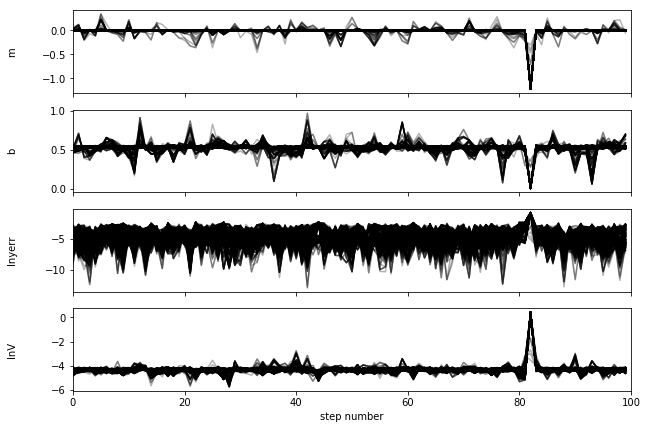

In [32]:
plt.figure(1)
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.chain
labels = ["m", "b", "lnyerr", "lnV"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.show()

In [17]:
flat_samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [18]:
fig = corner.corner(flat_samples, labels=["$m$", "$b$", "$lnyerr$", "$lnV$"],
                      truths=[m_true, b_true, lnyerr_true, lnV_true])
fig.savefig("uncert_scatter_informpri.png")

ValueError: It looks like the parameter(s) in column(s) 0, 1, 2, 3 have no dynamic range. Please provide a `range` argument.

In [35]:
print(np.exp(-5.45))

0.00429630469075


In [36]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.485


In [ ]:
xl = np.array([0, 10])
for m, b, lnyerr, lnV in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
pl.errorbar(x, y, yerr=yerr, fmt=".k")